In [76]:
### IMPORTS
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import shap

In [2]:
### Reading the CSV file as pandas Dataframe
telco_url = "https://raw.githubusercontent.com/adamcookeunc/DATA_780_PROJECT/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn_V4.csv"
telco_churn_df = pd.read_csv(telco_url)
telco_churn_df.head(10)

Customer ID  Gender  Age Under 30 Senior Citizen Partner Dependents  \
0  0002-ORFBO  Female   37       No             No     Yes        Yes   
1  0003-MKNFE    Male   46       No             No      No         No   
2  0004-TLHLJ    Male   50       No             No      No         No   
3  0011-IGKFF    Male   78       No            Yes     Yes         No   
4  0013-EXCHZ  Female   75       No            Yes     Yes         No   
5  0013-MHZWF  Female   23      Yes             No      No        Yes   
6  0013-SMEOE  Female   67       No            Yes     Yes         No   
7  0014-BMAQU    Male   52       No             No     Yes         No   
8  0015-UOCOJ  Female   68       No            Yes      No         No   
9  0016-QLJIS  Female   43       No             No     Yes        Yes   

   Number of Dependents Referred a Friend  Number of Referrals  Tenure  \
0                     0               Yes                    2       9   
1                     0                No                    0       9   
2                     0                No                    0       4   
3                     0               Yes                    1      13   
4                     0               Yes                    3       3   
5                     3                No                    0       9   
6                     0               Yes                    1      71   
7                     0               Yes                    8      63   
8                     0                No                    0       7   
9                     1               Yes                    3      65   

  Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0           Yes                              42.39             No   
1           Yes                              10.69            Yes   
2           Yes                              33.65             No   
3           Yes                              27.82             No   
4           Yes                               7.38             No   
5           Yes                              16.77             No   
6           Yes                               9.96             No   
7           Yes                              12.96            Yes   
8           Yes                              10.53             No   
9           Yes                              28.46            Yes   

  Internet Service Internet Type  Avg Monthly GB Download Online Security  \
0              Yes         Cable                       16              No   
1              Yes         Cable                       10              No   
2              Yes   Fiber Optic                       30              No   
3              Yes   Fiber Optic                        4              No   
4              Yes   Fiber Optic                       11              No   
5              Yes         Cable                       73              No   
6              Yes   Fiber Optic                       14             Yes   
7              Yes   Fiber Optic                        7             Yes   
8              Yes           DSL                       21             Yes   
9              Yes         Cable                       14             Yes   

  Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0           Yes                     No                  Yes          Yes   
1            No                     No                   No           No   
2            No                    Yes                   No           No   
3           Yes                    Yes                   No          Yes   
4            No                     No                  Yes          Yes   
5            No                     No                  Yes          Yes   
6           Yes                    Yes                  Yes          Yes   
7            No                     No                  Yes           No   
8            No                     No                   No           No   
9           Yes

In [3]:
### Dropping 11 rows with missing data
telco_churn_df = telco_churn_df.dropna()

### Dropping the ID column because it is irrelavent
telco_churn_df = telco_churn_df.drop(columns = ['Customer ID'])

### Ensuring that all numerical columns are in the float 64 formatting.
telco_churn_df['Age'] = telco_churn_df['Age'].astype(float)
telco_churn_df['Number of Dependents'] = telco_churn_df['Number of Dependents'].astype(float)
telco_churn_df['Number of Referrals'] = telco_churn_df['Number of Referrals'].astype(float)
telco_churn_df['Tenure'] = telco_churn_df['Tenure'].astype(float)
telco_churn_df['Avg Monthly Long Distance Charges'] = telco_churn_df['Avg Monthly Long Distance Charges'].astype(float)
telco_churn_df['Avg Monthly GB Download'] = telco_churn_df['Avg Monthly GB Download'].astype(float)
telco_churn_df['Monthly Charges'] = telco_churn_df['Monthly Charges'].astype(float)
telco_churn_df['Total Charges'] = pd.to_numeric(telco_churn_df['Total Charges'], errors = 'coerce')
telco_churn_df['Total Refunds'] = telco_churn_df['Total Refunds'].astype(float)
telco_churn_df['Total Extra Data Charges'] = telco_churn_df['Total Extra Data Charges'].astype(float)
telco_churn_df['Total Long Distance Charges'] = telco_churn_df['Total Long Distance Charges'].astype(float)
telco_churn_df['Total Revenue'] = pd.to_numeric(telco_churn_df['Total Revenue'], errors = 'coerce')

### Converting Yes or No values to binary float64 formatting.
telco_churn_df['Under 30'] = telco_churn_df['Under 30'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Senior Citizen'] = telco_churn_df['Senior Citizen'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Partner'] = telco_churn_df['Partner'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Dependents'] = telco_churn_df['Dependents'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Referred a Friend'] = telco_churn_df['Referred a Friend'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Phone Service'] = telco_churn_df['Phone Service'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Internet Service'] = telco_churn_df['Internet Service'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Online Security'] = telco_churn_df['Online Security'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Online Backup'] = telco_churn_df['Online Backup'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Device Protection Plan'] = telco_churn_df['Device Protection Plan'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Premium Tech Support'] = telco_churn_df['Premium Tech Support'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Streaming TV'] = telco_churn_df['Streaming TV'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Streaming Movies'] = telco_churn_df['Streaming Movies'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Streaming Music'] = telco_churn_df['Streaming Music'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Unlimited Data'] = telco_churn_df['Unlimited Data'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Paperless Billing'] = telco_churn_df['Paperless Billing'].map({'Yes': 1.0, 'No': 0.0})
telco_churn_df['Churn'] = telco_churn_df['Churn'].map({'Yes': 1.0, 'No': 0.0})

### One-Hot-Encoding categorical/nominal columns
telco_churn_df_encoded = pd.get_dummies(telco_churn_df, columns = ['Gender', 'Multiple Lines', 'Internet Type', 'Contract', 'Payment Method'], dtype = float)

### Excluding the churn column (the column that we are predicting)
telco_churn_df_encoded_excluding_churn = telco_churn_df_encoded.drop(columns = ['Churn'])

In [4]:
### Displaying samples of each dataframe
print("telco_churn_df:")
display(telco_churn_df.head())
print('\n')

print("telco_churn_df_encoded:")
display(telco_churn_df_encoded.head())
print('\n')

print("telco_churn_df_encoded_excluding_churn:")
display(telco_churn_df_encoded_excluding_churn.head())
print('\n')

telco_churn_df:


Gender   Age  Under 30  Senior Citizen  Partner  Dependents  \
0  Female  37.0       0.0             0.0      1.0         1.0   
1    Male  46.0       0.0             0.0      0.0         0.0   
2    Male  50.0       0.0             0.0      0.0         0.0   
3    Male  78.0       0.0             1.0      1.0         0.0   
4  Female  75.0       0.0             1.0      1.0         0.0   

   Number of Dependents  Referred a Friend  Number of Referrals  Tenure  \
0                   0.0                1.0                  2.0     9.0   
1                   0.0                0.0                  0.0     9.0   
2                   0.0                0.0                  0.0     4.0   
3                   0.0                1.0                  1.0    13.0   
4                   0.0                1.0                  3.0     3.0   

   Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0            1.0                              42.39             No   
1            1.0                              10.69            Yes   
2            1.0                              33.65             No   
3            1.0                              27.82             No   
4            1.0                               7.38             No   

   Internet Service Internet Type  Avg Monthly GB Download  Online Security  \
0               1.0         Cable                     16.0              0.0   
1               1.0         Cable                     10.0              0.0   
2               1.0   Fiber Optic                     30.0              0.0   
3               1.0   Fiber Optic                      4.0              0.0   
4               1.0   Fiber Optic                     11.0              0.0   

   Online Backup  Device Protection Plan  Premium Tech Support  Streaming TV  \
0            1.0                     0.0                   1.0           1.0   
1            0.0                     0.0                   0.0           0.0   
2            0.0                     1.0                   0.0           0.0   
3            1.0                     1.0                   0.0           1.0   
4            0.0                     0.0                   1.0           1.0   

   Streaming Movies  Streaming Music  Unlimited Data        Contract  \
0               0.0              0.0             1.0        One year   
1               1.0              1.0             0.0  Month-to-month   
2               0.0              0.0             1.0  Month-to-month   
3               1.0              0.0             1.0  Month-to-month   
4               0.0              0.0             1.0  Month-to-month   

   Paperless Billing    Payment Method  Monthly Charges  Total Charges  \
0                1.0      Mailed check             65.6         593.30   
1                0.0      Mailed check             59.9         542.40   
2                1.0  Electronic check             73.9         280.85   
3                1.0  Electronic check             98.0        1237.85   
4                1.0      Mailed check             83.9         267.40   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                       0.0                       381.51   
1          38.33                      10.0                        96.21   
2           0.00                       0.0                       134.60   
3           0.00                       0.0                       361.66   
4           0.00                       0.0                        22.14   

   Total Revenue  Churn  
0         974.81    0.0  
1         610.28    0.0  
2         415.45    1.0  
3        1599.51    1.0  
4         289.54    1.0



telco_churn_df_encoded:


Age  Under 30  Senior Citizen  Partner  Dependents  Number of Dependents  \
0  37.0       0.0             0.0      1.0         1.0                   0.0   
1  46.0       0.0             0.0      0.0         0.0                   0.0   
2  50.0       0.0             0.0      0.0         0.0                   0.0   
3  78.0       0.0             1.0      1.0         0.0                   0.0   
4  75.0       0.0             1.0      1.0         0.0                   0.0   

   Referred a Friend  Number of Referrals  Tenure  Phone Service  \
0                1.0                  2.0     9.0            1.0   
1                0.0                  0.0     9.0            1.0   
2                0.0                  0.0     4.0            1.0   
3                1.0                  1.0    13.0            1.0   
4                1.0                  3.0     3.0            1.0   

   Avg Monthly Long Distance Charges  Internet Service  \
0                              42.39               1.0   
1                              10.69               1.0   
2                              33.65               1.0   
3                              27.82               1.0   
4                               7.38               1.0   

   Avg Monthly GB Download  Online Security  Online Backup  \
0                     16.0              0.0            1.0   
1                     10.0              0.0            0.0   
2                     30.0              0.0            0.0   
3                      4.0              0.0            1.0   
4                     11.0              0.0            0.0   

   Device Protection Plan  Premium Tech Support  Streaming TV  \
0                     0.0                   1.0           1.0   
1                     0.0                   0.0           0.0   
2                     1.0                   0.0           0.0   
3                     1.0                   0.0           1.0   
4                     0.0                   1.0           1.0   

   Streaming Movies  Streaming Music  Unlimited Data  Paperless Billing  \
0               0.0              0.0             1.0                1.0   
1               1.0              1.0             0.0                0.0   
2               0.0              0.0             1.0                1.0   
3               1.0              0.0             1.0                1.0   
4               0.0              0.0             1.0                1.0   

   Monthly Charges  Total Charges  Total Refunds  Total Extra Data Charges  \
0             65.6         593.30           0.00                       0.0   
1             59.9         542.40          38.33                      10.0   
2             73.9         280.85           0.00                       0.0   
3             98.0        1237.85           0.00                       0.0   
4             83.9         267.40           0.00                       0.0   

   Total Long Distance Charges  Total Revenue  Churn  Gender_Female  \
0                       381.51         974.81    0.0            1.0   
1                        96.21         610.28    0.0            0.0   
2                       134.60         415.45    1.0            0.0   
3                       361.66        1599.51    1.0            0.0   
4                        22.14         289.54    1.0            1.0   

   Gender_Male  Multiple Lines_No  Multiple Lines_No phone service  \
0          0.0                1.0                              0.0   
1          1.0                0.0                              0.0   
2          1.0                1.0                              0.0   
3          1.0                1.0                              0.0   
4          0.0                1.0                              0.0   

   Multiple Lines_Yes  Internet Type_Cable  Internet Type_DSL  \
0                 0.0                  1.0                0.0   
1                 1.0                  1.0                0.0   
2                 0.0                 



telco_churn_df_encoded_excluding_churn:


Age  Under 30  Senior Citizen  Partner  Dependents  Number of Dependents  \
0  37.0       0.0             0.0      1.0         1.0                   0.0   
1  46.0       0.0             0.0      0.0         0.0                   0.0   
2  50.0       0.0             0.0      0.0         0.0                   0.0   
3  78.0       0.0             1.0      1.0         0.0                   0.0   
4  75.0       0.0             1.0      1.0         0.0                   0.0   

   Referred a Friend  Number of Referrals  Tenure  Phone Service  \
0                1.0                  2.0     9.0            1.0   
1                0.0                  0.0     9.0            1.0   
2                0.0                  0.0     4.0            1.0   
3                1.0                  1.0    13.0            1.0   
4                1.0                  3.0     3.0            1.0   

   Avg Monthly Long Distance Charges  Internet Service  \
0                              42.39               1.0   
1                              10.69               1.0   
2                              33.65               1.0   
3                              27.82               1.0   
4                               7.38               1.0   

   Avg Monthly GB Download  Online Security  Online Backup  \
0                     16.0              0.0            1.0   
1                     10.0              0.0            0.0   
2                     30.0              0.0            0.0   
3                      4.0              0.0            1.0   
4                     11.0              0.0            0.0   

   Device Protection Plan  Premium Tech Support  Streaming TV  \
0                     0.0                   1.0           1.0   
1                     0.0                   0.0           0.0   
2                     1.0                   0.0           0.0   
3                     1.0                   0.0           1.0   
4                     0.0                   1.0           1.0   

   Streaming Movies  Streaming Music  Unlimited Data  Paperless Billing  \
0               0.0              0.0             1.0                1.0   
1               1.0              1.0             0.0                0.0   
2               0.0              0.0             1.0                1.0   
3               1.0              0.0             1.0                1.0   
4               0.0              0.0             1.0                1.0   

   Monthly Charges  Total Charges  Total Refunds  Total Extra Data Charges  \
0             65.6         593.30           0.00                       0.0   
1             59.9         542.40          38.33                      10.0   
2             73.9         280.85           0.00                       0.0   
3             98.0        1237.85           0.00                       0.0   
4             83.9         267.40           0.00                       0.0   

   Total Long Distance Charges  Total Revenue  Gender_Female  Gender_Male  \
0                       381.51         974.81            1.0          0.0   
1                        96.21         610.28            0.0          1.0   
2                       134.60         415.45            0.0          1.0   
3                       361.66        1599.51            0.0          1.0   
4                        22.14         289.54            1.0          0.0   

   Multiple Lines_No  Multiple Lines_No phone service  Multiple Lines_Yes  \
0                1.0                              0.0                 0.0   
1                0.0                              0.0                 1.0   
2                1.0                              0.0                 0.0   
3                1.0                              0.0                 0.0   
4                1.0                              0.0                 0.0   

   Internet Type_Cable  Internet Type_DSL  Internet Type_Fiber Optic  \
0                  1.0                0.0                        0.0   
1          

In [5]:
### Summary statistics
print("Summary statistics:")
display(telco_churn_df.describe(include = 'all'))
print('\n')

### Data types
print("Data types:")
display(telco_churn_df.dtypes)
print('\n')

### Number of missing values
print("Number of missing values:")
display(telco_churn_df.isna().sum())
print('\n')

### Number of unique values
print("Number of unique values:")
display(telco_churn_df.nunique())
print('\n')

Summary statistics:


Gender          Age     Under 30  Senior Citizen      Partner  \
count    7032  7032.000000  7032.000000     7032.000000  7032.000000   
unique      2          NaN          NaN             NaN          NaN   
top      Male          NaN          NaN             NaN          NaN   
freq     3549          NaN          NaN             NaN          NaN   
mean      NaN    46.521331     0.198663        0.162400     0.482509   
std       NaN    16.751596     0.399022        0.368844     0.499729   
min       NaN    19.000000     0.000000        0.000000     0.000000   
25%       NaN    32.000000     0.000000        0.000000     0.000000   
50%       NaN    46.000000     0.000000        0.000000     0.000000   
75%       NaN    60.000000     0.000000        0.000000     1.000000   
max       NaN    80.000000     1.000000        1.000000     1.000000   

         Dependents  Number of Dependents  Referred a Friend  \
count   7032.000000           7032.000000        7032.000000   
unique          NaN                   NaN                NaN   
top             NaN                   NaN                NaN   
freq            NaN                   NaN                NaN   
mean       0.298493              0.467577           0.456911   
std        0.457629              0.962134           0.498175   
min        0.000000              0.000000           0.000000   
25%        0.000000              0.000000           0.000000   
50%        0.000000              0.000000           0.000000   
75%        1.000000              0.000000           1.000000   
max        1.000000              9.000000           1.000000   

        Number of Referrals       Tenure  Phone Service  \
count           7032.000000  7032.000000    7032.000000   
unique                  NaN          NaN            NaN   
top                     NaN          NaN            NaN   
freq                    NaN          NaN            NaN   
mean               1.949232    32.421786       0.903299   
std                3.001324    24.545260       0.295571   
min                0.000000     1.000000       0.000000   
25%                0.000000     9.000000       1.000000   
50%                0.000000    29.000000       1.000000   
75%                3.000000    55.000000       1.000000   
max               11.000000    72.000000       1.000000   

        Avg Monthly Long Distance Charges Multiple Lines  Internet Service  \
count                         7032.000000           7032       7032.000000   
unique                                NaN              3               NaN   
top                                   NaN             No               NaN   
freq                                  NaN           3385               NaN   
mean                            22.963471            NaN          0.783845   
std                             15.449368            NaN          0.411650   
min                              0.000000            NaN          0.000000   
25%                              9.210000            NaN          1.000000   
50%                             22.890000            NaN          1.000000   
75%                             36.412500            NaN          1.000000   
max                             49.990000            NaN          1.000000   

       Internet Type  Avg Monthly GB Download  Online Security  Online Backup  \
count           7032              7032.000000      7032.000000    7032.000000   
unique             4                      NaN              NaN            NaN   
top      Fiber Optic                      NaN              NaN            NaN   
freq            3035                      NaN              NaN            NaN   
mean             NaN                20.531712         0.286547       0.344852   
std              NaN                20.419561         0.452180       0.475354   
min              NaN                 0.000000         0.000000       0.000000   
25%              NaN                 3.000000         0.000000       0.000000  



Data types:


Gender                                object
Age                                  float64
Under 30                             float64
Senior Citizen                       float64
Partner                              float64
Dependents                           float64
Number of Dependents                 float64
Referred a Friend                    float64
Number of Referrals                  float64
Tenure                               float64
Phone Service                        float64
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                     float64
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                      float64
Online Backup                        float64
Device Protection Plan               float64
Premium Tech Support                 float64
Streaming TV                         float64
Streaming Movies                     float64
Streaming 



Number of missing values:


Gender                               0
Age                                  0
Under 30                             0
Senior Citizen                       0
Partner                              0
Dependents                           0
Number of Dependents                 0
Referred a Friend                    0
Number of Referrals                  0
Tenure                               0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing        



Number of unique values:


Gender                                  2
Age                                    62
Under 30                                2
Senior Citizen                          2
Partner                                 2
Dependents                              2
Number of Dependents                   10
Referred a Friend                       2
Number of Referrals                    12
Tenure                                 72
Phone Service                           2
Avg Monthly Long Distance Charges    3582
Multiple Lines                          3
Internet Service                        2
Internet Type                           4
Avg Monthly GB Download                50
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                    

In [6]:
### Checking for duplicates
telco_churn_df.duplicated().sum()

0

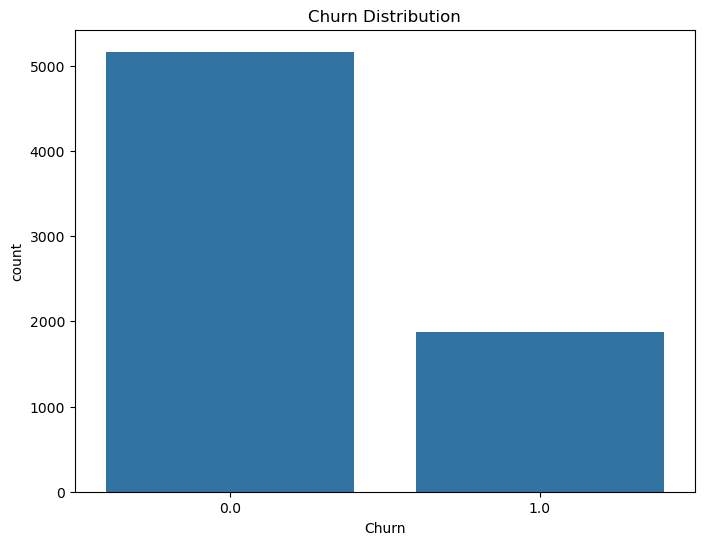



Churn Distribution:
Churn
0.0    5163
1.0    1869
Name: count, dtype: int64


Churn Distribution Percentages:
Churn
0.0    73.421502
1.0    26.578498
Name: proportion, dtype: float64




In [7]:
### Distribution of Churn (The target variable)
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Churn', data = telco_churn_df)
plt.title('Churn Distribution')
plt.show()
print('\n')

print("Churn Distribution:")
print(telco_churn_df['Churn'].value_counts())
print('\n')

print("Churn Distribution Percentages:")
print(telco_churn_df['Churn'].value_counts(normalize = True) * 100)
print('\n')

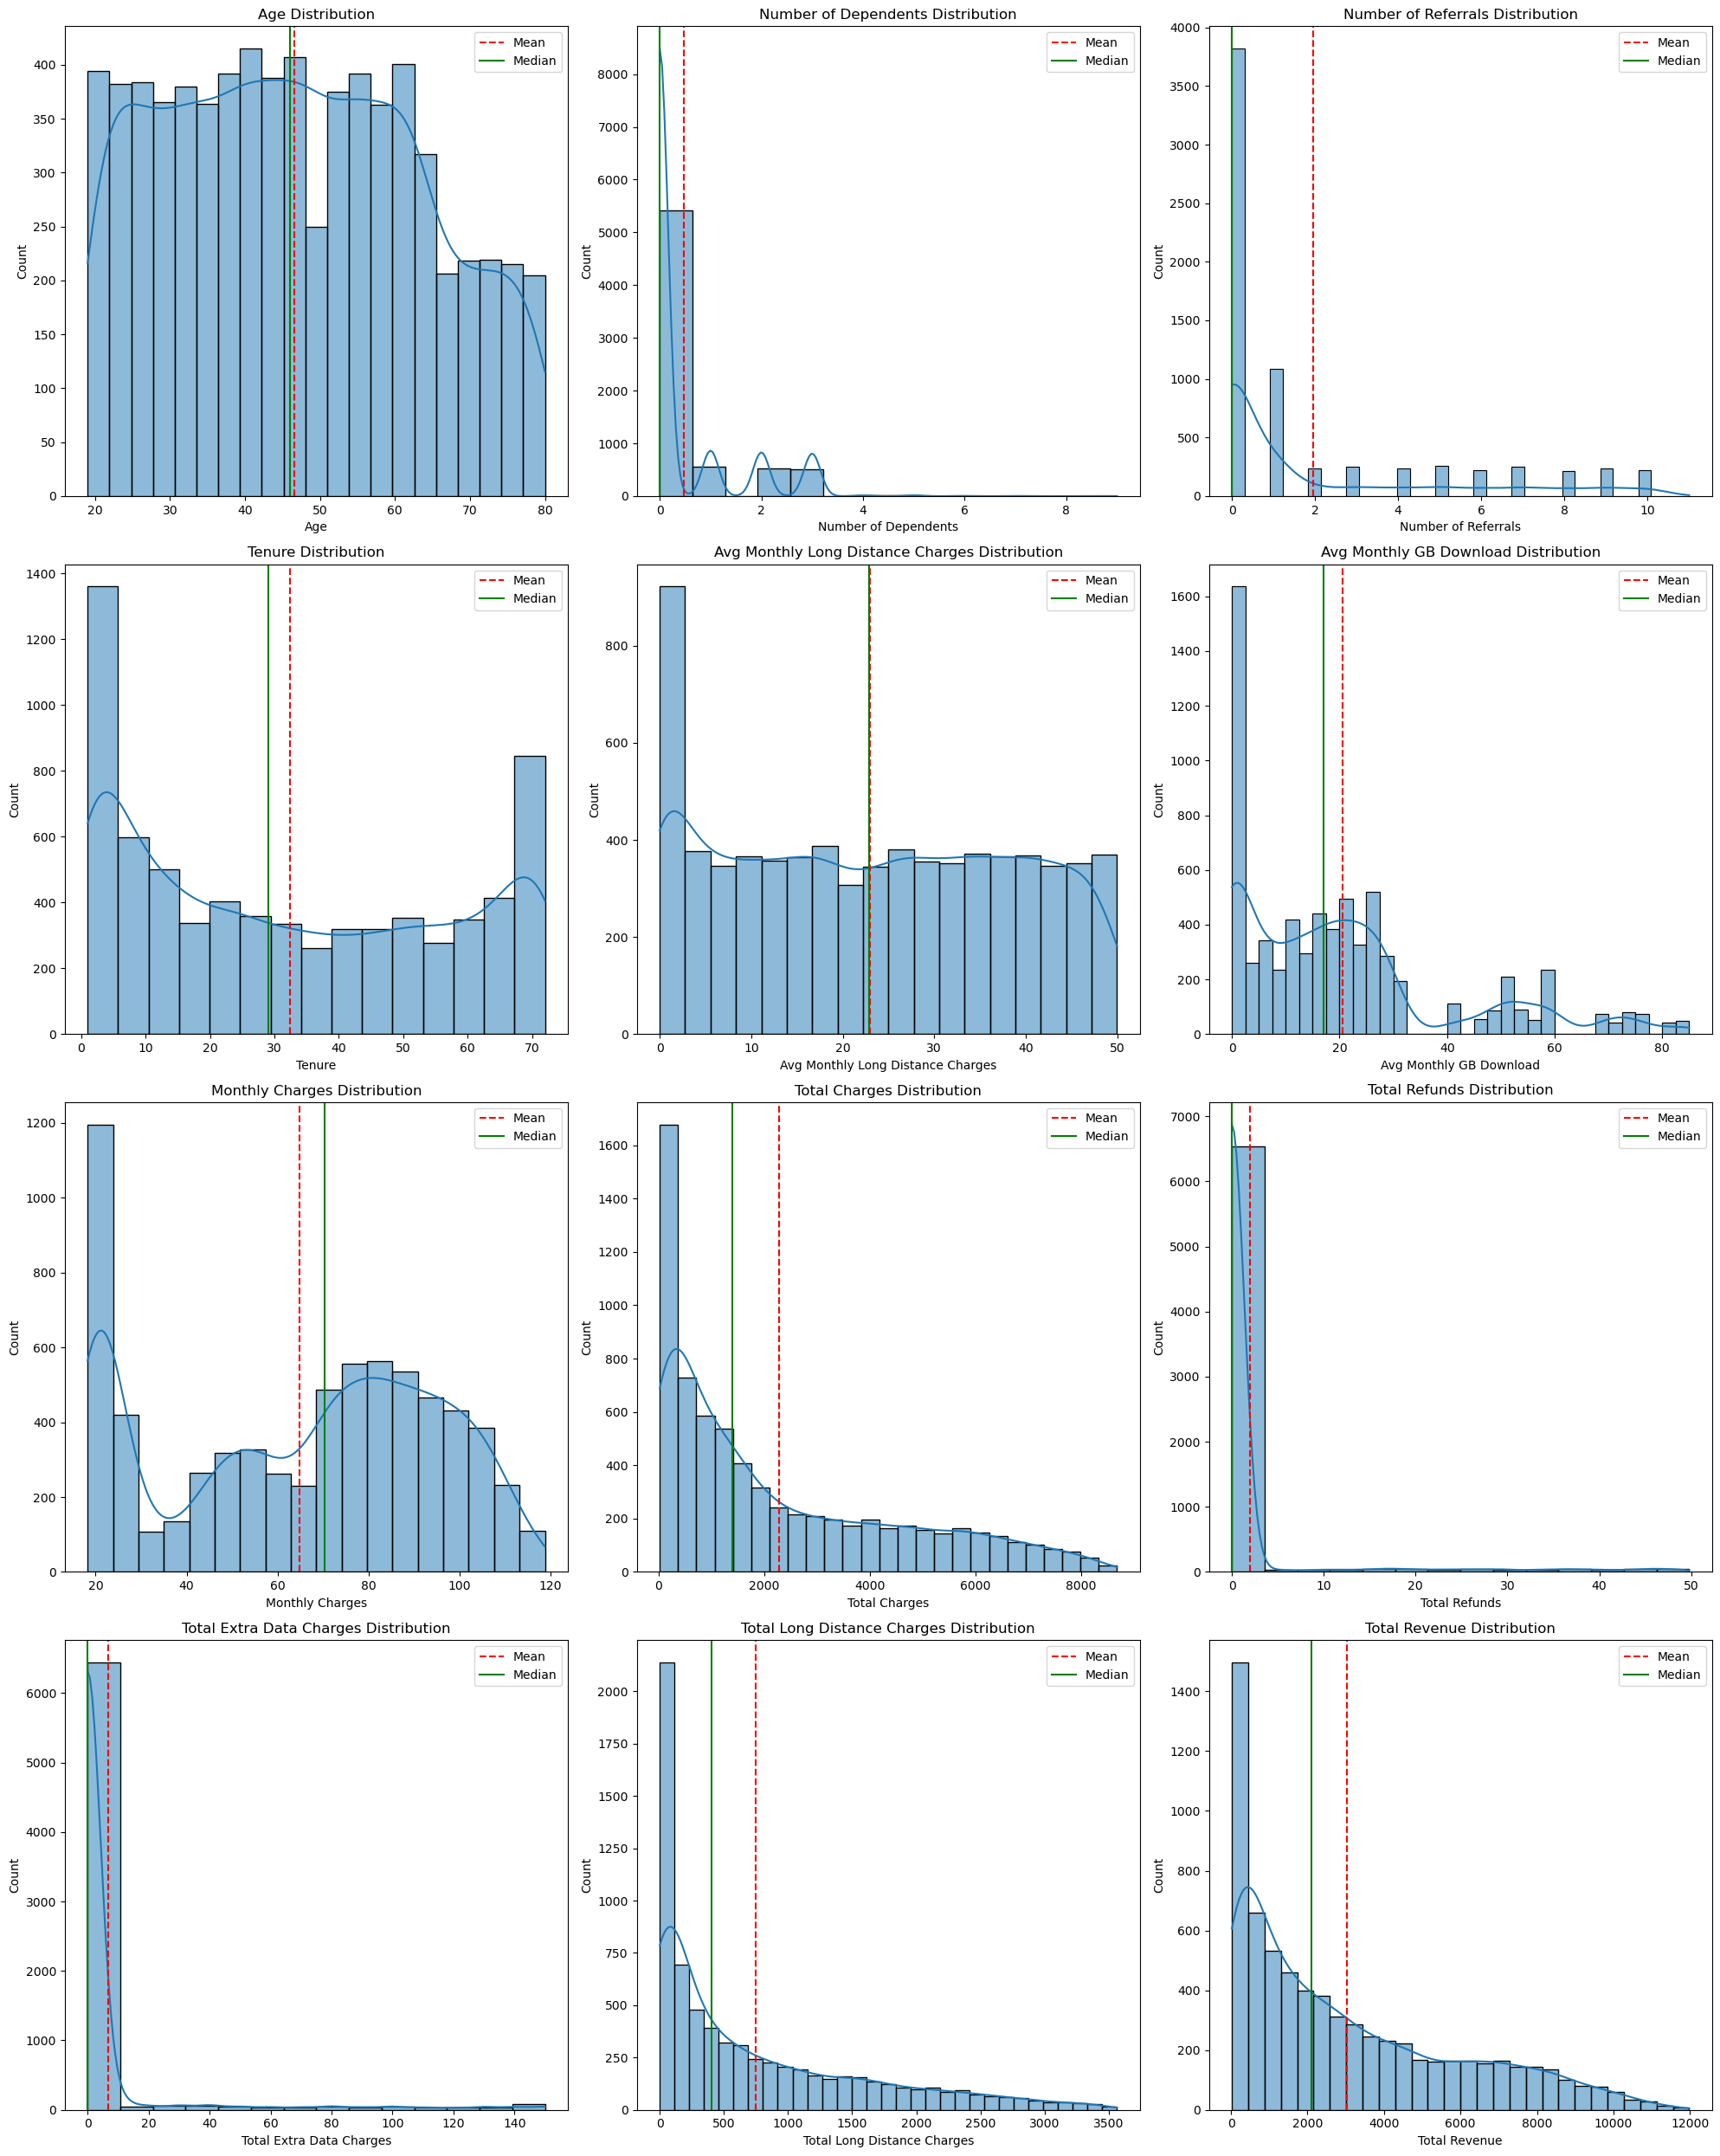

In [8]:
### Distribution of Numerical Features
# Set up the figure with 4 rows and 3 columns
plt.figure(figsize = (20, 25))

### Age Distribution
plt.subplot(4, 3, 1)
sns.histplot(telco_churn_df['Age'], kde = True)
plt.axvline(telco_churn_df['Age'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_df['Age'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Age Distribution')

### Number of Dependents Distribution
plt.subplot(4, 3, 2)
sns.histplot(telco_churn_df['Number of Dependents'], kde = True)
plt.axvline(telco_churn_df['Number of Dependents'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(telco_churn_df['Number of Dependents'].median(), color='green', linestyle='-', label='Median')
plt.legend()
plt.title('Number of Dependents Distribution')

### Number of Referrals Distribution
plt.subplot(4, 3, 3)
sns.histplot(telco_churn_df['Number of Referrals'], kde = True)
plt.axvline(telco_churn_df['Number of Referrals'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_df['Number of Referrals'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Number of Referrals Distribution')

### Tenure Distribution Distribution
plt.subplot(4, 3, 4)
sns.histplot(telco_churn_df['Tenure'], kde = True)
plt.axvline(telco_churn_df['Tenure'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_df['Tenure'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Tenure Distribution')

### Avg Monthly Long Distance Charges Distribution
plt.subplot(4, 3, 5)
sns.histplot(telco_churn_df['Avg Monthly Long Distance Charges'], kde = True)
plt.axvline(telco_churn_df['Avg Monthly Long Distance Charges'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_df['Avg Monthly Long Distance Charges'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Avg Monthly Long Distance Charges Distribution')

### Avg Monthly GB Download Distribution
plt.subplot(4, 3, 6)
sns.histplot(telco_churn_df['Avg Monthly GB Download'], kde = True)
plt.axvline(telco_churn_df['Avg Monthly GB Download'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_df['Avg Monthly GB Download'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Avg Monthly GB Download Distribution')

### Monthly Charges Distribution
plt.subplot(4, 3, 7)
sns.histplot(telco_churn_df['Monthly Charges'], kde = True)
plt.axvline(telco_churn_df['Monthly Charges'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_df['Monthly Charges'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Monthly Charges Distribution')

### Total Charges Distribution
plt.subplot(4, 3, 8)
sns.histplot(telco_churn_df['Total Charges'], kde = True)
plt.axvline(telco_churn_df['Total Charges'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_df['Total Charges'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Total Charges Distribution')

### Total Refunds Distribution
plt.subplot(4, 3, 9)
sns.histplot(telco_churn_df['Total Refunds'], kde = True)
plt.axvline(telco_churn_df['Total Refunds'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_df['Total Refunds'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Total Refunds Distribution')

### Total Extra Data Charges Distribution
plt.subplot(4, 3, 10)
sns.histplot(telco_churn_df['Total Extra Data Charges'], kde = True)
plt.axvline(telco_churn_df['Total Extra Data Charges'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_df['Total Extra Data Charges'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Total Extra Data Charges Distribution')

### Total Long Distance Charges Distribution
plt.subplot(4, 3, 11)
sns.histplot(telco_churn_df['Total Long Distance Charges'], kde = True)
plt.axvline(telco_churn_df['Total Long Distance Charges'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_df['Total Long Distance Charges'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Total Long Distance Charges Distribution')

### Total Revenue Distribution
plt.subplot(4, 3, 12)
sns.histplot(telco_churn_df['Total Revenue'], kde = True)
plt.axvline(telco_churn_df['Total Revenue'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_df['Total Revenue'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Total Revenue Distribution')


plt.tight_layout()
plt.show()

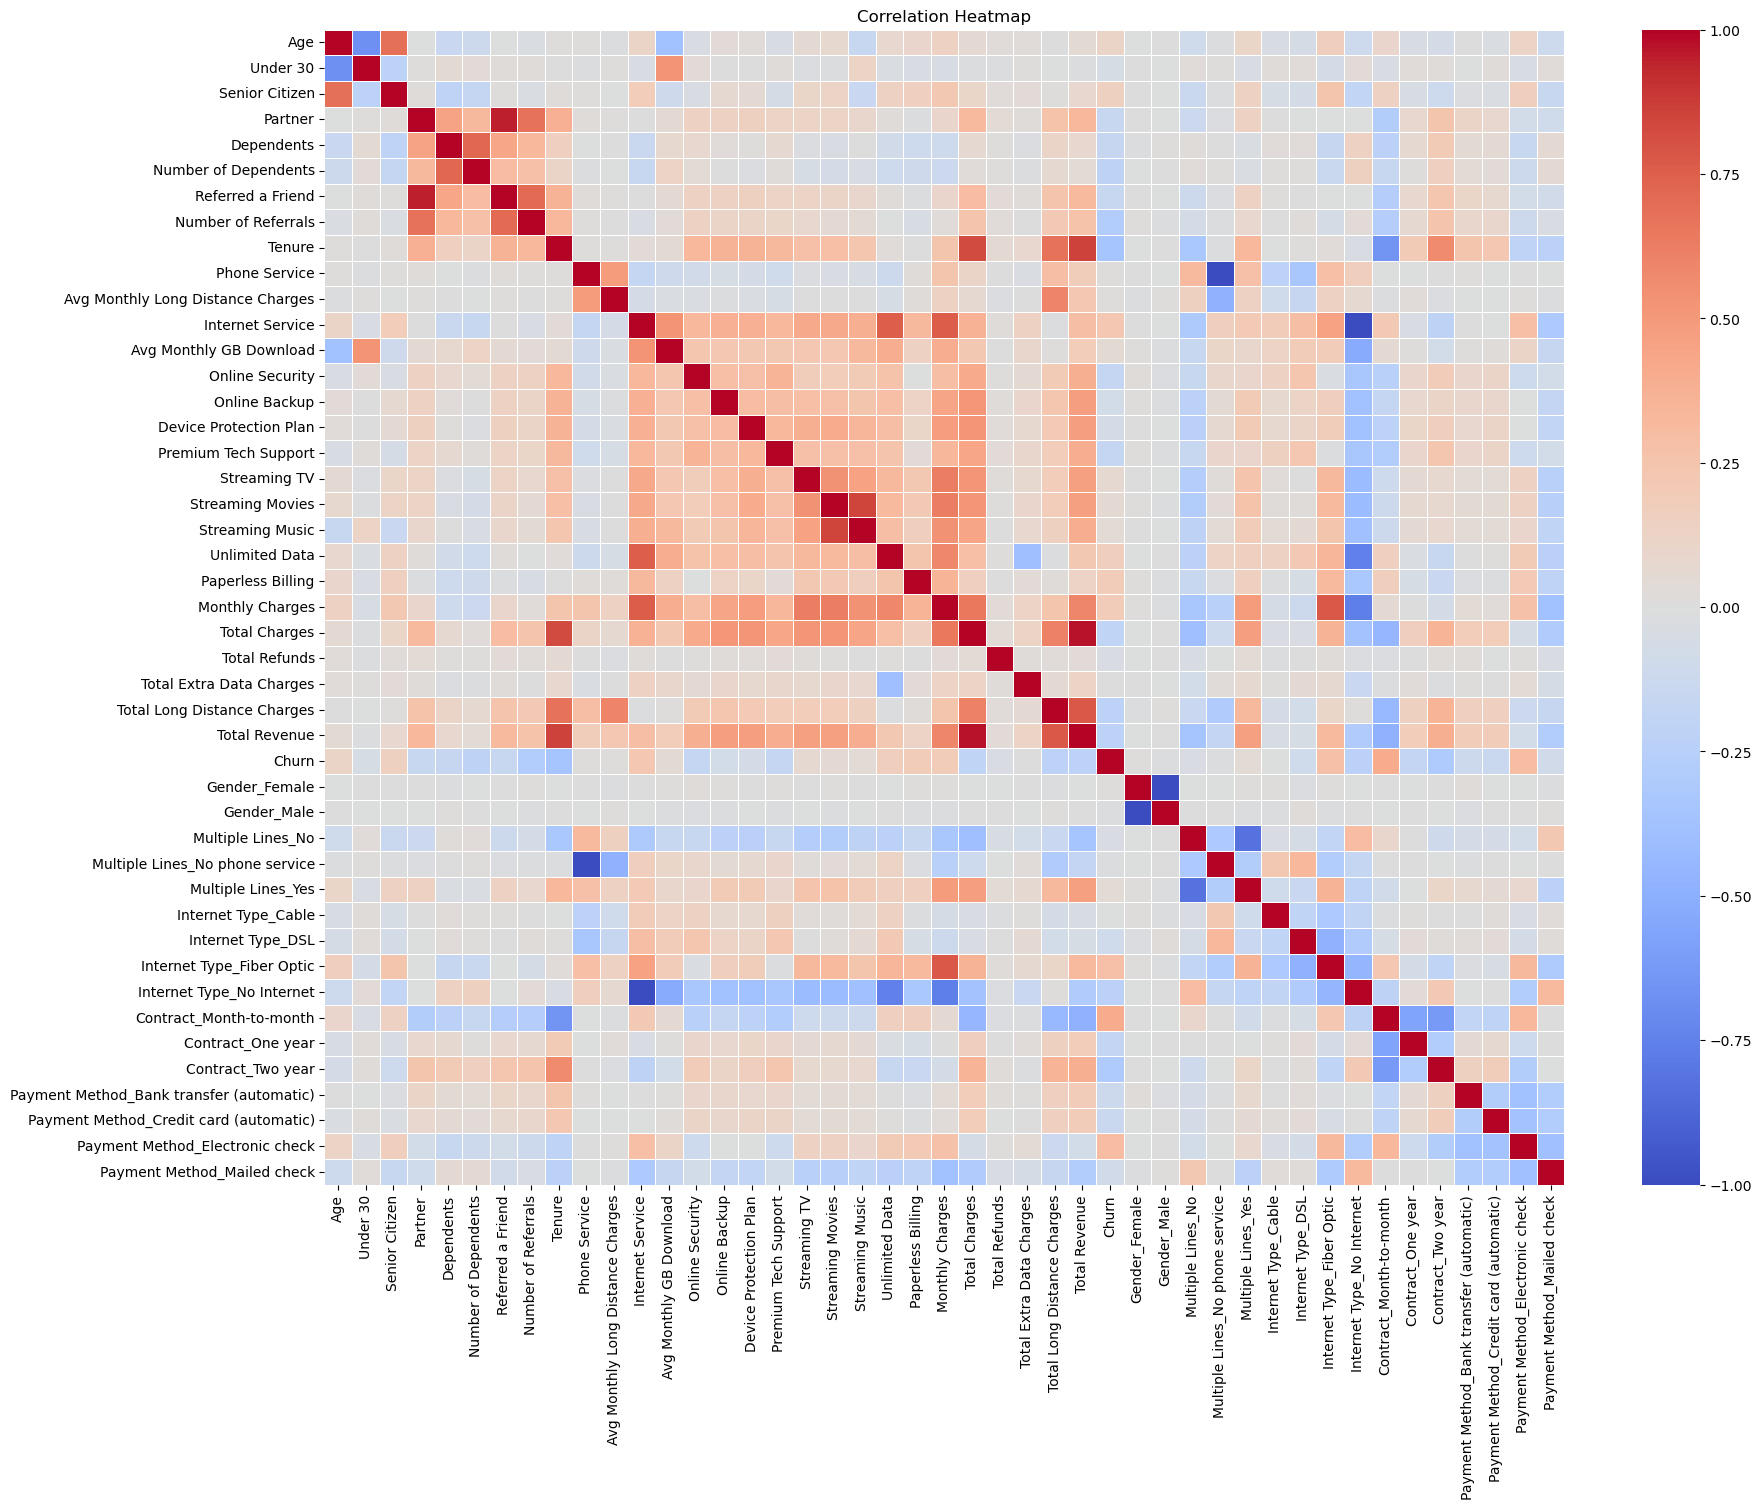

In [9]:
### Correlation Heatmap
plt.figure(figsize=(20, 15))

correlation_matrix = telco_churn_df_encoded.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [10]:
### Correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)
print('\n')

Correlation Matrix:


Age  Under 30  Senior Citizen  \
Age                                       1.000000 -0.672368        0.681788   
Under 30                                 -0.672368  1.000000       -0.219243   
Senior Citizen                            0.681788 -0.219243        1.000000   
Partner                                  -0.003175  0.014933        0.016957   
Dependents                               -0.143419  0.047516       -0.210550   
Number of Dependents                     -0.117923  0.034748       -0.167915   
Referred a Friend                        -0.004176  0.016238        0.010223   
Number of Referrals                      -0.024628  0.023268       -0.026212   
Tenure                                    0.009308  0.000272        0.015683   
Phone Service                             0.010614 -0.009538        0.008392   
Avg Monthly Long Distance Charges        -0.011633  0.009618       -0.000842   
Internet Service                          0.116397 -0.034663        0.182519   
Avg Monthly GB Download                  -0.377404  0.523659       -0.102318   
Online Security                          -0.038820  0.032866       -0.038576   
Online Backup                             0.035111  0.005430        0.066663   
Device Protection Plan                    0.028283  0.004226        0.059514   
Premium Tech Support                     -0.044310  0.021776       -0.060577   
Streaming TV                              0.059545 -0.016109        0.105445   
Streaming Movies                          0.073113 -0.009177        0.119842   
Streaming Music                          -0.155987  0.124437       -0.148300   
Unlimited Data                            0.083587 -0.030920        0.140025   
Paperless Billing                         0.100100 -0.037742        0.156258   
Monthly Charges                           0.144117 -0.043745        0.219874   
Total Charges                             0.059152 -0.013608        0.102411   
Total Refunds                             0.024014 -0.011951        0.028400   
Total Extra Data Charges                  0.024866  0.012494        0.032735   
Total Long Distance Charges               0.002667 -0.001276        0.010094   
Total Revenue                             0.047727 -0.010998        0.084195   
Churn                                     0.115458 -0.054300        0.150541   
Gender_Female                            -0.002238  0.002891        0.001819   
Gender_Male                               0.002238 -0.002891       -0.001819   
Multiple Lines_No                        -0.095962  0.029621       -0.136377   
Multiple Lines_No phone service          -0.010614  0.009538       -0.008392   
Multiple Lines_Yes                        0.103438 -0.035675        0.142996   
Internet Type_Cable                      -0.039784  0.020235       -0.047384   
Internet Type_DSL                        -0.056101  0.024908       -0.074308   
Internet Type_Fiber Optic                 0.170614 -0.063283        0.246086   
Internet Type_No Internet                -0.116397  0.034663       -0.182519   
Contract_Month-to-month                   0.093841 -0.037849        0.137752   
Contract_One year                        -0.042538  0.027656       -0.046491   
Contract_Two year                        -0.068806  0.017745       -0.116205   
Payment Method_Bank transfer (automatic)  0.001521 -0.004599       -0.016235   
Payment Method_Credit card (automatic)   -0.024970  0.023229       -0.024359   
Payment Method_Electronic check           0.123758 -0.042879        0.171322   
Payment Method_Mailed check              -0.116342  0.030021       -0.152987   

                                           Partner  Dependents  \
Age                                      -0.003175   -0.143419   
Under 30                                  0.014933    0.047516   
Senior Citizen                            0.016957   -0.210550   
Partner                                   1.000000    0.452269   
Dependents                          

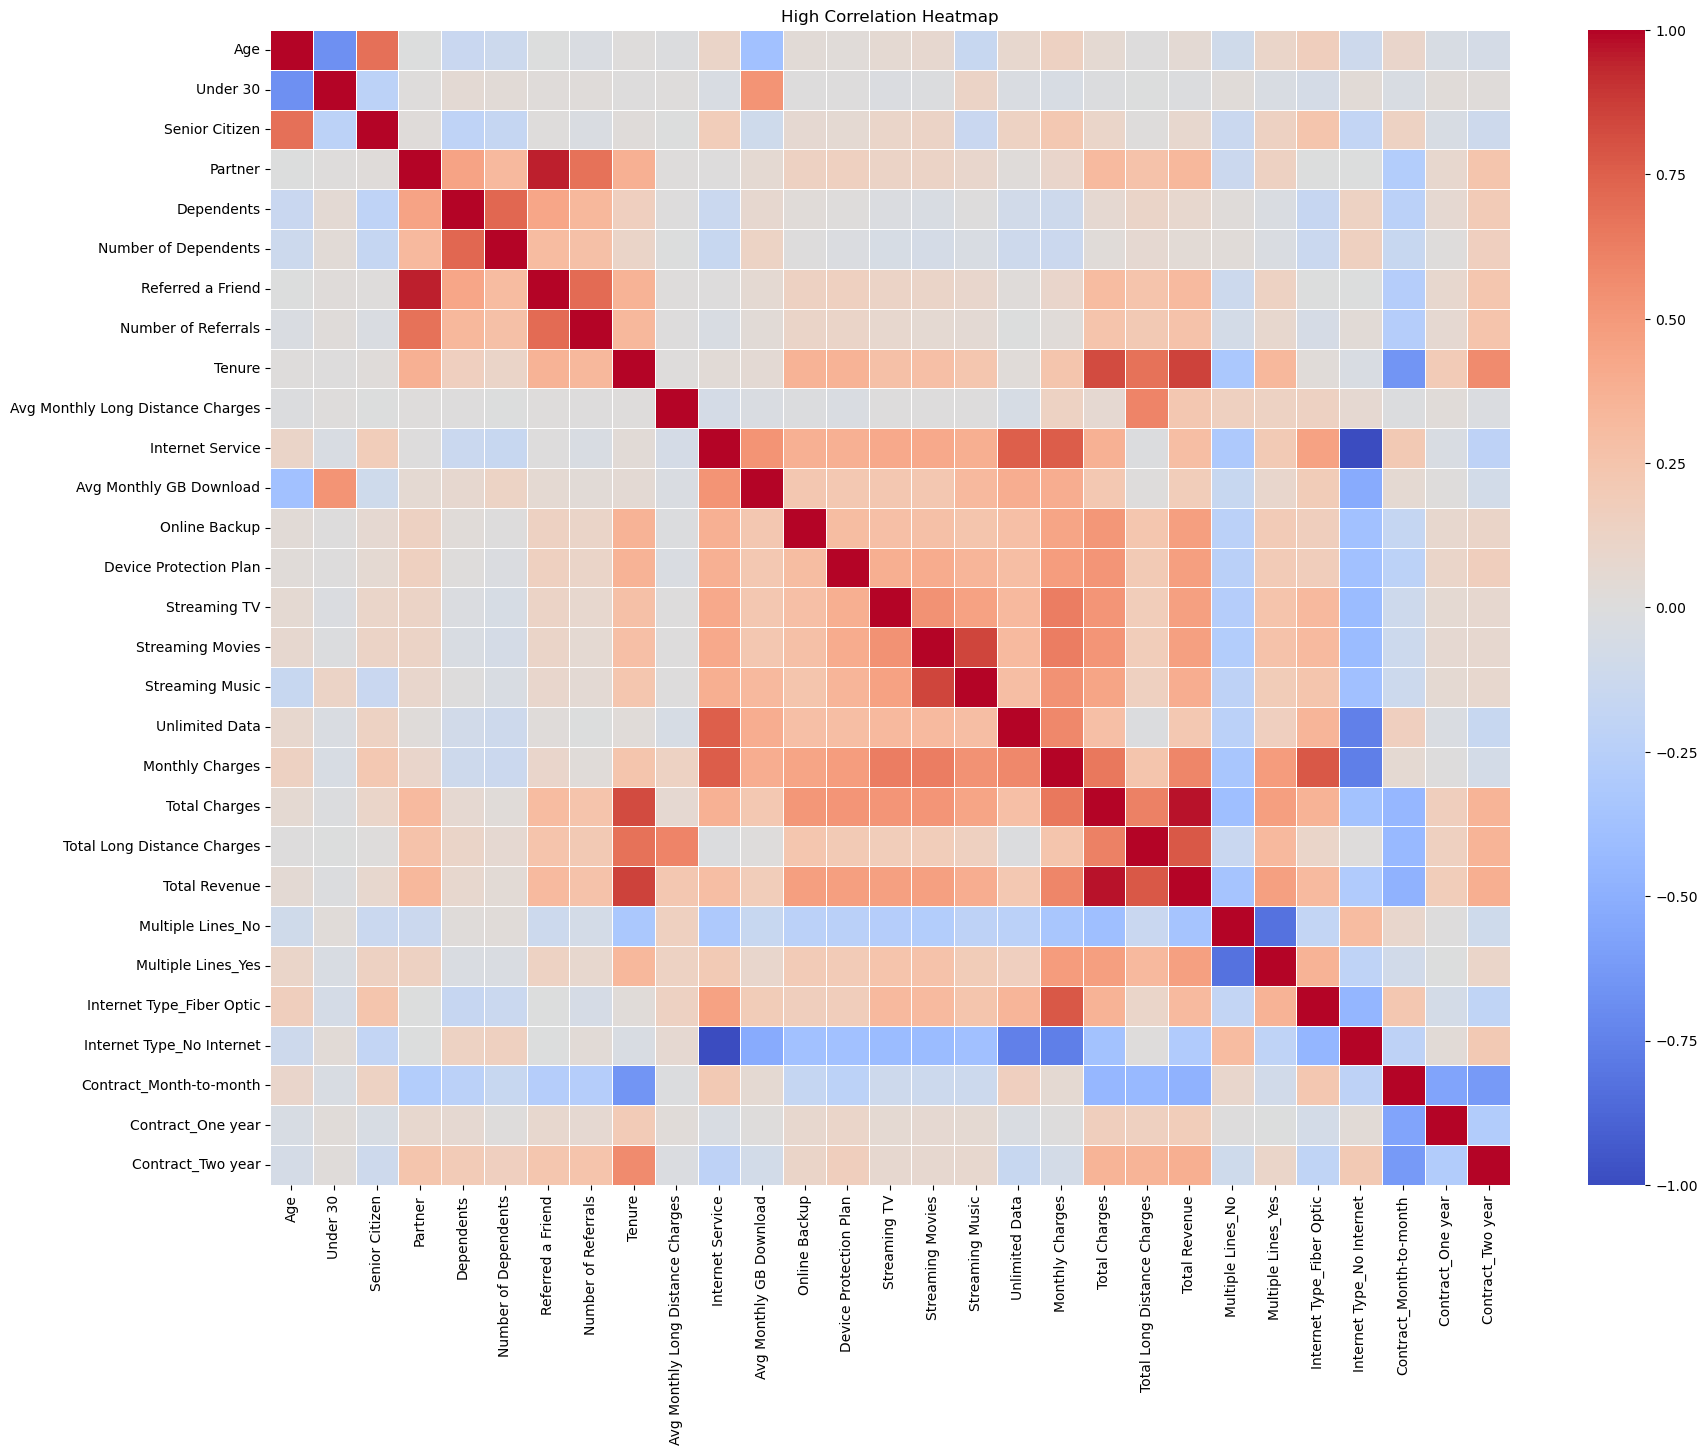

In [11]:
### Correlation matrix of high correlated columns
plt.figure(figsize=(20, 15))



absolute_correlation_matrix = correlation_matrix.abs()
np.fill_diagonal(absolute_correlation_matrix.values, 0)

high_correlation_columns = ((absolute_correlation_matrix > 0.5) & (absolute_correlation_matrix < 1.0)).any(axis=0)
high_correlation_columns = absolute_correlation_matrix.columns[high_correlation_columns]

high_correlation_matrix = telco_churn_df_encoded[high_correlation_columns].corr()



sns.heatmap(high_correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('High Correlation Heatmap')
plt.show()

In [12]:
### High correlation matrix
print("High correlation matrix:")
display(high_correlation_matrix)
print('\n')

High correlation matrix:


Age  Under 30  Senior Citizen  \
Age                                1.000000 -0.672368        0.681788   
Under 30                          -0.672368  1.000000       -0.219243   
Senior Citizen                     0.681788 -0.219243        1.000000   
Partner                           -0.003175  0.014933        0.016957   
Dependents                        -0.143419  0.047516       -0.210550   
Number of Dependents              -0.117923  0.034748       -0.167915   
Referred a Friend                 -0.004176  0.016238        0.010223   
Number of Referrals               -0.024628  0.023268       -0.026212   
Tenure                             0.009308  0.000272        0.015683   
Avg Monthly Long Distance Charges -0.011633  0.009618       -0.000842   
Internet Service                   0.116397 -0.034663        0.182519   
Avg Monthly GB Download           -0.377404  0.523659       -0.102318   
Online Backup                      0.035111  0.005430        0.066663   
Device Protection Plan             0.028283  0.004226        0.059514   
Streaming TV                       0.059545 -0.016109        0.105445   
Streaming Movies                   0.073113 -0.009177        0.119842   
Streaming Music                   -0.155987  0.124437       -0.148300   
Unlimited Data                     0.083587 -0.030920        0.140025   
Monthly Charges                    0.144117 -0.043745        0.219874   
Total Charges                      0.059152 -0.013608        0.102411   
Total Long Distance Charges        0.002667 -0.001276        0.010094   
Total Revenue                      0.047727 -0.010998        0.084195   
Multiple Lines_No                 -0.095962  0.029621       -0.136377   
Multiple Lines_Yes                 0.103438 -0.035675        0.142996   
Internet Type_Fiber Optic          0.170614 -0.063283        0.246086   
Internet Type_No Internet         -0.116397  0.034663       -0.182519   
Contract_Month-to-month            0.093841 -0.037849        0.137752   
Contract_One year                 -0.042538  0.027656       -0.046491   
Contract_Two year                 -0.068806  0.017745       -0.116205   

                                    Partner  Dependents  Number of Dependents  \
Age                               -0.003175   -0.143419             -0.117923   
Under 30                           0.014933    0.047516              0.034748   
Senior Citizen                     0.016957   -0.210550             -0.167915   
Partner                            1.000000    0.452269              0.323767   
Dependents                         0.452269    1.000000              0.723428   
Number of Dependents               0.323767    0.723428              1.000000   
Referred a Friend                  0.949904    0.432923              0.308802   
Number of Referrals                0.672637    0.332458              0.277538   
Tenure                             0.381912    0.163386              0.109527   
Avg Monthly Long Distance Charges  0.010481    0.005319             -0.007596   
Internet Service                   0.000286   -0.138383             -0.152002   
Avg Monthly GB Download            0.057354    0.070469              0.130379   
Online Backup                      0.141849    0.023639              0.001905   
Device Protection Plan             0.153556    0.013900             -0.019481   
Streaming TV                       0.124483   -0.016499             -0.052526   
Streaming Movies                   0.118108   -0.038375             -0.064282   
Streaming Music                    0.089287    0.007572             -0.032111   
Unlimited Data                     0.019374   -0.092725             -0.112996   
Monthly Charges                    0.097825   -0.112343             -0.130953   
Total Charges                      0.319072    0.064653              0.023576   
Total Long Distance Charges        0.265229    0.110315              0.069757   
Total Revenue                      0.330814    0.083547            

In [13]:
### Getting the top 10 correlated pairs of columns
high_correlated_columns = high_correlation_matrix.unstack().drop_duplicates()
high_correlated_columns = high_correlated_columns[high_correlated_columns != 1.0].sort_values(ascending=False)

top_10_correlated_pairs = high_correlated_columns.head(10)

top_10_correlated_pairs_df = pd.DataFrame(top_10_correlated_pairs).reset_index()
top_10_correlated_pairs_df.columns = ['Column 1', 'Column 2', 'Correlation']

print("Top 10 correlated pairs of columns:")
display(top_10_correlated_pairs_df)
print('\n')

Top 10 correlated pairs of columns:


Column 1                   Column 2  Correlation
0                Total Charges              Total Revenue     0.972185
1                      Partner          Referred a Friend     0.949904
2                       Tenure              Total Revenue     0.852977
3             Streaming Movies            Streaming Music     0.848367
4                       Tenure              Total Charges     0.825880
5  Total Long Distance Charges              Total Revenue     0.778407
6              Monthly Charges  Internet Type_Fiber Optic     0.774365
7             Internet Service            Monthly Charges     0.763191
8             Internet Service             Unlimited Data     0.755178
9                   Dependents       Number of Dependents     0.723428

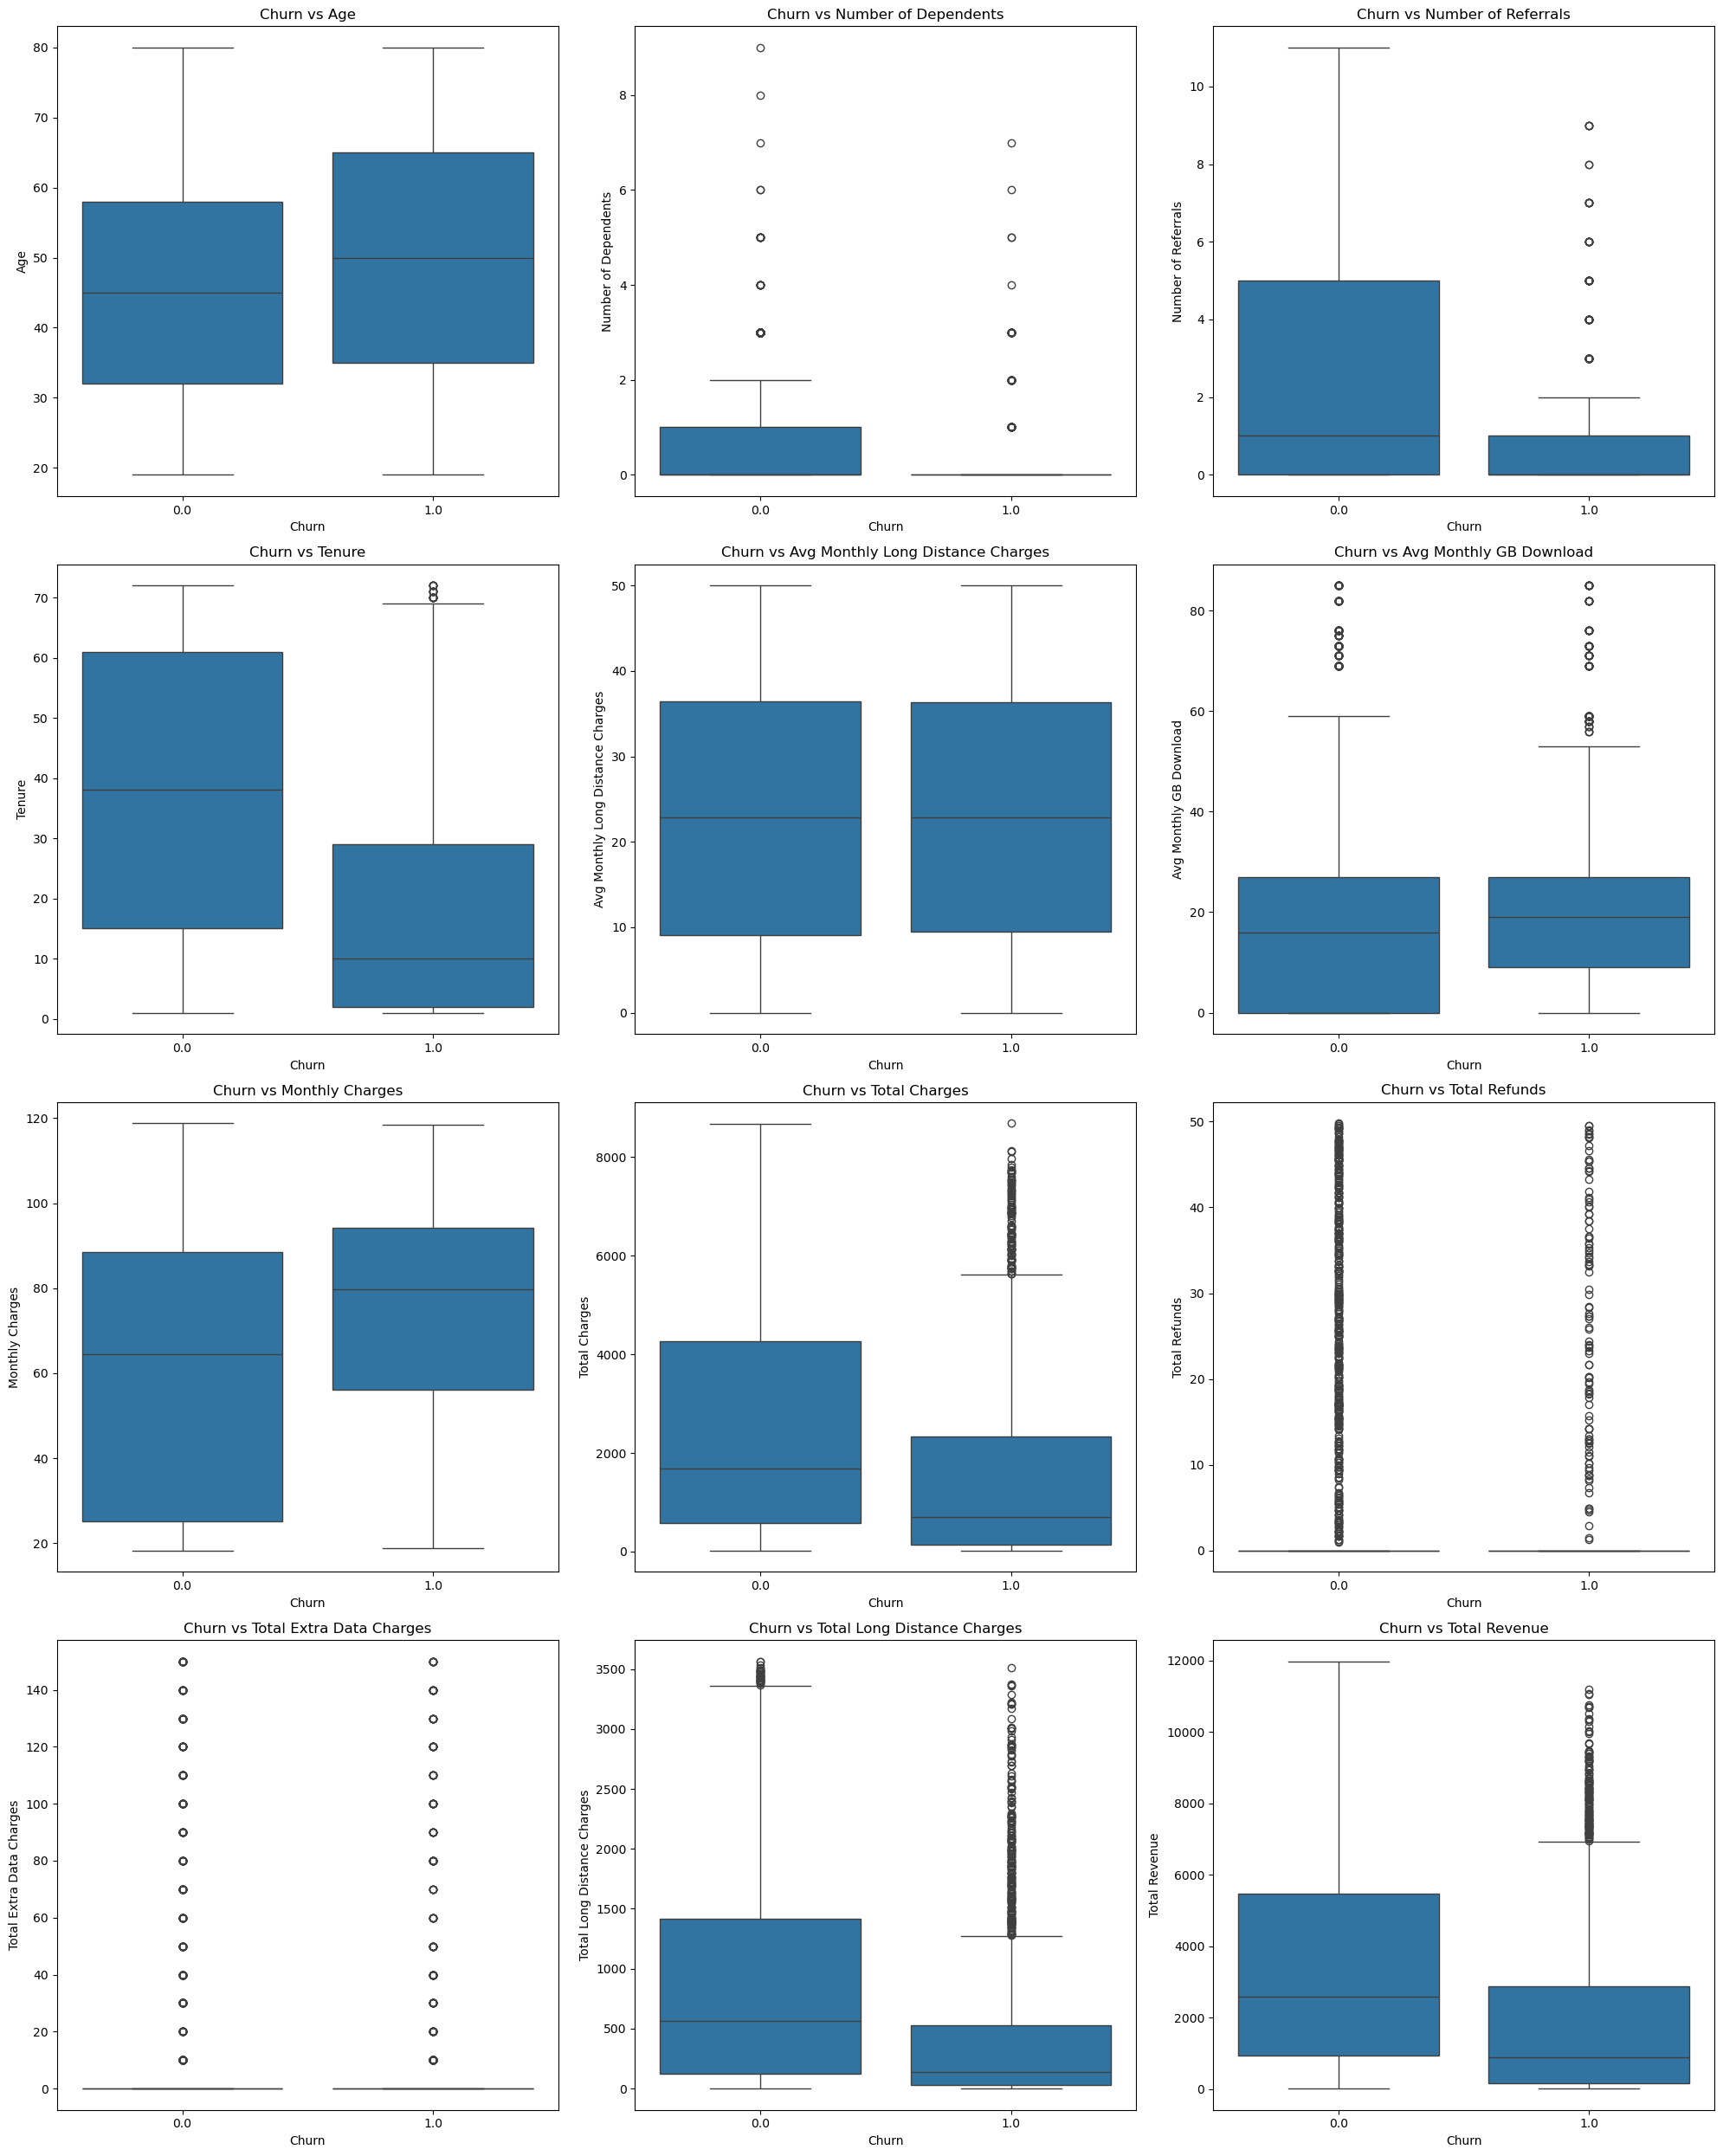

In [14]:
### Churn vs Numerical Features
plt.figure(figsize=(20, 25))

### Churn vs Age
plt.subplot(4, 3, 1)
sns.boxplot(x='Churn', y='Age', data=telco_churn_df)
plt.title('Churn vs Age')

### Churn vs Number of Dependents
plt.subplot(4, 3, 2)
sns.boxplot(x='Churn', y='Number of Dependents', data=telco_churn_df)
plt.title('Churn vs Number of Dependents')

### Churn vs Number of Referrals
plt.subplot(4, 3, 3)
sns.boxplot(x='Churn', y='Number of Referrals', data=telco_churn_df)
plt.title('Churn vs Number of Referrals')

### Churn vs Tenure
plt.subplot(4, 3, 4)
sns.boxplot(x='Churn', y='Tenure', data=telco_churn_df)
plt.title('Churn vs Tenure')

### Churn vs Avg Monthly Long Distance Charges
plt.subplot(4, 3, 5)
sns.boxplot(x='Churn', y='Avg Monthly Long Distance Charges', data=telco_churn_df)
plt.title('Churn vs Avg Monthly Long Distance Charges')

### Churn vs Avg Monthly GB Download
plt.subplot(4, 3, 6)
sns.boxplot(x='Churn', y='Avg Monthly GB Download', data=telco_churn_df)
plt.title('Churn vs Avg Monthly GB Download')

### Churn vs Monthly Charges
plt.subplot(4, 3, 7)
sns.boxplot(x='Churn', y='Monthly Charges', data=telco_churn_df)
plt.title('Churn vs Monthly Charges')

### Churn vs Total Charges
plt.subplot(4, 3, 8)
sns.boxplot(x='Churn', y='Total Charges', data=telco_churn_df)
plt.title('Churn vs Total Charges')

### Churn vs Total Refunds
plt.subplot(4, 3, 9)
sns.boxplot(x='Churn', y='Total Refunds', data=telco_churn_df)
plt.title('Churn vs Total Refunds')

### Churn vs Total Extra Data Charges
plt.subplot(4, 3, 10)
sns.boxplot(x='Churn', y='Total Extra Data Charges', data=telco_churn_df)
plt.title('Churn vs Total Extra Data Charges')

### Churn vs Total Long Distance Charges
plt.subplot(4, 3, 11)
sns.boxplot(x='Churn', y='Total Long Distance Charges', data=telco_churn_df)
plt.title('Churn vs Total Long Distance Charges')

### Churn vs Total Revenue
plt.subplot(4, 3, 12)
sns.boxplot(x='Churn', y='Total Revenue', data=telco_churn_df)
plt.title('Churn vs Total Revenue')

plt.tight_layout()
plt.show()


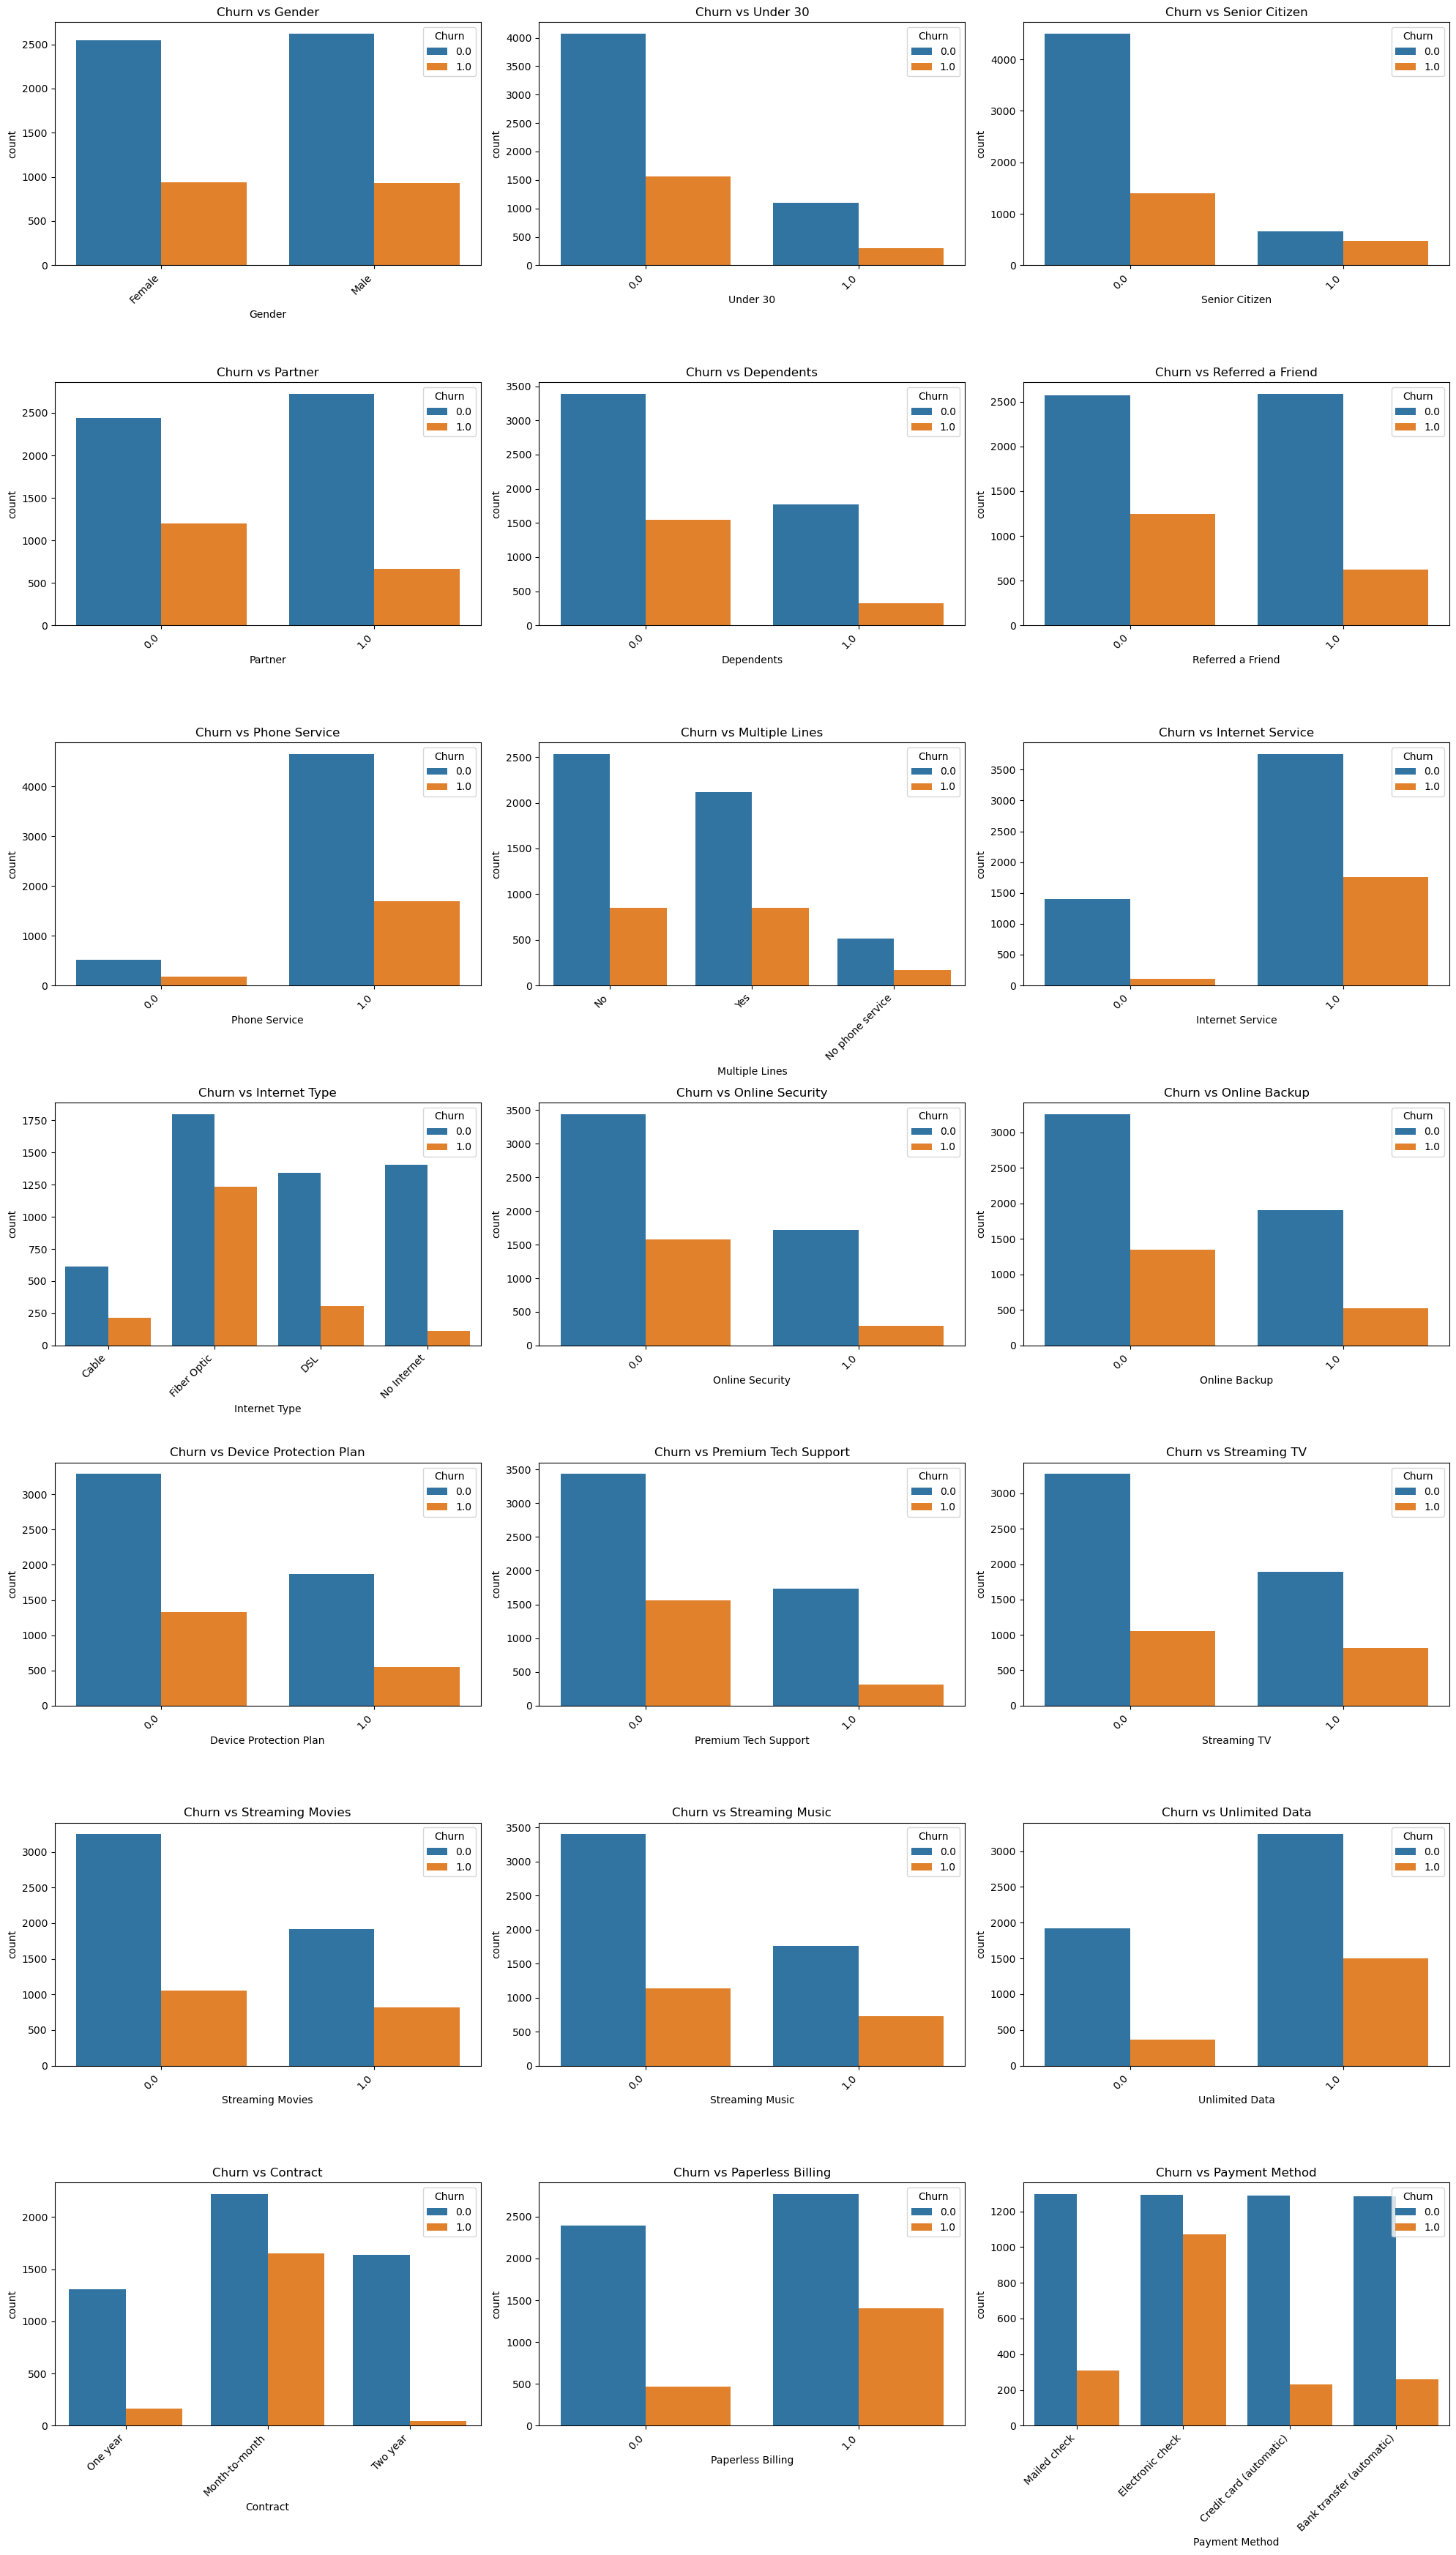

In [15]:
### Churn vs Categorical Features
plt.figure(figsize=(20, 35))

### Churn vs Gender
plt.subplot(7, 3, 1)
sns.countplot(x = 'Gender', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Gender')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Under 30
plt.subplot(7, 3, 2)
sns.countplot(x = 'Under 30', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Under 30')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Senior Citizen
plt.subplot(7, 3, 3)
sns.countplot(x = 'Senior Citizen', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Senior Citizen')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Partner
plt.subplot(7, 3, 4)
sns.countplot(x = 'Partner', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Partner')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Dependents
plt.subplot(7, 3, 5)
sns.countplot(x = 'Dependents', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Dependents')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Referred a Friend
plt.subplot(7, 3, 6)
sns.countplot(x = 'Referred a Friend', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Referred a Friend')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Phone Service
plt.subplot(7, 3, 7)
sns.countplot(x = 'Phone Service', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Phone Service')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Multiple Lines
plt.subplot(7, 3, 8)
sns.countplot(x = 'Multiple Lines', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Multiple Lines')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Internet Service
plt.subplot(7, 3, 9)
sns.countplot(x = 'Internet Service', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Internet Service')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Internet Type
plt.subplot(7, 3, 10)
sns.countplot(x='Internet Type', hue='Churn', data=telco_churn_df)
plt.title('Churn vs Internet Type')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Online Security
plt.subplot(7, 3, 11)
sns.countplot(x = 'Online Security', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Online Security')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Online Backup
plt.subplot(7, 3, 12)
sns.countplot(x = 'Online Backup', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Online Backup')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Device Protection Plan
plt.subplot(7, 3, 13)
sns.countplot(x = 'Device Protection Plan', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Device Protection Plan')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Premium Tech Support
plt.subplot(7, 3, 14)
sns.countplot(x = 'Premium Tech Support', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Premium Tech Support')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Streaming TV
plt.subplot(7, 3, 15)
sns.countplot(x = 'Streaming TV', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Streaming TV')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Streaming Movies
plt.subplot(7, 3, 16)
sns.countplot(x = 'Streaming Movies', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Streaming Movies')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Streaming Music
plt.subplot(7, 3, 17)
sns.countplot(x = 'Streaming Music', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Streaming Music')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Unlimited Data
plt.subplot(7, 3, 18)
sns.countplot(x = 'Unlimited Data', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Unlimited Data')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Contract
plt.subplot(7, 3, 19)
sns.countplot(x = 'Contract', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Contract')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Paperless Billing
plt.subplot(7, 3, 20)
sns.countplot(x = 'Paperless Billing', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Paperless Billing')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Payment Method
plt.subplot(7, 3, 21)
sns.countplot(x = 'Payment Method', hue = 'Churn', data = telco_churn_df)
plt.title('Churn vs Payment Method')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()


In [16]:
### Defining the input feature matrix (X) and the target variable vector (y).
X = telco_churn_df_encoded_excluding_churn.copy()
y = telco_churn_df_encoded['Churn']

### Creating a list of the continuous features that we will be scaling, we do not want to scale the binary indicator columns only the continuous numerical columns.
continuous_columns = [
    'Age',
    'Number of Dependents',
    'Number of Referrals',
    'Tenure',
    'Avg Monthly Long Distance Charges',
    'Avg Monthly GB Download',
    'Monthly Charges',
    'Total Charges',
    'Total Refunds',
    'Total Extra Data Charges',
    'Total Long Distance Charges',
    'Total Revenue'
]

#############################################################################################################################################################################################
### Defining Sampling/Scaling techniques and the classification models we are going to be comparing.
classification_models = {
    'logistic_regression': LogisticRegression(random_state = 22),
    'support_vector_classifier': SVC(probability = True, random_state = 22),
    'decision_tree_classifier': DecisionTreeClassifier(random_state = 22),
    'random_forest_classifier': RandomForestClassifier(random_state = 22),
    'gaussian_naive_bayes_classifier': GaussianNB(),
    'xgboost_classifier': XGBClassifier(random_state = 22)
}

scaling_techniques = {
    'no_scaling': None,
    'standard_scaler': StandardScaler(),
    'robust_scaler': RobustScaler(),
    'min_max_scaler': MinMaxScaler()
}

sampling_techniques = {
    'no_sampling': None,
    'random_undersampling': RandomUnderSampler(random_state = 22),
    'random_oversampling': RandomOverSampler(random_state = 22),
    'smote': SMOTE(random_state = 22)
}

#############################################################################################################################################################################################
### Setting up KFold crossvalidation with 5 splits. 
cross_validation_split = KFold(n_splits = 5, shuffle = True, random_state = 22)

### Creating containers to store average model metrics information and ROC curve information (false positive rate and true positive rate arrays).
average_model_metrics = []
roc_data = {}

### Looping through each combination of model, scaling technique, and sampling technique.
for classification_model_name, classification_model in classification_models.items():
  for scaling_technique_name, scaling_technique in scaling_techniques.items():
    for sampling_technique_name, sampling_technique in sampling_techniques.items():

      ### Creating containers to store model metric information for each cross validation fold.
      accuracy_scores_per_fold = []
      precision_scores_per_fold = []
      recall_scores_per_fold = []
      f1_scores_per_fold = []
      log_loss_values_per_fold = []
      roc_auc_scores_per_fold = []

      ### Creating containers to store true labels and predicted probabilities across all folds for ROC curve calculations.
      all_true_labels = []
      all_probabilities = []

      ### Setting up cross validation dataset splits
      for train_indexes, test_indexes in cross_validation_split.split(X, y):
        X_train = X.iloc[train_indexes].copy()
        X_test  = X.iloc[test_indexes].copy()
        y_train = y.iloc[train_indexes].copy()
        y_test  = y.iloc[test_indexes].copy()

        ### Applying the scaling techniques to only the continuous features defined above.
        if scaling_technique is not None:
            X_train.loc[:, continuous_columns] = scaling_technique.fit_transform(X_train[continuous_columns])
            X_test.loc[:, continuous_columns] = scaling_technique.transform(X_test[continuous_columns])

        ### Applying the sampling techniques.
        if sampling_technique is not None:
            X_train, y_train = sampling_technique.fit_resample(X_train, y_train)

        ### Training the classification model.
        classification_model.fit(X_train, y_train)

        ### Generating predictions and probabilities of churn on the testing dataset.
        y_predicted_labels = classification_model.predict(X_test)
        y_predicted_probabilities = classification_model.predict_proba(X_test)[:, 1]

        ### Calculating performance metrics for each cross validation fold.
        accuracy_scores_per_fold.append(accuracy_score(y_test, y_predicted_labels))
        precision_scores_per_fold.append(precision_score(y_test, y_predicted_labels))
        recall_scores_per_fold.append(recall_score(y_test, y_predicted_labels))
        f1_scores_per_fold.append(f1_score(y_test, y_predicted_labels))
        log_loss_values_per_fold.append(log_loss(y_test, y_predicted_probabilities))
        roc_auc_scores_per_fold.append(roc_auc_score(y_test, y_predicted_probabilities))

        ### Collecting data for ROC curve
        all_true_labels.extend(y_test.tolist())
        all_probabilities.extend(y_predicted_probabilities.tolist())

      ### Computing a single ROC curve for each combination across all folds.
      false_positive_rates, true_positive_rates, _ = roc_curve(all_true_labels, all_probabilities)

      ### Storing averaged metrics across all folds for each combination.
      average_model_metrics.append({
          'classification_model': classification_model_name,
          'scaling_technique': scaling_technique_name,
          'sampling_technique': sampling_technique_name,
          'accuracy': np.mean(accuracy_scores_per_fold),
          'precision': np.mean(precision_scores_per_fold),
          'recall': np.mean(recall_scores_per_fold),
          'f1_score': np.mean(f1_scores_per_fold),
          'log_loss': np.mean(log_loss_values_per_fold),
          'roc_auc': np.mean(roc_auc_scores_per_fold)
      })

      ### Storing ROC curve information for plotting
      roc_data[(classification_model_name, scaling_technique_name, sampling_technique_name)] = (false_positive_rates, true_positive_rates)


C:\Users\Adam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Adam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [17]:
### Converting the results from the cross validations into a pandas dataframe.
results_df = pd.DataFrame(average_model_metrics)
results_df = results_df
print('results_df:')
display(results_df)
print('\n')
print('\n')

#############################################################################################################################################################################################
### Creating Top 10 performing dataframes by F1, ROC_AUC, and Recall Scores.
top_10_combinations_by_f1_score = results_df.sort_values(by = 'f1_score', ascending = False).head(10)
print('top_10_combinations_by_f1_score:')
display(top_10_combinations_by_f1_score)
print('\n')
print('\n')

top_10_combinations_by_roc_auc = results_df.sort_values(by = 'roc_auc', ascending = False).head(10)
print('top_10_combinations_by_roc_auc:')
display(top_10_combinations_by_roc_auc)
print('\n')
print('\n')

top_10_combinations_by_recall = results_df.sort_values(by = 'recall', ascending = False).head(10)
print('top_10_combinations_by_recall:')
display(top_10_combinations_by_recall)
print('\n')
print('\n')

#############################################################################################################################################################################################
### Creating a DF for the best combination of scaling/sampling techniques by classification model.
best_combination_by_classification_model_f1 = results_df.loc[results_df.groupby('classification_model')['f1_score'].idxmax()]
best_combination_by_classification_model_f1 = best_combination_by_classification_model_f1.sort_values(by = 'f1_score', ascending = False)
print('best_combination_by_classification_model_f1:')
display(best_combination_by_classification_model_f1)
print('\n')
print('\n')

best_combination_by_classification_model_roc = results_df.loc[results_df.groupby('classification_model')['roc_auc'].idxmax()]
best_combination_by_classification_model_roc = best_combination_by_classification_model_roc.sort_values(by = 'roc_auc', ascending = False)
print('best_combination_by_classification_model_roc:')
display(best_combination_by_classification_model_roc)
print('\n')
print('\n')

best_combination_by_classification_model_recall = results_df.loc[results_df.groupby('classification_model')['recall'].idxmax()]
best_combination_by_classification_model_recall = best_combination_by_classification_model_recall.sort_values(by = 'recall', ascending = False)
print('best_combination_by_classification_model_recall:')
display(best_combination_by_classification_model_recall)
print('\n')
print('\n')

results_df:


classification_model scaling_technique    sampling_technique  accuracy  \
0   logistic_regression        no_scaling           no_sampling  0.782420   
1   logistic_regression        no_scaling  random_undersampling  0.721556   
2   logistic_regression        no_scaling   random_oversampling  0.719140   
3   logistic_regression        no_scaling                 smote  0.726960   
4   logistic_regression   standard_scaler           no_sampling  0.827218   
..                  ...               ...                   ...       ...   
91   xgboost_classifier     robust_scaler                 smote  0.822383   
92   xgboost_classifier    min_max_scaler           no_sampling  0.826080   
93   xgboost_classifier    min_max_scaler  random_undersampling  0.791098   
94   xgboost_classifier    min_max_scaler   random_oversampling  0.817974   
95   xgboost_classifier    min_max_scaler                 smote  0.824232   

    precision    recall  f1_score  log_loss   roc_auc  
0    0.618056  0.473391  0.535902  0.451874  0.812681  
1    0.485889  0.797014  0.603352  0.519924  0.827531  
2    0.482577  0.806369  0.603679  0.522623  0.827346  
3    0.491325  0.796354  0.607425  0.520543  0.826521  
4    0.690538  0.634850  0.661133  0.366044  0.885327  
..        ...       ...       ...       ...       ...  
91   0.667102  0.662604  0.664681  0.392401  0.886466  
92   0.697425  0.613488  0.652006  0.390723  0.887037  
93   0.575542  0.815427  0.674655  0.485473  0.883479  
94   0.642409  0.711859  0.675115  0.406087  0.886566  
95   0.669644  0.669053  0.669067  0.391545  0.887292  

[96 rows x 9 columns]





top_10_combinations_by_f1_score:


classification_model scaling_technique    sampling_technique  \
90         xgboost_classifier     robust_scaler   random_oversampling   
94         xgboost_classifier    min_max_scaler   random_oversampling   
82         xgboost_classifier        no_scaling   random_oversampling   
86         xgboost_classifier   standard_scaler   random_oversampling   
85         xgboost_classifier   standard_scaler  random_undersampling   
93         xgboost_classifier    min_max_scaler  random_undersampling   
81         xgboost_classifier        no_scaling  random_undersampling   
89         xgboost_classifier     robust_scaler  random_undersampling   
53   random_forest_classifier   standard_scaler  random_undersampling   
22  support_vector_classifier   standard_scaler   random_oversampling   

    accuracy  precision    recall  f1_score  log_loss   roc_auc  
90  0.817974   0.642409  0.711859  0.675115  0.406087  0.886566  
94  0.817974   0.642409  0.711859  0.675115  0.406087  0.886566  
82  0.817974   0.642409  0.711859  0.675115  0.406087  0.886566  
86  0.817974   0.642409  0.711859  0.675115  0.406087  0.886566  
85  0.791098   0.575542  0.815427  0.674655  0.485473  0.883479  
93  0.791098   0.575542  0.815427  0.674655  0.485473  0.883479  
81  0.791098   0.575542  0.815427  0.674655  0.485473  0.883479  
89  0.791098   0.575542  0.815427  0.674655  0.485473  0.883479  
53  0.787257   0.568583  0.826544  0.673595  0.458929  0.875245  
22  0.787684   0.569760  0.824689  0.673592  0.422451  0.880030





top_10_combinations_by_roc_auc:


classification_model scaling_technique   sampling_technique  accuracy  \
87   xgboost_classifier   standard_scaler                smote  0.829492   
95   xgboost_classifier    min_max_scaler                smote  0.824232   
88   xgboost_classifier     robust_scaler          no_sampling  0.826080   
92   xgboost_classifier    min_max_scaler          no_sampling  0.826080   
84   xgboost_classifier   standard_scaler          no_sampling  0.826080   
80   xgboost_classifier        no_scaling          no_sampling  0.826080   
83   xgboost_classifier        no_scaling                smote  0.827787   
90   xgboost_classifier     robust_scaler  random_oversampling  0.817974   
86   xgboost_classifier   standard_scaler  random_oversampling  0.817974   
94   xgboost_classifier    min_max_scaler  random_oversampling  0.817974   

    precision    recall  f1_score  log_loss   roc_auc  
87   0.686490  0.661427  0.673444  0.385130  0.890087  
95   0.669644  0.669053  0.669067  0.391545  0.887292  
88   0.697425  0.613488  0.652006  0.390723  0.887037  
92   0.697425  0.613488  0.652006  0.390723  0.887037  
84   0.697425  0.613488  0.652006  0.390723  0.887037  
80   0.697425  0.613488  0.652006  0.390723  0.887037  
83   0.694199  0.629963  0.660297  0.388941  0.886955  
90   0.642409  0.711859  0.675115  0.406087  0.886566  
86   0.642409  0.711859  0.675115  0.406087  0.886566  
94   0.642409  0.711859  0.675115  0.406087  0.886566





top_10_combinations_by_recall:


classification_model scaling_technique    sampling_technique  \
21  support_vector_classifier   standard_scaler  random_undersampling   
14        logistic_regression    min_max_scaler   random_oversampling   
6         logistic_regression   standard_scaler   random_oversampling   
10        logistic_regression     robust_scaler   random_oversampling   
9         logistic_regression     robust_scaler  random_undersampling   
5         logistic_regression   standard_scaler  random_undersampling   
29  support_vector_classifier    min_max_scaler  random_undersampling   
13        logistic_regression    min_max_scaler  random_undersampling   
53   random_forest_classifier   standard_scaler  random_undersampling   
57   random_forest_classifier     robust_scaler  random_undersampling   

    accuracy  precision    recall  f1_score  log_loss   roc_auc  
21  0.777586   0.554109  0.841799  0.667910  0.443162  0.879597  
14  0.779293   0.556631  0.834832  0.667701  0.433739  0.882812  
6   0.780573   0.558455  0.834342  0.668893  0.431611  0.883752  
10  0.778156   0.555041  0.834289  0.666389  0.434312  0.882462  
9   0.779151   0.556693  0.834230  0.667397  0.435737  0.881951  
5   0.778298   0.555471  0.832649  0.666092  0.432980  0.883545  
29  0.766353   0.539656  0.829936  0.653644  0.467666  0.863999  
13  0.777730   0.554925  0.828934  0.664546  0.438325  0.880823  
53  0.787257   0.568583  0.826544  0.673595  0.458929  0.875245  
57  0.786688   0.567830  0.825442  0.672703  0.459067  0.875099





best_combination_by_classification_model_f1:


classification_model scaling_technique    sampling_technique  \
82               xgboost_classifier        no_scaling   random_oversampling   
53         random_forest_classifier   standard_scaler  random_undersampling   
22        support_vector_classifier   standard_scaler   random_oversampling   
6               logistic_regression   standard_scaler   random_oversampling   
71  gaussian_naive_bayes_classifier   standard_scaler                 smote   
37         decision_tree_classifier   standard_scaler  random_undersampling   

    accuracy  precision    recall  f1_score  log_loss   roc_auc  
82  0.817974   0.642409  0.711859  0.675115  0.406087  0.886566  
53  0.787257   0.568583  0.826544  0.673595  0.458929  0.875245  
22  0.787684   0.569760  0.824689  0.673592  0.422451  0.880030  
6   0.780573   0.558455  0.834342  0.668893  0.431611  0.883752  
71  0.769764   0.547335  0.780207  0.642949  2.185817  0.849863  
37  0.730519   0.494910  0.725554  0.588345  9.713094  0.728828





best_combination_by_classification_model_roc:


classification_model scaling_technique    sampling_technique  \
87               xgboost_classifier   standard_scaler                 smote   
4               logistic_regression   standard_scaler           no_sampling   
22        support_vector_classifier   standard_scaler   random_oversampling   
55         random_forest_classifier   standard_scaler                 smote   
64  gaussian_naive_bayes_classifier        no_scaling           no_sampling   
37         decision_tree_classifier   standard_scaler  random_undersampling   

    accuracy  precision    recall  f1_score  log_loss   roc_auc  
87  0.829492   0.686490  0.661427  0.673444  0.385130  0.890087  
4   0.827218   0.690538  0.634850  0.661133  0.366044  0.885327  
22  0.787684   0.569760  0.824689  0.673592  0.422451  0.880030  
55  0.822099   0.670228  0.650816  0.659916  0.416036  0.879037  
64  0.766352   0.541913  0.786551  0.641472  1.763892  0.850590  
37  0.730519   0.494910  0.725554  0.588345  9.713094  0.728828





best_combination_by_classification_model_recall:


classification_model scaling_technique    sampling_technique  \
21        support_vector_classifier   standard_scaler  random_undersampling   
14              logistic_regression    min_max_scaler   random_oversampling   
53         random_forest_classifier   standard_scaler  random_undersampling   
81               xgboost_classifier        no_scaling  random_undersampling   
70  gaussian_naive_bayes_classifier   standard_scaler   random_oversampling   
41         decision_tree_classifier     robust_scaler  random_undersampling   

    accuracy  precision    recall  f1_score  log_loss   roc_auc  
21  0.777586   0.554109  0.841799  0.667910  0.443162  0.879597  
14  0.779293   0.556631  0.834832  0.667701  0.433739  0.882812  
53  0.787257   0.568583  0.826544  0.673595  0.458929  0.875245  
81  0.791098   0.575542  0.815427  0.674655  0.485473  0.883479  
70  0.756967   0.528309  0.802096  0.636806  2.009347  0.849655  
41  0.730092   0.494400  0.726121  0.588180  9.728468  0.728730

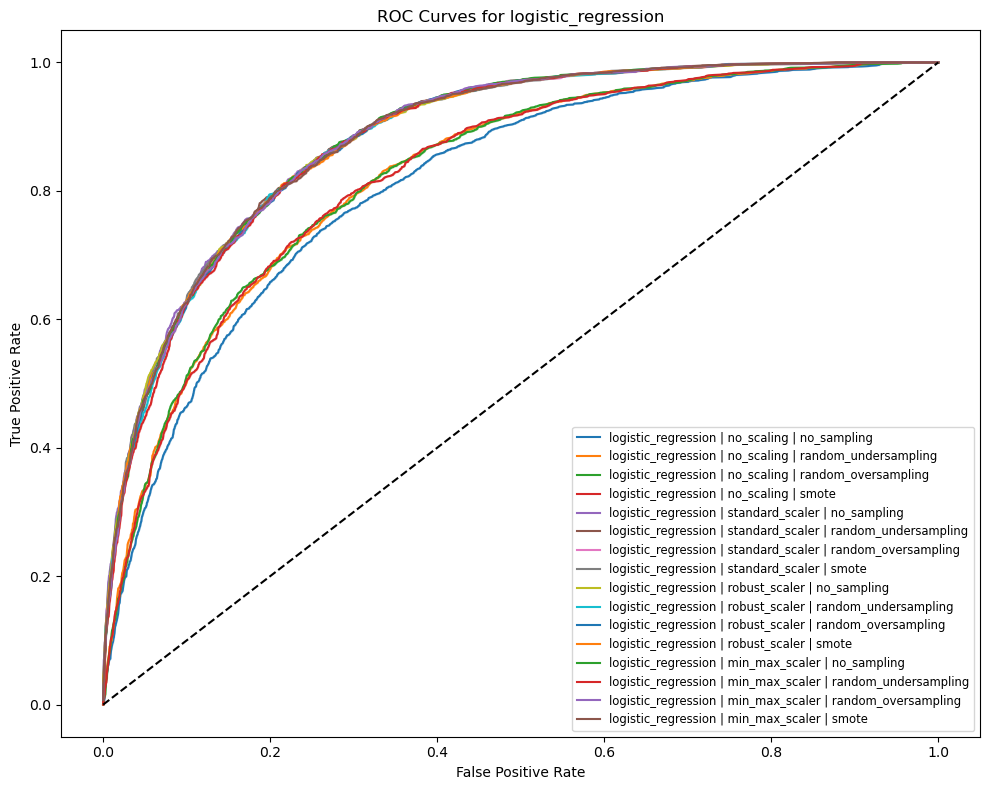

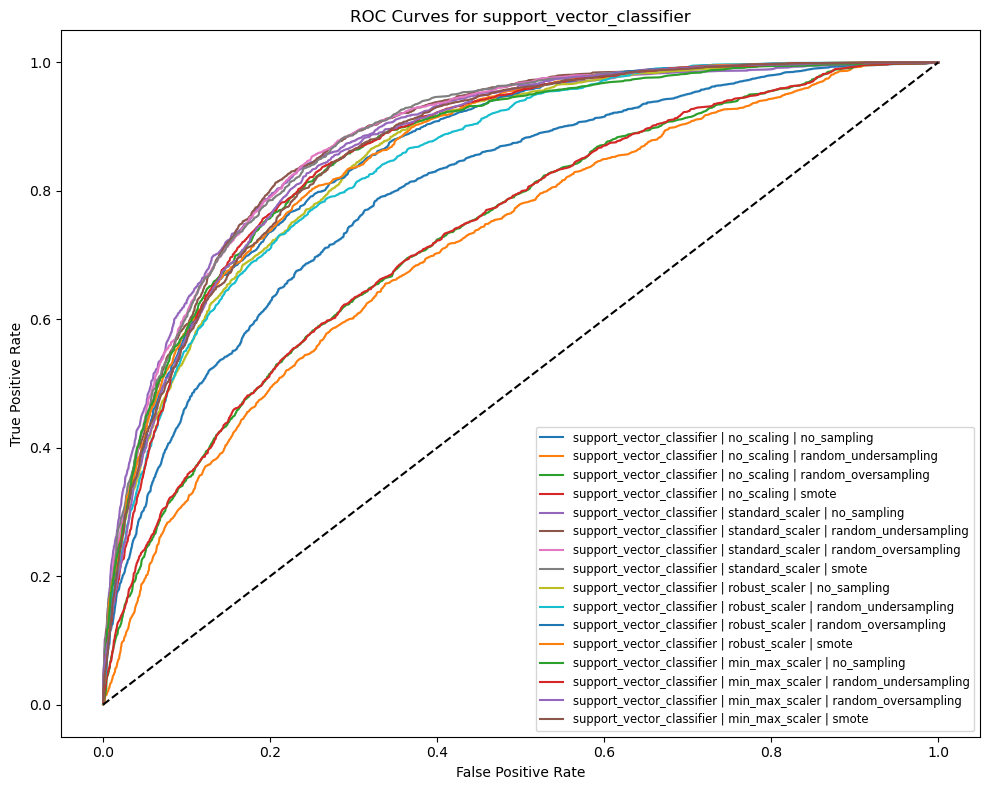

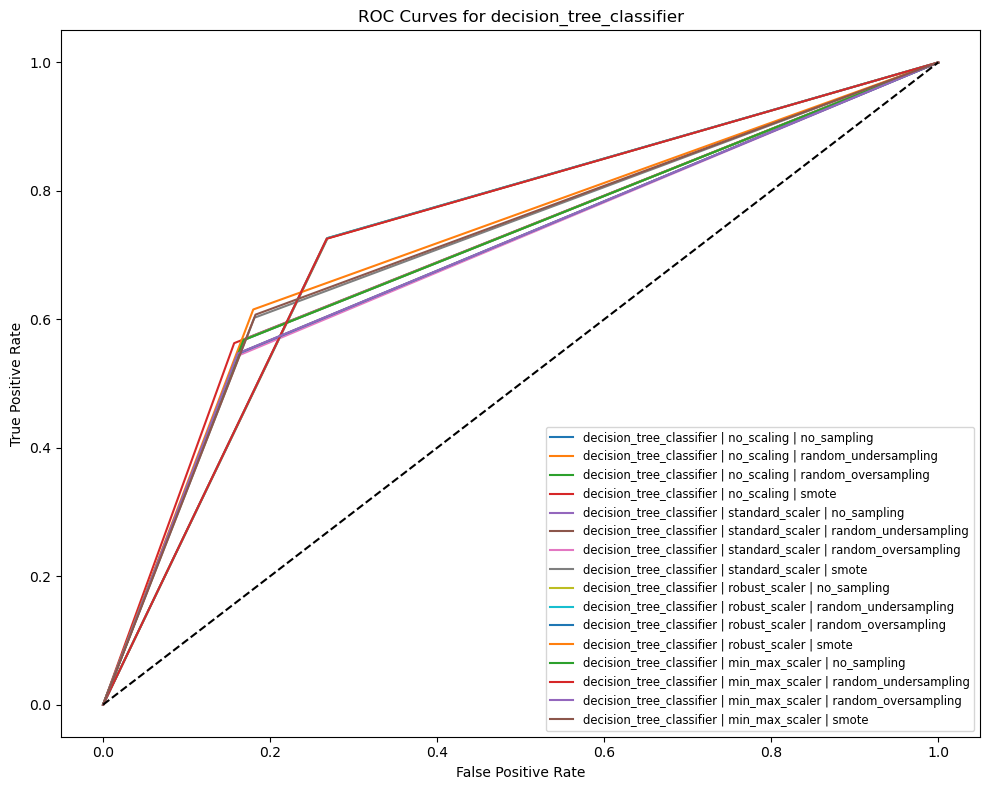

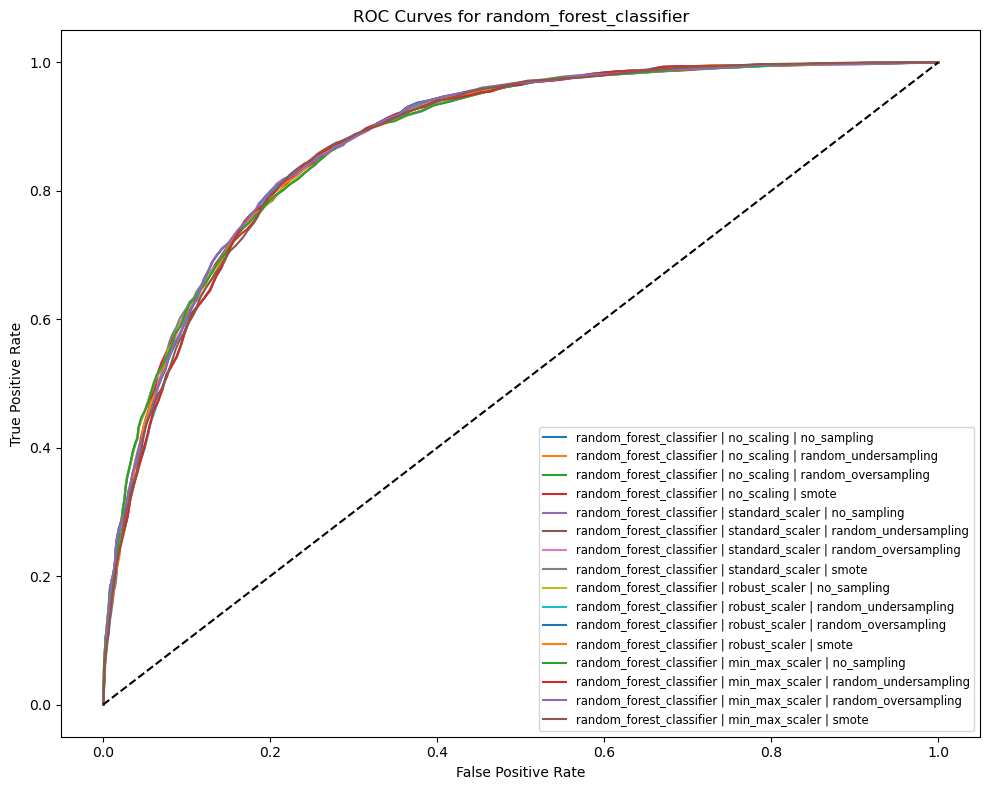

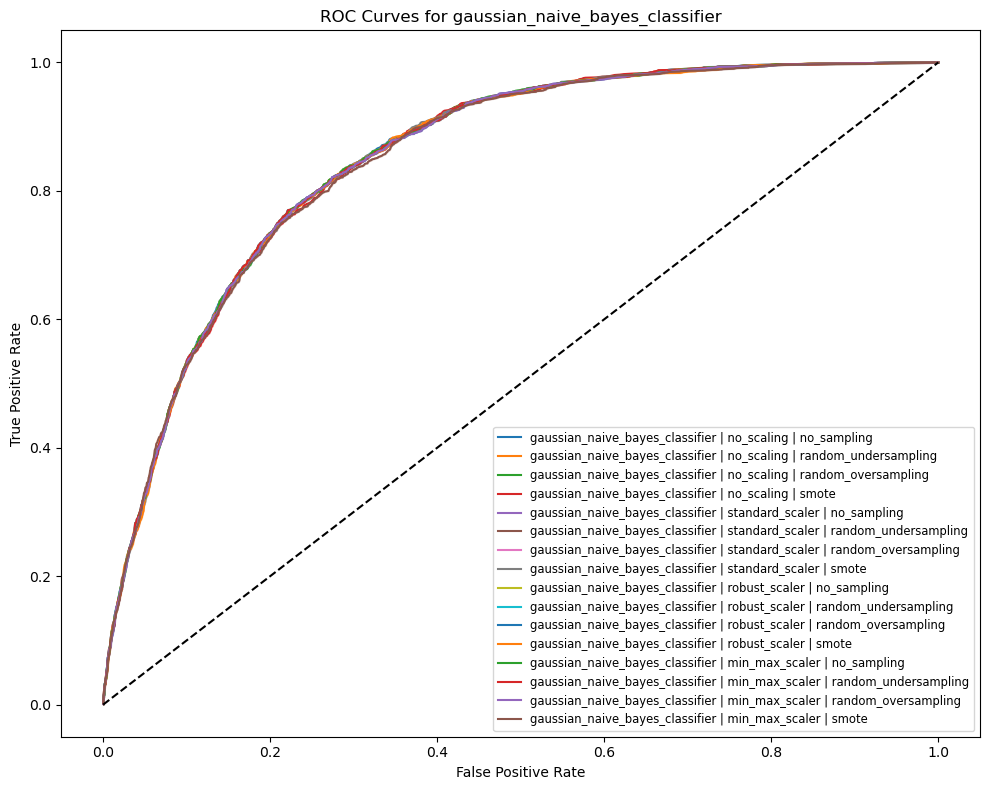

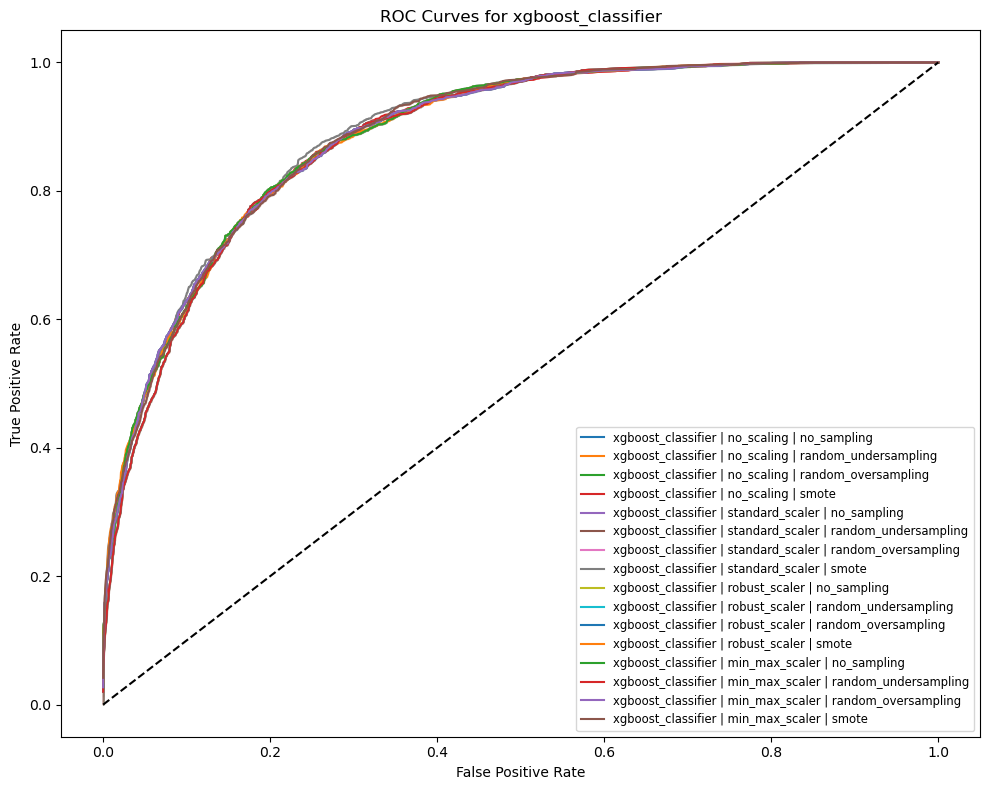

In [18]:
### Plotting ROC curves for each type of classification model. 

### Getting the unique model names from the results dataframe.
unique_model_names = results_df['classification_model'].unique()

### Looping through each model type and creating a ROC curve for each type containing all combinations of scaling and sampling techniques.
for model_name in unique_model_names:
    plt.figure(figsize = (10, 8))
    for (model_key, scaler_key, sampler_key), (false_positive_rate, true_positive_rate) in roc_data.items():
        if model_key == model_name:
            combination_label = f"{model_key} | {scaler_key} | {sampler_key}"
            sns.lineplot(x = false_positive_rate, y = true_positive_rate, label = combination_label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curves for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc = "lower right", fontsize = 'small')
    plt.tight_layout()
    plt.show()

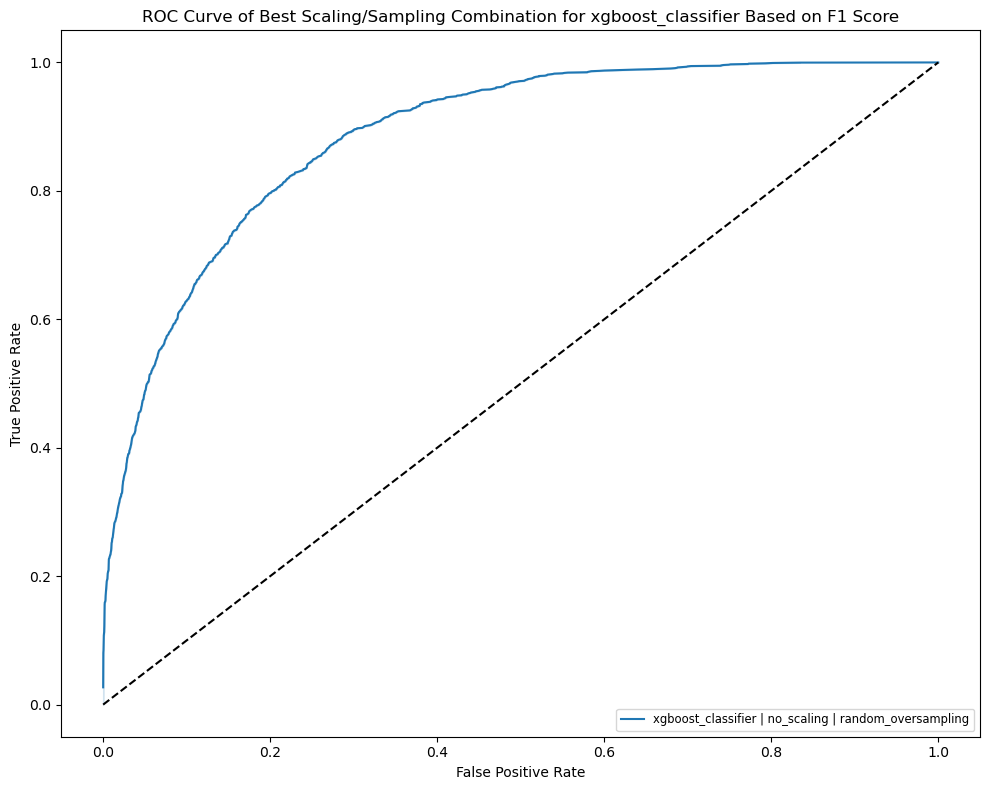

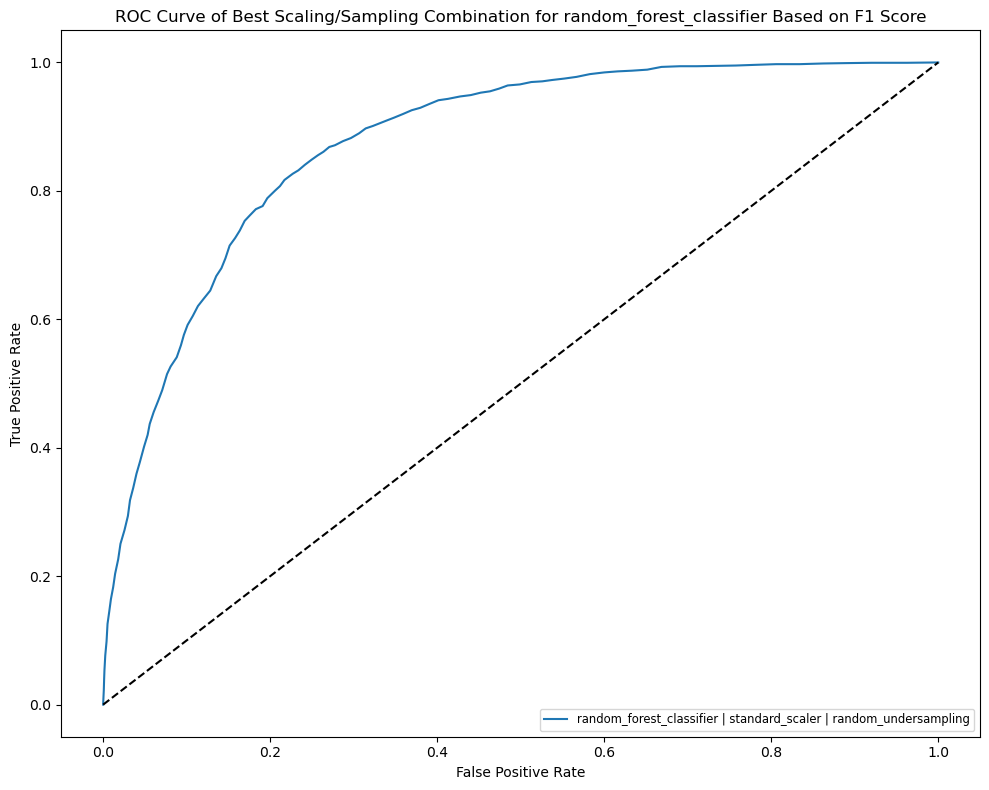

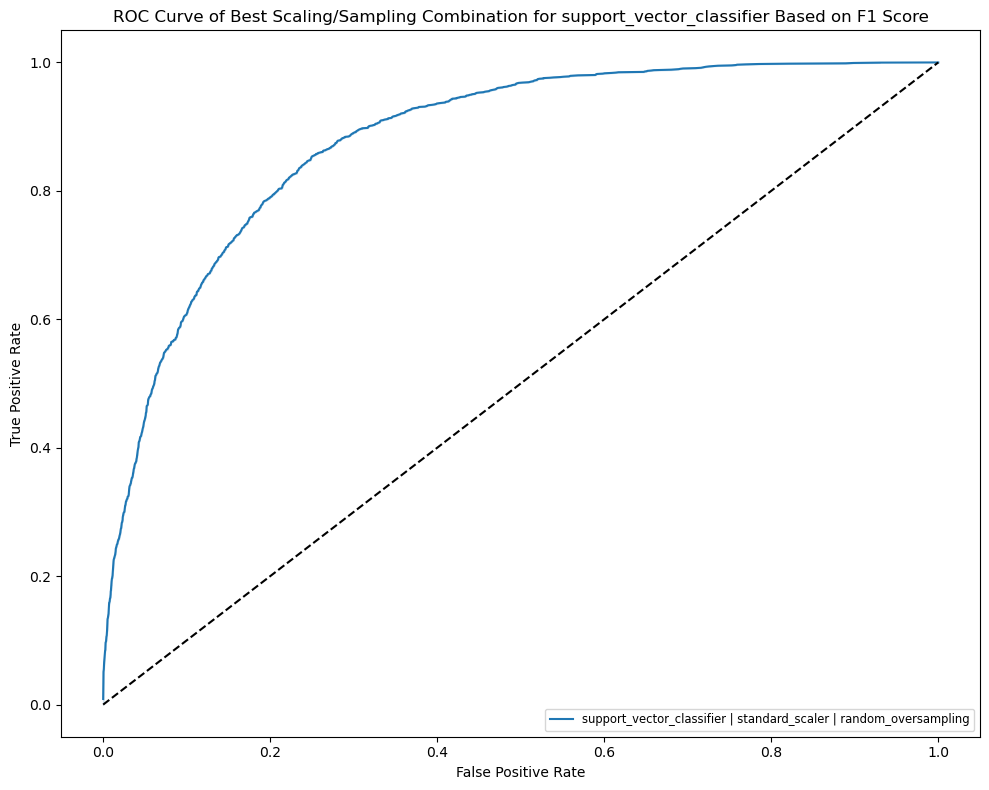

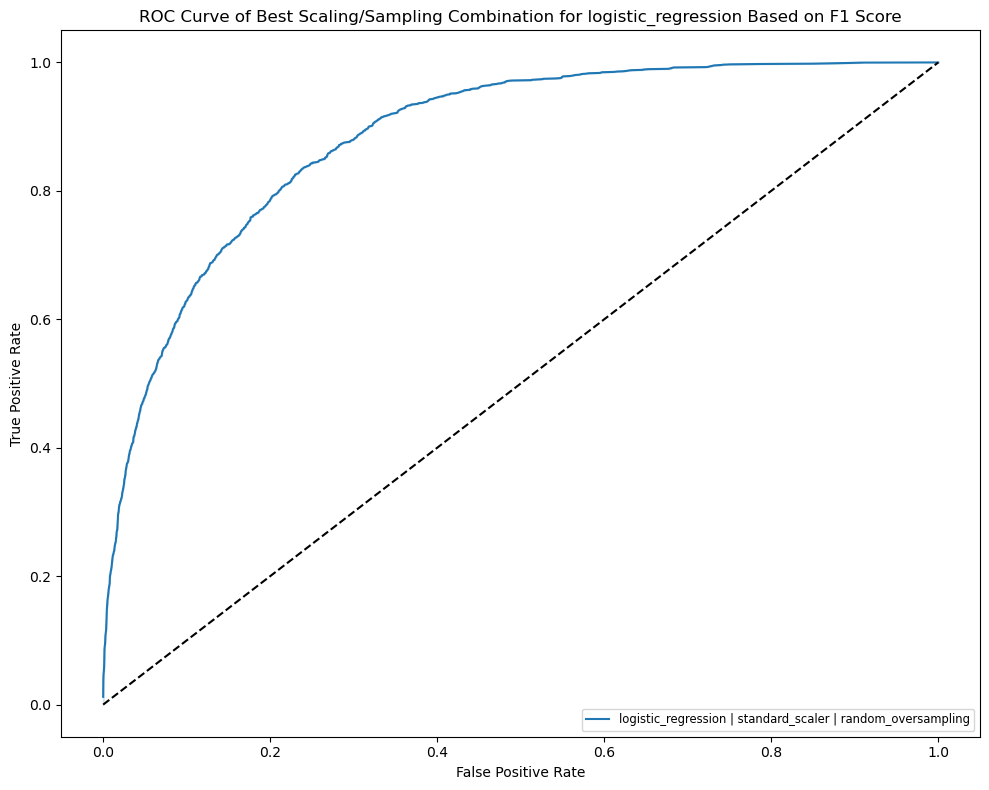

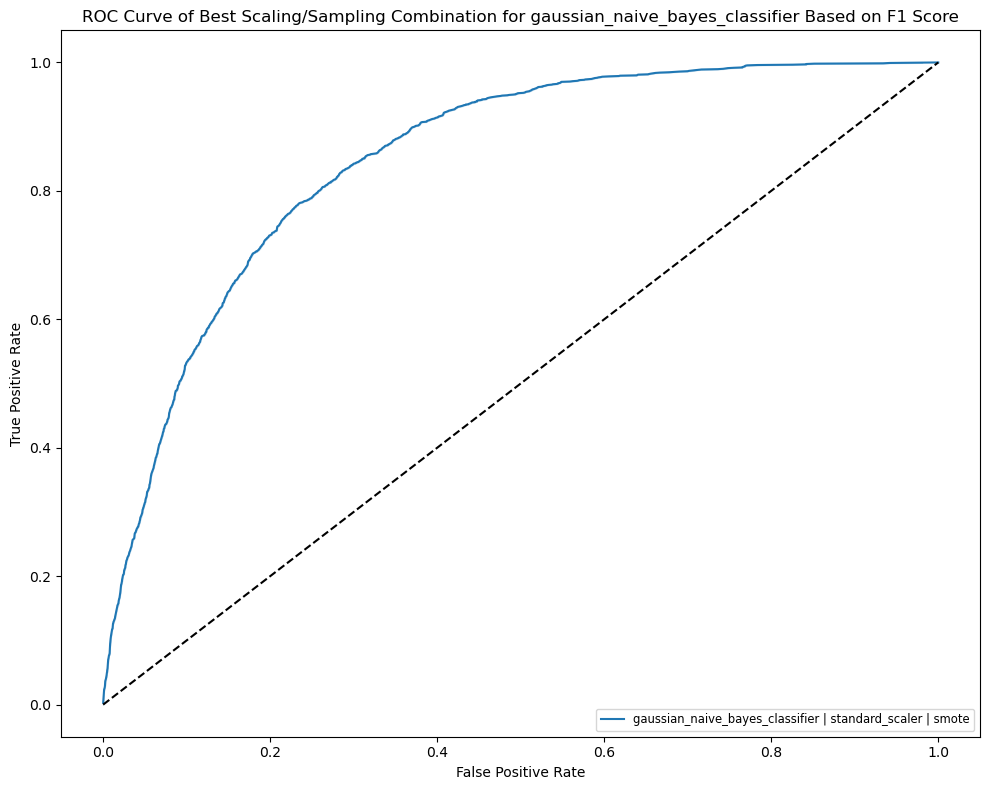

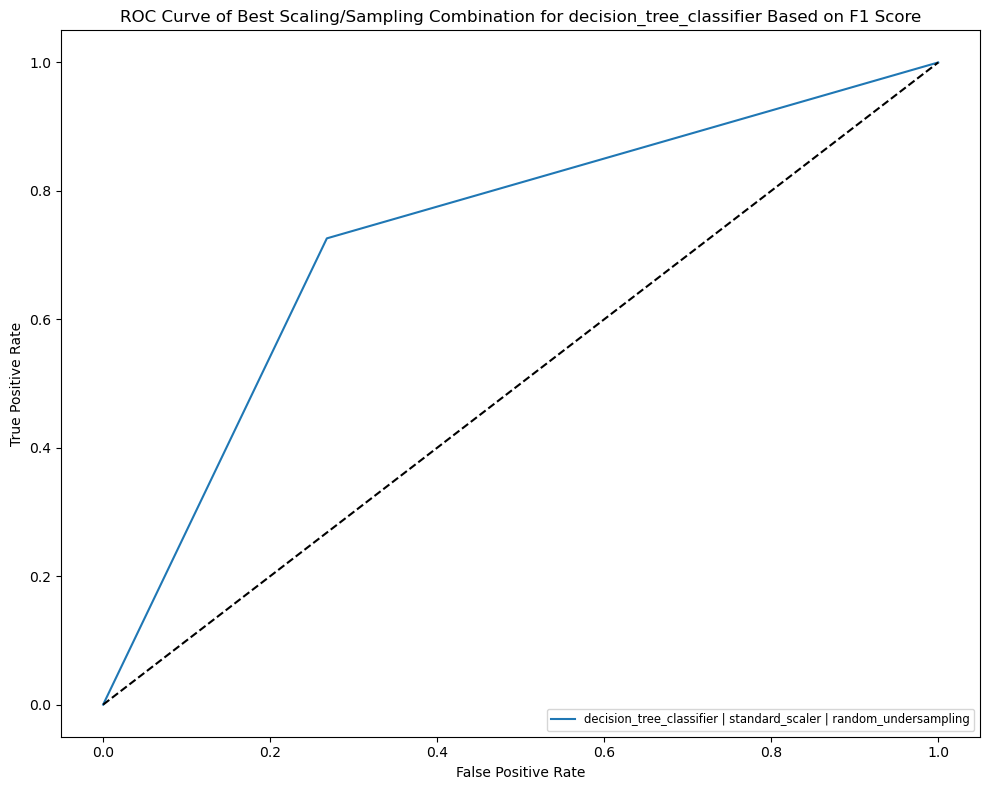

In [19]:
### Plotting ROC curves for the best scaling/sampling technique combinations for each type of classification model.

### Looping through each best scaling/sampling technique combinations and creating a ROC curve.
for index, row in best_combination_by_classification_model_f1.iterrows():
    model_name = row['classification_model']
    scaler_name = row['scaling_technique']
    sampler_name = row['sampling_technique']

    combination_key = (model_name, scaler_name, sampler_name)
    
    if combination_key in roc_data:
        false_positive_rate, true_positive_rate = roc_data[combination_key]

        plt.figure(figsize = (10, 8))
        combination_label = f"{model_name} | {scaler_name} | {sampler_name}"
        sns.lineplot(x = false_positive_rate, y = true_positive_rate, label = combination_label)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f"ROC Curve of Best Scaling/Sampling Combination for {model_name} Based on F1 Score")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(
loc = "lower right", fontsize = 'small')
        plt.tight_layout()
        plt.show()

In [20]:
### Hyper Parameter tuning for the best combination of scaling and sampling techniques for each model.

### Defining the hyper parameters for each model. 
hyperparameter_grids = {
  'logistic_regression': {
    'C': [0.1, 1.0, 10], ### Regularization strength: The smaller the value the stronger the regularization. [DEFAULT: 1.0]
    'penalty': ['l2'], ### Type of regularization applied to the model. L1 = Lasso, L2 = Ridge; we are not using L1 because it is not compatible with LBFGS. [DEFAULT: L2]
    'solver': ['liblinear', 'lbfgs'], ### Algorithm used to optimize the parameters. [DEFAULT: LBFGS]
    'class_weight': [None, 'balanced'] ### Class Weighting: Balanced automatically adjusts the weights inversely proportional to class frequencies [DEFAULT: NONE]
  }
    ,
    
  'support_vector_classifier': {
    'C': [0.1, 1.0, 10], ### Regularization strength: The smaller the value the stronger the regularization. [DEFAULT: 1.0]
    'kernel': ['linear', 'rbf', 'sigmoid'], ### Kernel type used in the algorithm. [DEFAULT: RBF]
    'gamma': ['scale', 'auto', 0.1, 1.0], ### Kernel coefficient. [DEFAULT: SCALE]
    'class_weight': [None, 'balanced'] ### Class Weighting: Balanced automatically adjusts the weights inversely proportional to class frequencies [DEFAULT: NONE]
  },
    
  'decision_tree_classifier': {
    'criterion': ['gini', 'entropy', 'log_loss'], ### The function used to measure the quality of a split. [DEFAULT: GINI]
    'max_depth': [None, 5, 10, 15], ### Max depth of the tree. [DEFAULT: NONE]
    'min_samples_split': [2, 10, 20], ### The minimum number of samples required to split an internal node. [DEFAULT: 2]
    'class_weight': [None, 'balanced'] ### Class Weighting: Balanced automatically adjusts the weights inversely proportional to class frequencies [DEFAULT: NONE]
  },
    
  'random_forest_classifier': {
    'n_estimators': [100, 200, 300], ### Number of trees in the forest. [DEFAULT: 100]
    'criterion': ['gini', 'entropy', 'log_loss'], ### The function used to measure the quality of a split. [DEFAULT: GINI]
    'max_depth': [None, 5, 10, 15], ### Max depth of the tree. [DEFAULT: NONE]
    'min_samples_split': [2, 10, 20], ### The minimum number of samples required to split an internal node. [DEFAULT: 2]
    'max_features': [None, 'sqrt', 'log2'], ### The number of features to consider when looking for the best split. [DEFAULT: SQRT]
    'class_weight': [None, 'balanced'] ### Class Weighting: Balanced automatically adjusts the weights inversely proportional to class frequencies [DEFAULT: NONE]
  },
    
  'gaussian_naive_bayes_classifier': { 
    'var_smoothing': [1e-9, 1e-7, 1e-5] ### Artificially adding a value to the variance of each feature, widening the distribution and accounting for more samples further from the mean. [DEFAULT: 1e-09]
  },
    
  'xgboost_classifier': {
    'n_estimators': [100, 200, 300], ### Number of boosting rounds. [DEFAULT: 100]
    'learning_rate': [0.1, 0.2, 0.3], ### Step size shrinkage [DEFAULT: 0.3]
    'max_depth': [3, 6], ### Max depth of the trees. [DEFAULT: 6]
    'subsample': [0.8, 1.0], ### The fraction of samples to be randomly sampled to build each tree. [DEFAULT: 1.0]
    'colsample_bytree': [0.8, 1.0] ### The fraction of features to be randomly sampled for building each tree. [DEFAULT: 1.0]
  }
}

#############################################################################################################################################################################################

### Defining additional scoring metrics for Gridsearch evaluation.
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

#############################################################################################################################################################################################
### Setting up KFold crossvalidation with 5 splits. 
cross_validation_strategy = KFold(n_splits = 5, shuffle = True, random_state = 22)

### Creating a container to store the results of each gridsearch. 
gridsearch_results_list = []

### Looping through the best combination of scaling and sampling techniques for each model based on F1 score.
for row_index, configuration_combination in best_combination_by_classification_model_f1.iterrows():
    classification_model_name = configuration_combination['classification_model']
    scaling_technique_name = configuration_combination['scaling_technique']
    sampling_technique_name = configuration_combination['sampling_technique']
    
    ### Getting the model, scaling/sampling techniques, and hyperparameter grids.
    classification_model = classification_models[classification_model_name]
    scaling_technique = scaling_techniques[scaling_technique_name]
    sampling_technique = sampling_techniques[sampling_technique_name]
    hyperparameter_grid = hyperparameter_grids.get(classification_model_name, {})

    ### Defining the input feature matrix (X) and the target variable vector (y).
    X_2 = X.copy()
    y_2 = y.copy()

    ### Applying the optimal scaling techniques for each model.
    if scaling_technique is not None:
        X_2[continuous_columns] = scaling_technique.fit_transform(X_2[continuous_columns])

    ### Applying the optimal sampling techniques for each model.
    if sampling_technique is not None:
        X_2, y_2 = sampling_technique.fit_resample(X_2, y_2)

    ### Setting up GridSearchCV to find the optimal combination of hyperparameters for each optimal combination of scaling/sampling techniques for each model.
    ### Scoring based on ROC_AUC
    grid_search = GridSearchCV(
        estimator = classification_model,
        param_grid = hyperparameter_grid,
        scoring = scoring_metrics,
        refit = 'f1',
        cv = cross_validation_strategy)
    grid_search.fit(X_2, y_2)

    ### Storing the best hyperparameters for each model from the gridsearch results. 
    gridsearch_results_list.append({
        'classification_model': classification_model_name,
        'scaling_technique': scaling_technique_name,
        'sampling_technique': sampling_technique_name,
        'best_hyperparameters': grid_search.best_params_,
        'accuracy': grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_],
        'precision': grid_search.cv_results_['mean_test_precision'][grid_search.best_index_],
        'recall': grid_search.cv_results_['mean_test_recall'][grid_search.best_index_],
        'f1_score': grid_search.best_score_,
        'roc_auc': grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_]
    })

In [21]:
print('Optimized Hyper Parameters Selected Based on The Best Average F1 Score.')
display(gridsearch_results_list)
print('\n')

Optimized Hyper Parameters Selected Based on The Best Average F1 Score.


[{'classification_model': 'xgboost_classifier',
  'scaling_technique': 'no_scaling',
  'sampling_technique': 'random_oversampling',
  'best_hyperparameters': {'colsample_bytree': 0.8,
   'learning_rate': 0.2,
   'max_depth': 6,
   'n_estimators': 300,
   'subsample': 0.8},
  'accuracy': 0.9142941994097917,
  'precision': 0.8745515273818633,
  'recall': 0.967229663433797,
  'f1_score': 0.9185548531948735,
  'roc_auc': 0.9710510634326217},
 {'classification_model': 'random_forest_classifier',
  'scaling_technique': 'standard_scaler',
  'sampling_technique': 'random_undersampling',
  'best_hyperparameters': {'class_weight': None,
   'criterion': 'entropy',
   'max_depth': 10,
   'max_features': None,
   'min_samples_split': 2,
   'n_estimators': 300},
  'accuracy': 0.7969560953260457,
  'precision': 0.7670849913568768,
  'recall': 0.8541957861050818,
  'f1_score': 0.8079683877935653,
  'roc_auc': 0.8784744131975708},
 {'classification_model': 'support_vector_classifier',
  'scaling_techni

In [22]:
### Converting the results into a pandas dataframe.
gridsearch_results_dataframe = pd.DataFrame(gridsearch_results_list).sort_values(by = 'f1_score', ascending = False)
print('gridsearch_results_dataframe:')
print('Optimized Hyper Parameters Selected Based on The Best Average F1 Score:')
display(gridsearch_results_dataframe)
print('\n')

gridsearch_results_dataframe:
Optimized Hyper Parameters Selected Based on The Best Average F1 Score:


classification_model scaling_technique    sampling_technique  \
2        support_vector_classifier   standard_scaler   random_oversampling   
0               xgboost_classifier        no_scaling   random_oversampling   
1         random_forest_classifier   standard_scaler  random_undersampling   
3              logistic_regression   standard_scaler   random_oversampling   
4  gaussian_naive_bayes_classifier   standard_scaler                 smote   
5         decision_tree_classifier   standard_scaler  random_undersampling   

                                best_hyperparameters  accuracy  precision  \
2  {'C': 10, 'class_weight': None, 'gamma': 1.0, ...  0.933082   0.960004   
0  {'colsample_bytree': 0.8, 'learning_rate': 0.2...  0.914294   0.874552   
1  {'class_weight': None, 'criterion': 'entropy',...  0.796956   0.767085   
3  {'C': 1.0, 'class_weight': 'balanced', 'penalt...  0.799632   0.781263   
4                           {'var_smoothing': 1e-09}  0.787236   0.775824   
5  {'class_weight': None, 'criterion': 'gini', 'm...  0.776082   0.744953   

     recall  f1_score   roc_auc  
2  0.903858  0.931057  0.967525  
0  0.967230  0.918555  0.971051  
1  0.854196  0.807968  0.878474  
3  0.832183  0.805904  0.887956  
4  0.808266  0.791667  0.869700  
5  0.842526  0.789896  0.848311

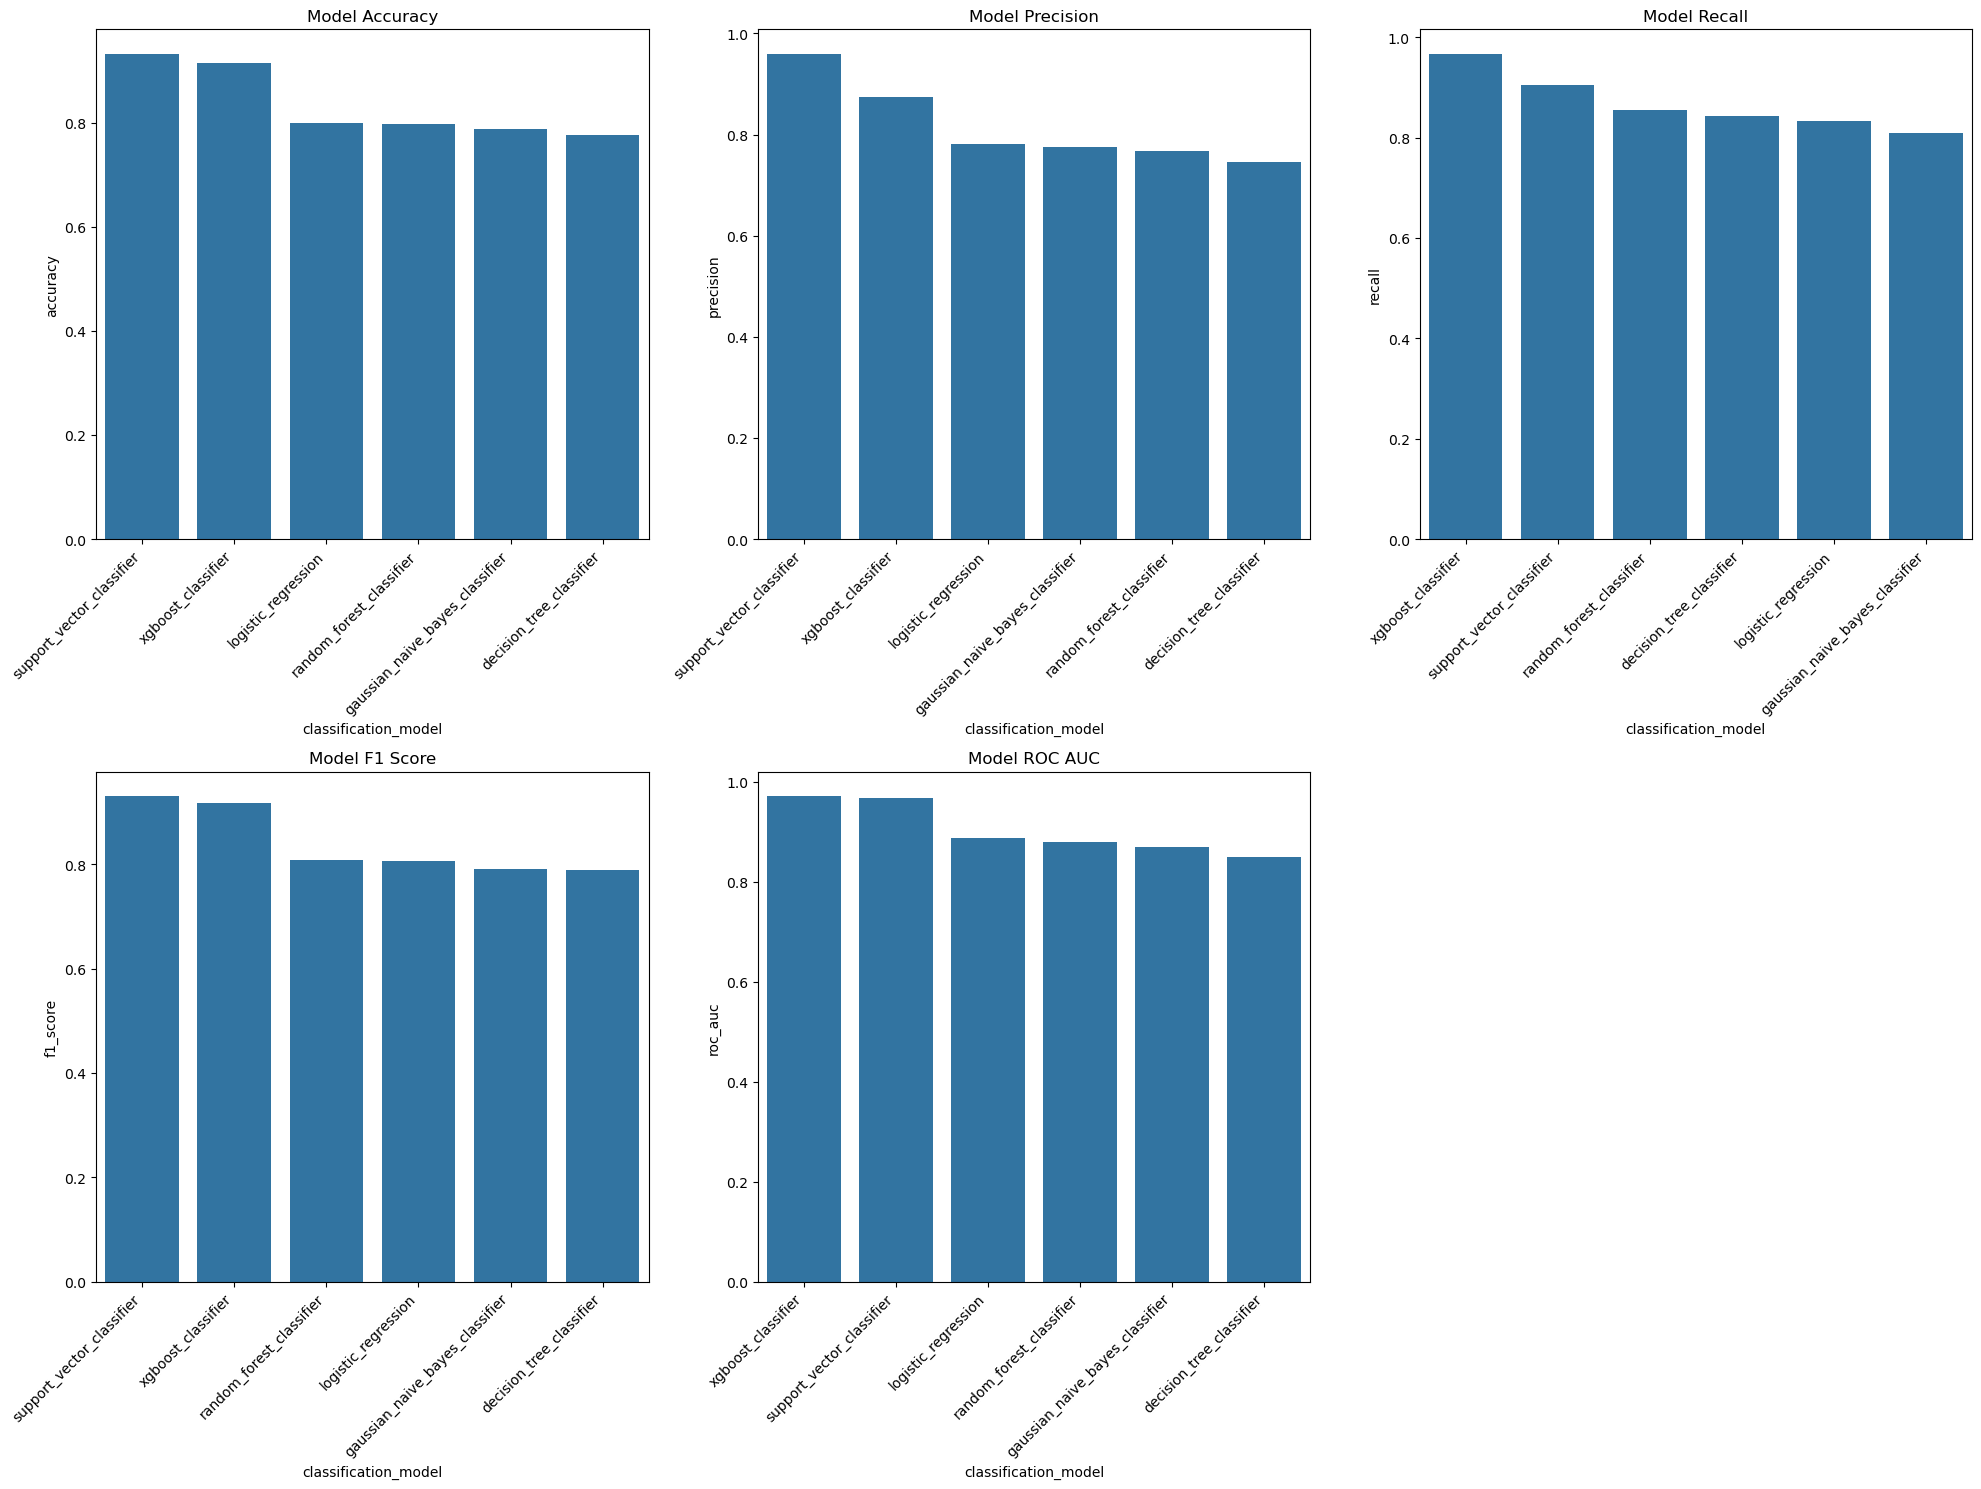

In [23]:
### Plotting the performance metrics from the models after optimizing the hyperparameters
plt.figure(figsize = (20, 15))

### Plotting Accuracy Performance
plt.subplot(2, 3, 1)
sns.barplot(x = 'classification_model', y = 'accuracy', data = gridsearch_results_dataframe.sort_values(by = 'accuracy', ascending = False))
plt.title('Model Accuracy')
plt.xticks(rotation = 45, ha = 'right')

### Plotting Precision Performance
plt.subplot(2, 3, 2)
sns.barplot(x = 'classification_model', y = 'precision', data = gridsearch_results_dataframe.sort_values(by = 'precision', ascending = False))
plt.title('Model Precision')
plt.xticks(rotation = 45, ha = 'right')

### Plotting Recall Performance
plt.subplot(2, 3, 3)
sns.barplot(x = 'classification_model', y = 'recall', data = gridsearch_results_dataframe.sort_values(by = 'recall', ascending = False))
plt.title('Model Recall')
plt.xticks(rotation = 45, ha = 'right')

### Plotting F1 Score Performance
plt.subplot(2, 3, 4)
sns.barplot(x = 'classification_model', y = 'f1_score', data = gridsearch_results_dataframe.sort_values(by = 'f1_score', ascending = False))
plt.title('Model F1 Score')
plt.xticks(rotation = 45, ha = 'right')

### Plotting ROC AUC Performance
plt.subplot(2, 3, 5)
sns.barplot(x = 'classification_model', y = 'roc_auc', data = gridsearch_results_dataframe.sort_values(by = 'roc_auc', ascending = False))
plt.title('Model ROC AUC')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()


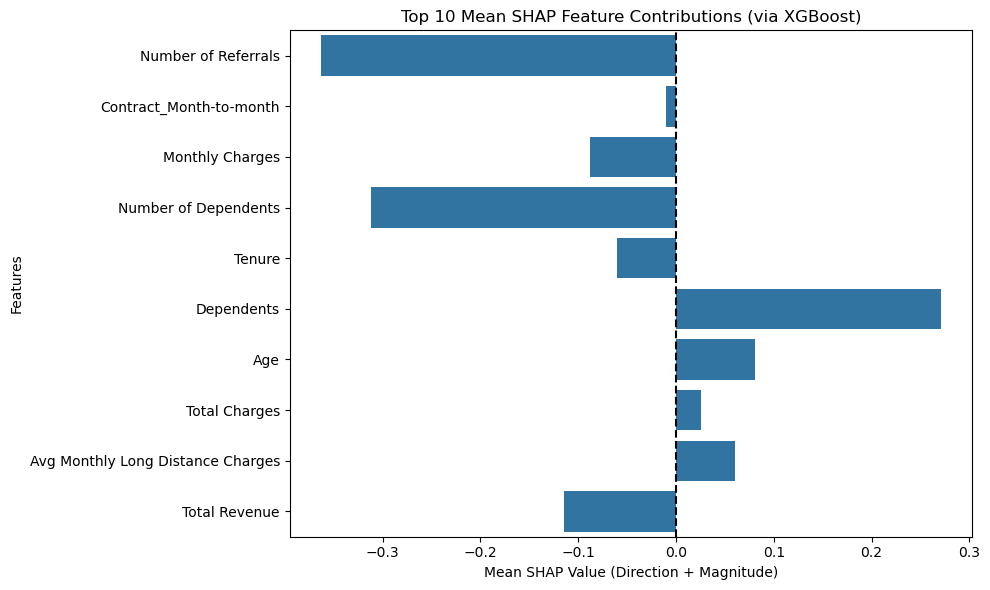



shap_df:


Feature  Mean_SHAP_value  \
7                        Number of Referrals        -0.363347   
37                   Contract_Month-to-month        -0.010587   
22                           Monthly Charges        -0.088123   
5                       Number of Dependents        -0.312016   
8                                     Tenure        -0.060070   
4                                 Dependents         0.271081   
0                                        Age         0.080936   
23                             Total Charges         0.025300   
10         Avg Monthly Long Distance Charges         0.059906   
27                             Total Revenue        -0.114075   
6                          Referred a Friend         0.087265   
26               Total Long Distance Charges         0.012631   
12                   Avg Monthly GB Download         0.035204   
13                           Online Security        -0.003409   
16                      Premium Tech Support         0.001921   
42           Payment Method_Electronic check        -0.006331   
21                         Paperless Billing         0.005460   
39                         Contract_Two year        -0.035785   
17                              Streaming TV         0.018091   
19                           Streaming Music         0.005309   
30                         Multiple Lines_No         0.003493   
3                                    Partner         0.027072   
28                             Gender_Female         0.008303   
14                             Online Backup         0.014151   
43               Payment Method_Mailed check         0.001982   
18                          Streaming Movies        -0.007459   
33                       Internet Type_Cable         0.013609   
15                    Device Protection Plan         0.010290   
34                         Internet Type_DSL         0.001940   
41    Payment Method_Credit card (automatic)        -0.002274   
32                        Multiple Lines_Yes         0.000740   
29                               Gender_Male         0.000302   
38                         Contract_One year        -0.017796   
40  Payment Method_Bank transfer (automatic)         0.003491   
25                  Total Extra Data Charges         0.004867   
24                             Total Refunds         0.000743   
20                            Unlimited Data         0.005330   
36                 Internet Type_No Internet         0.001285   
35                 Internet Type_Fiber Optic         0.003778   
11                          Internet Service         0.006307   
1                                   Under 30        -0.000982   
2                             Senior Citizen         0.006198   
9                              Phone Service        -0.001412   
31           Multiple Lines_No phone service         0.000000   

    Mean_ABS_SHAP_value  
7              1.006999  
37             0.986154  
22             0.771502  
5              0.670610  
8              0.464272  
4              0.432241  
0              0.421825  
23             0.420651  
10             0.415025  
27             0.414265  
6              0.354522  
26             0.334532  
12             0.308798  
13             0.272166  
16             0.265257  
42             0.259798  
21             0.241869  
39             0.188249  
17             0.176115  
19             0.154529  
30             0.146064  
3              0.145965  
28             0.130632  
14             0.128032  
43             0.103367  
18             0.093174  
33             0.081805  
15             0.075136  
34             0.066726  
41             0.062237  
32             0.055273  
29             0.041088  
38             0.041006  
40             0.037484  
25             0.036689  
24             0.035181  
20             0.027506  
36             0.027077  
35             0.026590  
11             0.019949  
1              0.019594  
2              0.01

In [24]:
### SHAP Feature Importances
### Extract the optimal XGBoost configuration from gridsearch_results_list
xgb_config = next(cfg for cfg in gridsearch_results_list if cfg['classification_model'] == 'xgboost_classifier')

### Initializing the XGBoost model with the optimized hyperparameters.
xgb_model = XGBClassifier(random_state= 22)
xgb_model.set_params(**xgb_config['best_hyperparameters'])

### Defining the input feature matrix (X) and the target variable vector (y).
X_SHAP = X.copy()
y_SHAP = y.copy()

### Applying the optimal scaling techniques.
if scaling_technique is not None:
    X_SHAP[continuous_columns] = scaling_technique.fit_transform(X_SHAP[continuous_columns])
### Applying the optimal sampling techniques.
if sampling_technique is not None:
    X_SHAP, y_SHAP = sampling_technique.fit_resample(X_SHAP, y_SHAP)

### Fitting the model.
xgb_model.fit(X_SHAP, y_SHAP)

### SHAP analysis
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_SHAP)

### Creating a feature importance dataframe.
shap_df = pd.DataFrame({
    'Feature': X_SHAP.columns,
    'Mean_SHAP_value': shap_values.mean(axis = 0),
    'Mean_ABS_SHAP_value': np.abs(shap_values).mean(axis = 0)
}).sort_values('Mean_ABS_SHAP_value', ascending = False)

### Plotting the top 10 Mean SHAP Feature Contributions sorted by mean absolute shap values
plt.figure(figsize = (10, 6))
sns.barplot(data = shap_df.head(10), x = 'Mean_SHAP_value', y = 'Feature')
plt.title('Top 10 Mean SHAP Feature Contributions (via XGBoost)')
plt.xlabel('Mean SHAP Value (Direction + Magnitude)')
plt.ylabel('Features')
plt.axvline(0, color = 'black', linestyle = '--')
plt.tight_layout()
plt.show()
print('\n')

### Displaying the feature importance dataframe.
print('shap_df:')
display(shap_df)
print('\n')

In [25]:
###############################################################################################################################################
###############################################################################################################################################
###############################################################################################################################################
###############################################################################################################################################

In [56]:
### Applying feature engineering techniques to the orignal dataframe to see if we can improve results.
### Creating a new DataFrame with engineered Features
telco_churn_engineered_features_df = telco_churn_df.copy()

########################################################################################################################################
### Bracketing Existing Columns
### Age Binning
age_bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80]
age_bin_labels = ['0-10 Years', '11-20 Years', '21-30 Years', '31-40 Years', '41-50 Years', '51-60 Years', '61-70 Years', '71-80 Years']
telco_churn_engineered_features_df['Age_Bracket'] = pd.cut(telco_churn_engineered_features_df['Age'], bins = age_bins, labels = age_bin_labels, right = True)

### Tenure Binning
tenure_bins =  [-1, 3, 6, 12, 18, 24, 36, 48, 60, 72]
tenure_bin_labels = ['0-3 Months', '4-6 Months', '7-12 Months', '13-18 Months', '19-24 Months', '25-36 Months', '37-48 Months', '49-60 Months', '61-72 Months']
telco_churn_engineered_features_df['Tenure_Bracket'] = pd.cut(telco_churn_engineered_features_df['Tenure'], bins = tenure_bins, labels = tenure_bin_labels, right = True)

### Monthly Charges Binning
monthly_charge_bins =  [-1, 10, 20, 30, 40, 60, 80, 100, 120]
monthly_charge_bin_labels = ['$0-10', '$11-20', '$21-30', '$31-40', '$41-60', '$61-80', '$81-100', '$101-120']
telco_churn_engineered_features_df['Monthly_Charges_Bracket'] = pd.cut(telco_churn_engineered_features_df['Monthly Charges'], bins = monthly_charge_bins, labels = monthly_charge_bin_labels, right = True)

### Average Monthly GB Download Binning
avg_monthly_gb_bins =  [-1, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90]
avg_monthly_gb_bin_labels = ['0-5 Gbs', '6-10 Gbs', '11-15 Gbs', '16-20 Gbs', '21-25 Gbs', '26-30 Gbs', '31-40 Gbs', '41-50 Gbs', '51-60 Gbs', '61-70 Gbs', '71-80 Gbs', '81-90 Gbs']
telco_churn_engineered_features_df['AVG_Monthly_Gb_Bracket'] = pd.cut(telco_churn_engineered_features_df['Avg Monthly GB Download'], bins = avg_monthly_gb_bins, labels = avg_monthly_gb_bin_labels, right = True)

########################################################################################################################################
### Deriving New Columns
### Total Number of Services Column
service_columns = ['Phone Service', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
telco_churn_engineered_features_df['Total_Number_of_Services'] = telco_churn_engineered_features_df[service_columns].sum(axis = 1).astype(float)

### Service Penetration Rate Column
telco_churn_engineered_features_df['Service_Penetration_Rate'] = (telco_churn_engineered_features_df['Total_Number_of_Services'] / len(service_columns)).astype(float)

### Has Family Indicator Column
telco_churn_engineered_features_df['Has_Family'] = ((telco_churn_engineered_features_df['Partner'] == 1.0) | (telco_churn_engineered_features_df['Dependents'] == 1.0)).astype(float)

### Family Size Column
telco_churn_engineered_features_df['Family_Size'] = ((1.0 + telco_churn_engineered_features_df['Partner']) + telco_churn_engineered_features_df['Number of Dependents']).astype(float)

### Referral Rate
telco_churn_engineered_features_df['Referral_Rate'] = (telco_churn_engineered_features_df['Number of Referrals'] / (telco_churn_engineered_features_df['Tenure'] + 1.0)).astype(float)

### Refund Rate
telco_churn_engineered_features_df['Refund_Rate'] = (telco_churn_engineered_features_df['Total Refunds'] / (telco_churn_engineered_features_df['Total Charges'] + 1.0)).astype(float)

### Monthly Cost per GB
telco_churn_engineered_features_df['Monthly_Cost_Per_Gb'] = (telco_churn_engineered_features_df['Monthly Charges'] / (telco_churn_engineered_features_df['Avg Monthly GB Download'] + 1.0)).astype(float)

### Extra Charges Ratio
telco_churn_engineered_features_df['Extra_Charges_Ratio'] = (telco_churn_engineered_features_df['Total Extra Data Charges'] / (telco_churn_engineered_features_df['Total Charges'] + 1.0)).astype(float)


########################################################################################################################################
### Dropping the columns we applied binning techniques to.
telco_churn_engineered_features_df = telco_churn_engineered_features_df.drop(columns = ['Age', 'Tenure', 'Monthly Charges', 'Avg Monthly GB Download'])


########################################################################################################################################
### One-Hot-Encoding categorical/nominal columns
telco_churn_engineered_features_df_encoded = pd.get_dummies(telco_churn_engineered_features_df, columns=['Gender', 'Multiple Lines', 'Internet Type', 'Contract', 'Payment Method', 'Age_Bracket', 'Tenure_Bracket', 'Monthly_Charges_Bracket', 'AVG_Monthly_Gb_Bracket'], dtype = float)

### Excluding the churn column (the column that we are predicting)
telco_churn_engineered_features_df_encoded_excluding_churn = telco_churn_engineered_features_df_encoded.drop(columns = ['Churn'])


In [58]:
### Displaying the new Dataframe with engineered features.
print("telco_churn_engineered_features_df:")
display(telco_churn_engineered_features_df.head())
print('\n')

### Summary statistics
print("Summary statistics:")
display(telco_churn_engineered_features_df.describe(include = 'all'))
print('\n')

### Number of missing values
print("Number of missing values:")
display(telco_churn_engineered_features_df.isna().sum())
print('\n')

### Number of unique values
print("Number of unique values:")
display(telco_churn_engineered_features_df.nunique())
print('\n')

telco_churn_engineered_features_df:


Gender  Under 30  Senior Citizen  Partner  Dependents  \
0  Female       0.0             0.0      1.0         1.0   
1    Male       0.0             0.0      0.0         0.0   
2    Male       0.0             0.0      0.0         0.0   
3    Male       0.0             1.0      1.0         0.0   
4  Female       0.0             1.0      1.0         0.0   

   Number of Dependents  Referred a Friend  Number of Referrals  \
0                   0.0                1.0                  2.0   
1                   0.0                0.0                  0.0   
2                   0.0                0.0                  0.0   
3                   0.0                1.0                  1.0   
4                   0.0                1.0                  3.0   

   Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0            1.0                              42.39             No   
1            1.0                              10.69            Yes   
2            1.0                              33.65             No   
3            1.0                              27.82             No   
4            1.0                               7.38             No   

   Internet Service Internet Type  Online Security  Online Backup  \
0               1.0         Cable              0.0            1.0   
1               1.0         Cable              0.0            0.0   
2               1.0   Fiber Optic              0.0            0.0   
3               1.0   Fiber Optic              0.0            1.0   
4               1.0   Fiber Optic              0.0            0.0   

   Device Protection Plan  Premium Tech Support  Streaming TV  \
0                     0.0                   1.0           1.0   
1                     0.0                   0.0           0.0   
2                     1.0                   0.0           0.0   
3                     1.0                   0.0           1.0   
4                     0.0                   1.0           1.0   

   Streaming Movies  Streaming Music  Unlimited Data        Contract  \
0               0.0              0.0             1.0        One year   
1               1.0              1.0             0.0  Month-to-month   
2               0.0              0.0             1.0  Month-to-month   
3               1.0              0.0             1.0  Month-to-month   
4               0.0              0.0             1.0  Month-to-month   

   Paperless Billing    Payment Method  Total Charges  Total Refunds  \
0                1.0      Mailed check         593.30           0.00   
1                0.0      Mailed check         542.40          38.33   
2                1.0  Electronic check         280.85           0.00   
3                1.0  Electronic check        1237.85           0.00   
4                1.0      Mailed check         267.40           0.00   

   Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       0.0                       381.51         974.81   
1                      10.0                        96.21         610.28   
2                       0.0                       134.60         415.45   
3                       0.0                       361.66        1599.51   
4                       0.0                        22.14         289.54   

   Churn  Age_Bracket Tenure_Bracket Monthly_Charges_Bracket  \
0    0.0  31-40 Years    7-12 Months                  $61-80   
1    0.0  41-50 Years    7-12 Months                  $41-60   
2    1.0  41-50 Years     4-6 Months                  $61-80   
3    1.0  71-80 Years   13-18 Months                 $81-100   
4    1.0  71-80 Years     0-3 Months                 $81-100   

  AVG_Monthly_Gb_Bracket  Total_Number_of_Services  Service_Penetration_Rate  \
0              16-20 Gbs                       6.0                       0.6   
1               6-10 Gbs                       4.0                       0.4   
2              26-30 Gbs                       4.0                    



Summary statistics:


Gender     Under 30  Senior Citizen      Partner   Dependents  \
count    7032  7032.000000     7032.000000  7032.000000  7032.000000   
unique      2          NaN             NaN          NaN          NaN   
top      Male          NaN             NaN          NaN          NaN   
freq     3549          NaN             NaN          NaN          NaN   
mean      NaN     0.198663        0.162400     0.482509     0.298493   
std       NaN     0.399022        0.368844     0.499729     0.457629   
min       NaN     0.000000        0.000000     0.000000     0.000000   
25%       NaN     0.000000        0.000000     0.000000     0.000000   
50%       NaN     0.000000        0.000000     0.000000     0.000000   
75%       NaN     0.000000        0.000000     1.000000     1.000000   
max       NaN     1.000000        1.000000     1.000000     1.000000   

        Number of Dependents  Referred a Friend  Number of Referrals  \
count            7032.000000        7032.000000          7032.000000   
unique                   NaN                NaN                  NaN   
top                      NaN                NaN                  NaN   
freq                     NaN                NaN                  NaN   
mean                0.467577           0.456911             1.949232   
std                 0.962134           0.498175             3.001324   
min                 0.000000           0.000000             0.000000   
25%                 0.000000           0.000000             0.000000   
50%                 0.000000           0.000000             0.000000   
75%                 0.000000           1.000000             3.000000   
max                 9.000000           1.000000            11.000000   

        Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
count     7032.000000                        7032.000000           7032   
unique            NaN                                NaN              3   
top               NaN                                NaN             No   
freq              NaN                                NaN           3385   
mean         0.903299                          22.963471            NaN   
std          0.295571                          15.449368            NaN   
min          0.000000                           0.000000            NaN   
25%          1.000000                           9.210000            NaN   
50%          1.000000                          22.890000            NaN   
75%          1.000000                          36.412500            NaN   
max          1.000000                          49.990000            NaN   

        Internet Service Internet Type  Online Security  Online Backup  \
count        7032.000000          7032      7032.000000    7032.000000   
unique               NaN             4              NaN            NaN   
top                  NaN   Fiber Optic              NaN            NaN   
freq                 NaN          3035              NaN            NaN   
mean            0.783845           NaN         0.286547       0.344852   
std             0.411650           NaN         0.452180       0.475354   
min             0.000000           NaN         0.000000       0.000000   
25%             1.000000           NaN         0.000000       0.000000   
50%             1.000000           NaN         0.000000       0.000000   
75%             1.000000           NaN         1.000000       1.000000   
max             1.000000           NaN         1.000000       1.000000   

        Device Protection Plan  Premium Tech Support  Streaming TV  \
count              7032.000000           7032.000000   7032.000000   
unique                     NaN                   NaN           NaN   
top                        NaN                   NaN           NaN   
freq                       NaN                   NaN           NaN   
mean                  0.343857              0.290102      0.384386   
std                   0.475028              0.453842      0.486484 



Number of missing values:


Gender                               0
Under 30                             0
Senior Citizen                       0
Partner                              0
Dependents                           0
Number of Dependents                 0
Referred a Friend                    0
Number of Referrals                  0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Total Charges                        0
Total Refunds            



Number of unique values:


Gender                                  2
Under 30                                2
Senior Citizen                          2
Partner                                 2
Dependents                              2
Number of Dependents                   10
Referred a Friend                       2
Number of Referrals                    12
Phone Service                           2
Avg Monthly Long Distance Charges    3582
Multiple Lines                          3
Internet Service                        2
Internet Type                           4
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                        2
Streaming Music                         2
Unlimited Data                          2
Contract                                3
Paperless Billing                       2
Payment Method                    

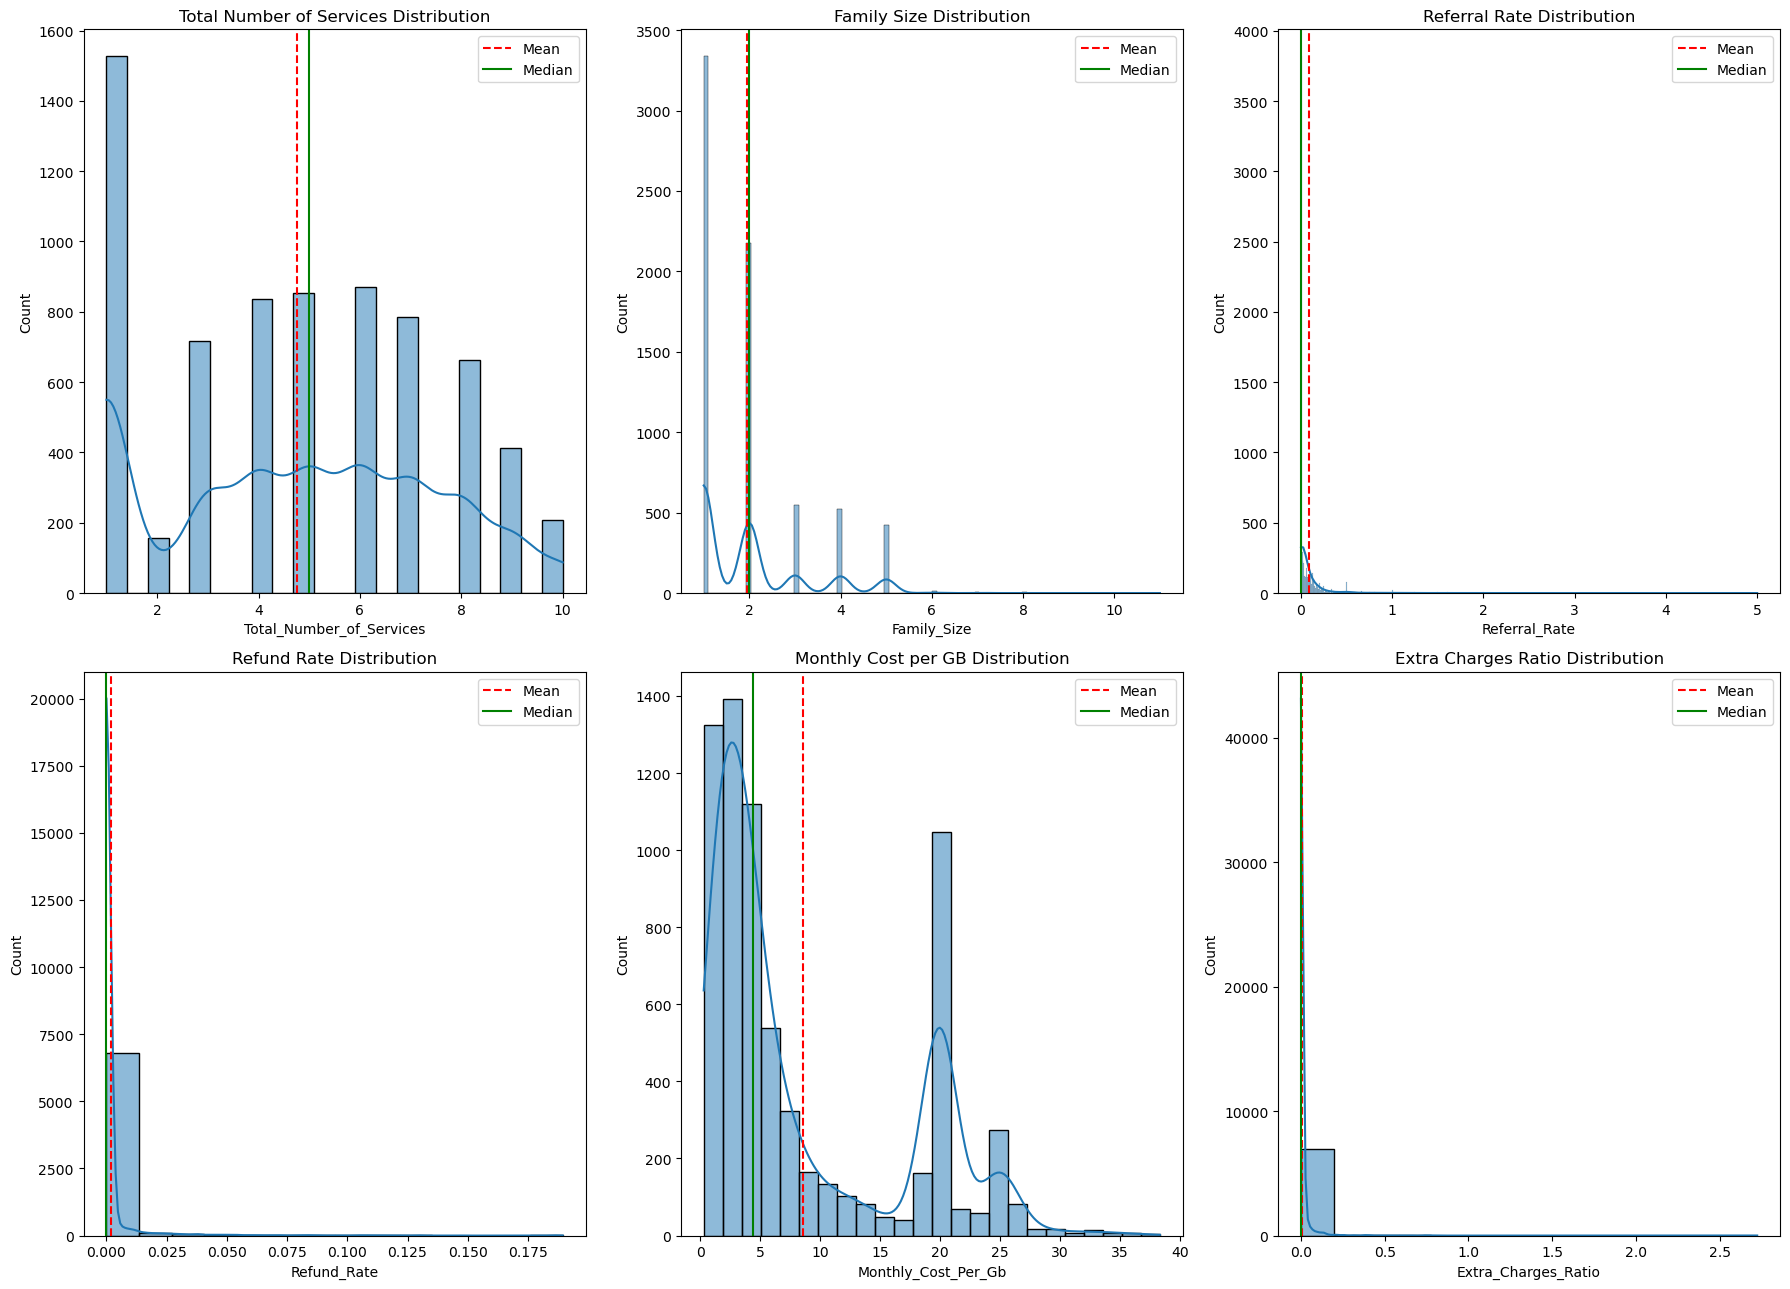

In [60]:
### Distribution of Newly Engineered Numerical Features
plt.figure(figsize = (18, 13))

### Total Number of Services Distribution
plt.subplot(2, 3, 1)
sns.histplot(telco_churn_engineered_features_df['Total_Number_of_Services'], kde = True)
plt.axvline(telco_churn_engineered_features_df['Total_Number_of_Services'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_engineered_features_df['Total_Number_of_Services'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Total Number of Services Distribution')

### Family Size Distribution
plt.subplot(2, 3, 2)
sns.histplot(telco_churn_engineered_features_df['Family_Size'], kde = True)
plt.axvline(telco_churn_engineered_features_df['Family_Size'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_engineered_features_df['Family_Size'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Family Size Distribution')

### Referral Rate Distribution
plt.subplot(2, 3, 3)
sns.histplot(telco_churn_engineered_features_df['Referral_Rate'], kde = True)
plt.axvline(telco_churn_engineered_features_df['Referral_Rate'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_engineered_features_df['Referral_Rate'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Referral Rate Distribution')

### Refund Rate Distribution
plt.subplot(2, 3, 4)
sns.histplot(telco_churn_engineered_features_df['Refund_Rate'], kde = True)
plt.axvline(telco_churn_engineered_features_df['Refund_Rate'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_engineered_features_df['Refund_Rate'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Refund Rate Distribution')

### Monthly Cost per GB Distribution
plt.subplot(2, 3, 5)
sns.histplot(telco_churn_engineered_features_df['Monthly_Cost_Per_Gb'], kde = True)
plt.axvline(telco_churn_engineered_features_df['Monthly_Cost_Per_Gb'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_engineered_features_df['Monthly_Cost_Per_Gb'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Monthly Cost per GB Distribution')

### Extra Charges Ratio
plt.subplot(2, 3, 6)
sns.histplot(telco_churn_engineered_features_df['Extra_Charges_Ratio'], kde = True)
plt.axvline(telco_churn_engineered_features_df['Extra_Charges_Ratio'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(telco_churn_engineered_features_df['Extra_Charges_Ratio'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Extra Charges Ratio Distribution')



plt.tight_layout()
plt.show()

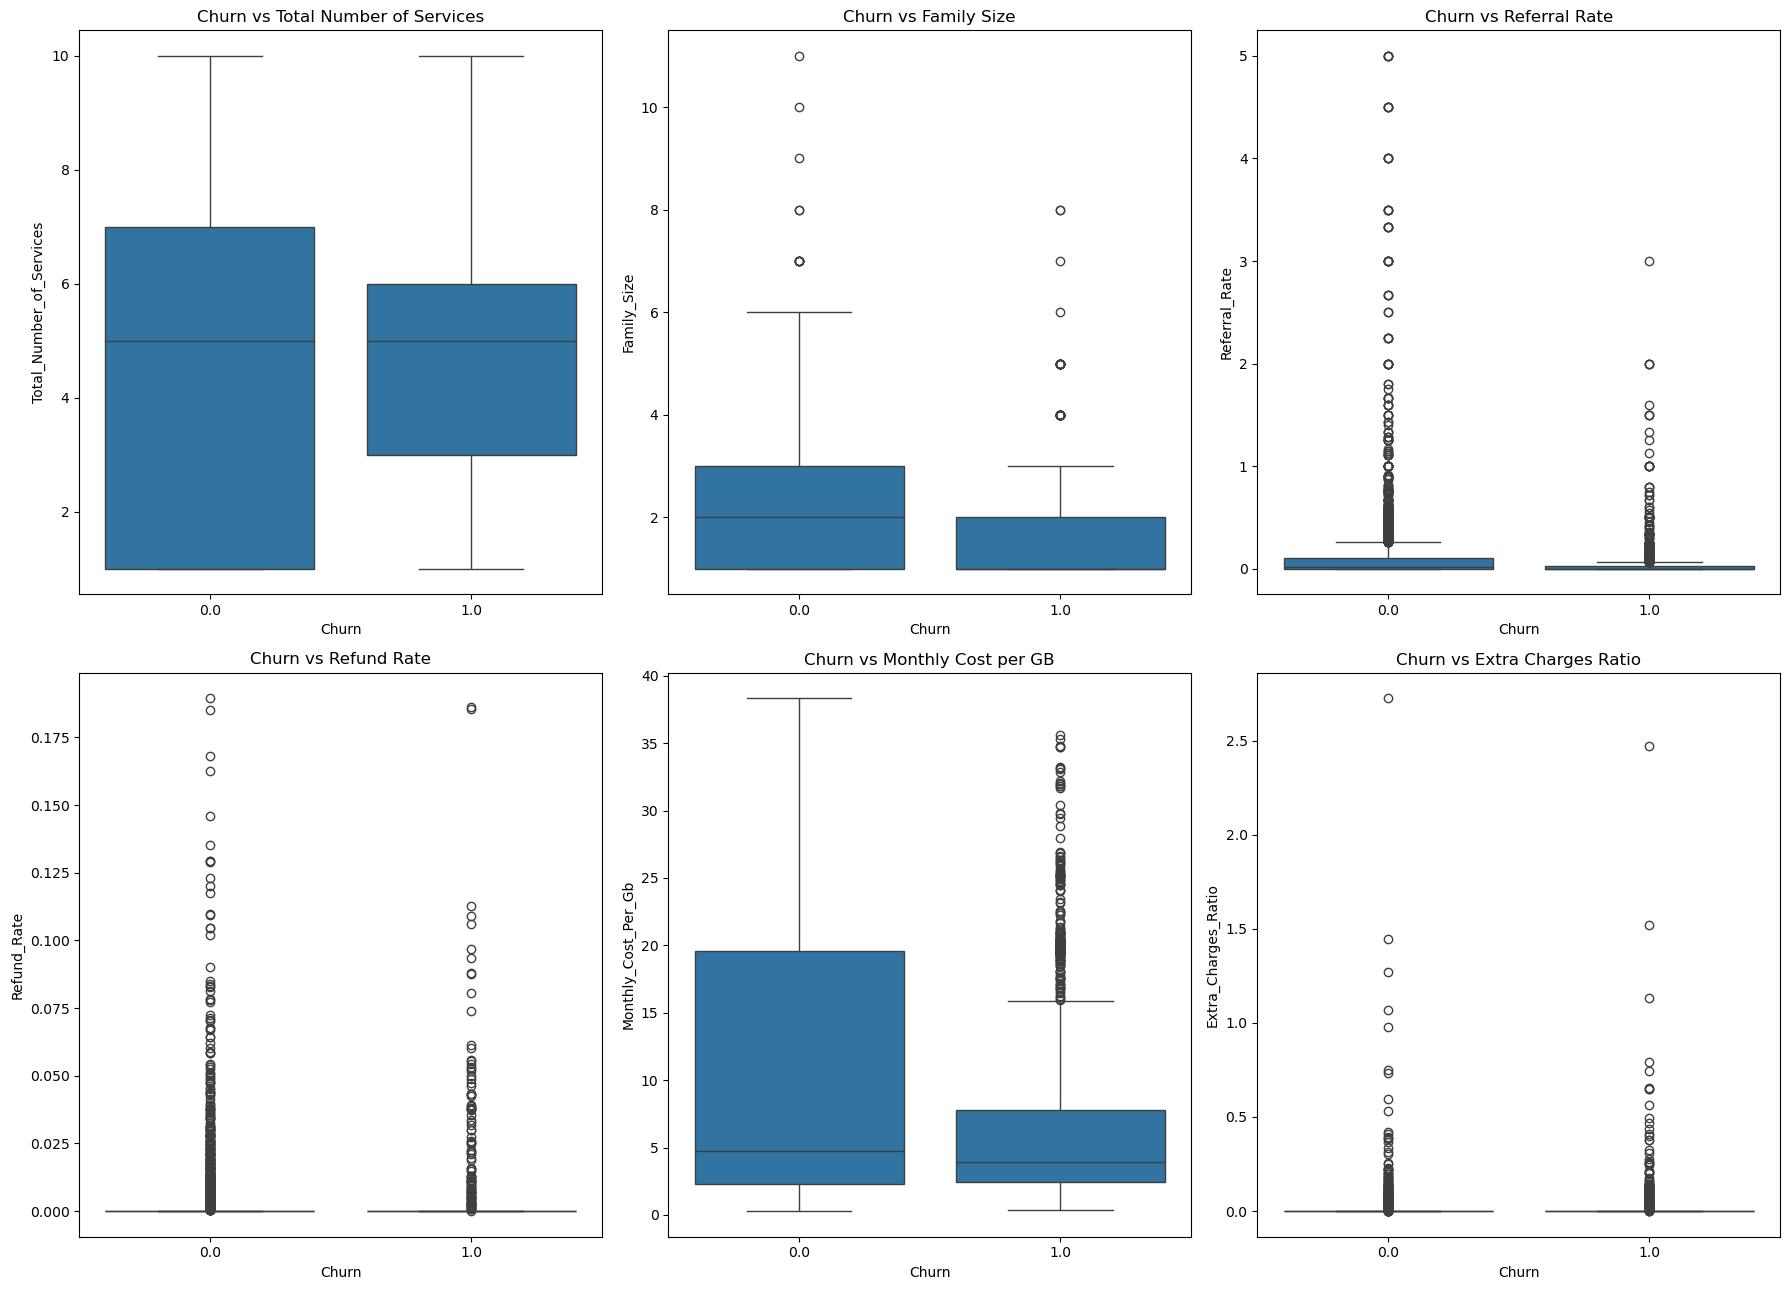

In [61]:
### Churn vs Newly Engineered Numerical Features
plt.figure(figsize=(18, 13))

### Churn vs Total Number of Services
plt.subplot(2, 3, 1)
sns.boxplot(x = 'Churn', y = 'Total_Number_of_Services', data = telco_churn_engineered_features_df)
plt.title('Churn vs Total Number of Services')

### Churn vs Family Size
plt.subplot(2, 3, 2)
sns.boxplot(x = 'Churn', y = 'Family_Size', data = telco_churn_engineered_features_df)
plt.title('Churn vs Family Size')

### Churn vs Referral Rate
plt.subplot(2, 3, 3)
sns.boxplot(x = 'Churn', y = 'Referral_Rate', data = telco_churn_engineered_features_df)
plt.title('Churn vs Referral Rate')

### Churn vs Refund Rate
plt.subplot(2, 3, 4)
sns.boxplot(x = 'Churn', y = 'Refund_Rate', data = telco_churn_engineered_features_df)
plt.title('Churn vs Refund Rate')

### Churn vs Monthly Cost per GB
plt.subplot(2, 3, 5)
sns.boxplot(x = 'Churn', y = 'Monthly_Cost_Per_Gb', data = telco_churn_engineered_features_df)
plt.title('Churn vs Monthly Cost per GB')

### Churn vs Extra Charges Ratio
plt.subplot(2, 3, 6)
sns.boxplot(x = 'Churn', y = 'Extra_Charges_Ratio', data = telco_churn_engineered_features_df)
plt.title('Churn vs Extra Charges Ratio')

plt.tight_layout()
plt.show()

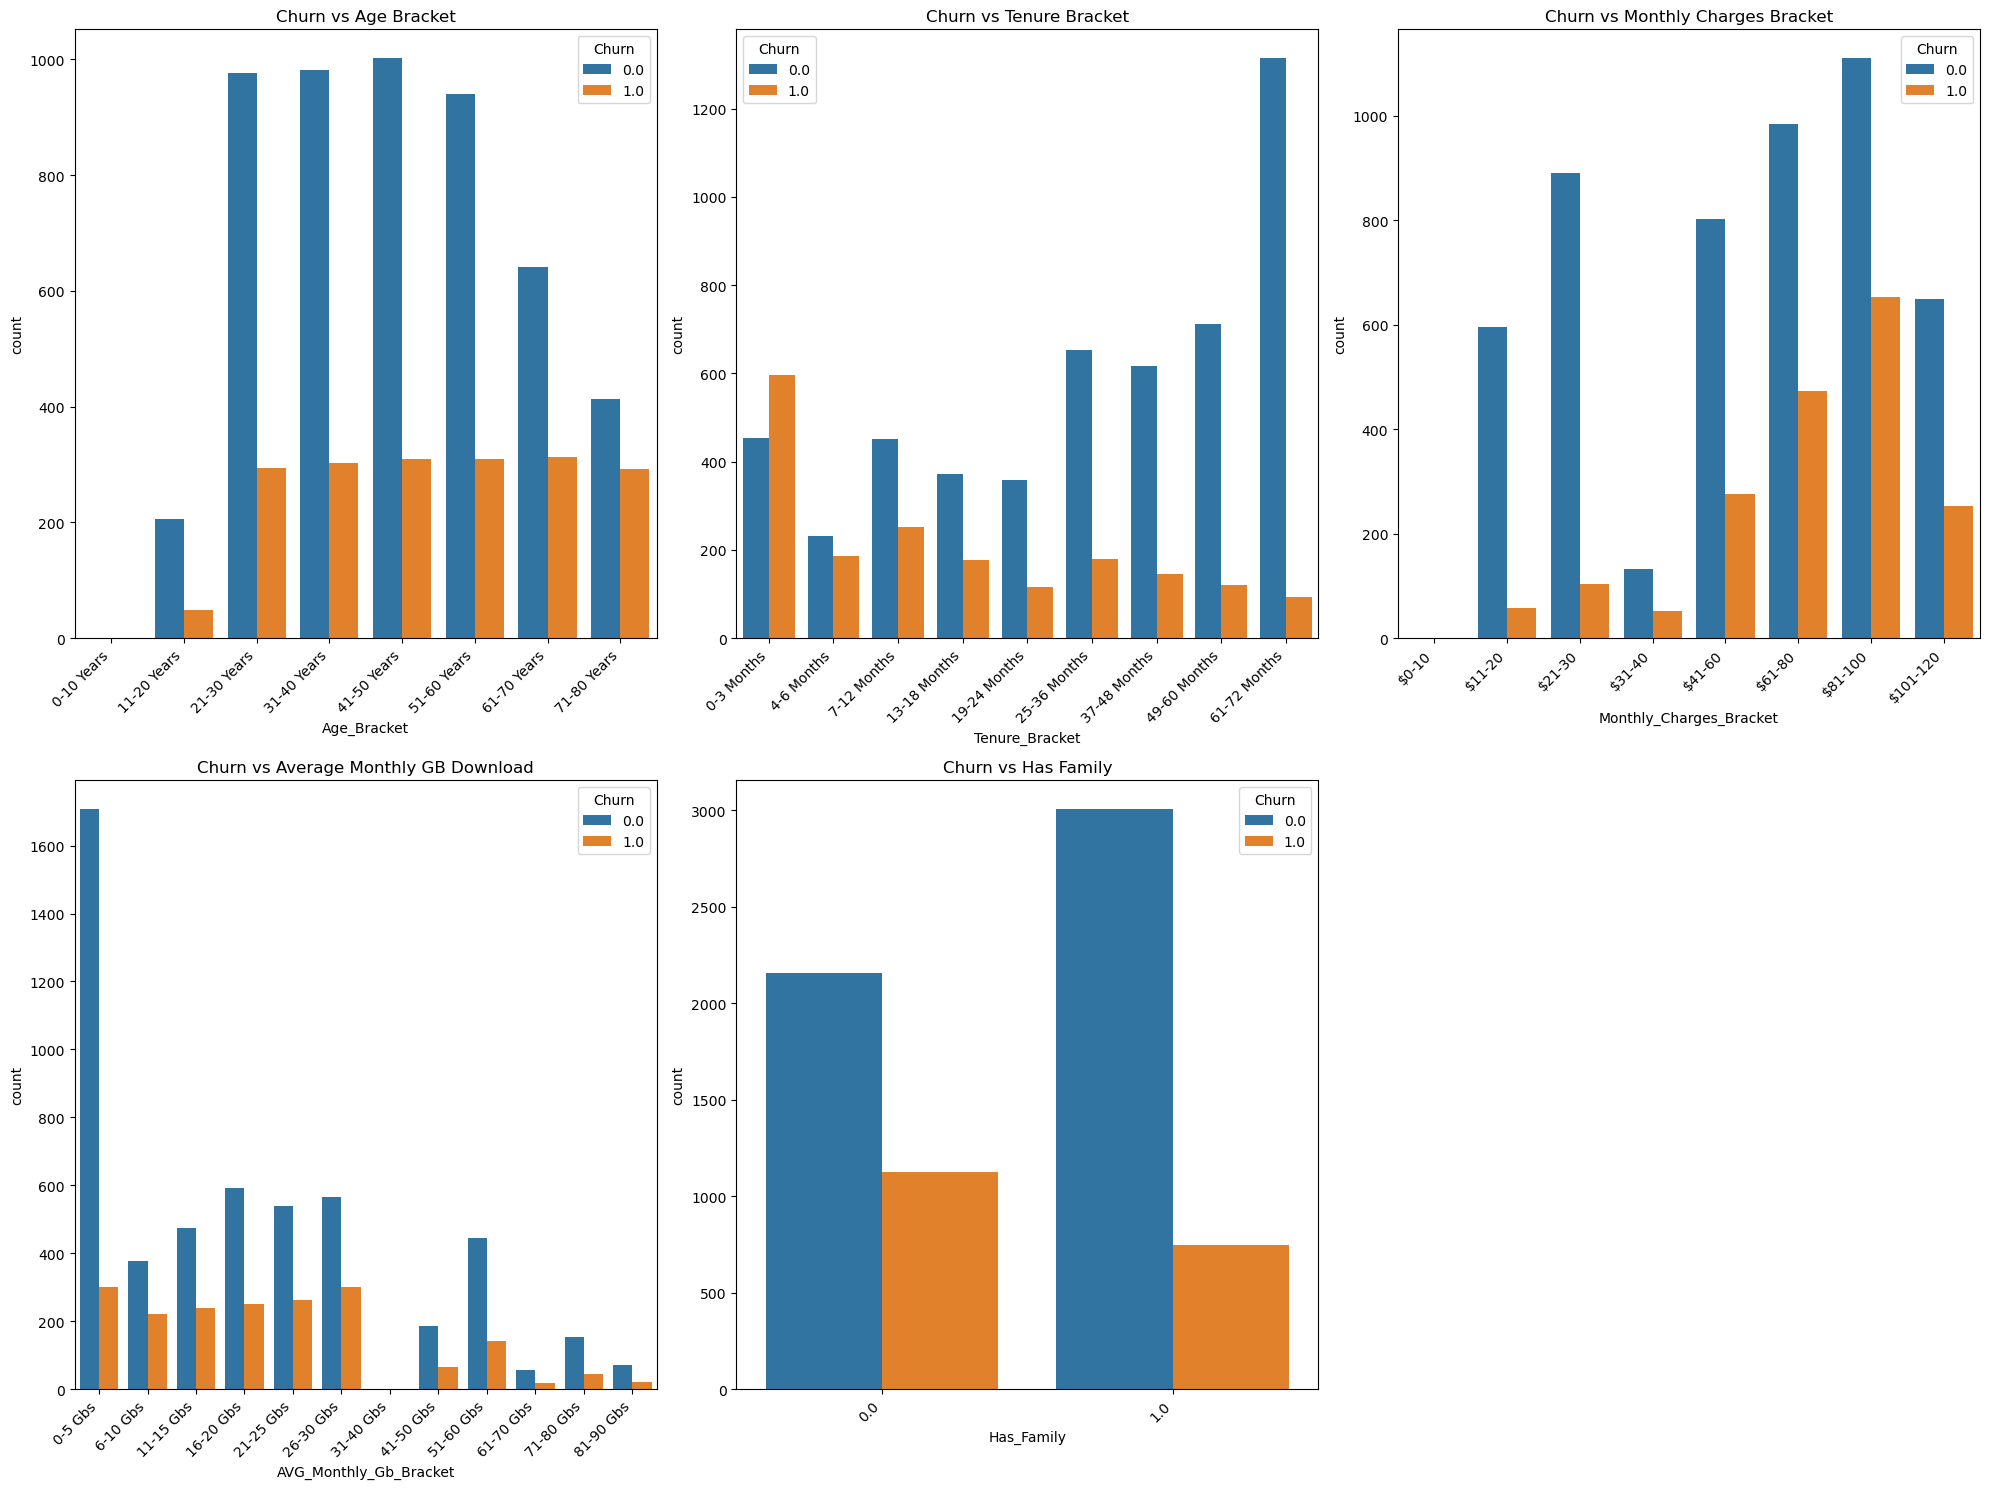

In [64]:
### Churn vs Newly Engineered Categorical Features
plt.figure(figsize = (20, 15))

### Churn vs Age Bracket
plt.subplot(2, 3, 1)
sns.countplot(x = 'Age_Bracket', hue = 'Churn', data = telco_churn_engineered_features_df)
plt.title('Churn vs Age Bracket')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Tenure Bracket
plt.subplot(2, 3, 2)
sns.countplot(x = 'Tenure_Bracket', hue = 'Churn', data = telco_churn_engineered_features_df)
plt.title('Churn vs Tenure Bracket')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Monthly Charges Bracket
plt.subplot(2, 3, 3)
sns.countplot(x = 'Monthly_Charges_Bracket', hue = 'Churn', data = telco_churn_engineered_features_df)
plt.title('Churn vs Monthly Charges Bracket')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Average Monthly GB Download
plt.subplot(2, 3, 4)
sns.countplot(x = 'AVG_Monthly_Gb_Bracket', hue = 'Churn', data = telco_churn_engineered_features_df)
plt.title('Churn vs Average Monthly GB Download')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Has Family Indicator
plt.subplot(2, 3, 5)
sns.countplot(x = 'Has_Family', hue = 'Churn', data = telco_churn_engineered_features_df)
plt.title('Churn vs Has Family')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [68]:
### Rerun optimized models on telco df with engineered features
### Defining the input feature matrix (X) and the target variable vector (y).
telco_churn_engineered_features_X = telco_churn_engineered_features_df_encoded_excluding_churn.copy()
telco_churn_engineered_features_y = telco_churn_engineered_features_df_encoded['Churn']

### Creating a list of the continuous features that we will be scaling, we do not want to scale the binary indicator columns only the continuous numerical columns.
telco_churn_engineered_features_continuous_columns = [
    'Number of Dependents',
    'Number of Referrals',
    'Avg Monthly Long Distance Charges',
    'Total Charges',
    'Total Refunds',
    'Total Extra Data Charges',
    'Total Long Distance Charges',
    'Total Revenue',
    'Total_Number_of_Services',
    'Service_Penetration_Rate',
    'Family_Size',
    'Referral_Rate',
    'Refund_Rate',
    'Monthly_Cost_Per_Gb',
    'Extra_Charges_Ratio'
]
#############################################################################################################################################################################################
### Defining Sampling/Scaling techniques and the classification models we are going to be comparing.
telco_churn_engineered_features_classification_models = {
    'logistic_regression': LogisticRegression(random_state = 22),
    'support_vector_classifier': SVC(probability = True, random_state = 22),
    'decision_tree_classifier': DecisionTreeClassifier(random_state = 22),
    'random_forest_classifier': RandomForestClassifier(random_state = 22),
    'gaussian_naive_bayes_classifier': GaussianNB(),
    'xgboost_classifier': XGBClassifier(random_state = 22)
}

telco_churn_engineered_features_scaling_techniques = {
    'no_scaling': None,
    'standard_scaler': StandardScaler(),
    'robust_scaler': RobustScaler(),
    'min_max_scaler': MinMaxScaler()
}

telco_churn_engineered_features_sampling_techniques = {
    'no_sampling': None,
    'random_undersampling': RandomUnderSampler(random_state = 22),
    'random_oversampling': RandomOverSampler(random_state = 22),
    'smote': SMOTE(random_state = 22)
}
#############################################################################################################################################################################################
### Optimized model configurations from gridsearch_results_list
telco_churn_engineered_features_optimized_models = {
    entry['classification_model']: {
        'scaling_technique': entry['scaling_technique'],
        'sampling_technique': entry['sampling_technique'],
        'best_hyperparameters': entry['best_hyperparameters']
    }
    for entry in gridsearch_results_list
}

#############################################################################################################################################################################################
### Setting up KFold crossvalidation with 5 splits. 
telco_churn_engineered_features_cross_validation_split = KFold(n_splits = 5, shuffle = True, random_state = 22)

### Creating containers to store average model metrics information and ROC curve information (false positive rate and true positive rate arrays).
telco_churn_engineered_features_average_model_metrics = []
telco_churn_engineered_features_roc_data = {}

### Looping through each combination of model, scaling technique, and sampling technique.
for telco_churn_engineered_features_classification_model_name, telco_churn_engineered_features_classification_model_config in telco_churn_engineered_features_optimized_models.items():
    ### Getting classification model and set optimized hyperparameters
    telco_churn_engineered_features_classification_model = telco_churn_engineered_features_classification_models[telco_churn_engineered_features_classification_model_name]
    telco_churn_engineered_features_classification_model.set_params(**telco_churn_engineered_features_classification_model_config['best_hyperparameters'])
    
    ### Get scaling and sampling techniques
    telco_churn_engineered_features_scaling_technique = telco_churn_engineered_features_scaling_techniques[telco_churn_engineered_features_classification_model_config['scaling_technique']]
    telco_churn_engineered_features_sampling_technique = telco_churn_engineered_features_sampling_techniques[telco_churn_engineered_features_classification_model_config['sampling_technique']]

    ### Creating containers to store model metric information for each cross validation fold.
    telco_churn_engineered_features_accuracy_scores_per_fold = []
    telco_churn_engineered_features_precision_scores_per_fold = []
    telco_churn_engineered_features_recall_scores_per_fold = []
    telco_churn_engineered_features_f1_scores_per_fold = []
    telco_churn_engineered_features_log_loss_values_per_fold = []
    telco_churn_engineered_features_roc_auc_scores_per_fold = []

    ### Creating containers to store true labels and predicted probabilities across all folds for ROC curve calculations.
    telco_churn_engineered_features_all_true_labels = []
    telco_churn_engineered_features_all_probabilities = []

    ### Setting up cross validation dataset splits
    for telco_churn_engineered_features_train_indexes, telco_churn_engineered_features_test_indexes in telco_churn_engineered_features_cross_validation_split.split(telco_churn_engineered_features_X, telco_churn_engineered_features_y):
        telco_churn_engineered_features_X_train = telco_churn_engineered_features_X.iloc[telco_churn_engineered_features_train_indexes].copy()
        telco_churn_engineered_features_X_test  = telco_churn_engineered_features_X.iloc[telco_churn_engineered_features_test_indexes].copy()
        telco_churn_engineered_features_y_train = telco_churn_engineered_features_y.iloc[telco_churn_engineered_features_train_indexes].copy()
        telco_churn_engineered_features_y_test  = telco_churn_engineered_features_y.iloc[telco_churn_engineered_features_test_indexes].copy()

        ### Applying the scaling techniques to only the continuous features defined above.
        if telco_churn_engineered_features_scaling_technique is not None:
            telco_churn_engineered_features_X_train.loc[:, telco_churn_engineered_features_continuous_columns] = telco_churn_engineered_features_scaling_technique.fit_transform(telco_churn_engineered_features_X_train[telco_churn_engineered_features_continuous_columns])
            telco_churn_engineered_features_X_test.loc[:, telco_churn_engineered_features_continuous_columns] = telco_churn_engineered_features_scaling_technique.transform(telco_churn_engineered_features_X_test[telco_churn_engineered_features_continuous_columns])

        ### Applying the sampling techniques.
        if telco_churn_engineered_features_sampling_technique is not None:
            telco_churn_engineered_features_X_train, telco_churn_engineered_features_y_train = telco_churn_engineered_features_sampling_technique.fit_resample(telco_churn_engineered_features_X_train, telco_churn_engineered_features_y_train)

        ### Training the classification model.
        telco_churn_engineered_features_classification_model.fit(telco_churn_engineered_features_X_train, telco_churn_engineered_features_y_train)

        ### Generating predictions and probabilities of churn on the testing dataset.
        telco_churn_engineered_features_y_predicted_labels = telco_churn_engineered_features_classification_model.predict(telco_churn_engineered_features_X_test)
        telco_churn_engineered_features_y_predicted_probabilities = telco_churn_engineered_features_classification_model.predict_proba(telco_churn_engineered_features_X_test)[:, 1]

        ### Calculating performance metrics for each cross validation fold.
        telco_churn_engineered_features_accuracy_scores_per_fold.append(accuracy_score(telco_churn_engineered_features_y_test, telco_churn_engineered_features_y_predicted_labels))
        telco_churn_engineered_features_precision_scores_per_fold.append(precision_score(telco_churn_engineered_features_y_test, telco_churn_engineered_features_y_predicted_labels))
        telco_churn_engineered_features_recall_scores_per_fold.append(recall_score(telco_churn_engineered_features_y_test, telco_churn_engineered_features_y_predicted_labels))
        telco_churn_engineered_features_f1_scores_per_fold.append(f1_score(telco_churn_engineered_features_y_test, telco_churn_engineered_features_y_predicted_labels))
        telco_churn_engineered_features_log_loss_values_per_fold.append(log_loss(telco_churn_engineered_features_y_test, telco_churn_engineered_features_y_predicted_probabilities))
        telco_churn_engineered_features_roc_auc_scores_per_fold.append(roc_auc_score(telco_churn_engineered_features_y_test, telco_churn_engineered_features_y_predicted_probabilities))

        ### Collecting data for ROC curve
        telco_churn_engineered_features_all_true_labels.extend(telco_churn_engineered_features_y_test.tolist())
        telco_churn_engineered_features_all_probabilities.extend(telco_churn_engineered_features_y_predicted_probabilities.tolist())

    ### Computing a single ROC curve for each combination across all folds.
    telco_churn_engineered_features_false_positive_rates, telco_churn_engineered_features_true_positive_rates, _ = roc_curve(telco_churn_engineered_features_all_true_labels, telco_churn_engineered_features_all_probabilities)

    ### Storing averaged metrics across all folds for each combination.
    telco_churn_engineered_features_average_model_metrics.append({
        'classification_model': telco_churn_engineered_features_classification_model_name,
        'scaling_technique': telco_churn_engineered_features_classification_model_config['scaling_technique'],
        'sampling_technique': telco_churn_engineered_features_classification_model_config['sampling_technique'],
        'accuracy': np.mean(telco_churn_engineered_features_accuracy_scores_per_fold),
        'precision': np.mean(telco_churn_engineered_features_precision_scores_per_fold),
        'recall': np.mean(telco_churn_engineered_features_recall_scores_per_fold),
        'f1_score': np.mean(telco_churn_engineered_features_f1_scores_per_fold),
        'log_loss': np.mean(telco_churn_engineered_features_log_loss_values_per_fold),
        'roc_auc': np.mean(telco_churn_engineered_features_roc_auc_scores_per_fold)
    })

    ### Storing ROC curve information for plotting
    telco_churn_engineered_features_roc_data[(telco_churn_engineered_features_classification_model_name, telco_churn_engineered_features_classification_model_config['scaling_technique'], telco_churn_engineered_features_classification_model_config['sampling_technique'])] = (telco_churn_engineered_features_false_positive_rates, telco_churn_engineered_features_true_positive_rates)

### Converting to DataFrame
telco_churn_engineered_features_results_df = pd.DataFrame(telco_churn_engineered_features_average_model_metrics)
print("Performance on a Telco DF With Engineered Features:")
display(telco_churn_engineered_features_results_df.sort_values(by = 'f1_score', ascending = False))

Performance on a Telco DF With Engineered Features:


classification_model scaling_technique    sampling_technique  \
1         random_forest_classifier   standard_scaler  random_undersampling   
3              logistic_regression   standard_scaler   random_oversampling   
0               xgboost_classifier        no_scaling   random_oversampling   
5         decision_tree_classifier   standard_scaler  random_undersampling   
4  gaussian_naive_bayes_classifier   standard_scaler                 smote   
2        support_vector_classifier   standard_scaler   random_oversampling   

   accuracy  precision    recall  f1_score  log_loss   roc_auc  
1  0.777302   0.552262  0.860853  0.672624  0.434098  0.884096  
3  0.777588   0.555098  0.821599  0.662332  0.433754  0.881479  
0  0.817972   0.655546  0.667395  0.661047  0.453056  0.882279  
5  0.747298   0.516246  0.846182  0.640395  0.610188  0.839351  
4  0.778297   0.571152  0.687393  0.622214  2.851317  0.838566  
2  0.733077   0.459865  0.019299  0.036977  0.753589  0.764371

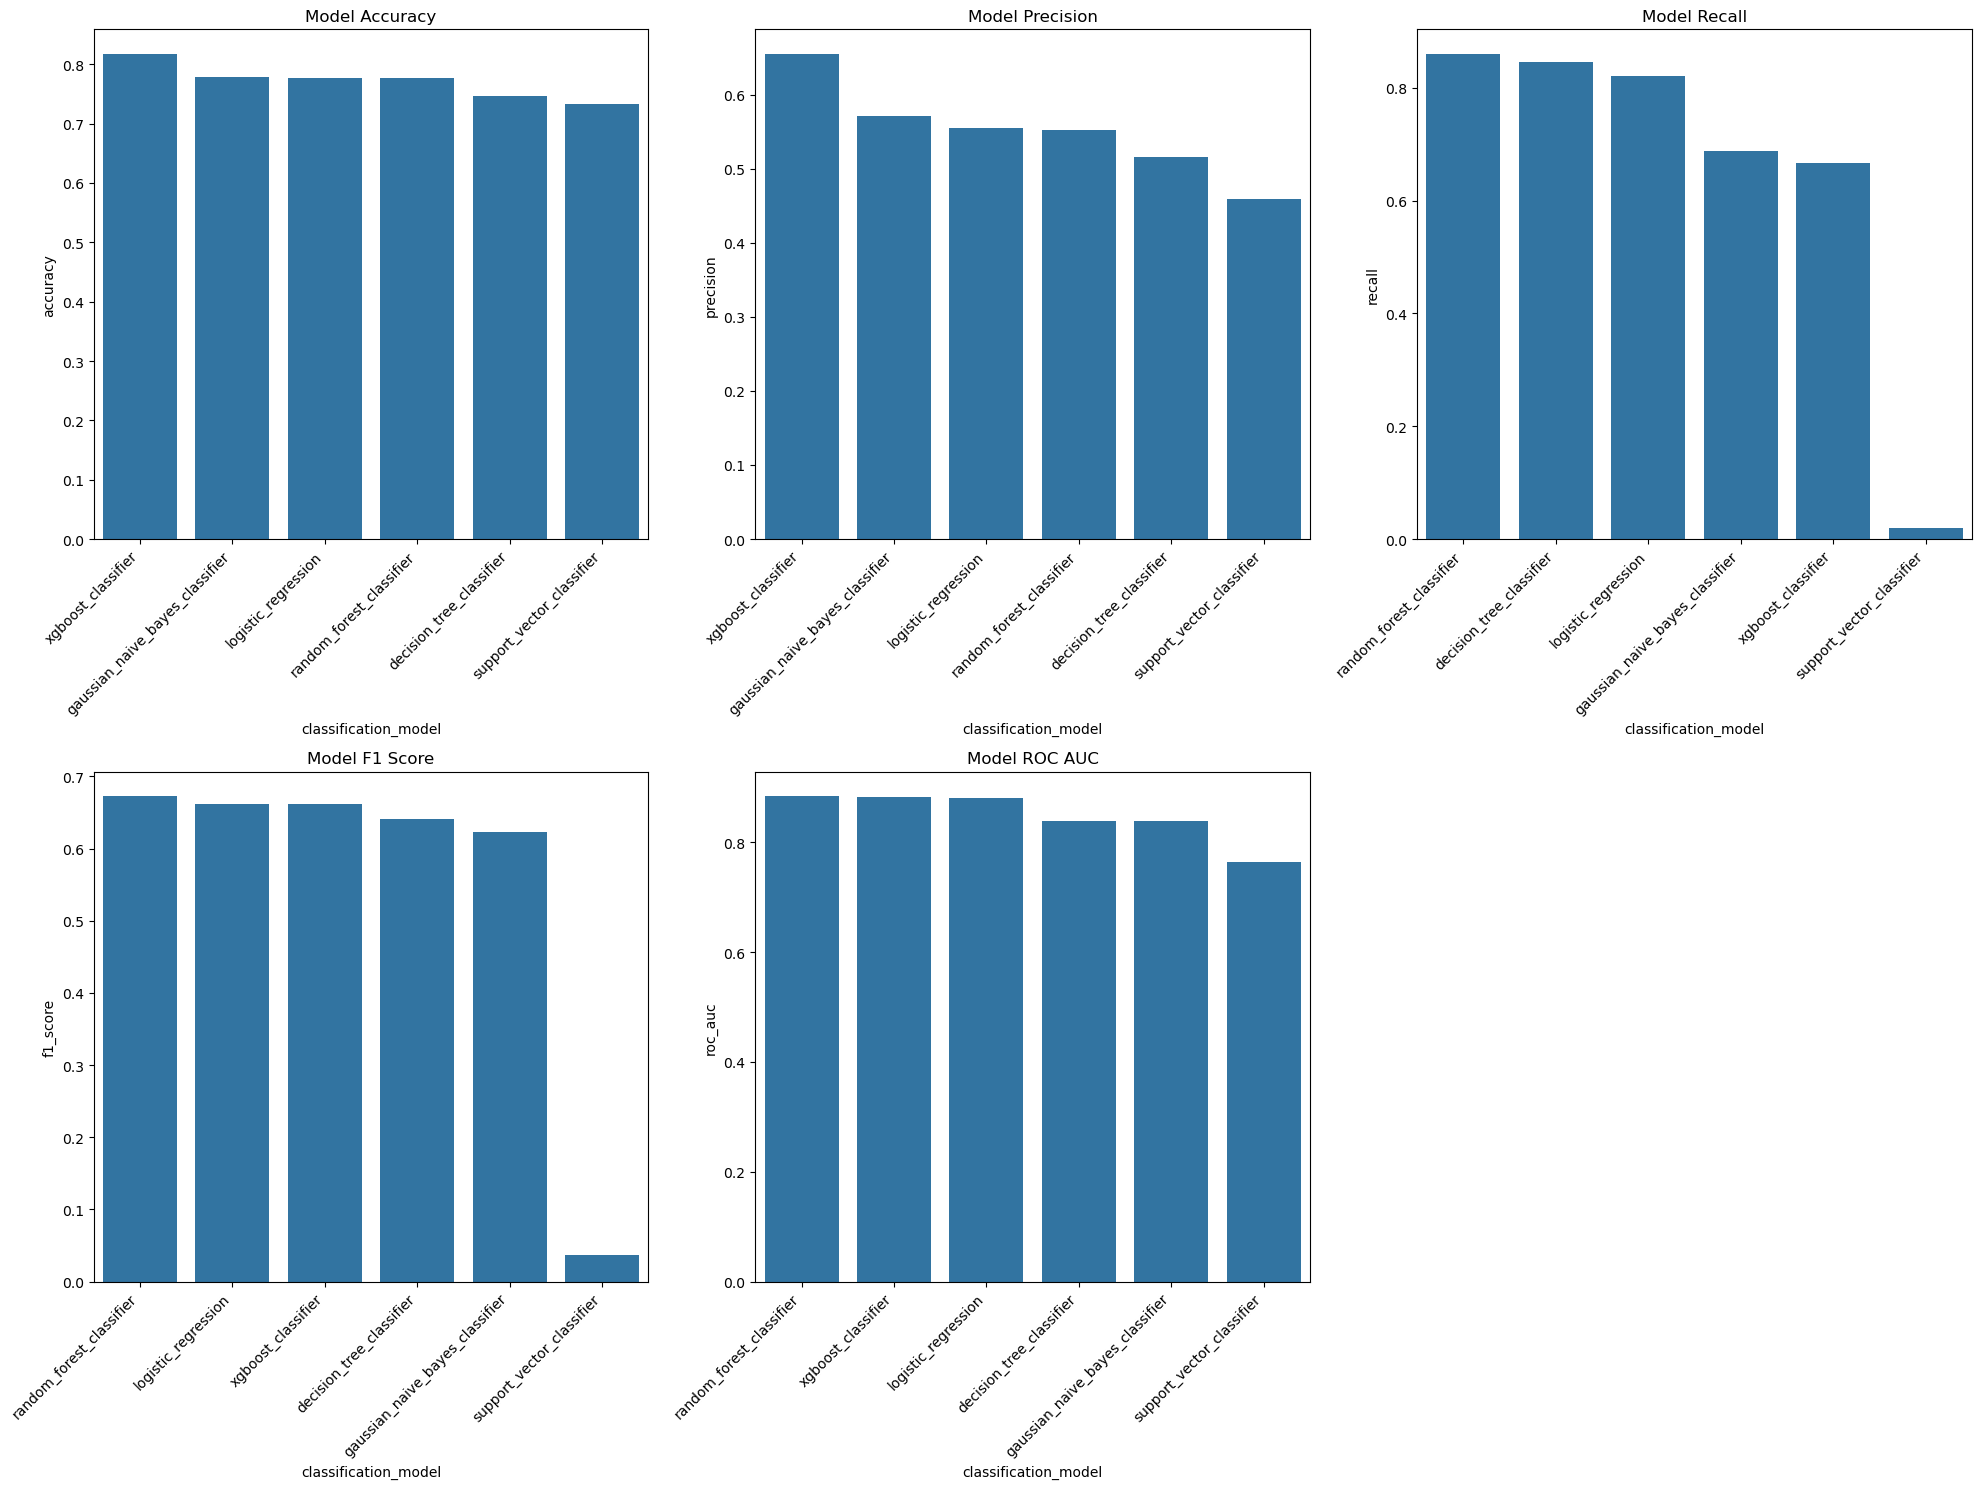

In [70]:
### Plotting the performance metrics of the optimized models on telco df with engineered features.
plt.figure(figsize = (20, 15))

### Plotting Accuracy Performance
plt.subplot(2, 3, 1)
sns.barplot(x = 'classification_model', y = 'accuracy', data = telco_churn_engineered_features_results_df.sort_values(by = 'accuracy', ascending = False))
plt.title('Model Accuracy')
plt.xticks(rotation = 45, ha = 'right')

### Plotting Precision Performance
plt.subplot(2, 3, 2)
sns.barplot(x = 'classification_model', y = 'precision', data = telco_churn_engineered_features_results_df.sort_values(by = 'precision', ascending = False))
plt.title('Model Precision')
plt.xticks(rotation = 45, ha = 'right')

### Plotting Recall Performance
plt.subplot(2, 3, 3)
sns.barplot(x = 'classification_model', y = 'recall', data = telco_churn_engineered_features_results_df.sort_values(by = 'recall', ascending = False))
plt.title('Model Recall')
plt.xticks(rotation = 45, ha = 'right')

### Plotting F1 Score Performance
plt.subplot(2, 3, 4)
sns.barplot(x = 'classification_model', y = 'f1_score', data = telco_churn_engineered_features_results_df.sort_values(by = 'f1_score', ascending = False))
plt.title('Model F1 Score')
plt.xticks(rotation = 45, ha = 'right')

### Plotting ROC AUC Performance
plt.subplot(2, 3, 5)
sns.barplot(x = 'classification_model', y = 'roc_auc', data = telco_churn_engineered_features_results_df.sort_values(by = 'roc_auc', ascending = False))
plt.title('Model ROC AUC')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

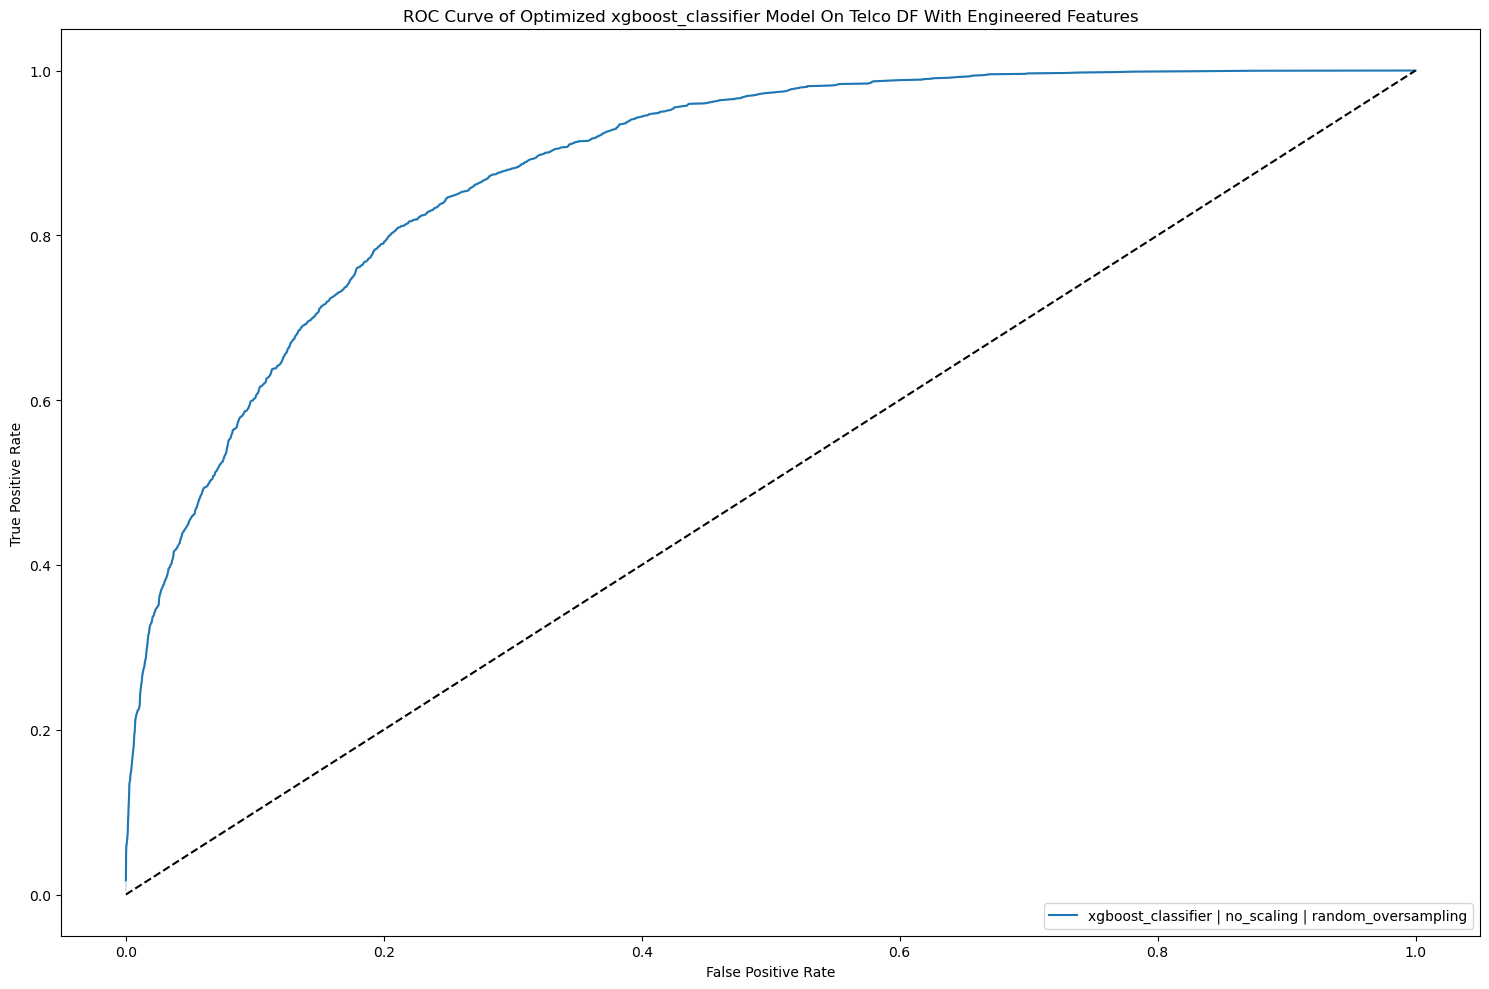

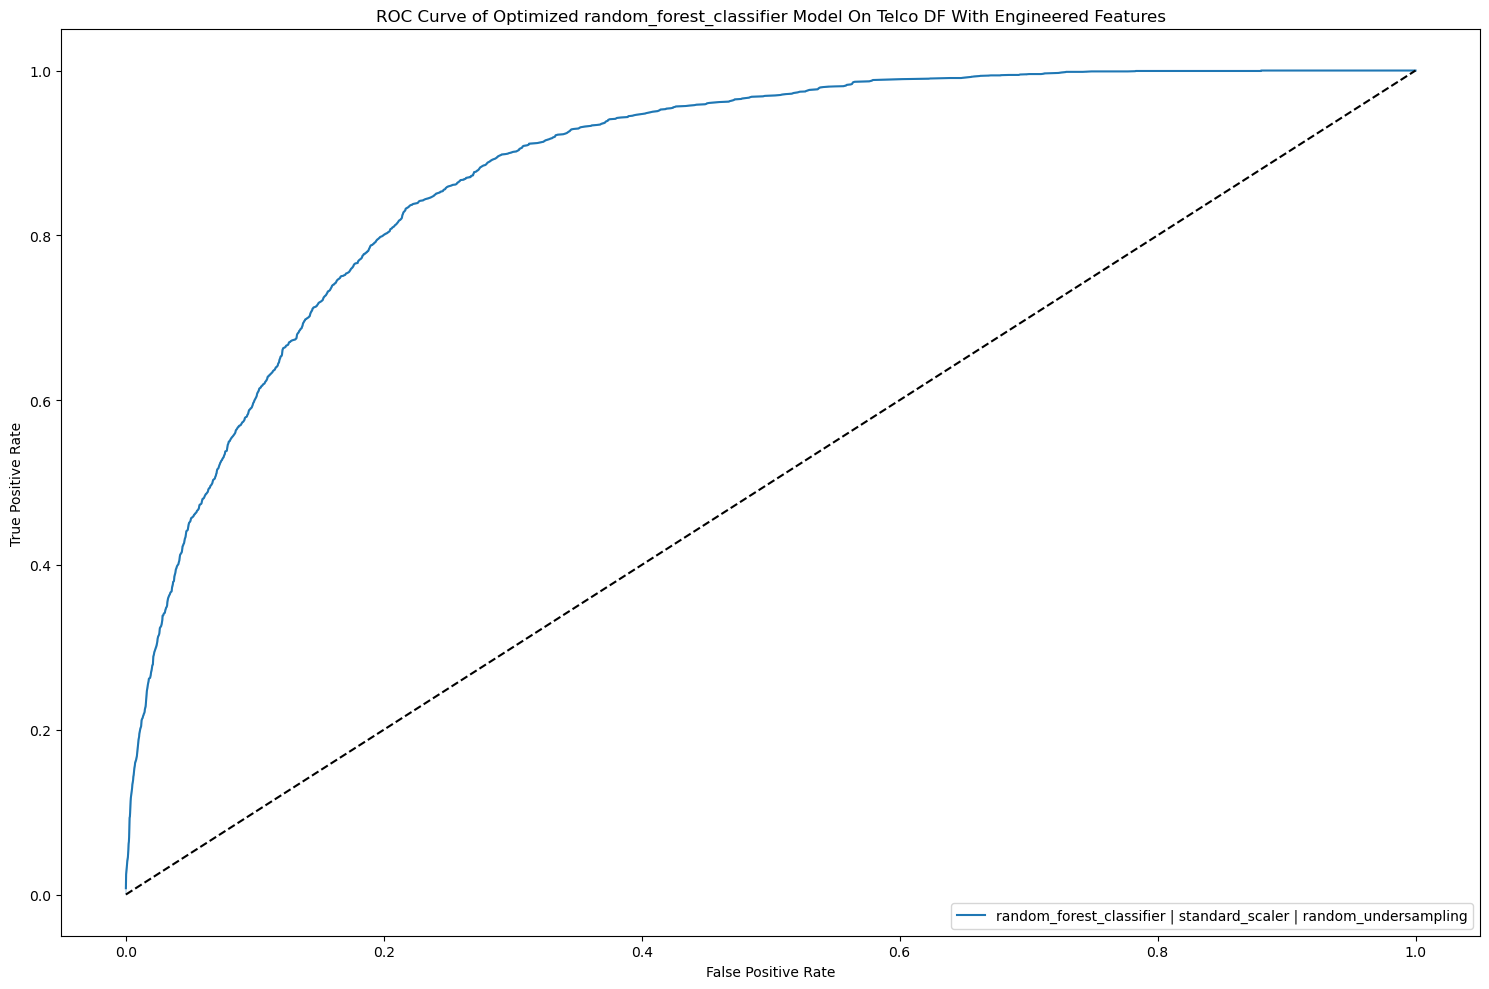

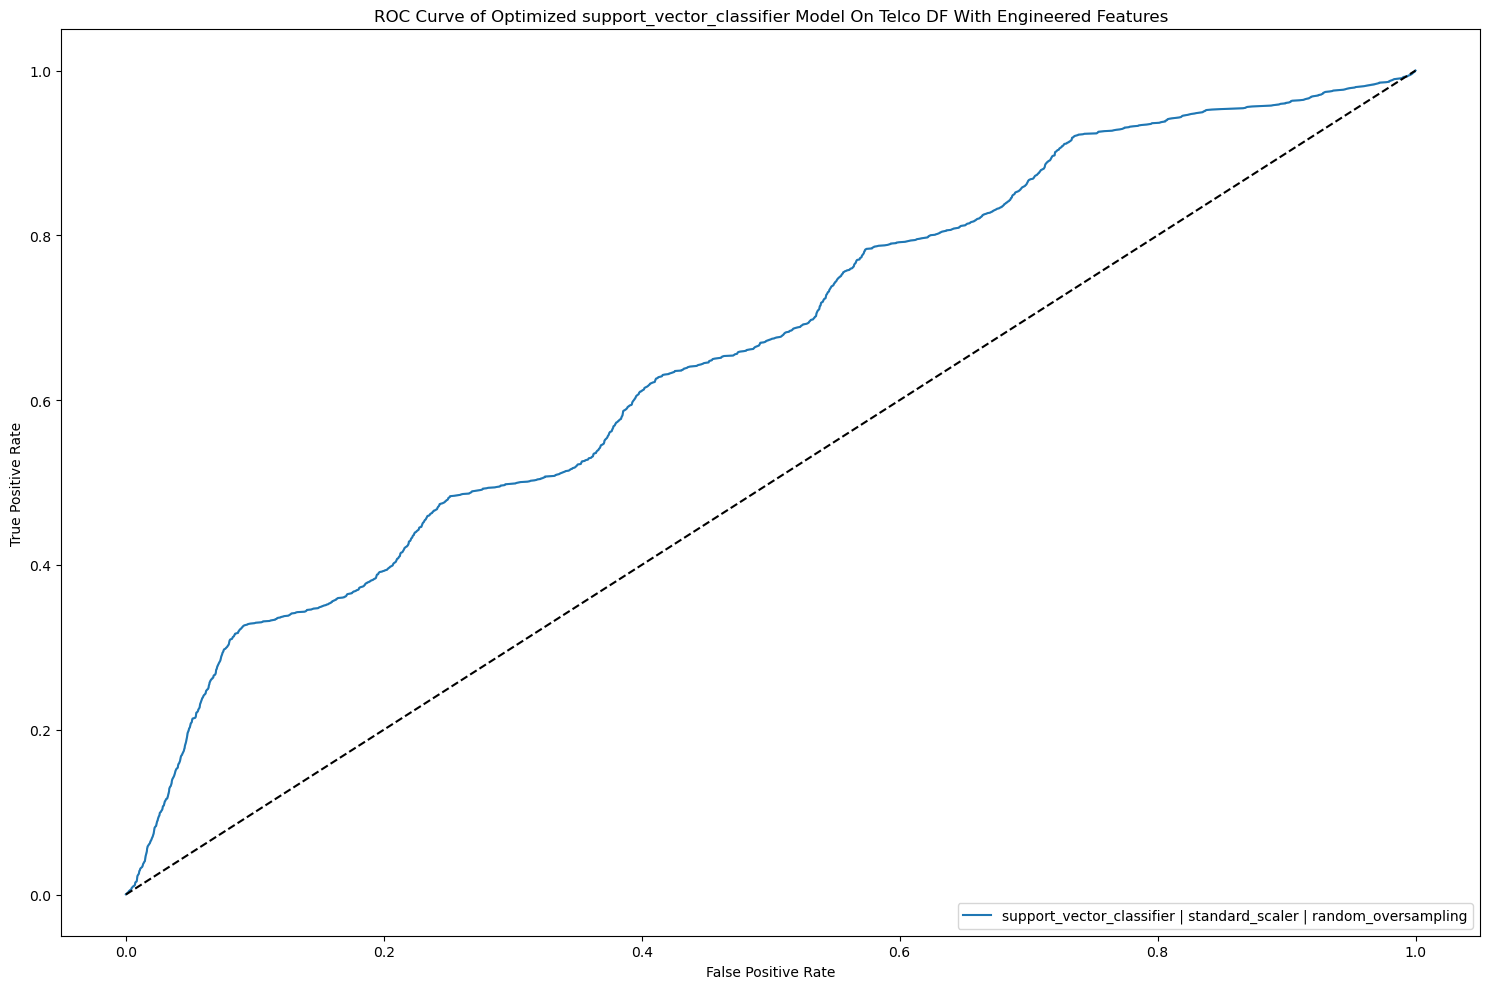

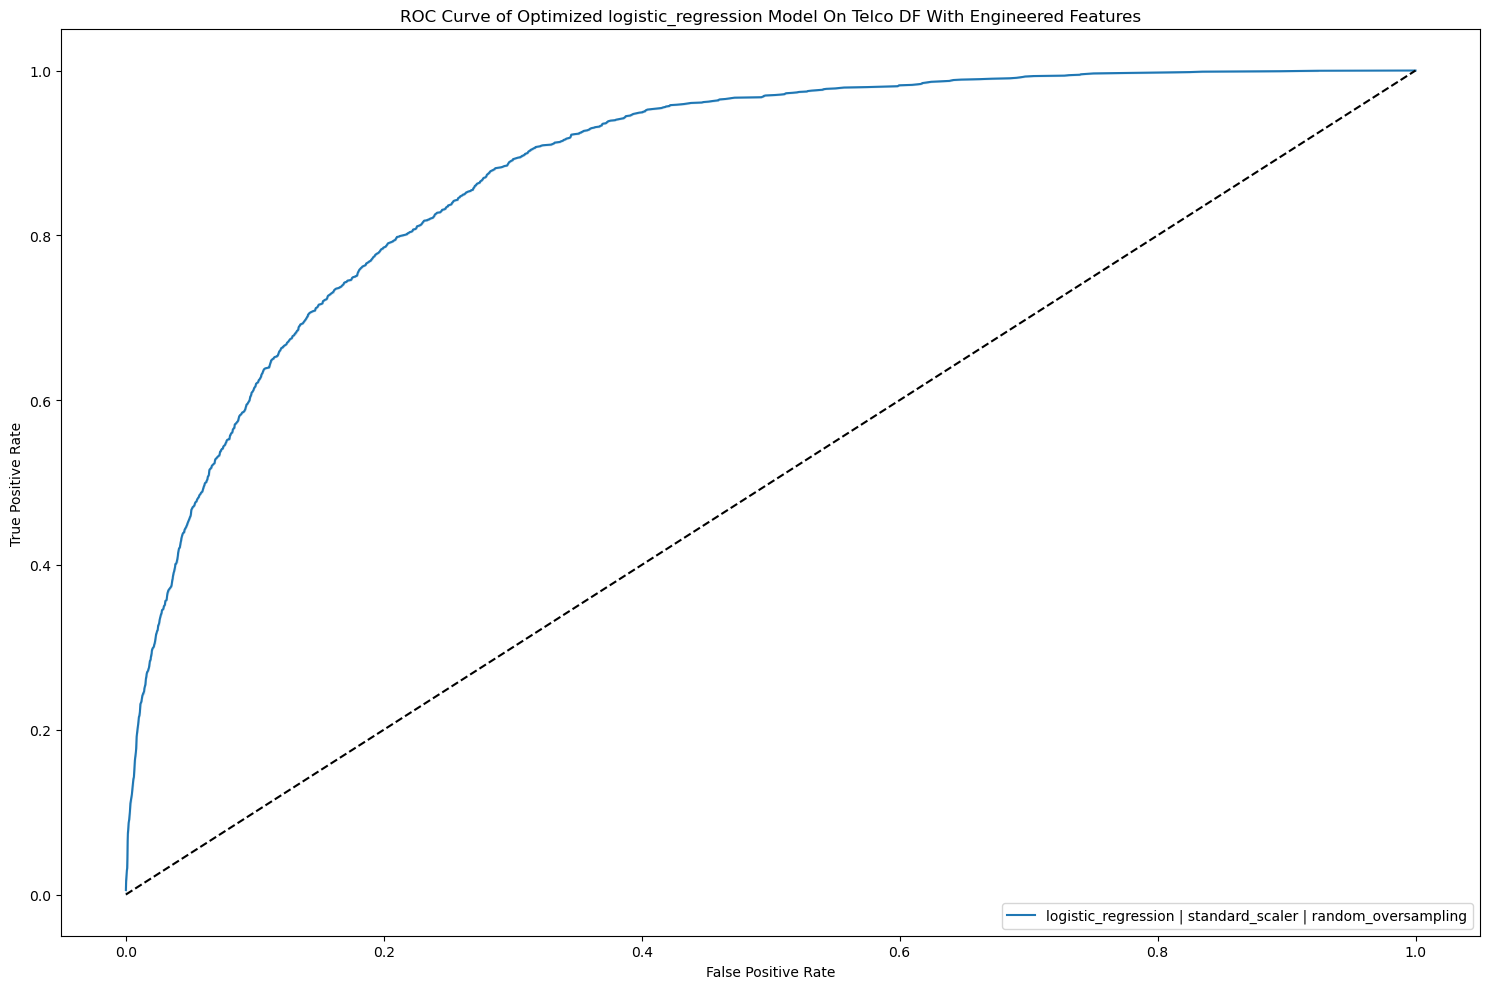

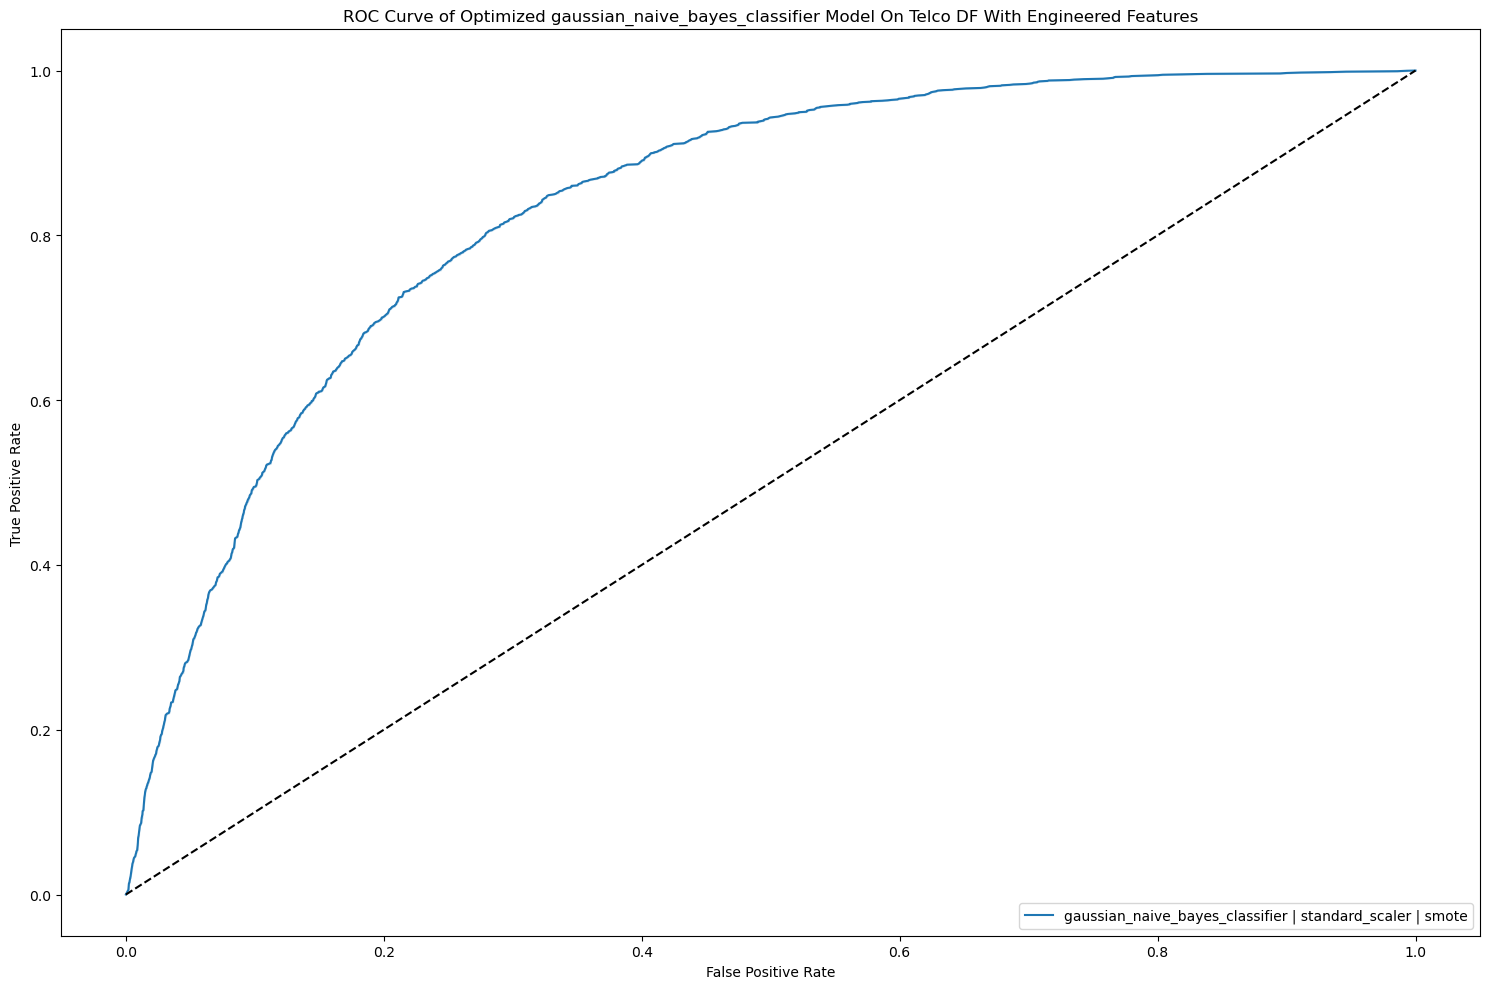

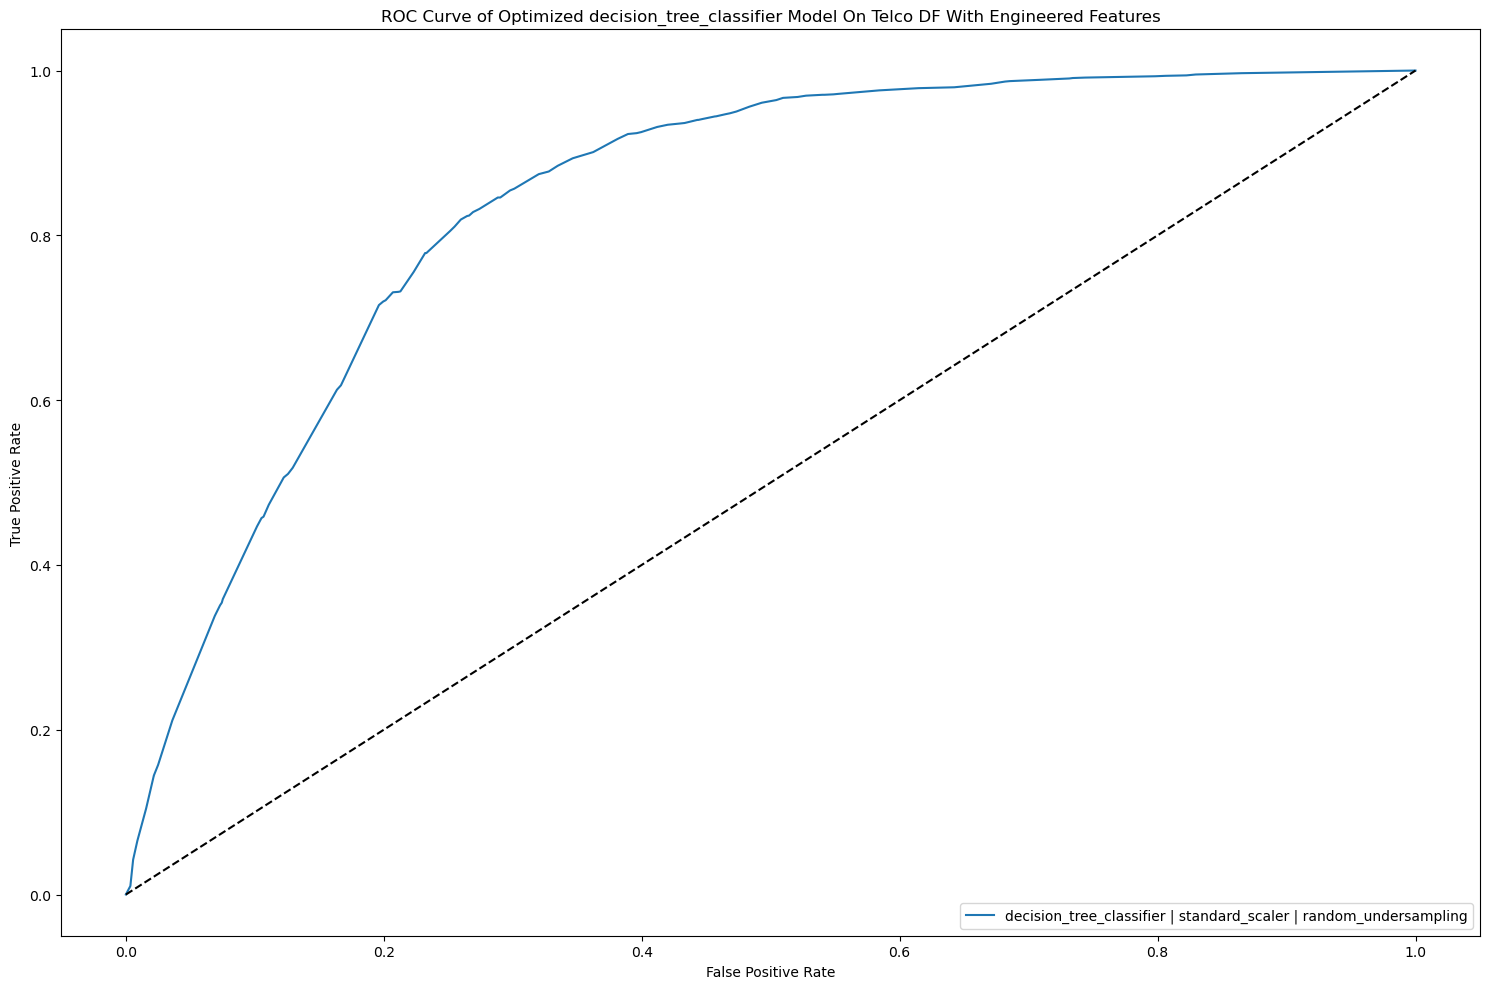

In [72]:
### Looping through each optimized model and creating a ROC curve using the different telco dataframe.
for index, row in telco_churn_engineered_features_results_df.iterrows():
    telco_churn_engineered_features_model_name = row['classification_model']
    telco_churn_engineered_features_scaler_name = row['scaling_technique']
    telco_churn_engineered_features_sampler_name = row['sampling_technique']

    telco_churn_engineered_features_combination_key = (telco_churn_engineered_features_model_name, telco_churn_engineered_features_scaler_name, telco_churn_engineered_features_sampler_name)
    
    if telco_churn_engineered_features_combination_key in telco_churn_engineered_features_roc_data:
        telco_churn_engineered_features_false_positive_rate, telco_churn_engineered_features_true_positive_rate = telco_churn_engineered_features_roc_data[telco_churn_engineered_features_combination_key]

        telco_churn_engineered_features_combination_label = f"{telco_churn_engineered_features_model_name} | {telco_churn_engineered_features_scaler_name} | {telco_churn_engineered_features_sampler_name}"

        plt.figure(figsize = (15, 10))
        sns.lineplot(x = telco_churn_engineered_features_false_positive_rate, y = telco_churn_engineered_features_true_positive_rate, label = telco_churn_engineered_features_combination_label)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f"ROC Curve of Optimized {telco_churn_engineered_features_model_name} Model On Telco DF With Engineered Features")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc = "lower right")
    
        plt.tight_layout()
        plt.show()

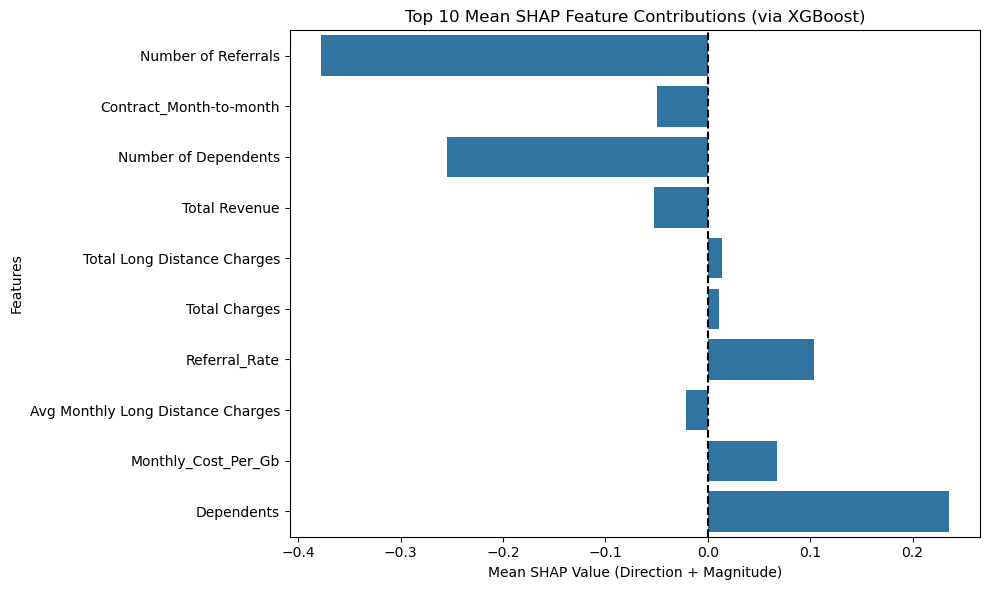



telco_churn_engineered_features_shap_df:


Feature  Mean_SHAP_value  \
6                        Number of Referrals        -0.377705   
41                   Contract_Month-to-month        -0.049816   
4                       Number of Dependents        -0.255171   
23                             Total Revenue        -0.052648   
22               Total Long Distance Charges         0.013714   
19                             Total Charges         0.010784   
28                             Referral_Rate         0.103467   
8          Avg Monthly Long Distance Charges        -0.021327   
30                       Monthly_Cost_Per_Gb         0.067361   
3                                 Dependents         0.235145   
46           Payment Method_Electronic check        -0.004498   
14                              Streaming TV         0.001937   
18                         Paperless Billing         0.003067   
39                 Internet Type_Fiber Optic        -0.015395   
13                      Premium Tech Support         0.001971   
10                           Online Security         0.009443   
24                  Total_Number_of_Services         0.012996   
43                         Contract_Two year        -0.054211   
27                               Family_Size        -0.066315   
0                                   Under 30         0.004008   
16                           Streaming Music        -0.002594   
36                        Multiple Lines_Yes        -0.004491   
47               Payment Method_Mailed check         0.013803   
72          Monthly_Charges_Bracket_$101-120        -0.020771   
38                         Internet Type_DSL        -0.016526   
32                             Gender_Female         0.006253   
34                         Multiple Lines_No         0.004372   
51                   Age_Bracket_31-40 Years         0.008253   
5                          Referred a Friend         0.020740   
55                   Age_Bracket_71-80 Years         0.005685   
52                   Age_Bracket_41-50 Years         0.000371   
53                   Age_Bracket_51-60 Years         0.003793   
64               Tenure_Bracket_61-72 Months        -0.007963   
15                          Streaming Movies        -0.010532   
11                             Online Backup        -0.007058   
25                  Service_Penetration_Rate         0.004979   
26                                Has_Family         0.009771   
58                Tenure_Bracket_7-12 Months        -0.000361   
78          AVG_Monthly_Gb_Bracket_26-30 Gbs         0.007308   
31                       Extra_Charges_Ratio         0.012582   
61               Tenure_Bracket_25-36 Months         0.004407   
2                                    Partner         0.023518   
45    Payment Method_Credit card (automatic)        -0.001407   
70            Monthly_Charges_Bracket_$61-80         0.003179   
12                    Device Protection Plan         0.002173   
57                 Tenure_Bracket_4-6 Months         0.002894   
37                       Internet Type_Cable         0.007662   
77          AVG_Monthly_Gb_Bracket_21-25 Gbs         0.002853   
69            Monthly_Charges_Bracket_$41-60        -0.004452   
71           Monthly_Charges_Bracket_$81-100         0.008879   
76          AVG_Monthly_Gb_Bracket_16-20 Gbs         0.005662   
1                             Senior Citizen         0.007383   
74           AVG_Monthly_Gb_Bracket_6-10 Gbs         0.000452   
75          AVG_Monthly_Gb_Bracket_11-15 Gbs         0.000055   
62               Tenure_Bracket_37-48 Months        -0.004595   
9                           Internet Service         0.000553   
50                   Age_Bracket_21-30 Years         0.003050   
44  Payment Method_Bank transfer (automatic)         0.005332   
67            Monthly_Charges_Bracket_$21-30        -0.000584   
59               Tenure_Bracket_13-18 Months         0.006856   
42                         Contract_One year        -0.022006   
73     

In [78]:
### SHAP Feature Importances
### Extract the optimal XGBoost configuration from gridsearch_results_list
telco_churn_engineered_features_xgb_config = next(cfg for cfg in gridsearch_results_list if cfg['classification_model'] == 'xgboost_classifier')

### Initializing the XGBoost model with the optimized hyperparameters.
telco_churn_engineered_features_xgb_model = XGBClassifier(random_state = 22)
telco_churn_engineered_features_xgb_model.set_params(**telco_churn_engineered_features_xgb_config['best_hyperparameters'])

### Defining the input feature matrix (X) and the target variable vector (y).
telco_churn_engineered_features_X_SHAP = telco_churn_engineered_features_X.copy()
telco_churn_engineered_features_y_SHAP = telco_churn_engineered_features_y.copy()

### Applying the optimal scaling techniques.
if telco_churn_engineered_features_scaling_technique is not None:
    telco_churn_engineered_features_X_SHAP[telco_churn_engineered_features_continuous_columns] = telco_churn_engineered_features_scaling_technique.fit_transform(telco_churn_engineered_features_X_SHAP[telco_churn_engineered_features_continuous_columns])
### Applying the optimal sampling techniques.
if telco_churn_engineered_features_sampling_technique is not None:
    telco_churn_engineered_features_X_SHAP, telco_churn_engineered_features_y_SHAP = telco_churn_engineered_features_sampling_technique.fit_resample(telco_churn_engineered_features_X_SHAP, telco_churn_engineered_features_y_SHAP)

### Fitting the model.
telco_churn_engineered_features_xgb_model.fit(telco_churn_engineered_features_X_SHAP, telco_churn_engineered_features_y_SHAP)

### SHAP analysis
telco_churn_engineered_features_explainer = shap.TreeExplainer(telco_churn_engineered_features_xgb_model)
telco_churn_engineered_features_shap_values = telco_churn_engineered_features_explainer.shap_values(telco_churn_engineered_features_X_SHAP)

### Creating a feature importance dataframe.
telco_churn_engineered_features_shap_df = pd.DataFrame({
    'Feature': telco_churn_engineered_features_X_SHAP.columns,
    'Mean_SHAP_value': telco_churn_engineered_features_shap_values.mean(axis = 0),
    'Mean_ABS_SHAP_value': np.abs(telco_churn_engineered_features_shap_values).mean(axis = 0)
}).sort_values('Mean_ABS_SHAP_value', ascending = False)

### Plotting the top 10 Mean SHAP Feature Contributions sorted by mean absolute shap values
plt.figure(figsize = (10, 6))
sns.barplot(data = telco_churn_engineered_features_shap_df.head(10), x = 'Mean_SHAP_value', y = 'Feature')
plt.title('Top 10 Mean SHAP Feature Contributions (via XGBoost)')
plt.xlabel('Mean SHAP Value (Direction + Magnitude)')
plt.ylabel('Features')
plt.axvline(0, color = 'black', linestyle = '--')
plt.tight_layout()
plt.show()
print('\n')

### Displaying the feature importance dataframe.
print('telco_churn_engineered_features_shap_df:')
display(telco_churn_engineered_features_shap_df)
print('\n')

In [ ]:
###############################################################################################################################################
###############################################################################################################################################
###############################################################################################################################################
###############################################################################################################################################

In [80]:
### Loading another telco customer churn dataset to compare model performance on different data from a similar industry.
diff_telco_url = "https://raw.githubusercontent.com/adamcookeunc/DATA_780_PROJECT/refs/heads/main/customer_churn_dataset-testing-master.csv"
diff_telco_churn_df = pd.read_csv(diff_telco_url)
diff_telco_churn_df.head()

CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0

In [82]:
### Dropping the CustomerID column because it is irrelavent.
diff_telco_churn_df = diff_telco_churn_df.drop(columns = ['CustomerID'])

### Ensuring that all numerical columns are in the float 64 formatting.
diff_telco_churn_df['Age'] = diff_telco_churn_df['Age'].astype(float)
diff_telco_churn_df['Tenure'] = diff_telco_churn_df['Tenure'].astype(float)
diff_telco_churn_df['Usage Frequency'] = diff_telco_churn_df['Usage Frequency'].astype(float)
diff_telco_churn_df['Support Calls'] = diff_telco_churn_df['Support Calls'].astype(float)
diff_telco_churn_df['Payment Delay'] = diff_telco_churn_df['Payment Delay'].astype(float)
diff_telco_churn_df['Total Spend'] = diff_telco_churn_df['Total Spend'].astype(float)
diff_telco_churn_df['Last Interaction'] = diff_telco_churn_df['Last Interaction'].astype(float)
diff_telco_churn_df['Churn'] = diff_telco_churn_df['Churn'].astype(float)

### One-Hot-Encoding categorical/nominal columns
diff_telco_churn_df_encoded = pd.get_dummies(diff_telco_churn_df, columns = ['Gender', 'Subscription Type', 'Contract Length'], dtype = float)

### Excluding the churn column (the column that we are predicting)
diff_telco_churn_df_encoded_excluding_churn = diff_telco_churn_df_encoded.drop(columns = ['Churn'])

In [84]:
### Summary statistics
print("Summary statistics:")
display(diff_telco_churn_df.describe(include = 'all'))
print('\n')

### Data types
print("Data types:")
display(diff_telco_churn_df.dtypes)
print('\n')

### Number of missing values
print("Number of missing values:")
display(diff_telco_churn_df.isna().sum())
print('\n')

### Number of unique values
print("Number of unique values:")
display(diff_telco_churn_df.nunique())
print('\n')

Summary statistics:


Age  Gender        Tenure  Usage Frequency  Support Calls  \
count   64374.000000   64374  64374.000000     64374.000000   64374.000000   
unique           NaN       2           NaN              NaN            NaN   
top              NaN  Female           NaN              NaN            NaN   
freq             NaN   34353           NaN              NaN            NaN   
mean       41.970982     NaN     31.994827        15.080234       5.400690   
std        13.924911     NaN     17.098234         8.816470       3.114005   
min        18.000000     NaN      1.000000         1.000000       0.000000   
25%        30.000000     NaN     18.000000         7.000000       3.000000   
50%        42.000000     NaN     33.000000        15.000000       6.000000   
75%        54.000000     NaN     47.000000        23.000000       8.000000   
max        65.000000     NaN     60.000000        30.000000      10.000000   

        Payment Delay Subscription Type Contract Length   Total Spend  \
count    64374.000000             64374           64374  64374.000000   
unique            NaN                 3               3           NaN   
top               NaN          Standard         Monthly           NaN   
freq              NaN             21502           22130           NaN   
mean        17.133952               NaN             NaN    541.023379   
std          8.852211               NaN             NaN    260.874809   
min          0.000000               NaN             NaN    100.000000   
25%         10.000000               NaN             NaN    313.000000   
50%         19.000000               NaN             NaN    534.000000   
75%         25.000000               NaN             NaN    768.000000   
max         30.000000               NaN             NaN   1000.000000   

        Last Interaction         Churn  
count       64374.000000  64374.000000  
unique               NaN           NaN  
top                  NaN           NaN  
freq                 NaN           NaN  
mean           15.498850      0.473685  
std             8.638436      0.499311  
min             1.000000      0.000000  
25%             8.000000      0.000000  
50%            15.000000      0.000000  
75%            23.000000      1.000000  
max            30.000000      1.000000



Data types:


Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object



Number of missing values:


Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64



Number of unique values:


Age                   48
Gender                 2
Tenure                60
Usage Frequency       30
Support Calls         11
Payment Delay         31
Subscription Type      3
Contract Length        3
Total Spend          901
Last Interaction      30
Churn                  2
dtype: int64

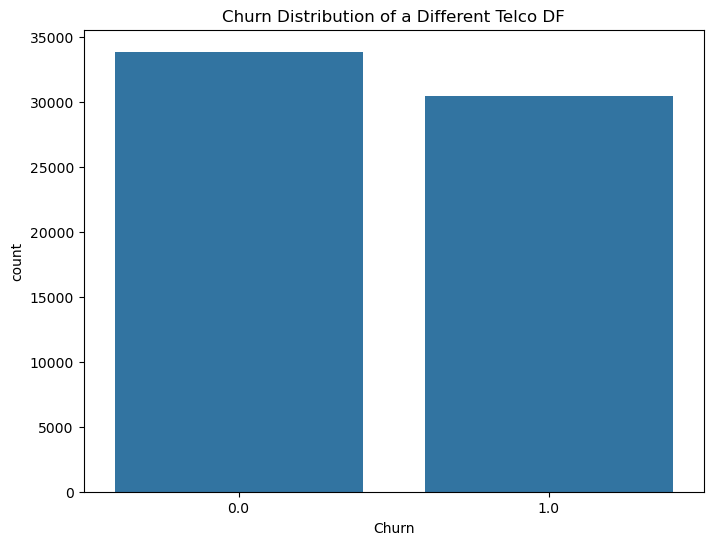



Churn Distribution:
Churn
0.0    33881
1.0    30493
Name: count, dtype: int64


Churn Distribution Percentages:
Churn
0.0    52.631497
1.0    47.368503
Name: proportion, dtype: float64




In [86]:
### Distribution of Churn (The target variable) on a different telco df
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Churn', data = diff_telco_churn_df)
plt.title('Churn Distribution of a Different Telco DF')
plt.show()
print('\n')

print("Churn Distribution:")
print(diff_telco_churn_df['Churn'].value_counts())
print('\n')

print("Churn Distribution Percentages:")
print(diff_telco_churn_df['Churn'].value_counts(normalize = True) * 100)
print('\n')

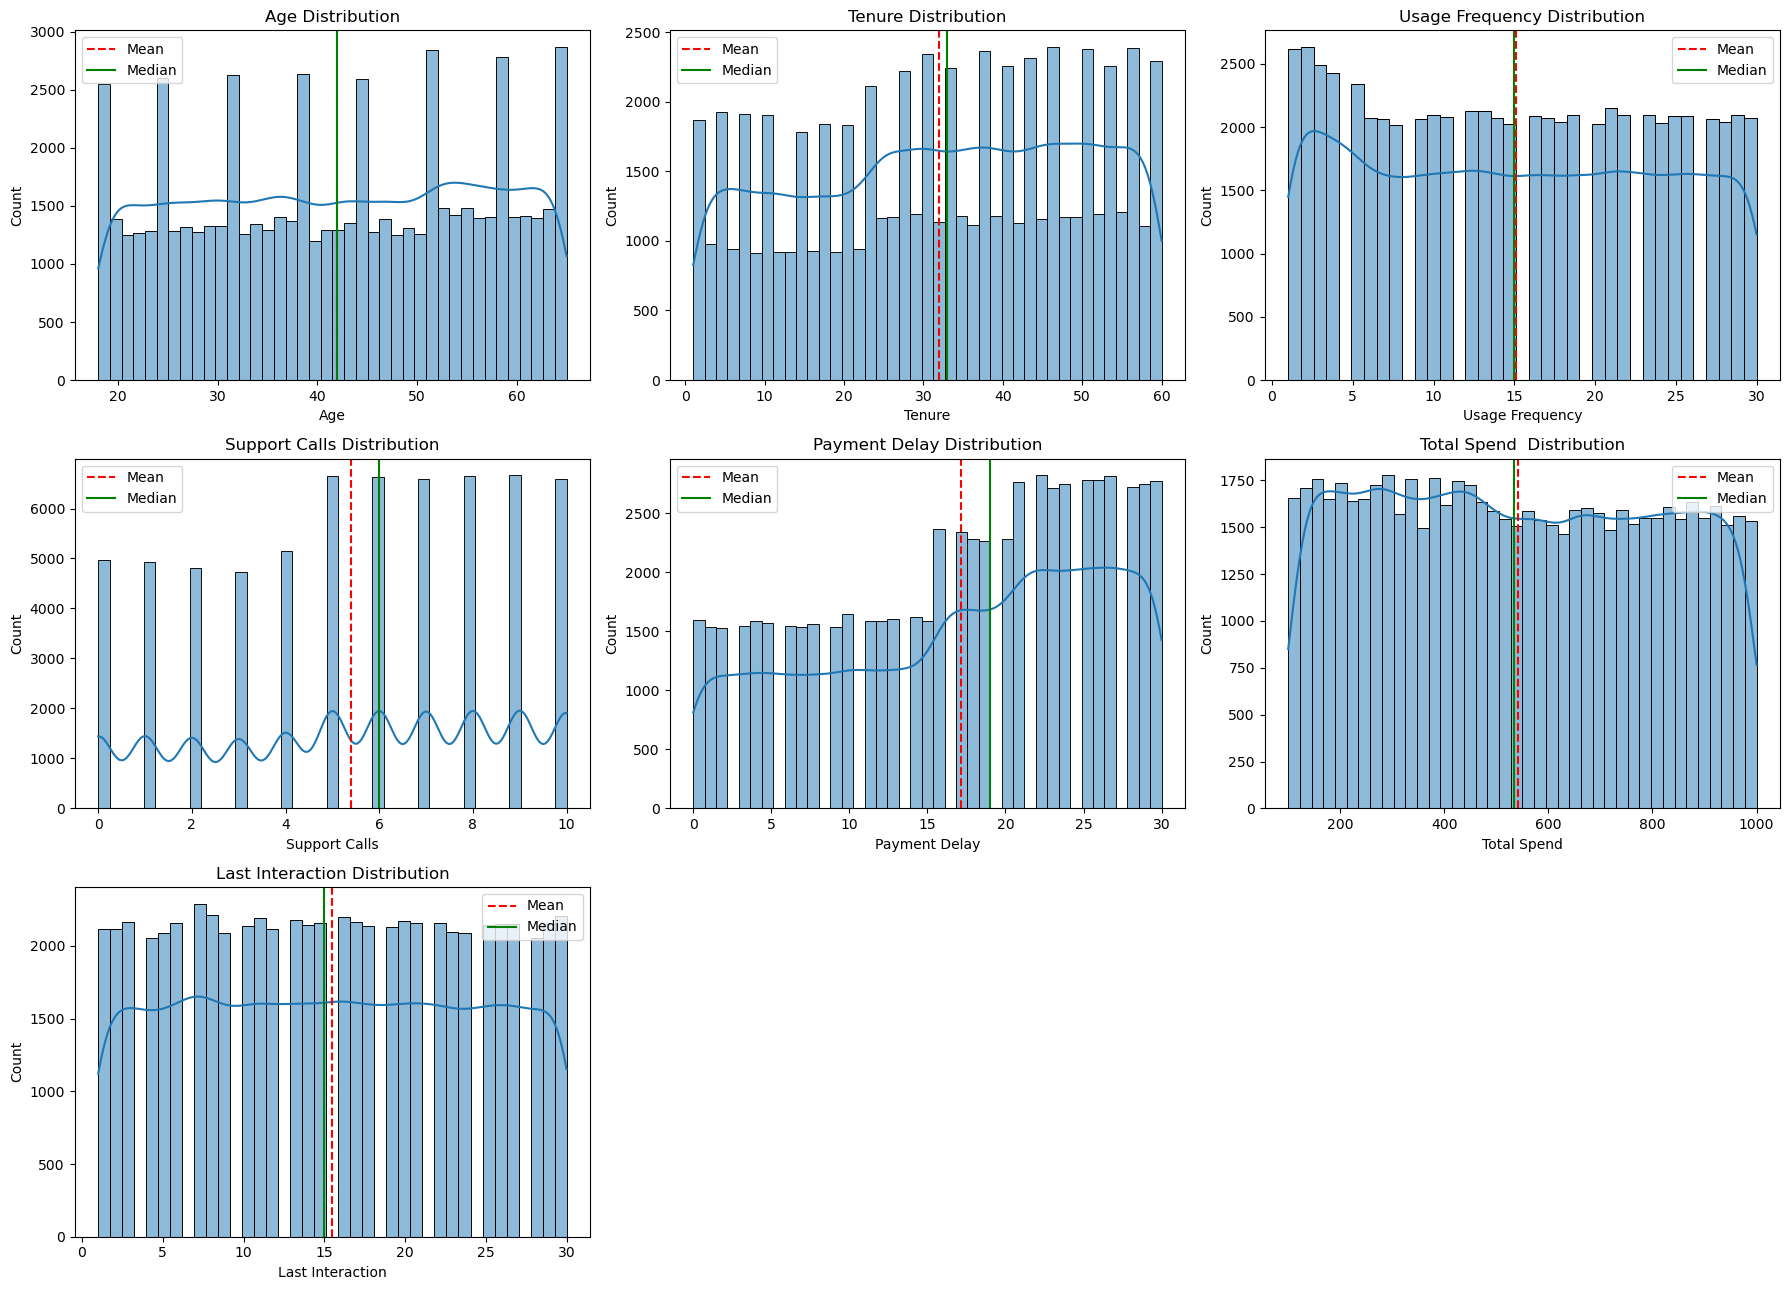

In [88]:
### Distribution of Different Telco DF Numerical Features
plt.figure(figsize = (18, 13))

### Age Distribution
plt.subplot(3, 3, 1)
sns.histplot(diff_telco_churn_df['Age'], kde = True)
plt.axvline(diff_telco_churn_df['Age'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(diff_telco_churn_df['Age'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Age Distribution')

### Tenure Distribution
plt.subplot(3, 3, 2)
sns.histplot(diff_telco_churn_df['Tenure'], kde = True)
plt.axvline(diff_telco_churn_df['Tenure'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(diff_telco_churn_df['Tenure'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Tenure Distribution')

### Usage Frequency Distribution
plt.subplot(3, 3, 3)
sns.histplot(diff_telco_churn_df['Usage Frequency'], kde = True)
plt.axvline(diff_telco_churn_df['Usage Frequency'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(diff_telco_churn_df['Usage Frequency'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Usage Frequency Distribution')

### Support Calls Distribution
plt.subplot(3, 3, 4)
sns.histplot(diff_telco_churn_df['Support Calls'], kde = True)
plt.axvline(diff_telco_churn_df['Support Calls'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(diff_telco_churn_df['Support Calls'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Support Calls Distribution')

### Payment Delay Distribution
plt.subplot(3, 3, 5)
sns.histplot(diff_telco_churn_df['Payment Delay'], kde = True)
plt.axvline(diff_telco_churn_df['Payment Delay'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(diff_telco_churn_df['Payment Delay'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Payment Delay Distribution')

### Total Spend  Ratio
plt.subplot(3, 3, 6)
sns.histplot(diff_telco_churn_df['Total Spend'], kde = True)
plt.axvline(diff_telco_churn_df['Total Spend'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(diff_telco_churn_df['Total Spend'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Total Spend  Distribution')

### Last Interaction Ratio
plt.subplot(3, 3, 7)
sns.histplot(diff_telco_churn_df['Last Interaction'], kde = True)
plt.axvline(diff_telco_churn_df['Last Interaction'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(diff_telco_churn_df['Last Interaction'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Last Interaction Distribution')

plt.tight_layout()
plt.show()

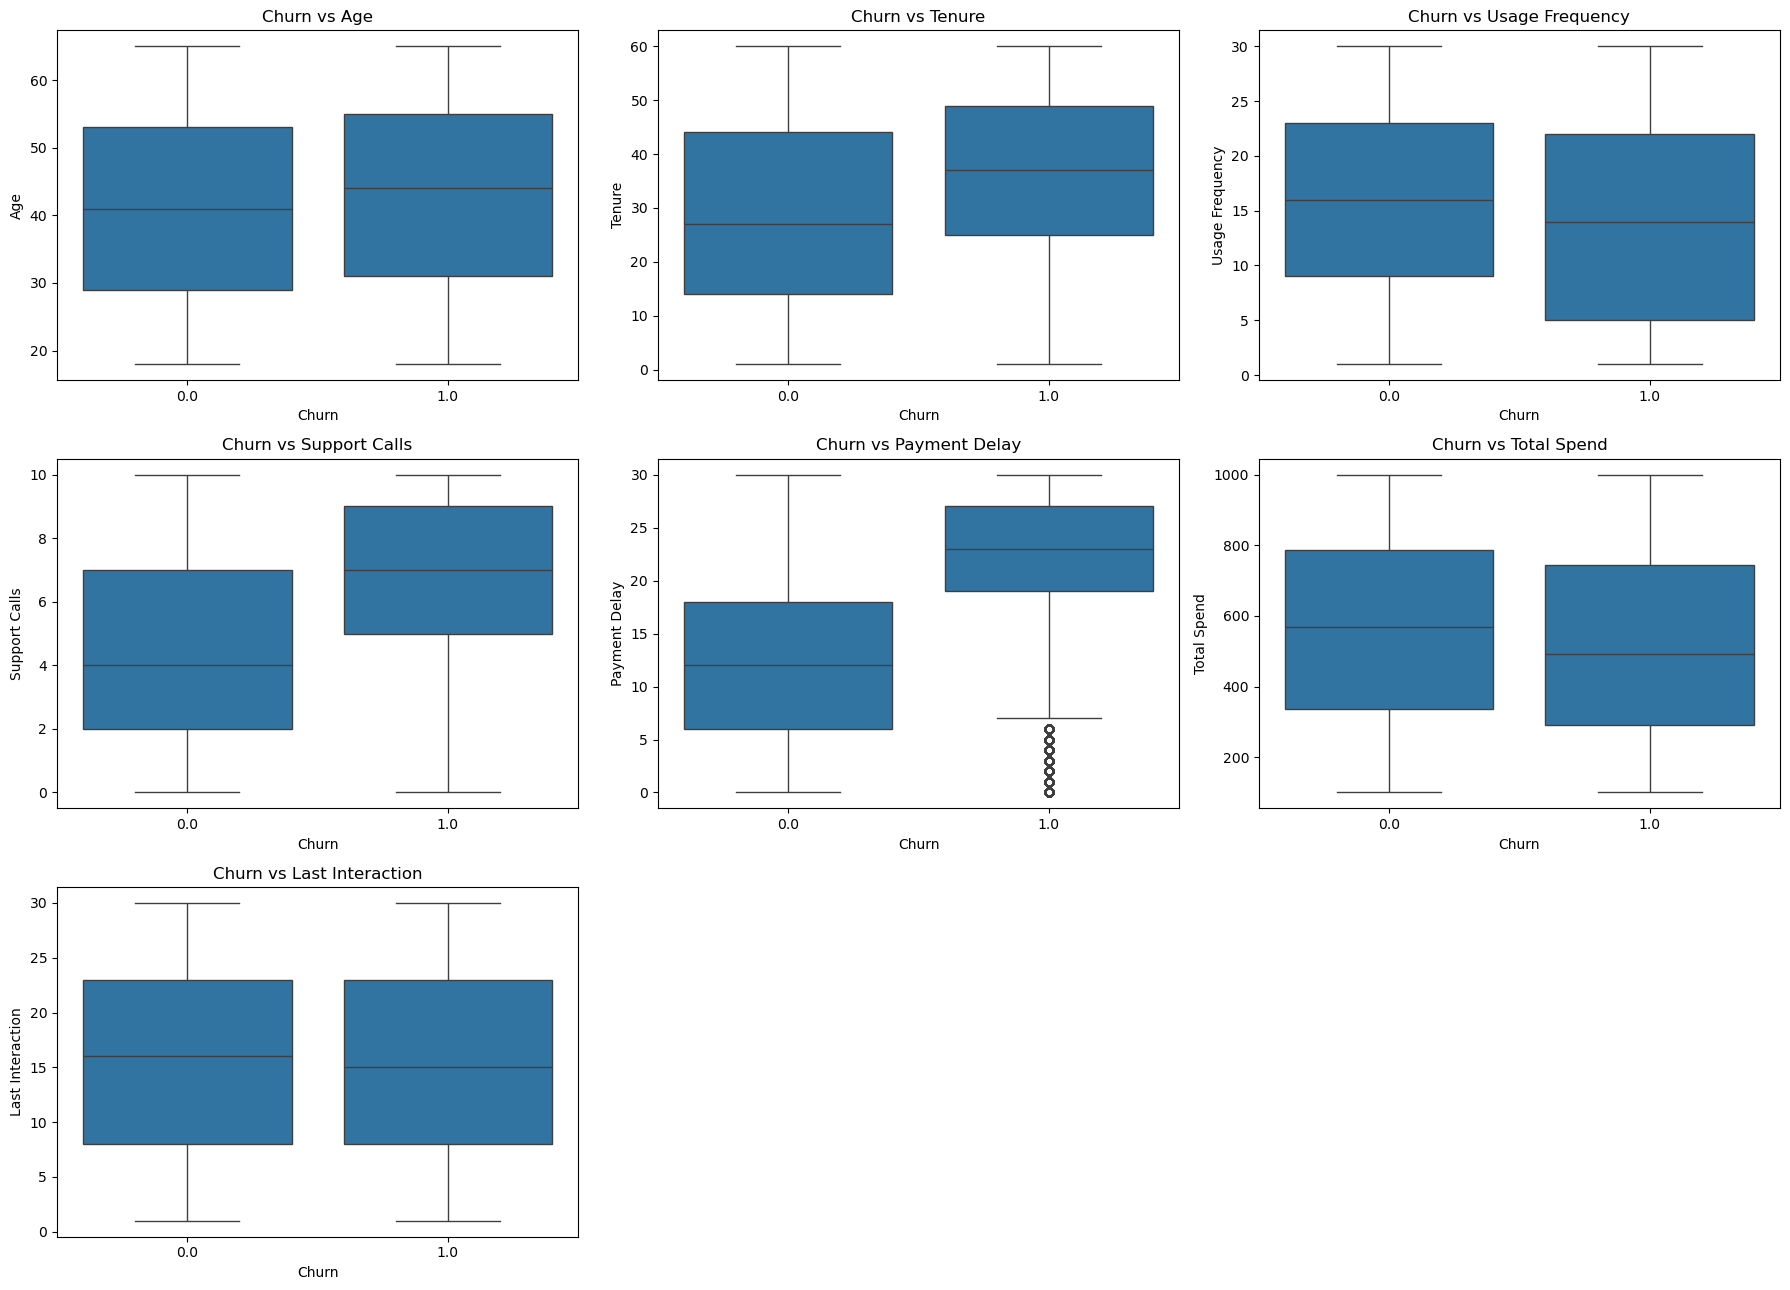

In [92]:
### Churn vs Different Telco DF Numerical Features
plt.figure(figsize = (18, 13))

### Churn vs Age
plt.subplot(3, 3, 1)
sns.boxplot(x = 'Churn', y = 'Age', data = diff_telco_churn_df)
plt.title('Churn vs Age')

### Churn vs Tenure
plt.subplot(3, 3, 2)
sns.boxplot(x = 'Churn', y = 'Tenure', data = diff_telco_churn_df)
plt.title('Churn vs Tenure')

### Churn vs Usage Frequency
plt.subplot(3, 3, 3)
sns.boxplot(x = 'Churn', y = 'Usage Frequency', data = diff_telco_churn_df)
plt.title('Churn vs Usage Frequency')

### Churn vs Support Calls
plt.subplot(3, 3, 4)
sns.boxplot(x = 'Churn', y = 'Support Calls', data = diff_telco_churn_df)
plt.title('Churn vs Support Calls')

### Churn vs Payment Delay
plt.subplot(3, 3, 5)
sns.boxplot(x = 'Churn', y = 'Payment Delay', data = diff_telco_churn_df)
plt.title('Churn vs Payment Delay')

### Churn vs Total Spend
plt.subplot(3, 3, 6)
sns.boxplot(x = 'Churn', y = 'Total Spend', data = diff_telco_churn_df)
plt.title('Churn vs Total Spend')

### Churn vs Last Interaction
plt.subplot(3, 3, 7)
sns.boxplot(x = 'Churn', y = 'Last Interaction', data = diff_telco_churn_df)
plt.title('Churn vs Last Interaction')

plt.tight_layout()
plt.show()

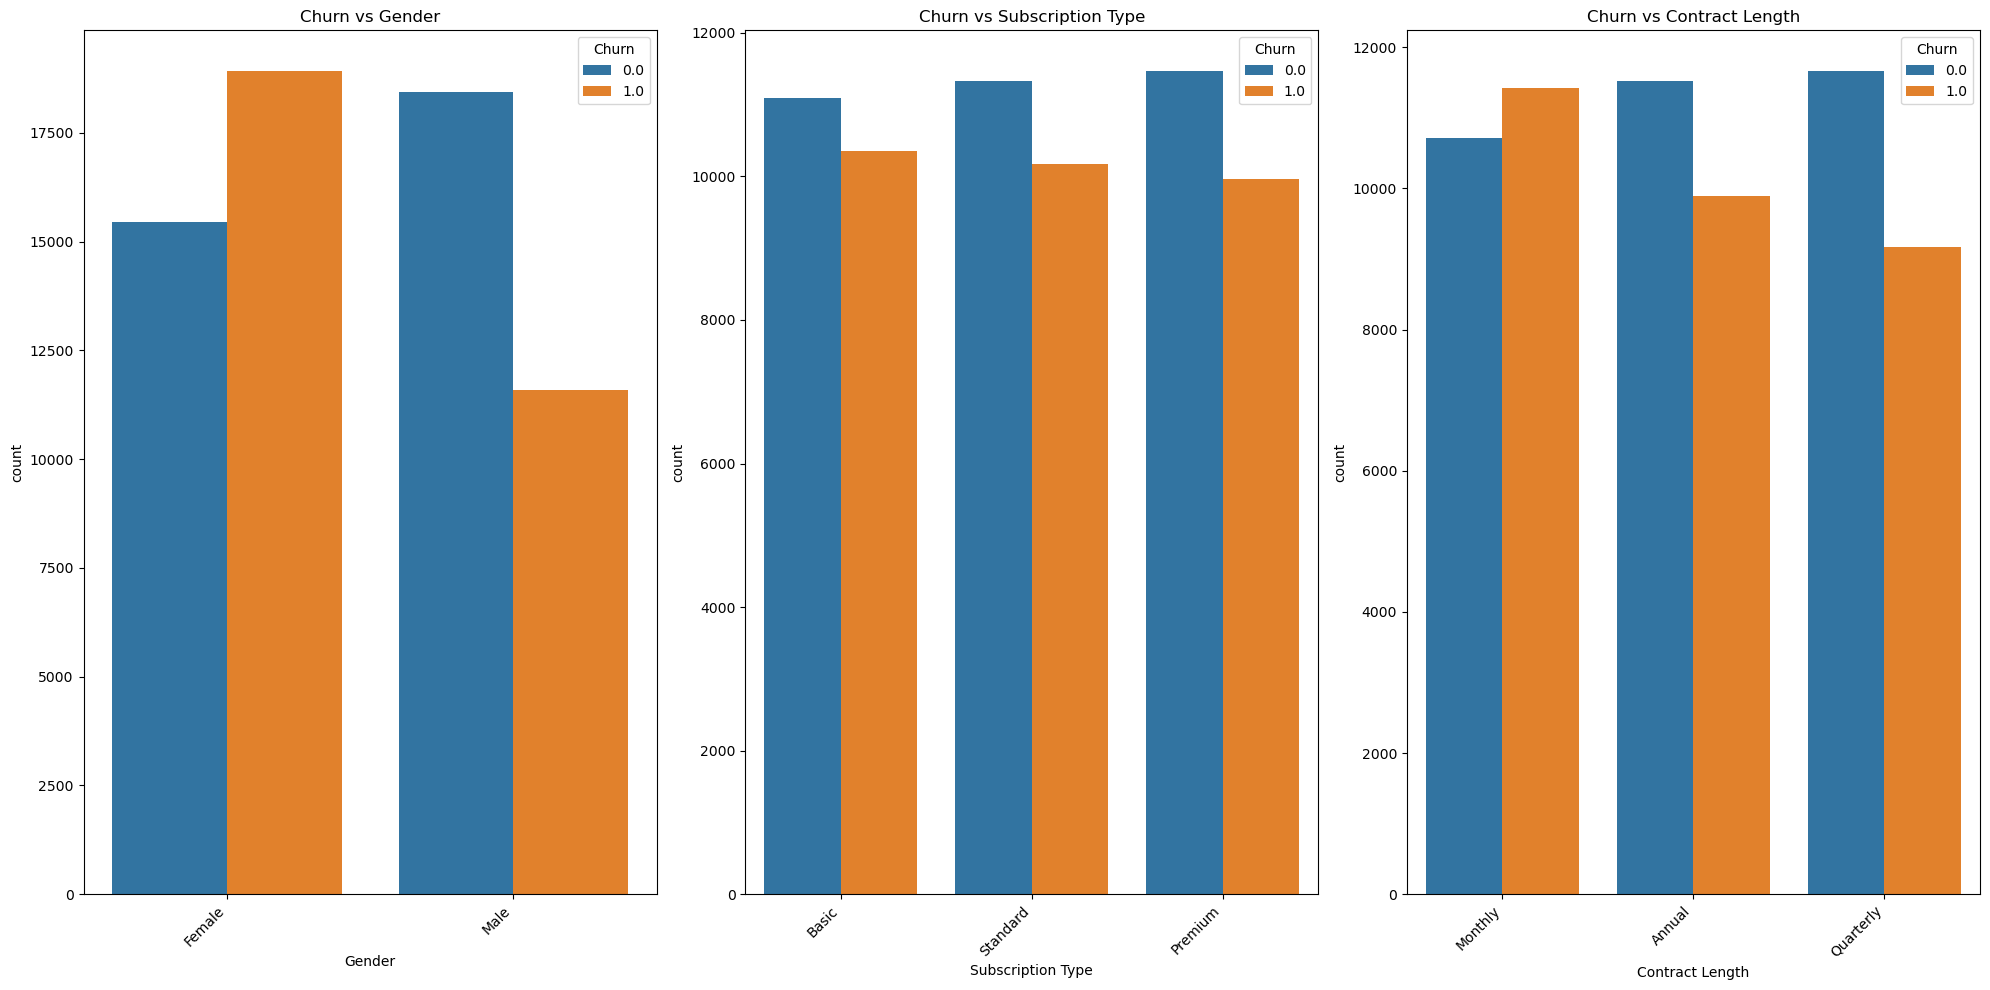

In [94]:
### Churn vs Different Telco DF Categorical Features
plt.figure(figsize = (20, 10))

### Churn vs Gender
plt.subplot(1, 3, 1)
sns.countplot(x = 'Gender', hue = 'Churn', data = diff_telco_churn_df)
plt.title('Churn vs Gender')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Subscription Type
plt.subplot(1, 3, 2)
sns.countplot(x = 'Subscription Type', hue = 'Churn', data = diff_telco_churn_df)
plt.title('Churn vs Subscription Type')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Contract Length
plt.subplot(1, 3, 3)
sns.countplot(x = 'Contract Length', hue = 'Churn', data = diff_telco_churn_df)
plt.title('Churn vs Contract Length')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

In [96]:
### Rerun optimized models on diff telco df
### Defining the input feature matrix (X) and the target variable vector (y).
diff_telco_X = diff_telco_churn_df_encoded_excluding_churn.copy()
diff_telco_y = diff_telco_churn_df_encoded['Churn']

### Creating a list of the continuous features that we will be scaling, we do not want to scale the binary indicator columns only the continuous numerical columns.
diff_telco_continuous_columns = [
    'Age',
    'Tenure',
    'Usage Frequency',
    'Support Calls',
    'Payment Delay',
    'Total Spend',
    'Last Interaction',
]
#############################################################################################################################################################################################
### Defining Sampling/Scaling techniques and the classification models we are going to be comparing.
diff_telco_classification_models = {
    'logistic_regression': LogisticRegression(random_state = 22),
    'support_vector_classifier': SVC(probability = True, random_state = 22),
    'decision_tree_classifier': DecisionTreeClassifier(random_state = 22),
    'random_forest_classifier': RandomForestClassifier(random_state = 22),
    'gaussian_naive_bayes_classifier': GaussianNB(),
    'xgboost_classifier': XGBClassifier(random_state = 22)
}

diff_telco_scaling_techniques = {
    'no_scaling': None,
    'standard_scaler': StandardScaler(),
    'robust_scaler': RobustScaler(),
    'min_max_scaler': MinMaxScaler()
}

diff_telco_sampling_techniques = {
    'no_sampling': None,
    'random_undersampling': RandomUnderSampler(random_state = 22),
    'random_oversampling': RandomOverSampler(random_state = 22),
    'smote': SMOTE(random_state = 22)
}
#############################################################################################################################################################################################
### Optimized model configurations from gridsearch_results_list
diff_telco_optimized_models = {
    entry['classification_model']: {
        'scaling_technique': entry['scaling_technique'],
        'sampling_technique': entry['sampling_technique'],
        'best_hyperparameters': entry['best_hyperparameters']
    }
    for entry in gridsearch_results_list
}

#############################################################################################################################################################################################
### Setting up KFold crossvalidation with 5 splits. 
diff_telco_cross_validation_split = KFold(n_splits = 5, shuffle = True, random_state = 22)

### Creating containers to store average model metrics information and ROC curve information (false positive rate and true positive rate arrays).
diff_telco_average_model_metrics = []
diff_telco_roc_data = {}

### Looping through each combination of model, scaling technique, and sampling technique.
for diff_telco_classification_model_name, diff_telco_classification_model_config in diff_telco_optimized_models.items():
    ### Getting classification model and set optimized hyperparameters
    diff_telco_classification_model = diff_telco_classification_models[diff_telco_classification_model_name]
    diff_telco_classification_model.set_params(**diff_telco_classification_model_config['best_hyperparameters'])
    
    ### Get scaling and sampling techniques
    diff_telco_scaling_technique = diff_telco_scaling_techniques[diff_telco_classification_model_config['scaling_technique']]
    diff_telco_sampling_technique = diff_telco_sampling_techniques[diff_telco_classification_model_config['sampling_technique']]

    ### Creating containers to store model metric information for each cross validation fold.
    diff_telco_accuracy_scores_per_fold = []
    diff_telco_precision_scores_per_fold = []
    diff_telco_recall_scores_per_fold = []
    diff_telco_f1_scores_per_fold = []
    diff_telco_log_loss_values_per_fold = []
    diff_telco_roc_auc_scores_per_fold = []

    ### Creating containers to store true labels and predicted probabilities across all folds for ROC curve calculations.
    diff_telco_all_true_labels = []
    diff_telco_all_probabilities = []

    ### Setting up cross validation dataset splits
    for diff_telco_train_indexes, diff_telco_test_indexes in diff_telco_cross_validation_split.split(diff_telco_X, diff_telco_y):
        diff_telco_X_train = diff_telco_X.iloc[diff_telco_train_indexes].copy()
        diff_telco_X_test  = diff_telco_X.iloc[diff_telco_test_indexes].copy()
        diff_telco_y_train = diff_telco_y.iloc[diff_telco_train_indexes].copy()
        diff_telco_y_test  = diff_telco_y.iloc[diff_telco_test_indexes].copy()

        ### Applying the scaling techniques to only the continuous features defined above.
        if diff_telco_scaling_technique is not None:
            diff_telco_X_train.loc[:, diff_telco_continuous_columns] = diff_telco_scaling_technique.fit_transform(diff_telco_X_train[diff_telco_continuous_columns])
            diff_telco_X_test.loc[:, diff_telco_continuous_columns] = diff_telco_scaling_technique.transform(diff_telco_X_test[diff_telco_continuous_columns])

        ### Applying the sampling techniques.
        if diff_telco_sampling_technique is not None:
            diff_telco_X_train, diff_telco_y_train = diff_telco_sampling_technique.fit_resample(diff_telco_X_train, diff_telco_y_train)

        ### Training the classification model.
        diff_telco_classification_model.fit(diff_telco_X_train, diff_telco_y_train)

        ### Generating predictions and probabilities of churn on the testing dataset.
        diff_telco_y_predicted_labels = diff_telco_classification_model.predict(diff_telco_X_test)
        diff_telco_y_predicted_probabilities = diff_telco_classification_model.predict_proba(diff_telco_X_test)[:, 1]

        ### Calculating performance metrics for each cross validation fold.
        diff_telco_accuracy_scores_per_fold.append(accuracy_score(diff_telco_y_test, diff_telco_y_predicted_labels))
        diff_telco_precision_scores_per_fold.append(precision_score(diff_telco_y_test, diff_telco_y_predicted_labels))
        diff_telco_recall_scores_per_fold.append(recall_score(diff_telco_y_test, diff_telco_y_predicted_labels))
        diff_telco_f1_scores_per_fold.append(f1_score(diff_telco_y_test, diff_telco_y_predicted_labels))
        diff_telco_log_loss_values_per_fold.append(log_loss(diff_telco_y_test, diff_telco_y_predicted_probabilities))
        diff_telco_roc_auc_scores_per_fold.append(roc_auc_score(diff_telco_y_test, diff_telco_y_predicted_probabilities))

        ### Collecting data for ROC curve
        diff_telco_all_true_labels.extend(diff_telco_y_test.tolist())
        diff_telco_all_probabilities.extend(diff_telco_y_predicted_probabilities.tolist())

    ### Computing a single ROC curve for each combination across all folds.
    diff_telco_false_positive_rates, diff_telco_true_positive_rates, _ = roc_curve(diff_telco_all_true_labels, diff_telco_all_probabilities)

    ### Storing averaged metrics across all folds for each combination.
    diff_telco_average_model_metrics.append({
        'classification_model': diff_telco_classification_model_name,
        'scaling_technique': diff_telco_classification_model_config['scaling_technique'],
        'sampling_technique': diff_telco_classification_model_config['sampling_technique'],
        'accuracy': np.mean(diff_telco_accuracy_scores_per_fold),
        'precision': np.mean(diff_telco_precision_scores_per_fold),
        'recall': np.mean(diff_telco_recall_scores_per_fold),
        'f1_score': np.mean(diff_telco_f1_scores_per_fold),
        'log_loss': np.mean(diff_telco_log_loss_values_per_fold),
        'roc_auc': np.mean(diff_telco_roc_auc_scores_per_fold)
    })

    ### Storing ROC curve information for plotting
    diff_telco_roc_data[(diff_telco_classification_model_name, diff_telco_classification_model_config['scaling_technique'], diff_telco_classification_model_config['sampling_technique'])] = (diff_telco_false_positive_rates, diff_telco_true_positive_rates)

### Converting to DataFrame
diff_telco_results_df = pd.DataFrame(diff_telco_average_model_metrics)
print("Performance on a different Telco DF:")
display(diff_telco_results_df.sort_values(by = 'f1_score', ascending = False))

Performance on a different Telco DF:


classification_model scaling_technique    sampling_technique  \
0               xgboost_classifier        no_scaling   random_oversampling   
1         random_forest_classifier   standard_scaler  random_undersampling   
5         decision_tree_classifier   standard_scaler  random_undersampling   
2        support_vector_classifier   standard_scaler   random_oversampling   
4  gaussian_naive_bayes_classifier   standard_scaler                 smote   
3              logistic_regression   standard_scaler   random_oversampling   

   accuracy  precision    recall  f1_score  log_loss   roc_auc  
0  0.999922   0.999869  0.999968  0.999918  0.000582  0.999992  
1  0.998742   0.998261  0.999082  0.998671  0.004244  0.999978  
5  0.956613   0.930023  0.982346  0.955465  0.088584  0.994410  
2  0.942228   0.934457  0.944284  0.939341  0.143388  0.987544  
4  0.835151   0.800956  0.867575  0.832931  0.403325  0.908518  
3  0.825504   0.800325  0.841580  0.820427  0.393823  0.904097

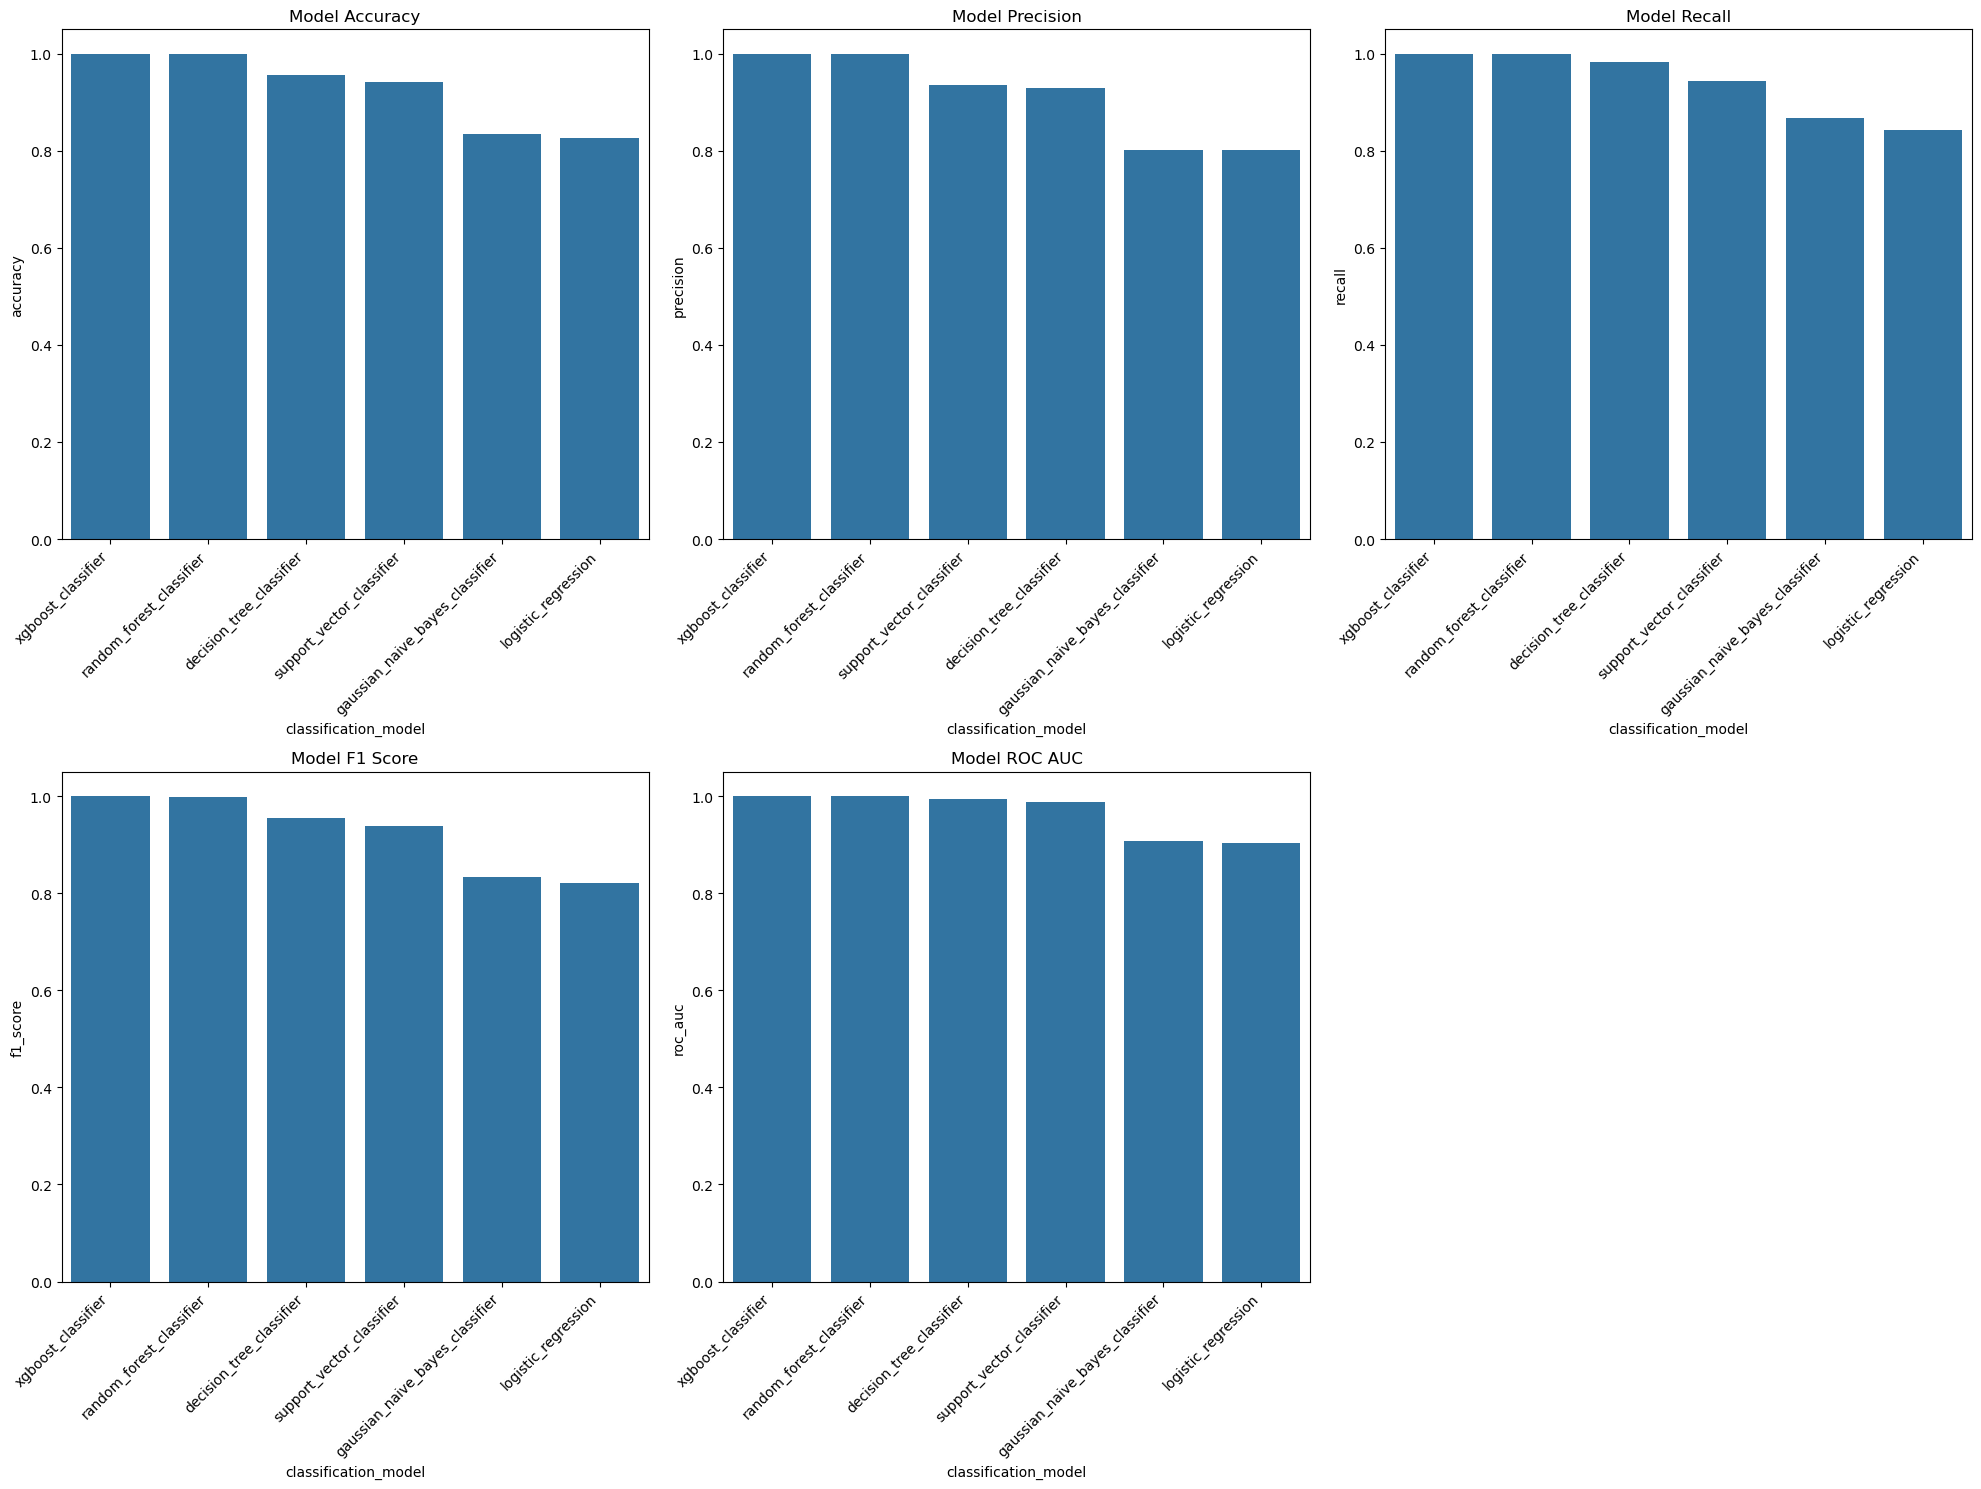

In [98]:
### Plotting the performance metrics of the optimized models on the different telco churn dataframe.
plt.figure(figsize = (20, 15))

### Plotting Accuracy Performance
plt.subplot(2, 3, 1)
sns.barplot(x = 'classification_model', y = 'accuracy', data = diff_telco_results_df.sort_values(by = 'accuracy', ascending = False))
plt.title('Model Accuracy')
plt.xticks(rotation = 45, ha = 'right')

### Plotting Precision Performance
plt.subplot(2, 3, 2)
sns.barplot(x = 'classification_model', y = 'precision', data = diff_telco_results_df.sort_values(by = 'precision', ascending = False))
plt.title('Model Precision')
plt.xticks(rotation = 45, ha = 'right')

### Plotting Recall Performance
plt.subplot(2, 3, 3)
sns.barplot(x = 'classification_model', y = 'recall', data = diff_telco_results_df.sort_values(by = 'recall', ascending = False))
plt.title('Model Recall')
plt.xticks(rotation = 45, ha = 'right')

### Plotting F1 Score Performance
plt.subplot(2, 3, 4)
sns.barplot(x = 'classification_model', y = 'f1_score', data = diff_telco_results_df.sort_values(by = 'f1_score', ascending = False))
plt.title('Model F1 Score')
plt.xticks(rotation = 45, ha = 'right')

### Plotting ROC AUC Performance
plt.subplot(2, 3, 5)
sns.barplot(x = 'classification_model', y = 'roc_auc', data = diff_telco_results_df.sort_values(by = 'roc_auc', ascending = False))
plt.title('Model ROC AUC')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

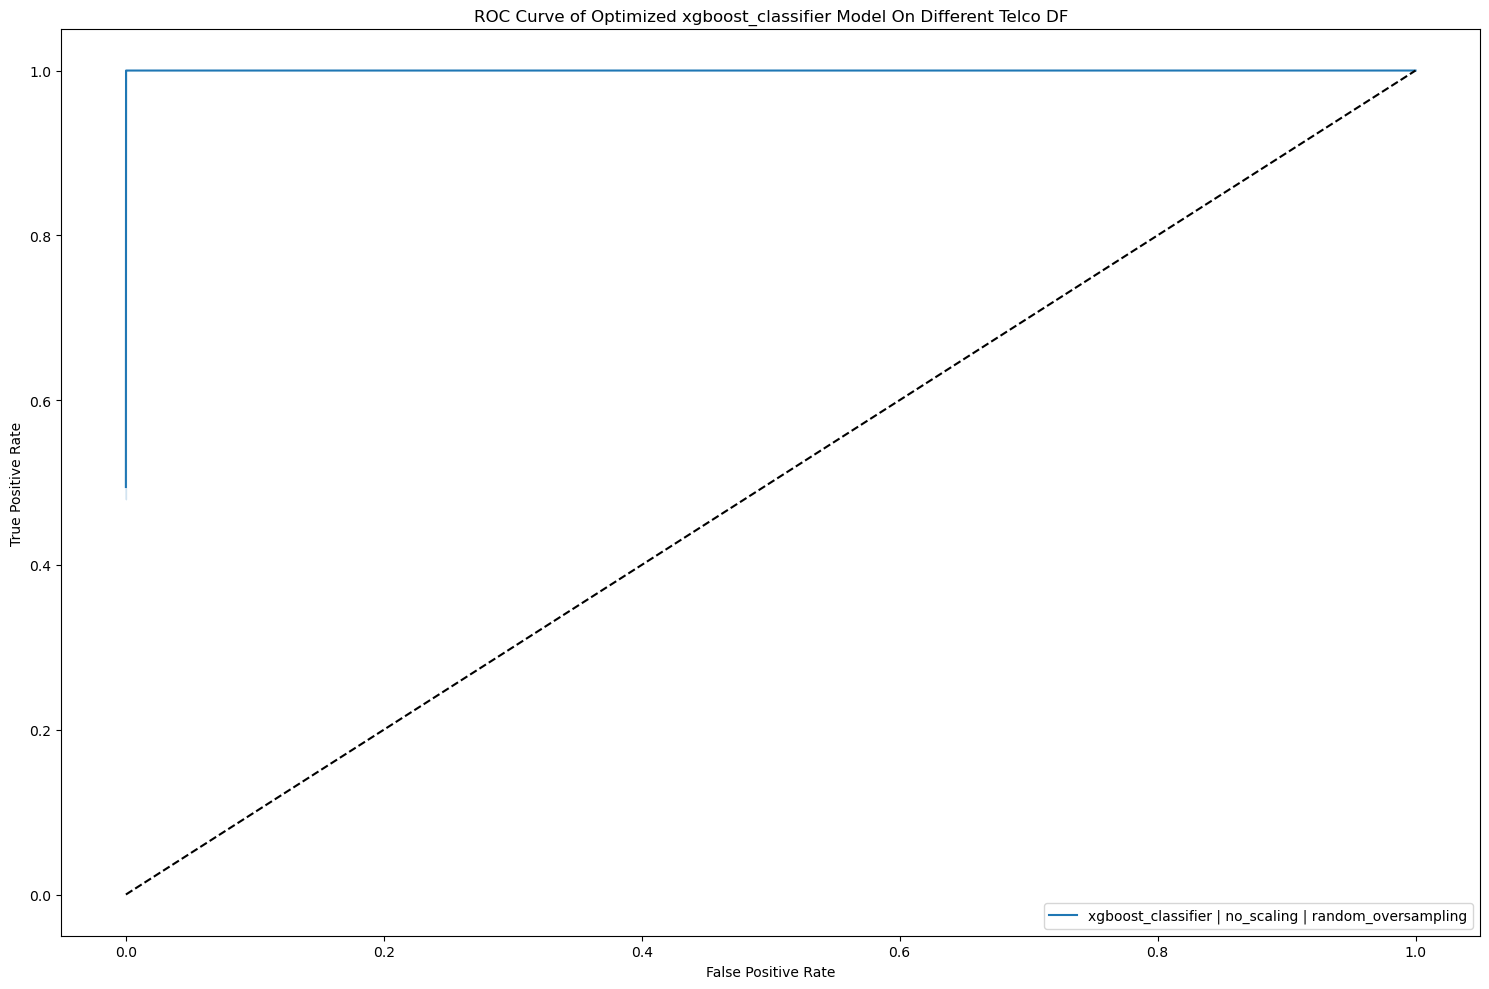

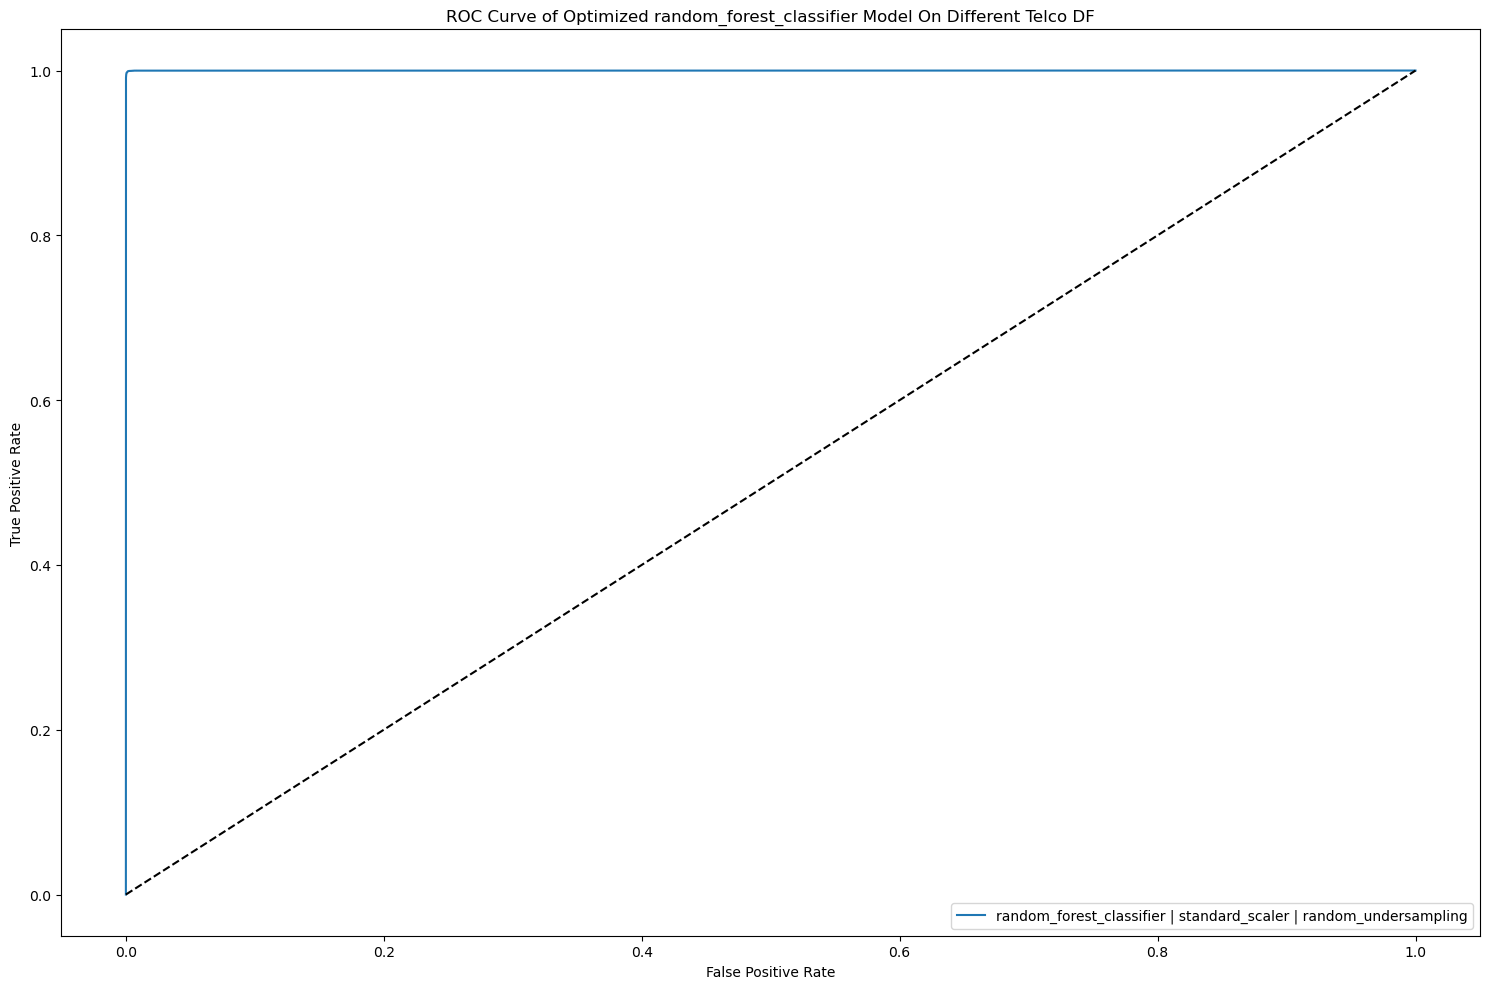

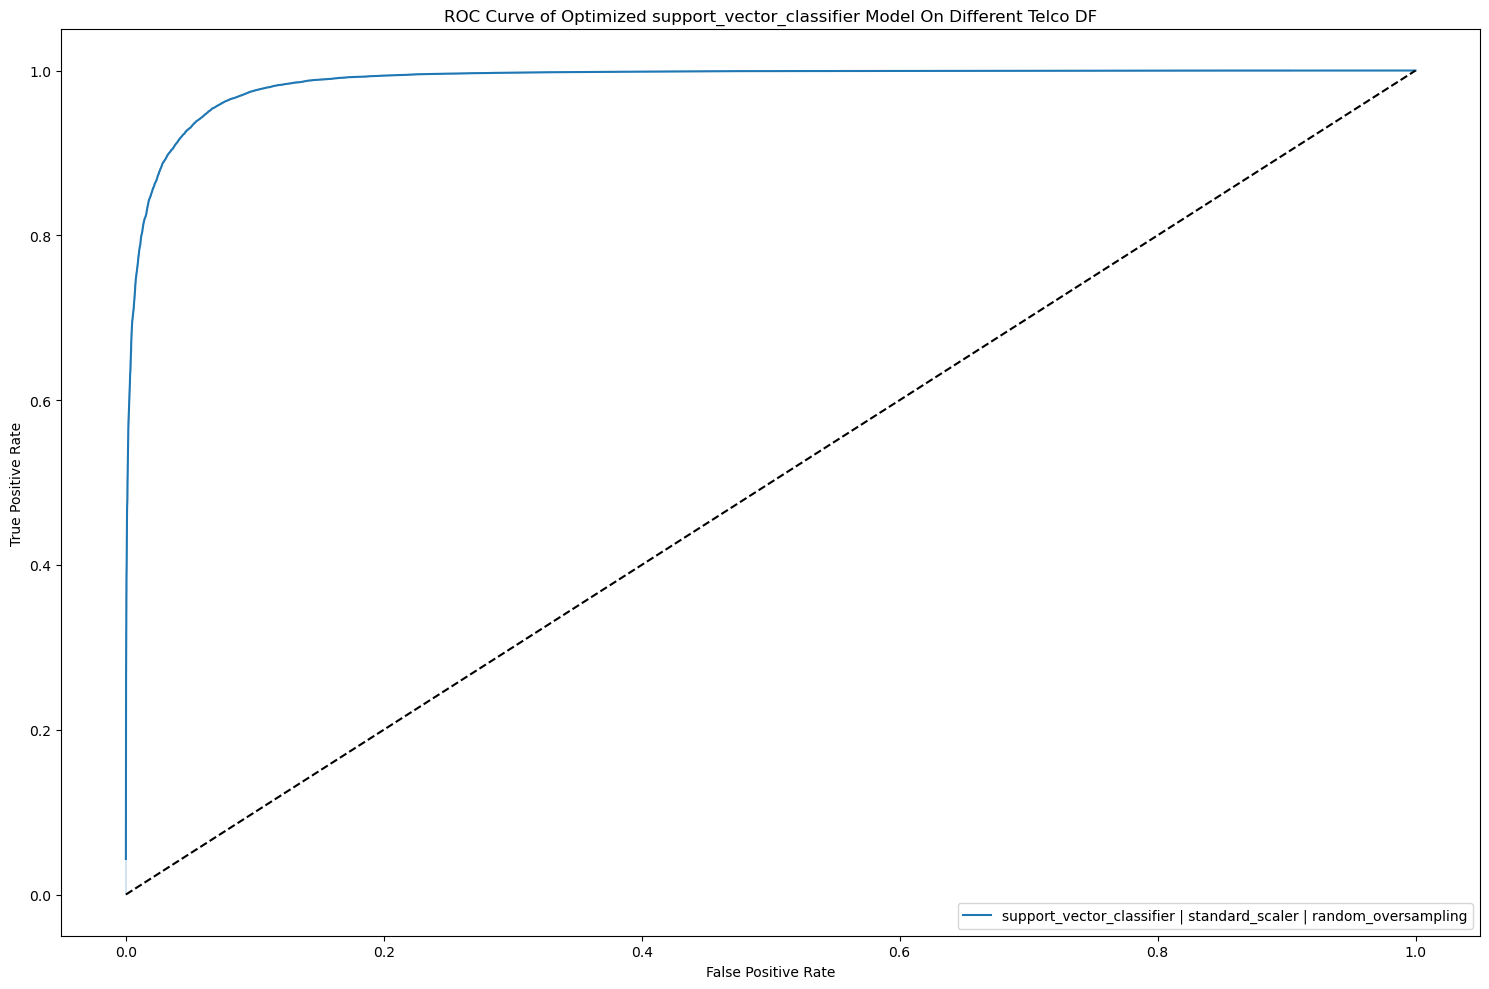

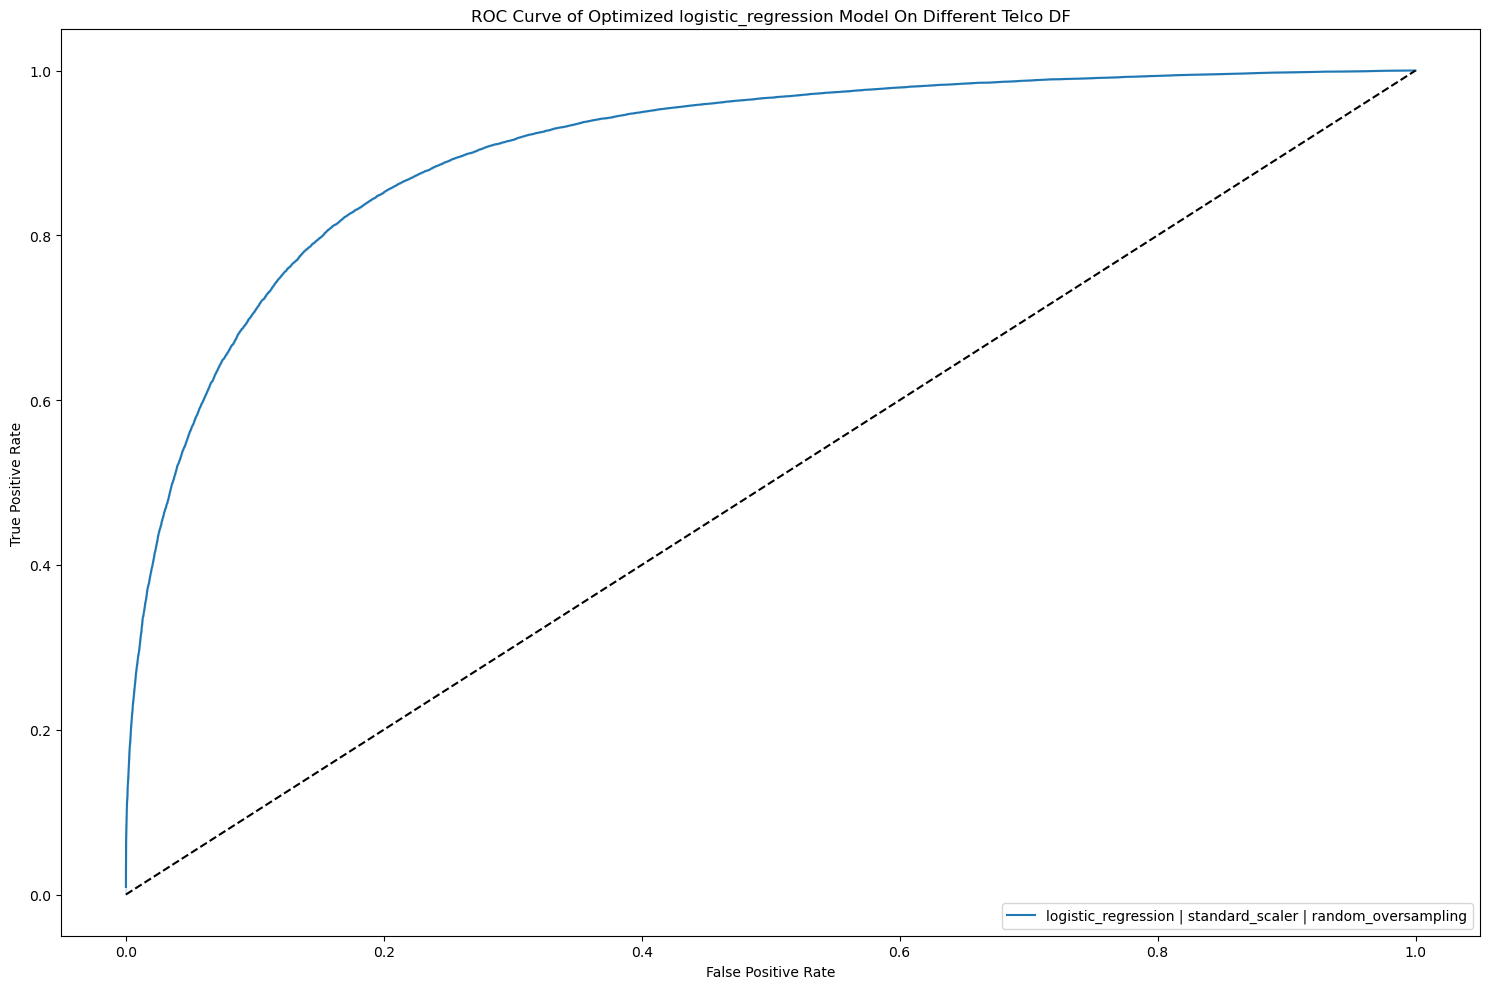

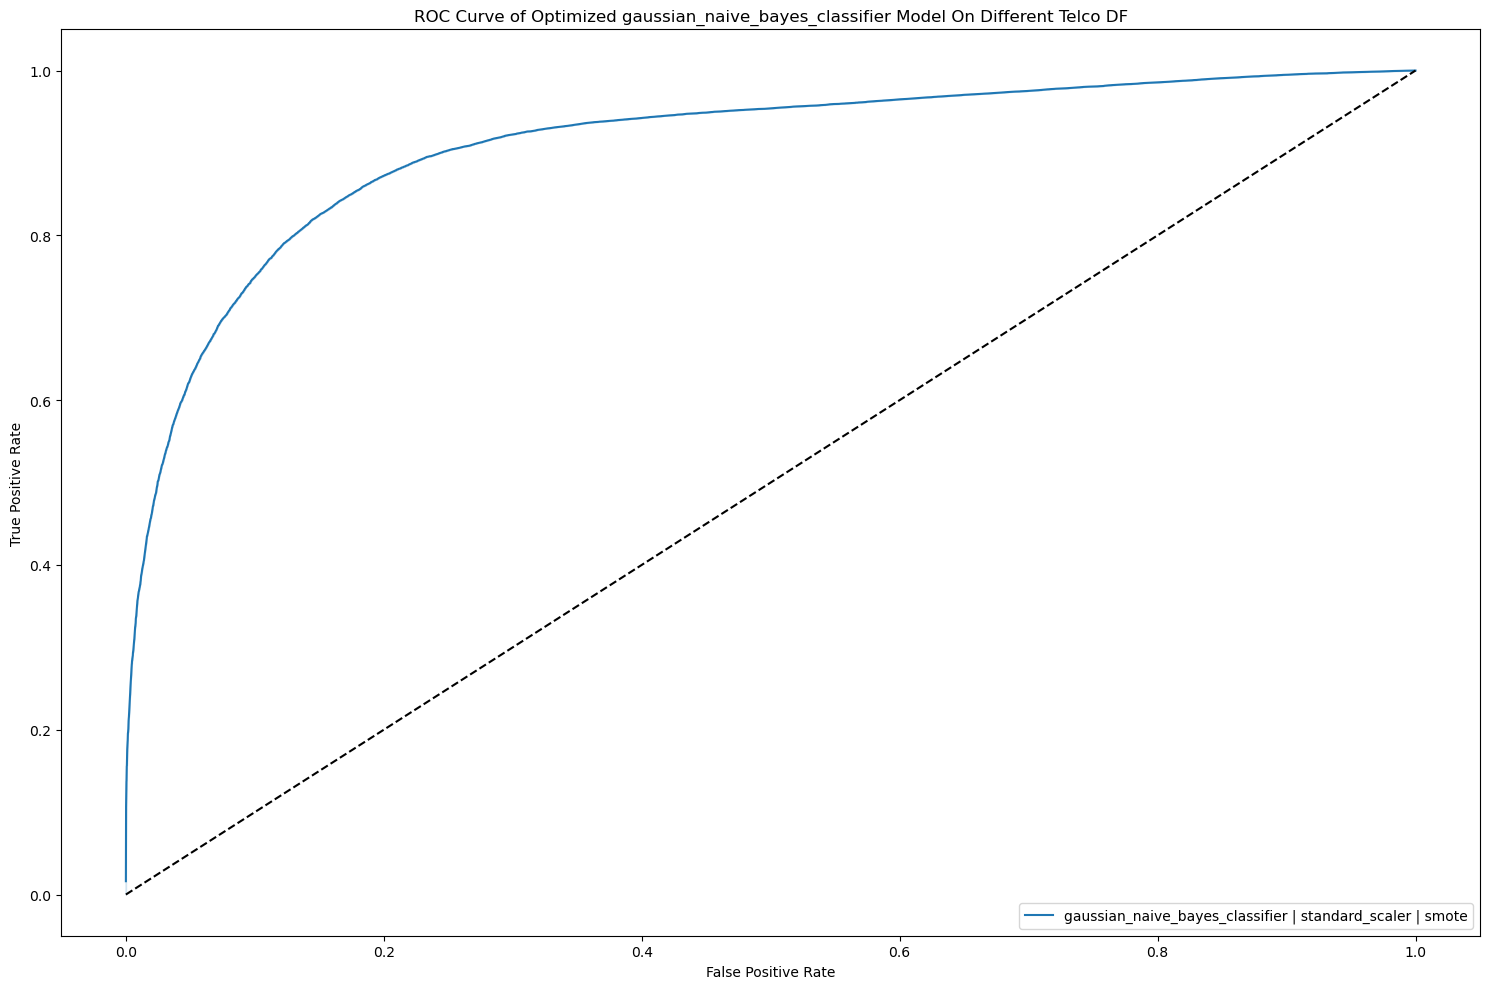

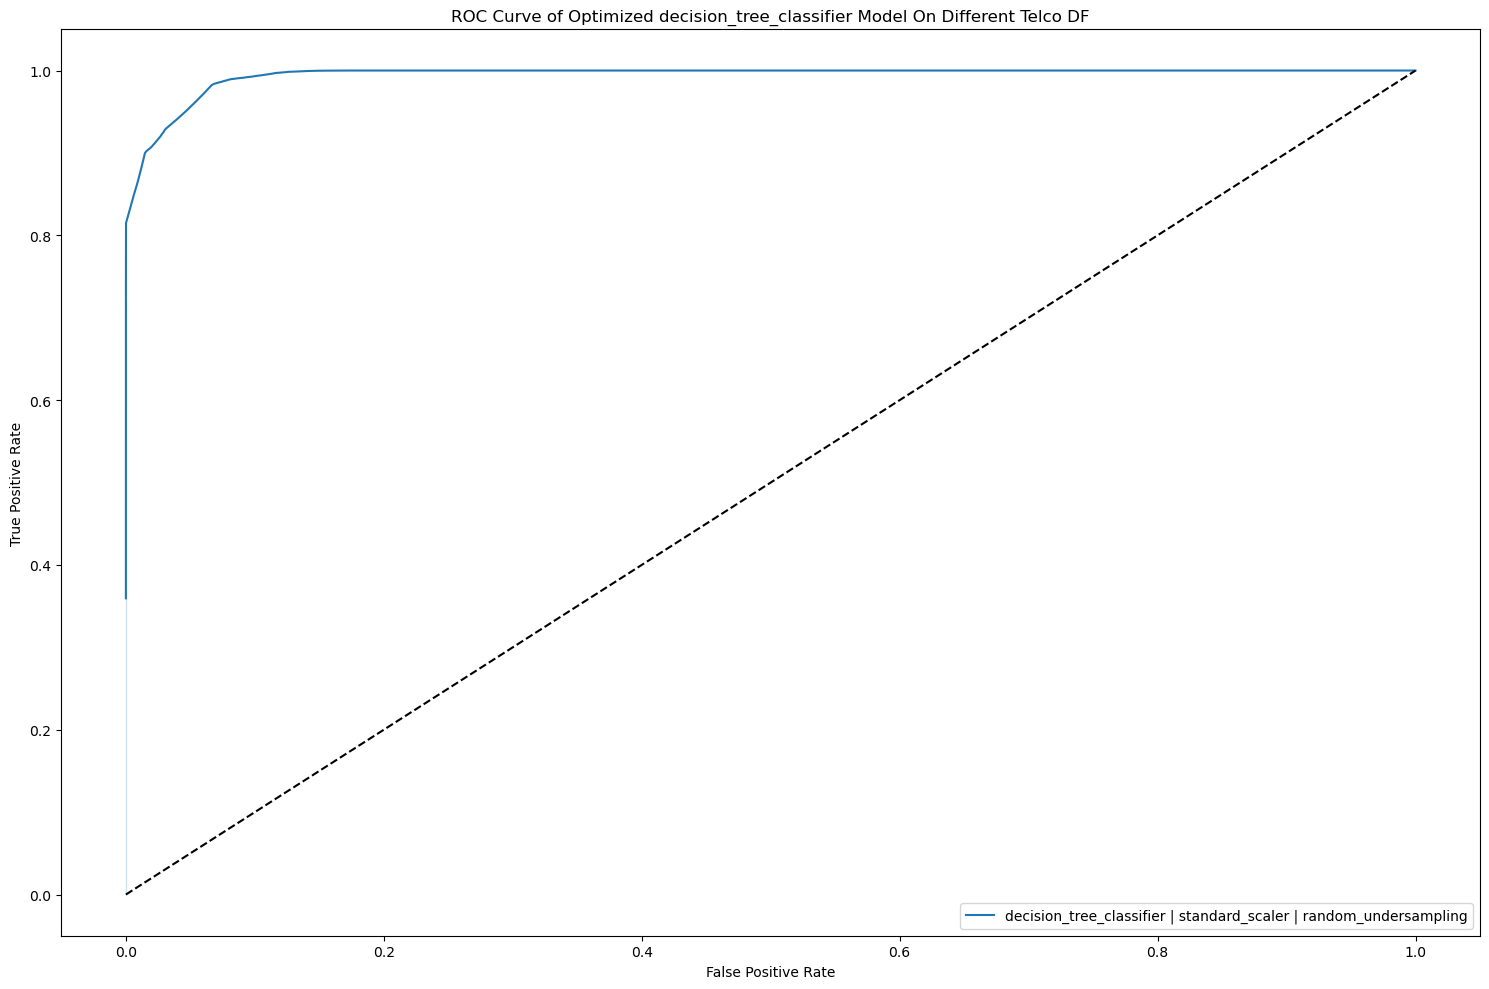

In [100]:
### Looping through each optimized model and creating a ROC curve using the different telco dataframe.
for index, row in diff_telco_results_df.iterrows():
    diff_telco_model_name = row['classification_model']
    diff_telco_scaler_name = row['scaling_technique']
    diff_telco_sampler_name = row['sampling_technique']

    diff_telco_combination_key = (diff_telco_model_name, diff_telco_scaler_name, diff_telco_sampler_name)
    
    if diff_telco_combination_key in diff_telco_roc_data:
        diff_telco_false_positive_rate, diff_telco_true_positive_rate = diff_telco_roc_data[diff_telco_combination_key]

        diff_telco_combination_label = f"{diff_telco_model_name} | {diff_telco_scaler_name} | {diff_telco_sampler_name}"

        plt.figure(figsize = (15, 10))
        sns.lineplot(x = diff_telco_false_positive_rate, y = diff_telco_true_positive_rate, label = diff_telco_combination_label)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f"ROC Curve of Optimized {diff_telco_model_name} Model On Different Telco DF")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc = "lower right")
    
        plt.tight_layout()
        plt.show()

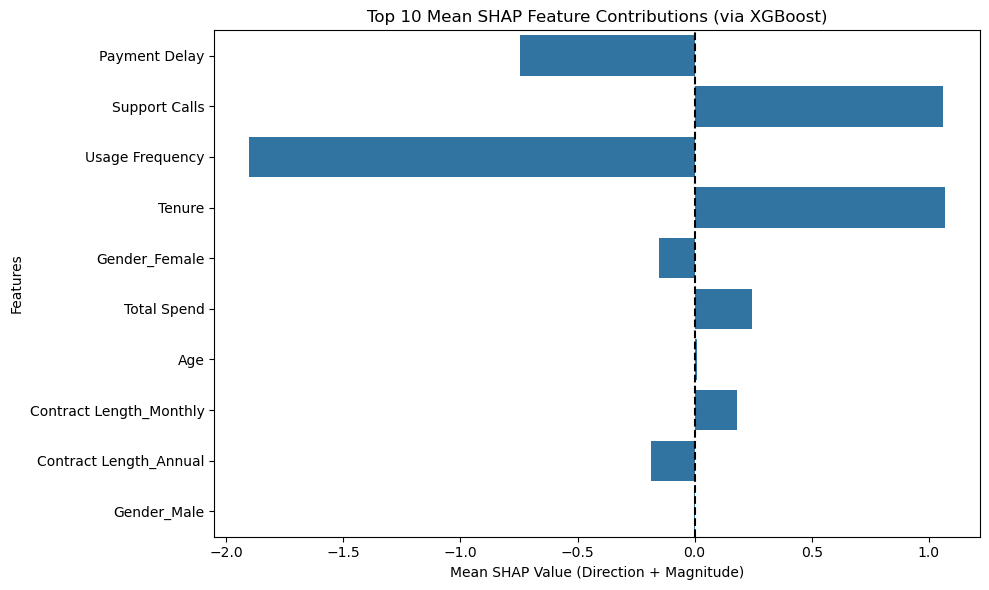



diff_telco_shap_df:


Feature  Mean_SHAP_value  Mean_ABS_SHAP_value
4                Payment Delay        -0.744704             5.617241
3                Support Calls         1.060048             4.007386
2              Usage Frequency        -1.902989             3.127197
1                       Tenure         1.069654             2.915936
7                Gender_Female        -0.151843             1.940470
5                  Total Spend         0.245153             1.920382
0                          Age         0.010967             1.456922
13     Contract Length_Monthly         0.179899             1.009675
12      Contract Length_Annual        -0.187241             0.460857
8                  Gender_Male        -0.001544             0.401240
9      Subscription Type_Basic        -0.077020             0.344382
14   Contract Length_Quarterly        -0.006702             0.235833
6             Last Interaction         0.029638             0.118965
11  Subscription Type_Standard        -0.000065             0.064951
10   Subscription Type_Premium        -0.000066             0.017166

In [102]:
### SHAP Feature Importances
### Extract the optimal XGBoost configuration from gridsearch_results_list
diff_telco_xgb_config = next(cfg for cfg in gridsearch_results_list if cfg['classification_model'] == 'xgboost_classifier')

### Initializing the XGBoost model with the optimized hyperparameters.
diff_telco_xgb_model = XGBClassifier(random_state = 22)
diff_telco_xgb_model.set_params(**diff_telco_xgb_config['best_hyperparameters'])

### Defining the input feature matrix (X) and the target variable vector (y).
diff_telco_X_SHAP = diff_telco_X.copy()
diff_telco_y_SHAP = diff_telco_y.copy()

### Applying the optimal scaling techniques.
if diff_telco_scaling_technique is not None:
    diff_telco_X_SHAP[diff_telco_continuous_columns] = diff_telco_scaling_technique.fit_transform(diff_telco_X_SHAP[diff_telco_continuous_columns])
### Applying the optimal sampling techniques.
if diff_telco_sampling_technique is not None:
    diff_telco_X_SHAP, diff_telco_y_SHAP = diff_telco_sampling_technique.fit_resample(diff_telco_X_SHAP, diff_telco_y_SHAP)

### Fitting the model.
diff_telco_xgb_model.fit(diff_telco_X_SHAP, diff_telco_y_SHAP)

### SHAP analysis
diff_telco_explainer = shap.TreeExplainer(diff_telco_xgb_model)
diff_telco_shap_values = diff_telco_explainer.shap_values(diff_telco_X_SHAP)

### Creating a feature importance dataframe.
diff_telco_shap_df = pd.DataFrame({
    'Feature': diff_telco_X_SHAP.columns,
    'Mean_SHAP_value': diff_telco_shap_values.mean(axis = 0),
    'Mean_ABS_SHAP_value': np.abs(diff_telco_shap_values).mean(axis = 0)
}).sort_values('Mean_ABS_SHAP_value', ascending = False)

### Plotting the top 10 Mean SHAP Feature Contributions sorted by mean absolute shap values
plt.figure(figsize = (10, 6))
sns.barplot(data = diff_telco_shap_df.head(10), x = 'Mean_SHAP_value', y = 'Feature')
plt.title('Top 10 Mean SHAP Feature Contributions (via XGBoost)')
plt.xlabel('Mean SHAP Value (Direction + Magnitude)')
plt.ylabel('Features')
plt.axvline(0, color = 'black', linestyle = '--')
plt.tight_layout()
plt.show()
print('\n')

### Displaying the feature importance dataframe.
print('diff_telco_shap_df:')
display(diff_telco_shap_df)
print('\n')


In [ ]:
###############################################################################################################################################
###############################################################################################################################################
###############################################################################################################################################
###############################################################################################################################################

In [104]:
### Loading a bank customer churn dataset to compare model performance on data from a different industry.
bank_churn_url = "https://raw.githubusercontent.com/adamcookeunc/DATA_780_PROJECT/refs/heads/main/Churn_Modelling.csv"
bank_churn_df = pd.read_csv(bank_churn_url)
bank_churn_df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [106]:
### Dropping irrelavent coolumns.
bank_churn_df = bank_churn_df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

### Ensuring that all numerical columns are in the float 64 formatting.
bank_churn_df['CreditScore'] = bank_churn_df['CreditScore'].astype(float)
bank_churn_df['Age'] = bank_churn_df['Age'].astype(float)
bank_churn_df['Tenure'] = bank_churn_df['Tenure'].astype(float)
bank_churn_df['Balance'] = bank_churn_df['Balance'].astype(float)
bank_churn_df['Tenure'] = bank_churn_df['Tenure'].astype(float)
bank_churn_df['NumOfProducts'] = bank_churn_df['NumOfProducts'].astype(float)
bank_churn_df['HasCrCard'] = bank_churn_df['HasCrCard'].astype(float)
bank_churn_df['IsActiveMember'] = bank_churn_df['IsActiveMember'].astype(float)
bank_churn_df['EstimatedSalary'] = bank_churn_df['EstimatedSalary'].astype(float)
bank_churn_df['Exited'] = bank_churn_df['Exited'].astype(float)

### One-Hot-Encoding categorical/nominal columns
bank_churn_df_encoded = pd.get_dummies(bank_churn_df, columns = ['Geography', 'Gender'], dtype = float)

### Excluding the churn column (the column that we are predicting)
bank_churn_df_encoded_excluding_churn = bank_churn_df_encoded.drop(columns = ['Exited'])

In [108]:
### Summary statistics
print("Summary statistics:")
display(bank_churn_df.describe(include = 'all'))
print('\n')

### Data types
print("Data types:")
display(bank_churn_df.dtypes)
print('\n')

### Number of missing values
print("Number of missing values:")
display(bank_churn_df.isna().sum())
print('\n')

### Number of unique values
print("Number of unique values:")
display(bank_churn_df.nunique())
print('\n')

Summary statistics:


CreditScore Geography Gender           Age        Tenure  \
count   10000.000000     10000  10000  10000.000000  10000.000000   
unique           NaN         3      2           NaN           NaN   
top              NaN    France   Male           NaN           NaN   
freq             NaN      5014   5457           NaN           NaN   
mean      650.528800       NaN    NaN     38.921800      5.012800   
std        96.653299       NaN    NaN     10.487806      2.892174   
min       350.000000       NaN    NaN     18.000000      0.000000   
25%       584.000000       NaN    NaN     32.000000      3.000000   
50%       652.000000       NaN    NaN     37.000000      5.000000   
75%       718.000000       NaN    NaN     44.000000      7.000000   
max       850.000000       NaN    NaN     92.000000     10.000000   

              Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    10000.000000   10000.000000  10000.00000    10000.000000   
unique            NaN            NaN          NaN             NaN   
top               NaN            NaN          NaN             NaN   
freq              NaN            NaN          NaN             NaN   
mean     76485.889288       1.530200      0.70550        0.515100   
std      62397.405202       0.581654      0.45584        0.499797   
min          0.000000       1.000000      0.00000        0.000000   
25%          0.000000       1.000000      0.00000        0.000000   
50%      97198.540000       1.000000      1.00000        1.000000   
75%     127644.240000       2.000000      1.00000        1.000000   
max     250898.090000       4.000000      1.00000        1.000000   

        EstimatedSalary        Exited  
count      10000.000000  10000.000000  
unique              NaN           NaN  
top                 NaN           NaN  
freq                NaN           NaN  
mean      100090.239881      0.203700  
std        57510.492818      0.402769  
min           11.580000      0.000000  
25%        51002.110000      0.000000  
50%       100193.915000      0.000000  
75%       149388.247500      0.000000  
max       199992.480000      1.000000



Data types:


CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object



Number of missing values:


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64



Number of unique values:


CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

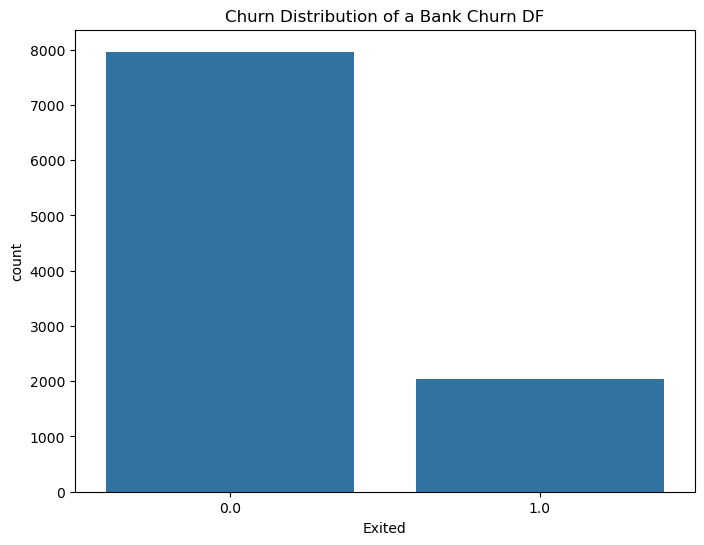



Churn Distribution:
Exited
0.0    7963
1.0    2037
Name: count, dtype: int64


Churn Distribution Percentages:
Exited
0.0    79.63
1.0    20.37
Name: proportion, dtype: float64




In [110]:
### Distribution of churn (the target variable) on the bank churn dataframe.
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Exited', data = bank_churn_df)
plt.title('Churn Distribution of a Bank Churn DF')
plt.show()
print('\n')

print("Churn Distribution:")
print(bank_churn_df['Exited'].value_counts())
print('\n')

print("Churn Distribution Percentages:")
print(bank_churn_df['Exited'].value_counts(normalize = True) * 100)
print('\n')

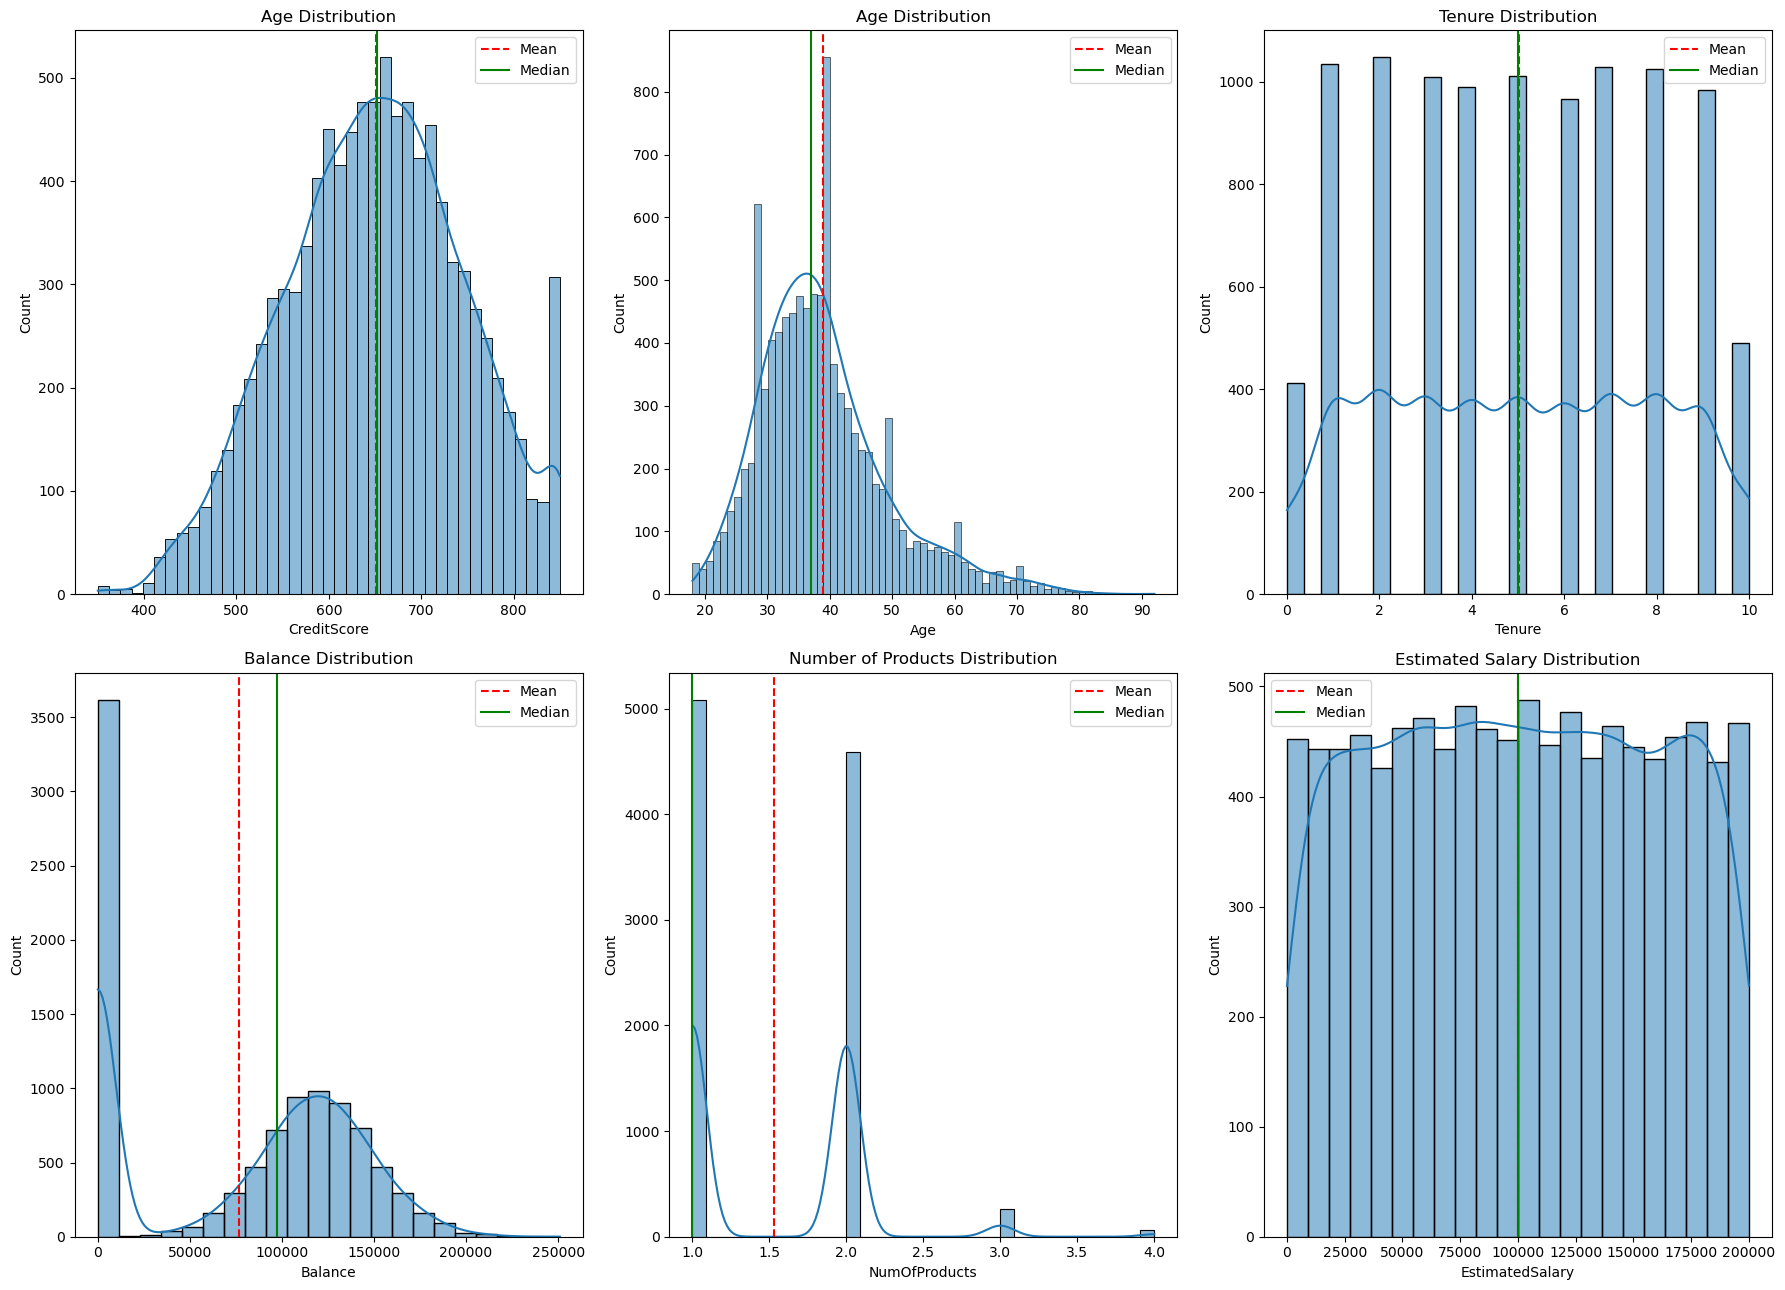

In [112]:
### Distribution of Bank Churn DF Numerical Features
plt.figure(figsize = (18, 13))

### Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(bank_churn_df['CreditScore'], kde = True)
plt.axvline(bank_churn_df['CreditScore'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(bank_churn_df['CreditScore'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Age Distribution')

### Age Distribution
plt.subplot(2, 3, 2)
sns.histplot(bank_churn_df['Age'], kde = True)
plt.axvline(bank_churn_df['Age'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(bank_churn_df['Age'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Age Distribution')

### Tenure Distribution
plt.subplot(2, 3, 3)
sns.histplot(bank_churn_df['Tenure'], kde = True)
plt.axvline(bank_churn_df['Tenure'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(bank_churn_df['Tenure'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Tenure Distribution')

### Balance Distribution
plt.subplot(2, 3, 4)
sns.histplot(bank_churn_df['Balance'], kde = True)
plt.axvline(bank_churn_df['Balance'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(bank_churn_df['Balance'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Balance Distribution')

### Number of Products Distribution
plt.subplot(2, 3, 5)
sns.histplot(bank_churn_df['NumOfProducts'], kde = True)
plt.axvline(bank_churn_df['NumOfProducts'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(bank_churn_df['NumOfProducts'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Number of Products Distribution')

### Estimated Salary Distribution
plt.subplot(2, 3, 6)
sns.histplot(bank_churn_df['EstimatedSalary'], kde = True)
plt.axvline(bank_churn_df['EstimatedSalary'].mean(), color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(bank_churn_df['EstimatedSalary'].median(), color = 'green', linestyle = '-', label = 'Median')
plt.legend()
plt.title('Estimated Salary Distribution')


plt.tight_layout()
plt.show()

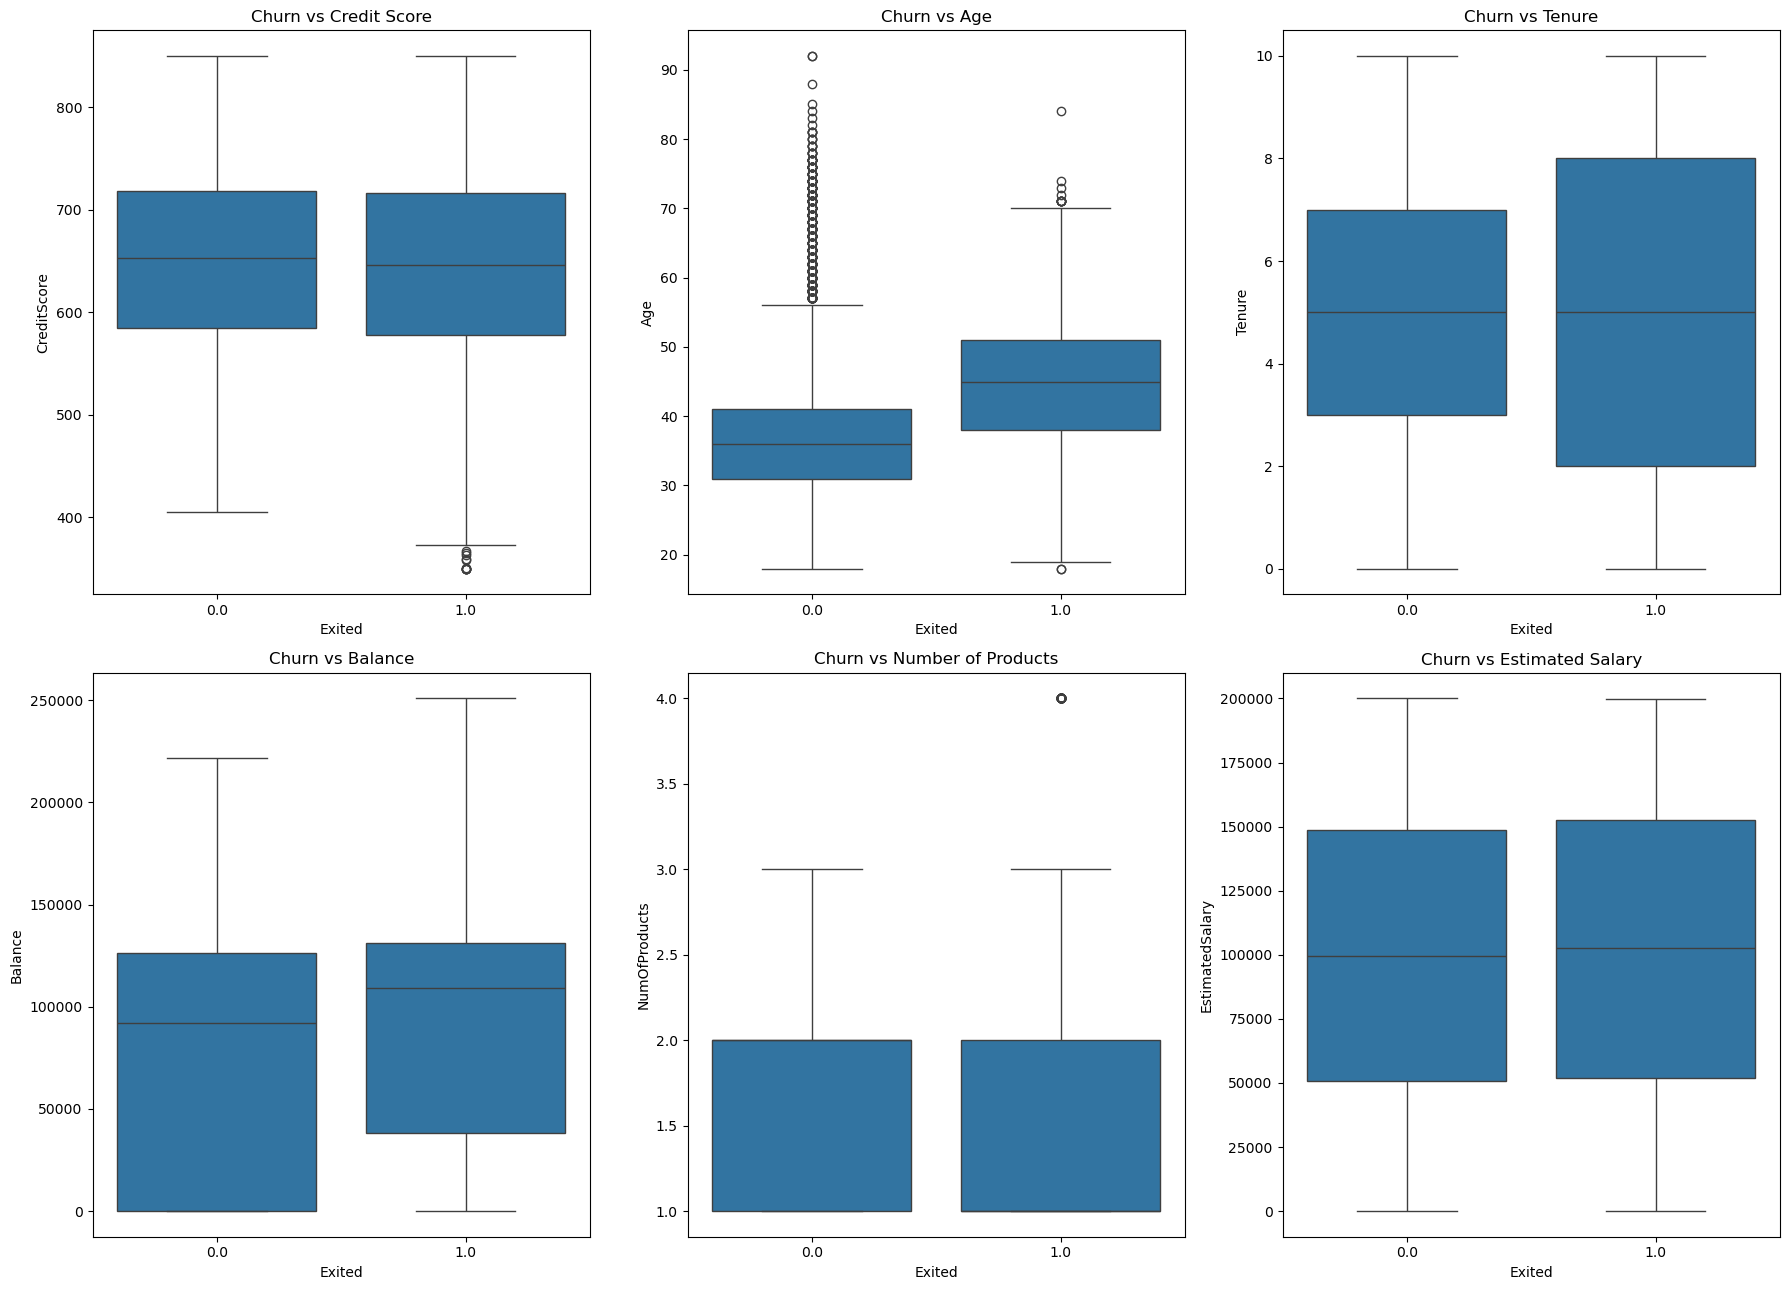

In [114]:
### Churn vs Bank Churn DF Numerical Features
plt.figure(figsize = (18, 13))

### Churn vs Credit Score
plt.subplot(2, 3, 1)
sns.boxplot(x = 'Exited', y = 'CreditScore', data = bank_churn_df)
plt.title('Churn vs Credit Score')

### Churn vs Age
plt.subplot(2, 3, 2)
sns.boxplot(x = 'Exited', y = 'Age', data = bank_churn_df)
plt.title('Churn vs Age')

### Churn vs Tenure
plt.subplot(2, 3, 3)
sns.boxplot(x = 'Exited', y = 'Tenure', data = bank_churn_df)
plt.title('Churn vs Tenure')

### Churn vs Balance
plt.subplot(2, 3, 4)
sns.boxplot(x = 'Exited', y = 'Balance', data = bank_churn_df)
plt.title('Churn vs Balance')

### Churn vs Number of Products
plt.subplot(2, 3, 5)
sns.boxplot(x = 'Exited', y = 'NumOfProducts', data = bank_churn_df)
plt.title('Churn vs Number of Products')

### Churn vs Estimated Salary
plt.subplot(2, 3, 6)
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = bank_churn_df)
plt.title('Churn vs Estimated Salary')


plt.tight_layout()
plt.show()

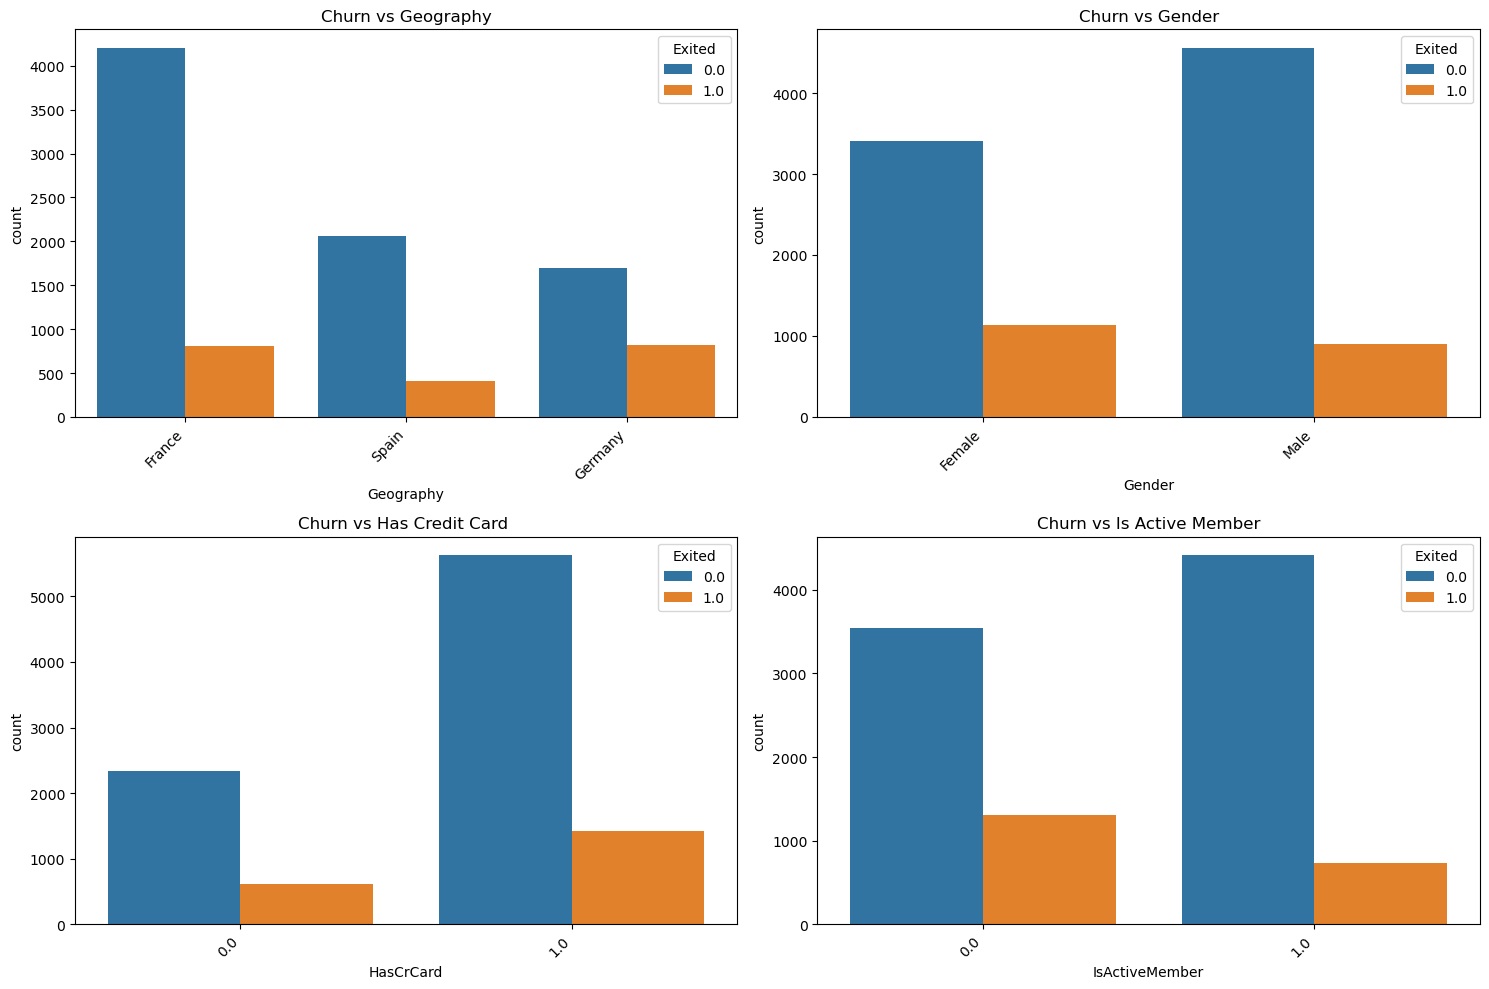

In [116]:
### Churn vs Bank Churn DF Categorical Features
plt.figure(figsize = (15, 10))

### Churn vs Geography
plt.subplot(2, 2, 1)
sns.countplot(x = 'Geography', hue = 'Exited', data = bank_churn_df)
plt.title('Churn vs Geography')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Gender
plt.subplot(2, 2, 2)
sns.countplot(x = 'Gender', hue = 'Exited', data = bank_churn_df)
plt.title('Churn vs Gender')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Has Credit Card
plt.subplot(2, 2, 3)
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = bank_churn_df)
plt.title('Churn vs Has Credit Card ')
plt.xticks(rotation = 45, ha = 'right')

### Churn vs Is Active Member
plt.subplot(2, 2, 4)
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = bank_churn_df)
plt.title('Churn vs Is Active Member')
plt.xticks(rotation = 45, ha = 'right')


plt.tight_layout()
plt.show()

In [120]:
### Rerun optimized models on the bank churn dataframe.
### Defining the input feature matrix (X) and the target variable vector (y).
bank_churn_X = bank_churn_df_encoded_excluding_churn.copy()
bank_churn_y = bank_churn_df_encoded['Exited']

### Creating a list of the continuous features that we will be scaling, we do not want to scale the binary indicator columns only the continuous numerical columns.
bank_churn_continuous_columns = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary'
]
#############################################################################################################################################################################################
### Defining Sampling/Scaling techniques and the classification models we are going to be comparing.
bank_churn_classification_models = {
    'logistic_regression': LogisticRegression(random_state = 22),
    'support_vector_classifier': SVC(probability = True, random_state = 22),
    'decision_tree_classifier': DecisionTreeClassifier(random_state = 22),
    'random_forest_classifier': RandomForestClassifier(random_state = 22),
    'gaussian_naive_bayes_classifier': GaussianNB(),
    'xgboost_classifier': XGBClassifier(random_state = 22)
}

bank_churn_scaling_techniques = {
    'no_scaling': None,
    'standard_scaler': StandardScaler(),
    'robust_scaler': RobustScaler(),
    'min_max_scaler': MinMaxScaler()
}

bank_churn_sampling_techniques = {
    'no_sampling': None,
    'random_undersampling': RandomUnderSampler(random_state = 22),
    'random_oversampling': RandomOverSampler(random_state = 22),
    'smote': SMOTE(random_state = 22)
}
#############################################################################################################################################################################################
### Optimized model configurations from gridsearch_results_list
bank_churn_optimized_models = {
    entry['classification_model']: {
        'scaling_technique': entry['scaling_technique'],
        'sampling_technique': entry['sampling_technique'],
        'best_hyperparameters': entry['best_hyperparameters']
    }
    for entry in gridsearch_results_list
}

#############################################################################################################################################################################################
### Setting up KFold crossvalidation with 5 splits. 
bank_churn_cross_validation_split = KFold(n_splits = 5, shuffle = True, random_state = 22)

### Creating containers to store average model metrics information and ROC curve information (false positive rate and true positive rate arrays).
bank_churn_average_model_metrics = []
bank_churn_roc_data = {}

### Looping through each combination of model, scaling technique, and sampling technique.
for bank_churn_classification_model_name, bank_churn_classification_model_config in bank_churn_optimized_models.items():
    ### Getting classification model and set optimized hyperparameters
    bank_churn_classification_model = bank_churn_classification_models[bank_churn_classification_model_name]
    bank_churn_classification_model.set_params(**bank_churn_classification_model_config['best_hyperparameters'])
    
    ### Get scaling and sampling techniques
    bank_churn_scaling_technique = bank_churn_scaling_techniques[bank_churn_classification_model_config['scaling_technique']]
    bank_churn_sampling_technique = bank_churn_sampling_techniques[bank_churn_classification_model_config['sampling_technique']]

    ### Creating containers to store model metric information for each cross validation fold.
    bank_churn_accuracy_scores_per_fold = []
    bank_churn_precision_scores_per_fold = []
    bank_churn_recall_scores_per_fold = []
    bank_churn_f1_scores_per_fold = []
    bank_churn_log_loss_values_per_fold = []
    bank_churn_roc_auc_scores_per_fold = []

    ### Creating containers to store true labels and predicted probabilities across all folds for ROC curve calculations.
    bank_churn_all_true_labels = []
    bank_churn_all_probabilities = []

    ### Setting up cross validation dataset splits
    for bank_churn_train_indexes, bank_churn_test_indexes in bank_churn_cross_validation_split.split(bank_churn_X, bank_churn_y):
        bank_churn_X_train = bank_churn_X.iloc[bank_churn_train_indexes].copy()
        bank_churn_X_test  = bank_churn_X.iloc[bank_churn_test_indexes].copy()
        bank_churn_y_train = bank_churn_y.iloc[bank_churn_train_indexes].copy()
        bank_churn_y_test  = bank_churn_y.iloc[bank_churn_test_indexes].copy()

        ### Applying the scaling techniques to only the continuous features defined above.
        if bank_churn_scaling_technique is not None:
            bank_churn_X_train.loc[:, bank_churn_continuous_columns] = bank_churn_scaling_technique.fit_transform(bank_churn_X_train[bank_churn_continuous_columns])
            bank_churn_X_test.loc[:, bank_churn_continuous_columns] = bank_churn_scaling_technique.transform(bank_churn_X_test[bank_churn_continuous_columns])

        ### Applying the sampling techniques.
        if bank_churn_sampling_technique is not None:
            bank_churn_X_train, bank_churn_y_train = bank_churn_sampling_technique.fit_resample(bank_churn_X_train, bank_churn_y_train)

        ### Training the classification model.
        bank_churn_classification_model.fit(bank_churn_X_train, bank_churn_y_train)

        ### Generating predictions and probabilities of churn on the testing dataset.
        bank_churn_y_predicted_labels = bank_churn_classification_model.predict(bank_churn_X_test)
        bank_churn_y_predicted_probabilities = bank_churn_classification_model.predict_proba(bank_churn_X_test)[:, 1]

        ### Calculating performance metrics for each cross validation fold.
        bank_churn_accuracy_scores_per_fold.append(accuracy_score(bank_churn_y_test, bank_churn_y_predicted_labels))
        bank_churn_precision_scores_per_fold.append(precision_score(bank_churn_y_test, bank_churn_y_predicted_labels))
        bank_churn_recall_scores_per_fold.append(recall_score(bank_churn_y_test, bank_churn_y_predicted_labels))
        bank_churn_f1_scores_per_fold.append(f1_score(bank_churn_y_test, bank_churn_y_predicted_labels))
        bank_churn_log_loss_values_per_fold.append(log_loss(bank_churn_y_test, bank_churn_y_predicted_probabilities))
        bank_churn_roc_auc_scores_per_fold.append(roc_auc_score(bank_churn_y_test, bank_churn_y_predicted_probabilities))

        ### Collecting data for ROC curve
        bank_churn_all_true_labels.extend(bank_churn_y_test.tolist())
        bank_churn_all_probabilities.extend(bank_churn_y_predicted_probabilities.tolist())

    ### Computing a single ROC curve for each combination across all folds.
    bank_churn_false_positive_rates, bank_churn_true_positive_rates, _ = roc_curve(bank_churn_all_true_labels, bank_churn_all_probabilities)

    ### Storing averaged metrics across all folds for each combination.
    bank_churn_average_model_metrics.append({
        'classification_model': bank_churn_classification_model_name,
        'scaling_technique': bank_churn_classification_model_config['scaling_technique'],
        'sampling_technique': bank_churn_classification_model_config['sampling_technique'],
        'accuracy': np.mean(bank_churn_accuracy_scores_per_fold),
        'precision': np.mean(bank_churn_precision_scores_per_fold),
        'recall': np.mean(bank_churn_recall_scores_per_fold),
        'f1_score': np.mean(bank_churn_f1_scores_per_fold),
        'log_loss': np.mean(bank_churn_log_loss_values_per_fold),
        'roc_auc': np.mean(bank_churn_roc_auc_scores_per_fold)
    })

    ### Storing ROC curve information for plotting
    bank_churn_roc_data[(bank_churn_classification_model_name, bank_churn_classification_model_config['scaling_technique'], bank_churn_classification_model_config['sampling_technique'])] = (bank_churn_false_positive_rates, bank_churn_true_positive_rates)

### Converting to DataFrame
bank_churn_results_df = pd.DataFrame(bank_churn_average_model_metrics)
print("Performance on a Bank Churn DF:")
display(bank_churn_results_df.sort_values(by = 'f1_score', ascending = False))

Performance on a Bank Churn DF:


classification_model scaling_technique    sampling_technique  \
0               xgboost_classifier        no_scaling   random_oversampling   
1         random_forest_classifier   standard_scaler  random_undersampling   
5         decision_tree_classifier   standard_scaler  random_undersampling   
4  gaussian_naive_bayes_classifier   standard_scaler                 smote   
3              logistic_regression   standard_scaler   random_oversampling   
2        support_vector_classifier   standard_scaler   random_oversampling   

   accuracy  precision    recall  f1_score  log_loss   roc_auc  
0    0.8384   0.607759  0.584399  0.595701  0.422642  0.836589  
1    0.7810   0.476573  0.756371  0.584504  0.474847  0.856955  
5    0.7449   0.430041  0.761398  0.548784  0.618796  0.830766  
4    0.7361   0.408822  0.661405  0.505227  0.549287  0.781643  
3    0.7117   0.383714  0.687141  0.492409  0.577906  0.768511  
2    0.7991   0.509257  0.361364  0.422674  0.698014  0.764247

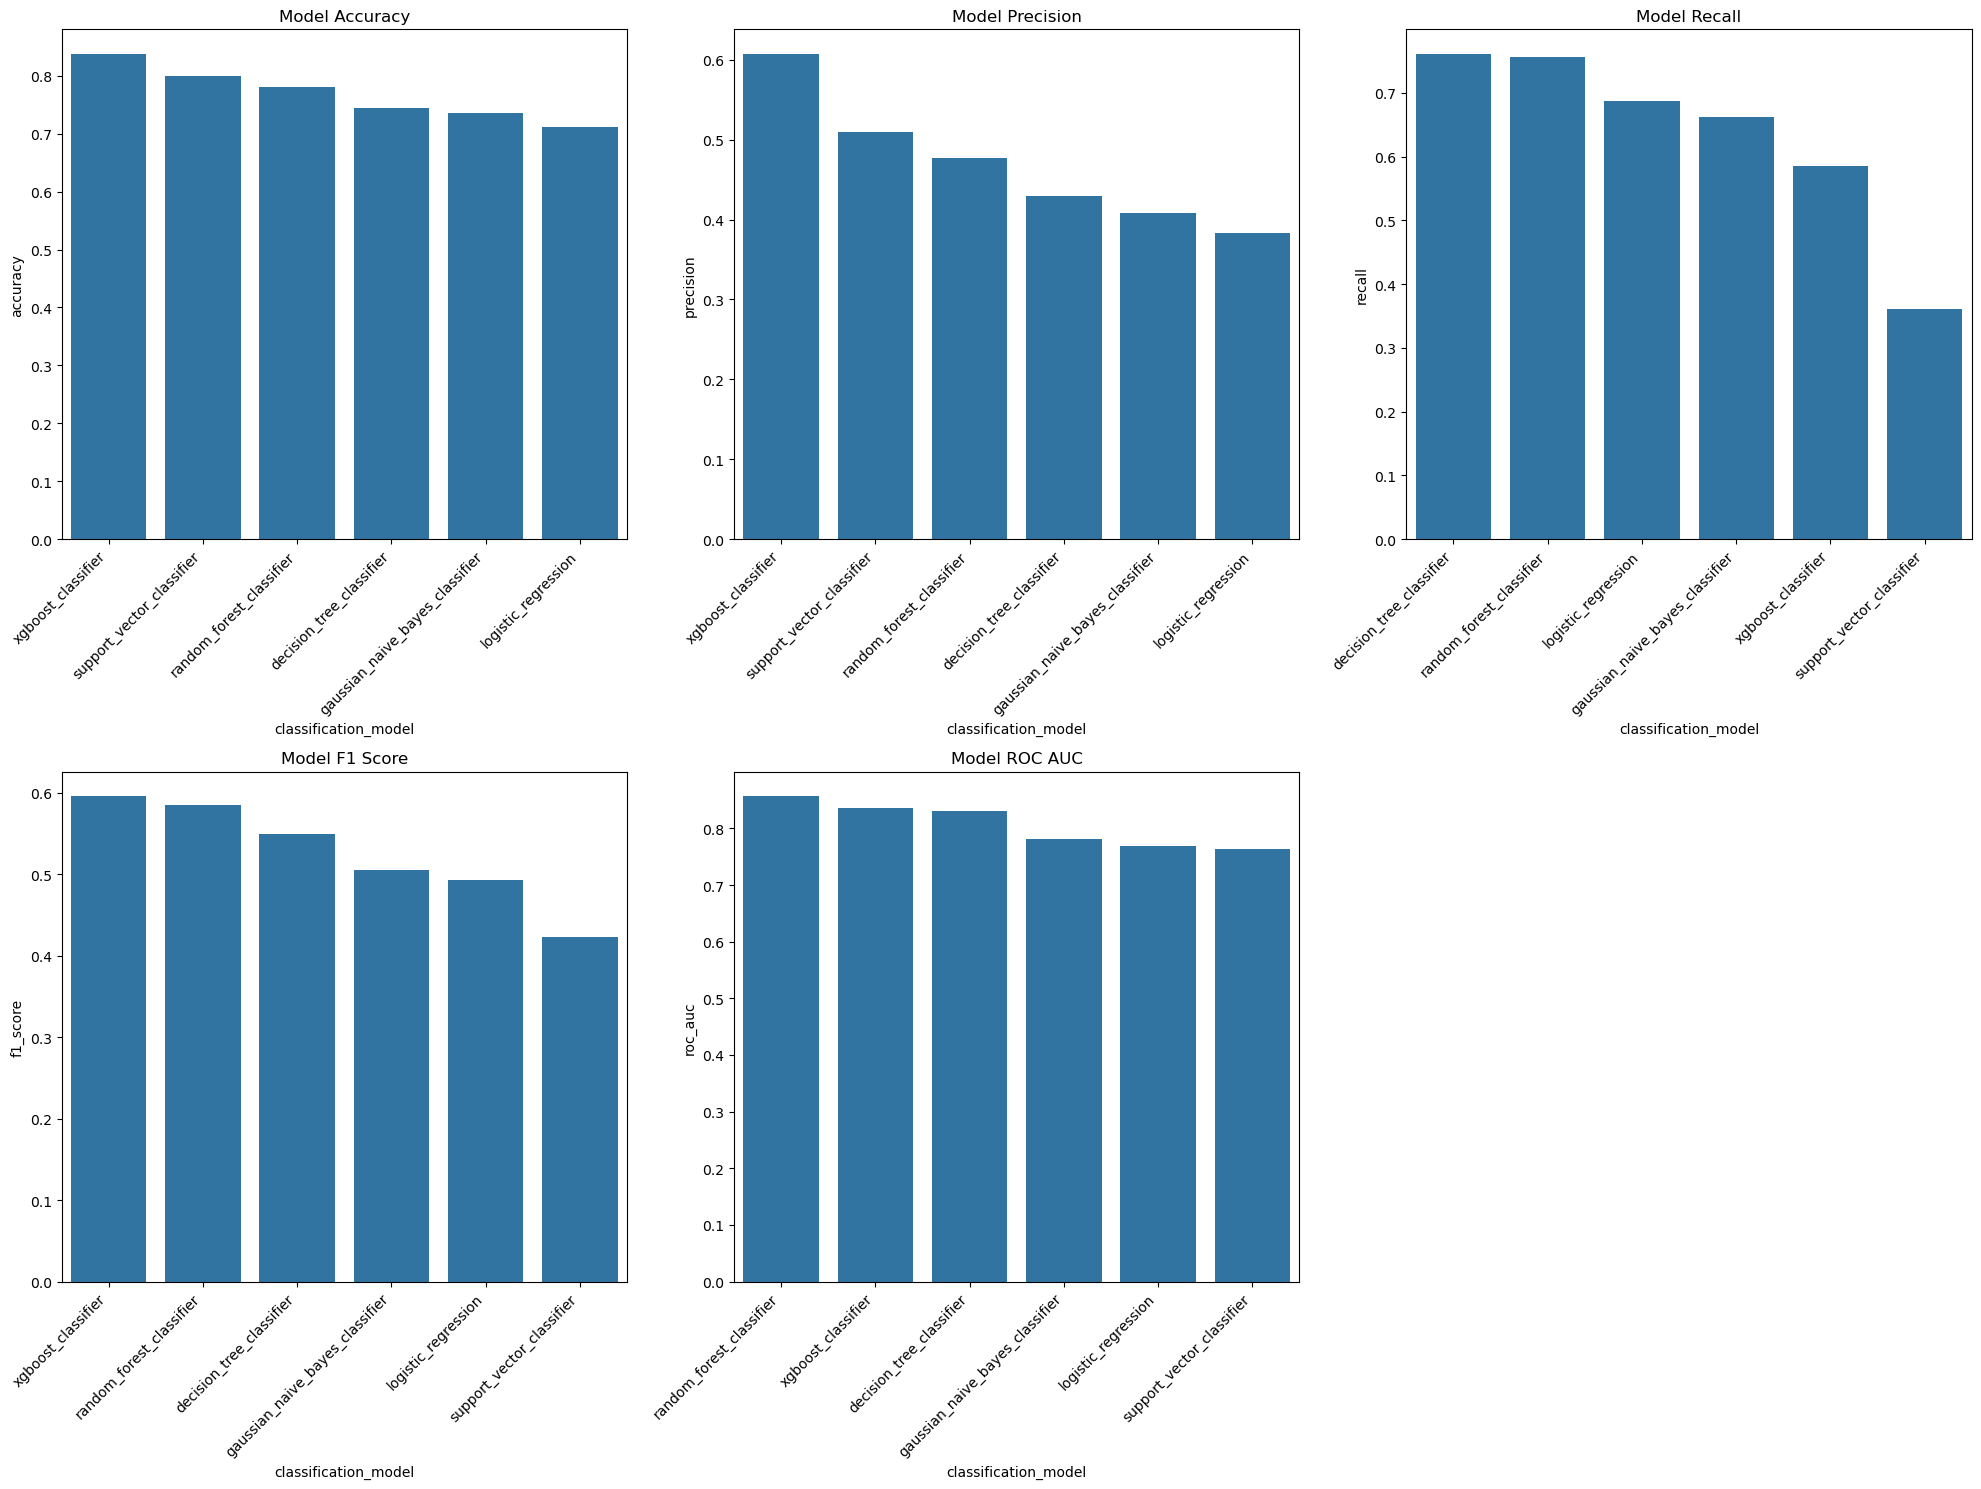

In [125]:
### Plotting the performance metrics of the optimized models on the bank churn dataframe.
plt.figure(figsize = (20, 15))

### Plotting Accuracy Performance
plt.subplot(2, 3, 1)
sns.barplot(x = 'classification_model', y = 'accuracy', data = bank_churn_results_df.sort_values(by = 'accuracy', ascending = False))
plt.title('Model Accuracy')
plt.xticks(rotation = 45, ha = 'right')

### Plotting Precision Performance
plt.subplot(2, 3, 2)
sns.barplot(x = 'classification_model', y = 'precision', data = bank_churn_results_df.sort_values(by = 'precision', ascending = False))
plt.title('Model Precision')
plt.xticks(rotation = 45, ha = 'right')

### Plotting Recall Performance
plt.subplot(2, 3, 3)
sns.barplot(x = 'classification_model', y = 'recall', data = bank_churn_results_df.sort_values(by = 'recall', ascending = False))
plt.title('Model Recall')
plt.xticks(rotation = 45, ha = 'right')

### Plotting F1 Score Performance
plt.subplot(2, 3, 4)
sns.barplot(x = 'classification_model', y = 'f1_score', data = bank_churn_results_df.sort_values(by = 'f1_score', ascending = False))
plt.title('Model F1 Score')
plt.xticks(rotation = 45, ha = 'right')

### Plotting ROC AUC Performance
plt.subplot(2, 3, 5)
sns.barplot(x = 'classification_model', y = 'roc_auc', data = bank_churn_results_df.sort_values(by = 'roc_auc', ascending = False))
plt.title('Model ROC AUC')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

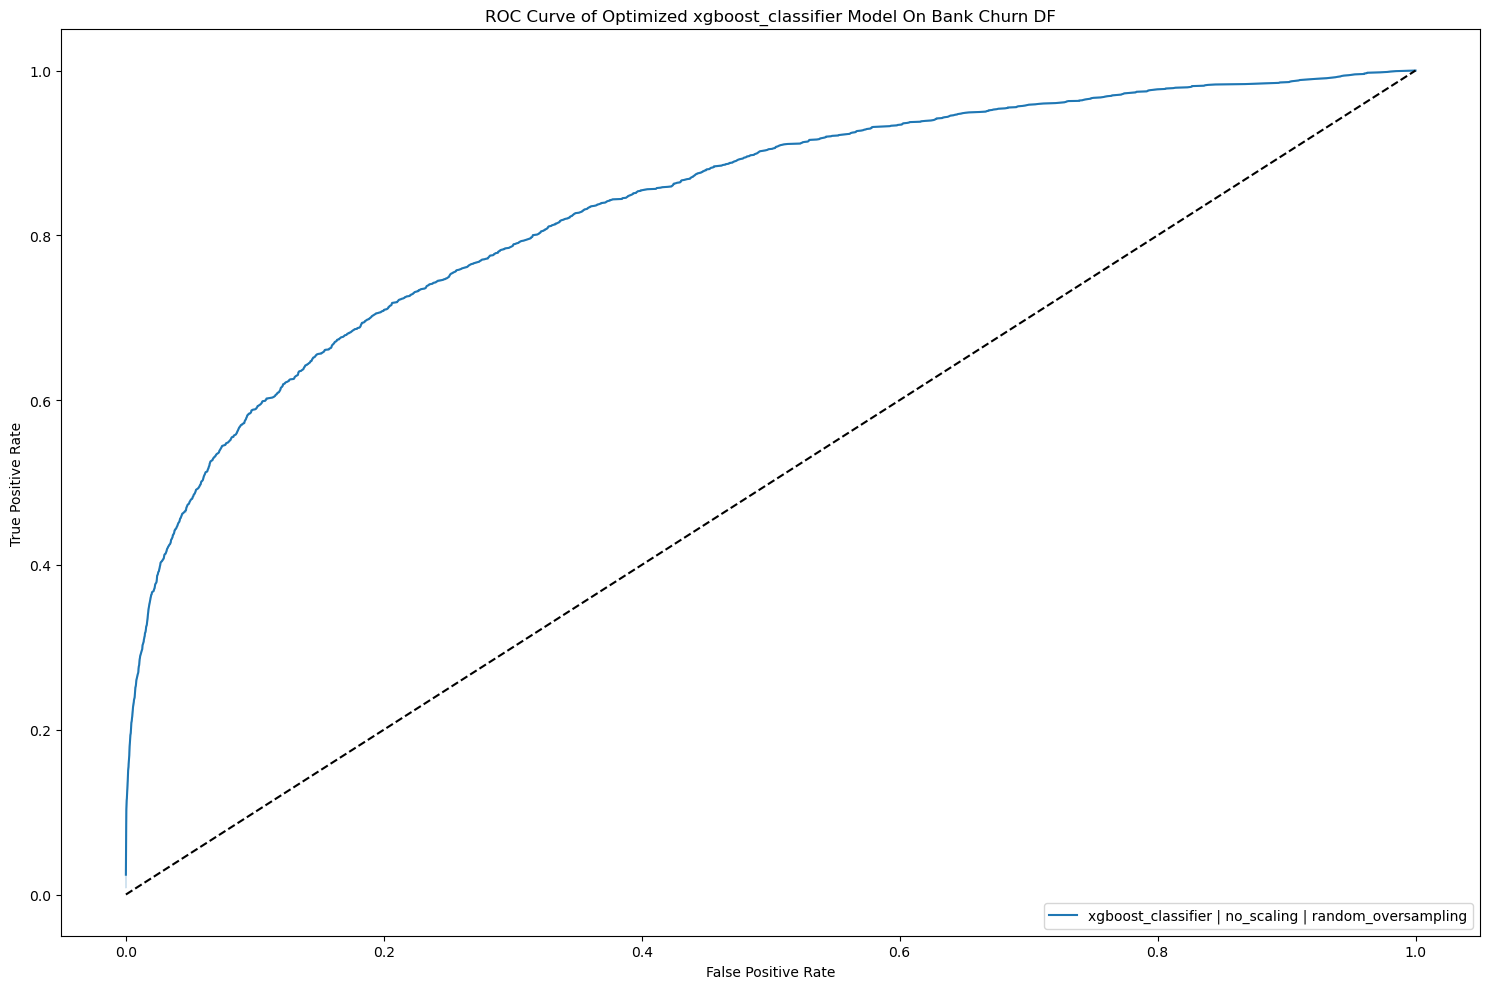

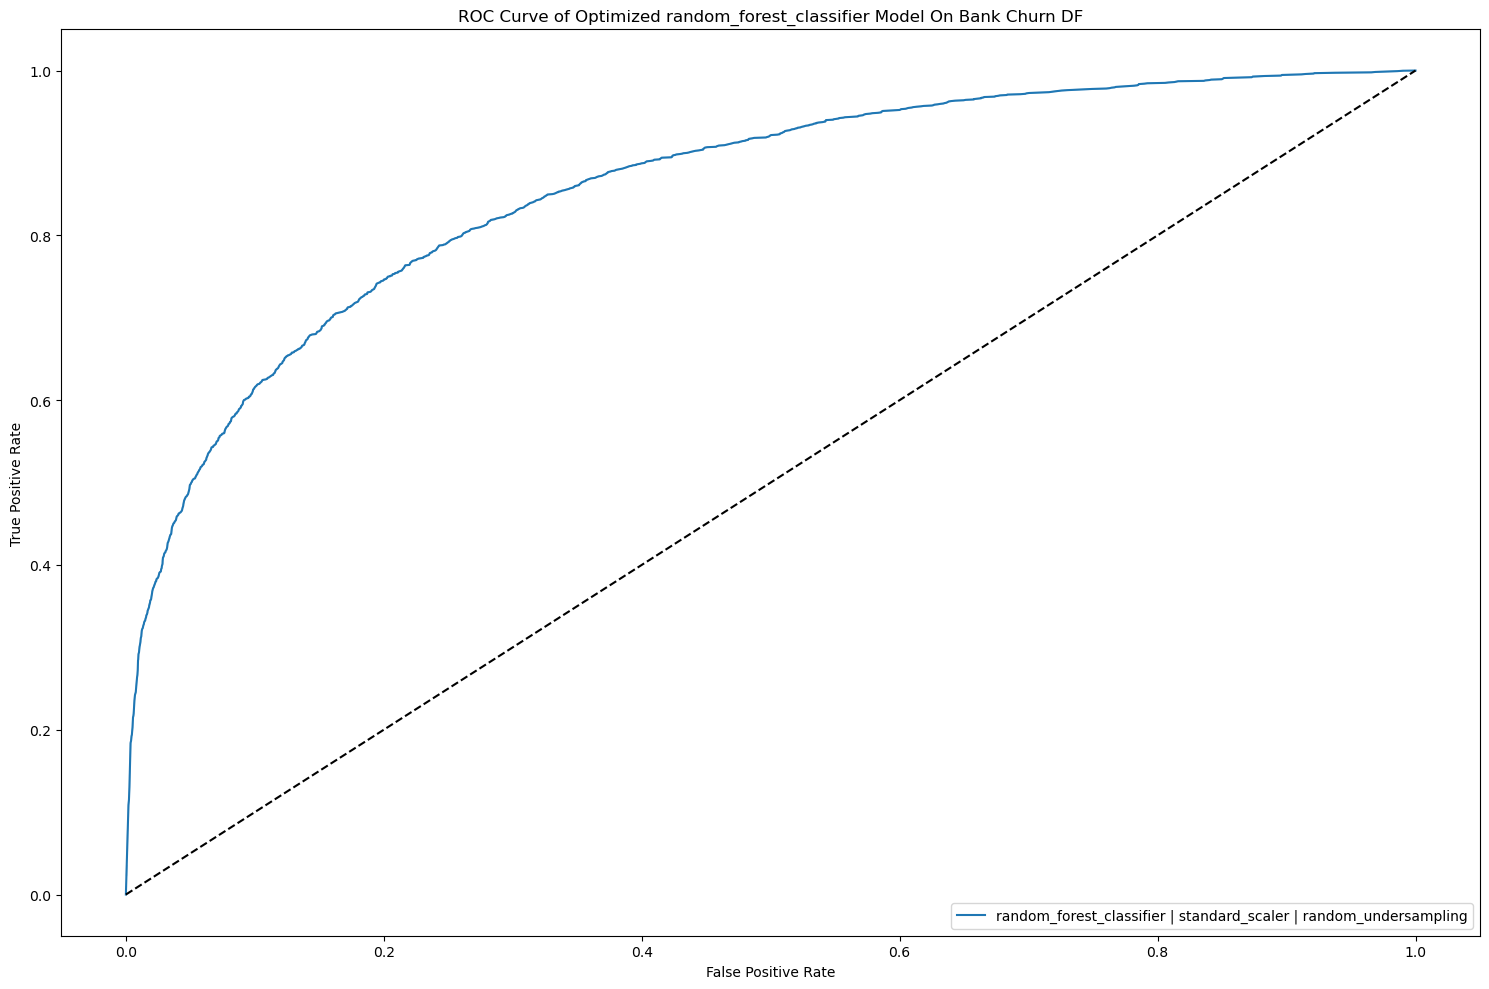

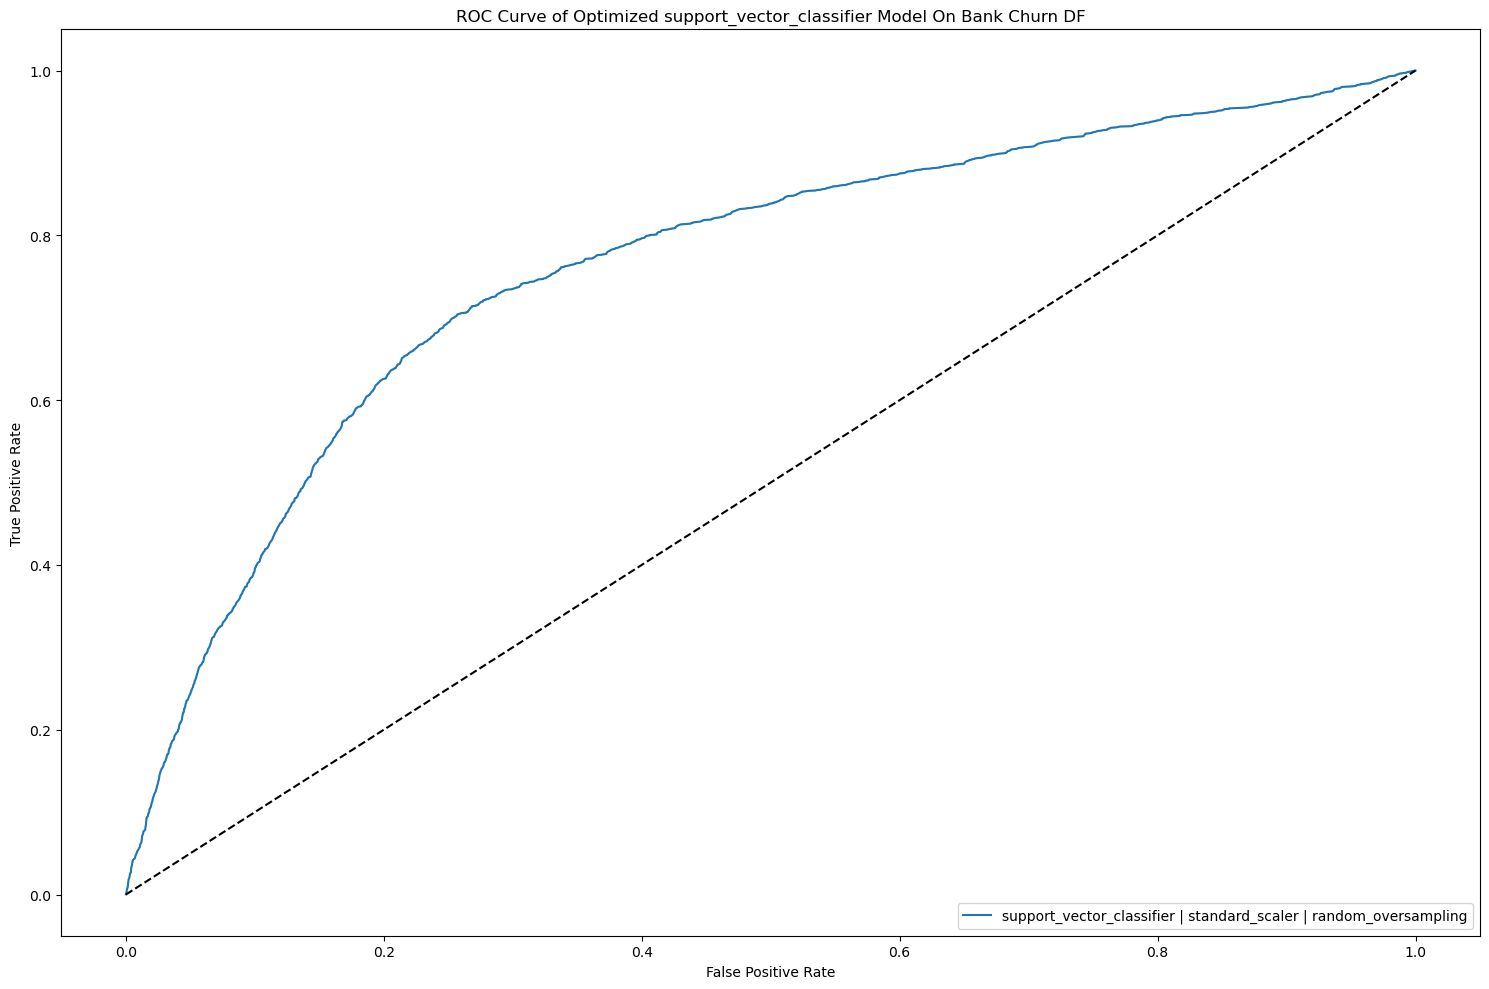

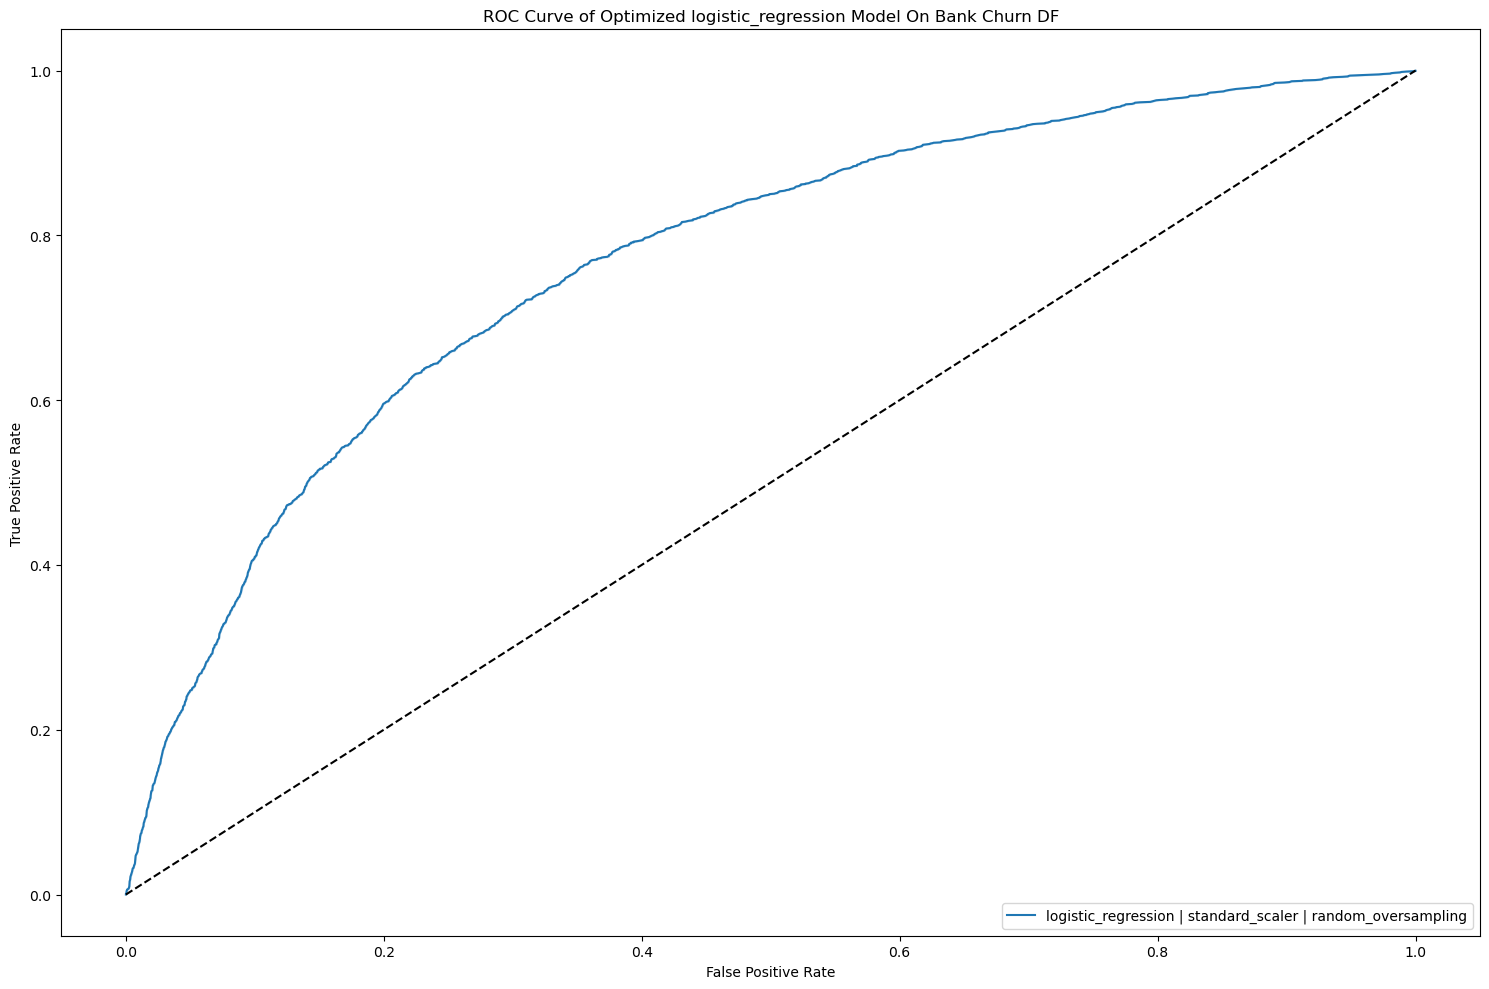

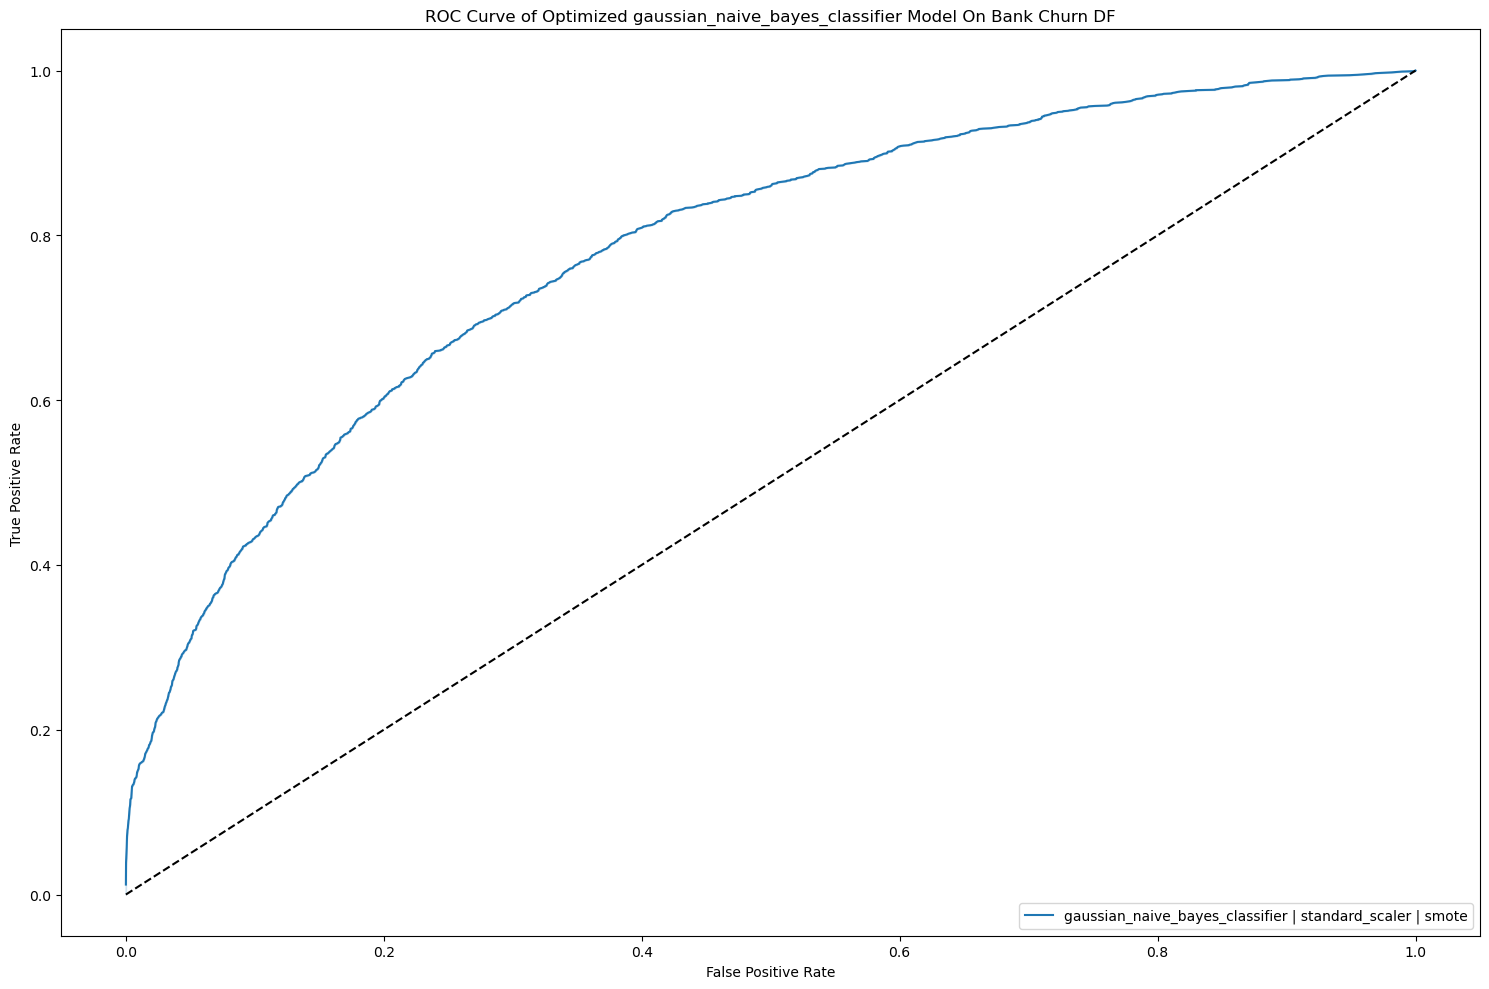

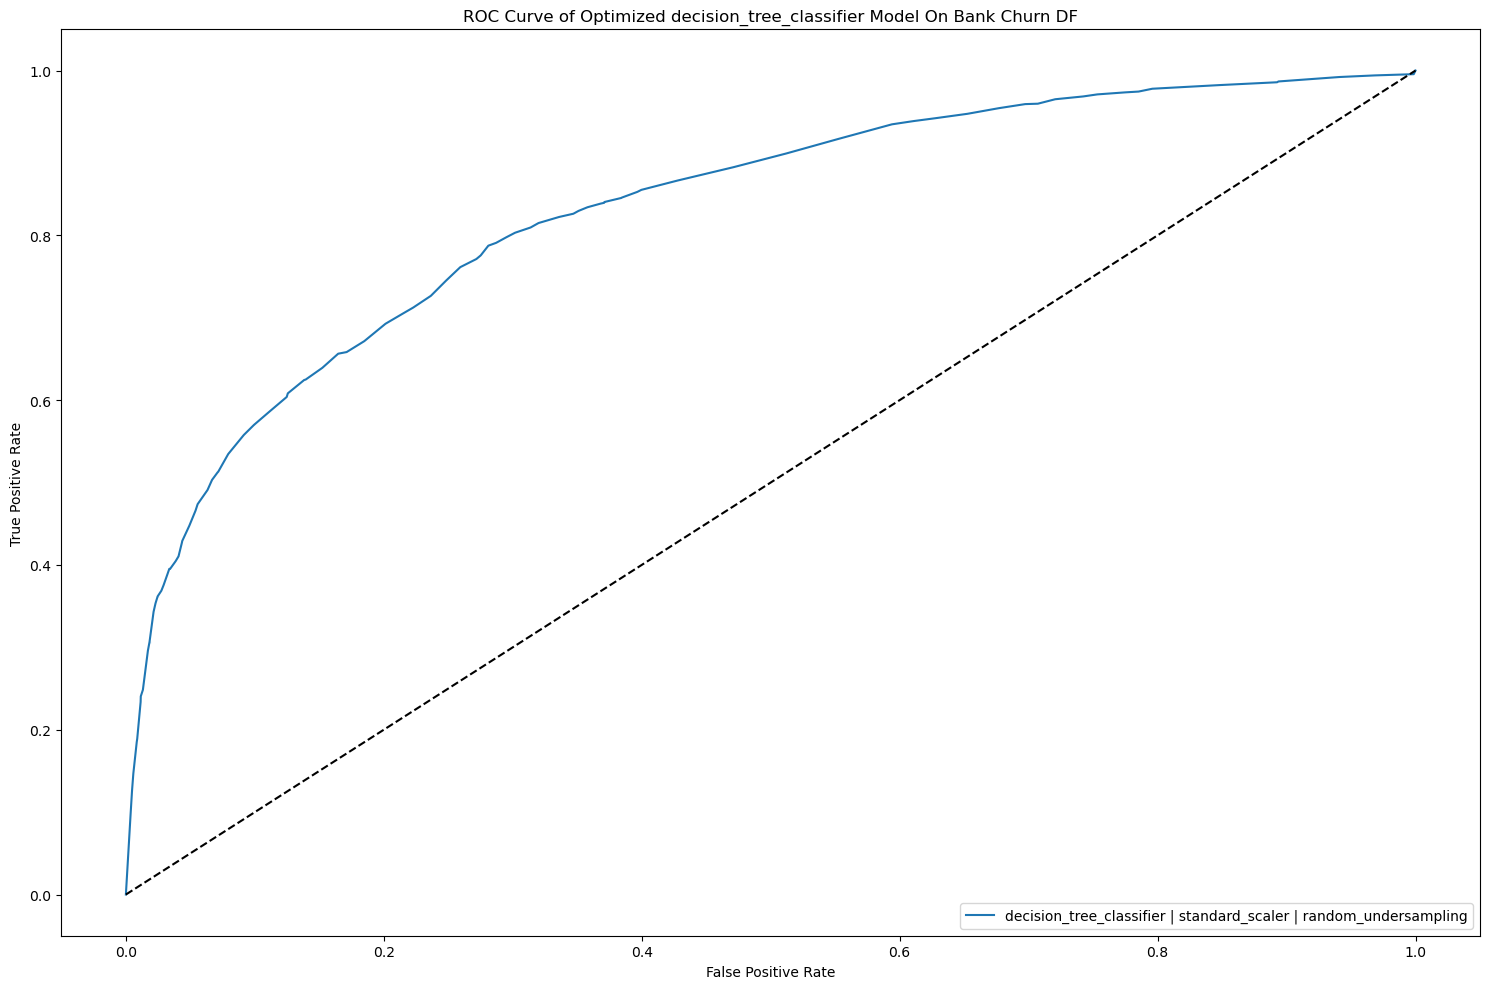

In [128]:
### Looping through each optimized model and creating a ROC curve using the bank churn dataframe.
for index, row in bank_churn_results_df.iterrows():
    bank_churn_model_name = row['classification_model']
    bank_churn_scaler_name = row['scaling_technique']
    bank_churn_sampler_name = row['sampling_technique']

    bank_churn_combination_key = (bank_churn_model_name, bank_churn_scaler_name, bank_churn_sampler_name)
    
    if bank_churn_combination_key in bank_churn_roc_data:
        bank_churn_false_positive_rate, bank_churn_true_positive_rate = bank_churn_roc_data[bank_churn_combination_key]

        bank_churn_combination_label = f"{bank_churn_model_name} | {bank_churn_scaler_name} | {bank_churn_sampler_name}"

        plt.figure(figsize = (15, 10))
        sns.lineplot(x = bank_churn_false_positive_rate, y = bank_churn_true_positive_rate, label = bank_churn_combination_label)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f"ROC Curve of Optimized {bank_churn_model_name} Model On Bank Churn DF")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc = "lower right")
    
        plt.tight_layout()
        plt.show()

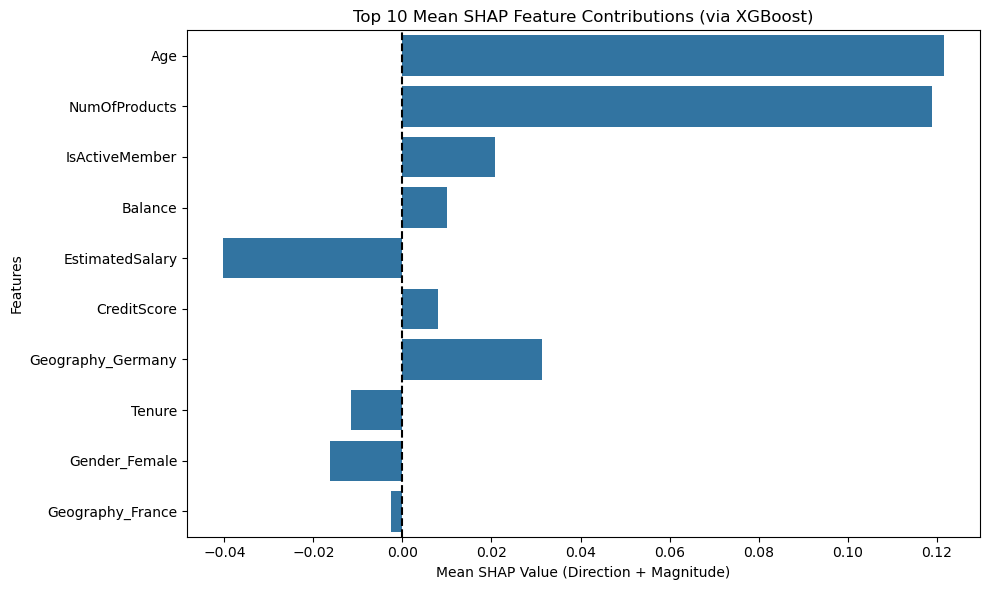



bank_churn_shap_df:


Feature  Mean_SHAP_value  Mean_ABS_SHAP_value
1                 Age         0.121641             1.509703
4       NumOfProducts         0.118869             1.265618
6      IsActiveMember         0.020889             0.770891
3             Balance         0.009897             0.629049
7     EstimatedSalary        -0.040298             0.543720
0         CreditScore         0.007980             0.538873
9   Geography_Germany         0.031302             0.305719
2              Tenure        -0.011614             0.297383
11      Gender_Female        -0.016330             0.293192
8    Geography_France        -0.002522             0.145191
5           HasCrCard         0.000704             0.097508
12        Gender_Male        -0.003767             0.095222
10    Geography_Spain         0.003395             0.083521

In [130]:
### SHAP Feature Importances
### Extract the optimal XGBoost configuration from gridsearch_results_list
bank_churn_xgb_config = next(cfg for cfg in gridsearch_results_list if cfg['classification_model'] == 'xgboost_classifier')

### Initializing the XGBoost model with the optimized hyperparameters.
bank_churn_xgb_model = XGBClassifier(random_state = 22)
bank_churn_xgb_model.set_params(**bank_churn_xgb_config['best_hyperparameters'])

### Defining the input feature matrix (X) and the target variable vector (y).
bank_churn_X_SHAP = bank_churn_X.copy()
bank_churn_y_SHAP = bank_churn_y.copy()

### Applying the optimal scaling techniques.
if bank_churn_scaling_technique is not None:
    bank_churn_X_SHAP[bank_churn_continuous_columns] = bank_churn_scaling_technique.fit_transform(bank_churn_X_SHAP[bank_churn_continuous_columns])
### Applying the optimal sampling techniques.
if bank_churn_sampling_technique is not None:
    bank_churn_X_SHAP, bank_churn_y_SHAP = bank_churn_sampling_technique.fit_resample(bank_churn_X_SHAP, bank_churn_y_SHAP)

### Fitting the model.
bank_churn_xgb_model.fit(bank_churn_X_SHAP, bank_churn_y_SHAP)

### SHAP analysis
bank_churn_explainer = shap.TreeExplainer(bank_churn_xgb_model)
bank_churn_shap_values = bank_churn_explainer.shap_values(bank_churn_X_SHAP)

### Creating a feature importance dataframe.
bank_churn_shap_df = pd.DataFrame({
    'Feature': bank_churn_X_SHAP.columns,
    'Mean_SHAP_value': bank_churn_shap_values.mean(axis = 0),
    'Mean_ABS_SHAP_value': np.abs(bank_churn_shap_values).mean(axis = 0)
}).sort_values('Mean_ABS_SHAP_value', ascending = False)

### Plotting the top 10 Mean SHAP Feature Contributions sorted by mean absolute shap values
plt.figure(figsize = (10, 6))
sns.barplot(data = bank_churn_shap_df.head(10), x = 'Mean_SHAP_value', y = 'Feature')
plt.title('Top 10 Mean SHAP Feature Contributions (via XGBoost)')
plt.xlabel('Mean SHAP Value (Direction + Magnitude)')
plt.ylabel('Features')
plt.axvline(0, color = 'black', linestyle = '--')
plt.tight_layout()
plt.show()
print('\n')

### Displaying the feature importance dataframe.
print('bank_churn_shap_df:')
display(bank_churn_shap_df)
print('\n')


In [188]:
### Comparing model performance across mulitple datasets.
### Sorting all results dataframes by classification_model to ensure consistent row order
gridsearch_results_dataframe = gridsearch_results_dataframe.sort_values('classification_model')
telco_churn_engineered_features_results_df = telco_churn_engineered_features_results_df.sort_values('classification_model')
diff_telco_results_df = diff_telco_results_df.sort_values('classification_model')
bank_churn_results_df = bank_churn_results_df.sort_values('classification_model')

### Creating comparison DataFrames for each performance metric
accuracy_score_df = pd.DataFrame({
    'Original': gridsearch_results_dataframe['accuracy'].values,
    'Telco_Engineered': telco_churn_engineered_features_results_df['accuracy'].values,    
    'Telco_Diff': diff_telco_results_df['accuracy'].values,
    'Bank_Churn': bank_churn_results_df['accuracy'].values
}, index = gridsearch_results_dataframe['classification_model'])
accuracy_score_df = accuracy_score_df.sort_values(by = 'Original', ascending = False)
accuracy_score_df.index.name = 'classification_model'

precision_score_df = pd.DataFrame({
    'Original': gridsearch_results_dataframe['precision'].values,
    'Telco_Engineered': telco_churn_engineered_features_results_df['precision'].values,    
    'Telco_Diff': diff_telco_results_df['precision'].values,
    'Bank_Churn': bank_churn_results_df['precision'].values
}, index = gridsearch_results_dataframe['classification_model'])
precision_score_df = precision_score_df.sort_values(by = 'Original', ascending = False)
precision_score_df.index.name = 'classification_model'

recall_score_df = pd.DataFrame({
    'Original': gridsearch_results_dataframe['recall'].values,
    'Telco_Engineered': telco_churn_engineered_features_results_df['recall'].values,    
    'Telco_Diff': diff_telco_results_df['recall'].values,
    'Bank_Churn': bank_churn_results_df['recall'].values
}, index = gridsearch_results_dataframe['classification_model'])
recall_score_df = recall_score_df.sort_values(by = 'Original', ascending = False)
recall_score_df.index.name = 'classification_model'

f1_score_df = pd.DataFrame({
    'Original': gridsearch_results_dataframe['f1_score'].values,
    'Telco_Engineered': telco_churn_engineered_features_results_df['f1_score'].values,    
    'Telco_Diff': diff_telco_results_df['f1_score'].values,
    'Bank_Churn': bank_churn_results_df['f1_score'].values
}, index = gridsearch_results_dataframe['classification_model'])
f1_score_df = f1_score_df.sort_values(by = 'Original', ascending = False)
f1_score_df.index.name = 'classification_model'

roc_auc_score_df = pd.DataFrame({
    'Original': gridsearch_results_dataframe['roc_auc'].values,
    'Telco_Engineered': telco_churn_engineered_features_results_df['roc_auc'].values,
    'Telco_Diff': diff_telco_results_df['roc_auc'].values,
    'Bank_Churn': bank_churn_results_df['roc_auc'].values
}, index = gridsearch_results_dataframe['classification_model'])
roc_auc_score_df = roc_auc_score_df.sort_values(by = 'Original', ascending = False)
roc_auc_score_df.index.name = 'classification_model'



In [190]:
### Displaying all perfomance results dataframes for comparison across multiple datasets
print("accuracy_score_df:")
display(accuracy_score_df)
print("\n")

print("precision_score_df:")
display(precision_score_df)
print("\n")

print("recall_score_df:")
display(recall_score_df)
print("\n")

print("f1_score_df:")
display(f1_score_df)
print("\n")

print("roc_auc_score_df:")
display(roc_auc_score_df)
print("\n")

accuracy_score_df:


Original  Telco_Engineered  Telco_Diff  \
classification_model                                                      
support_vector_classifier        0.933082          0.733077    0.942228   
xgboost_classifier               0.914294          0.817972    0.999922   
logistic_regression              0.799632          0.777588    0.825504   
random_forest_classifier         0.796956          0.777302    0.998742   
gaussian_naive_bayes_classifier  0.787236          0.778297    0.835151   
decision_tree_classifier         0.776082          0.747298    0.956613   

                                 Bank_Churn  
classification_model                         
support_vector_classifier            0.7991  
xgboost_classifier                   0.8384  
logistic_regression                  0.7117  
random_forest_classifier             0.7810  
gaussian_naive_bayes_classifier      0.7361  
decision_tree_classifier             0.7449



precision_score_df:


Original  Telco_Engineered  Telco_Diff  \
classification_model                                                      
support_vector_classifier        0.960004          0.459865    0.934457   
xgboost_classifier               0.874552          0.655546    0.999869   
logistic_regression              0.781263          0.555098    0.800325   
gaussian_naive_bayes_classifier  0.775824          0.571152    0.800956   
random_forest_classifier         0.767085          0.552262    0.998261   
decision_tree_classifier         0.744953          0.516246    0.930023   

                                 Bank_Churn  
classification_model                         
support_vector_classifier          0.509257  
xgboost_classifier                 0.607759  
logistic_regression                0.383714  
gaussian_naive_bayes_classifier    0.408822  
random_forest_classifier           0.476573  
decision_tree_classifier           0.430041



recall_score_df:


Original  Telco_Engineered  Telco_Diff  \
classification_model                                                      
xgboost_classifier               0.967230          0.667395    0.999968   
support_vector_classifier        0.903858          0.019299    0.944284   
random_forest_classifier         0.854196          0.860853    0.999082   
decision_tree_classifier         0.842526          0.846182    0.982346   
logistic_regression              0.832183          0.821599    0.841580   
gaussian_naive_bayes_classifier  0.808266          0.687393    0.867575   

                                 Bank_Churn  
classification_model                         
xgboost_classifier                 0.584399  
support_vector_classifier          0.361364  
random_forest_classifier           0.756371  
decision_tree_classifier           0.761398  
logistic_regression                0.687141  
gaussian_naive_bayes_classifier    0.661405



f1_score_df:


Original  Telco_Engineered  Telco_Diff  \
classification_model                                                      
support_vector_classifier        0.931057          0.036977    0.939341   
xgboost_classifier               0.918555          0.661047    0.999918   
random_forest_classifier         0.807968          0.672624    0.998671   
logistic_regression              0.805904          0.662332    0.820427   
gaussian_naive_bayes_classifier  0.791667          0.622214    0.832931   
decision_tree_classifier         0.789896          0.640395    0.955465   

                                 Bank_Churn  
classification_model                         
support_vector_classifier          0.422674  
xgboost_classifier                 0.595701  
random_forest_classifier           0.584504  
logistic_regression                0.492409  
gaussian_naive_bayes_classifier    0.505227  
decision_tree_classifier           0.548784



roc_auc_score_df:


Original  Telco_Engineered  Telco_Diff  \
classification_model                                                      
xgboost_classifier               0.971051          0.882279    0.999992   
support_vector_classifier        0.967525          0.764371    0.987544   
logistic_regression              0.887956          0.881479    0.904097   
random_forest_classifier         0.878474          0.884096    0.999978   
gaussian_naive_bayes_classifier  0.869700          0.838566    0.908518   
decision_tree_classifier         0.848311          0.839351    0.994410   

                                 Bank_Churn  
classification_model                         
xgboost_classifier                 0.836589  
support_vector_classifier          0.764247  
logistic_regression                0.768511  
random_forest_classifier           0.856955  
gaussian_naive_bayes_classifier    0.781643  
decision_tree_classifier           0.830766

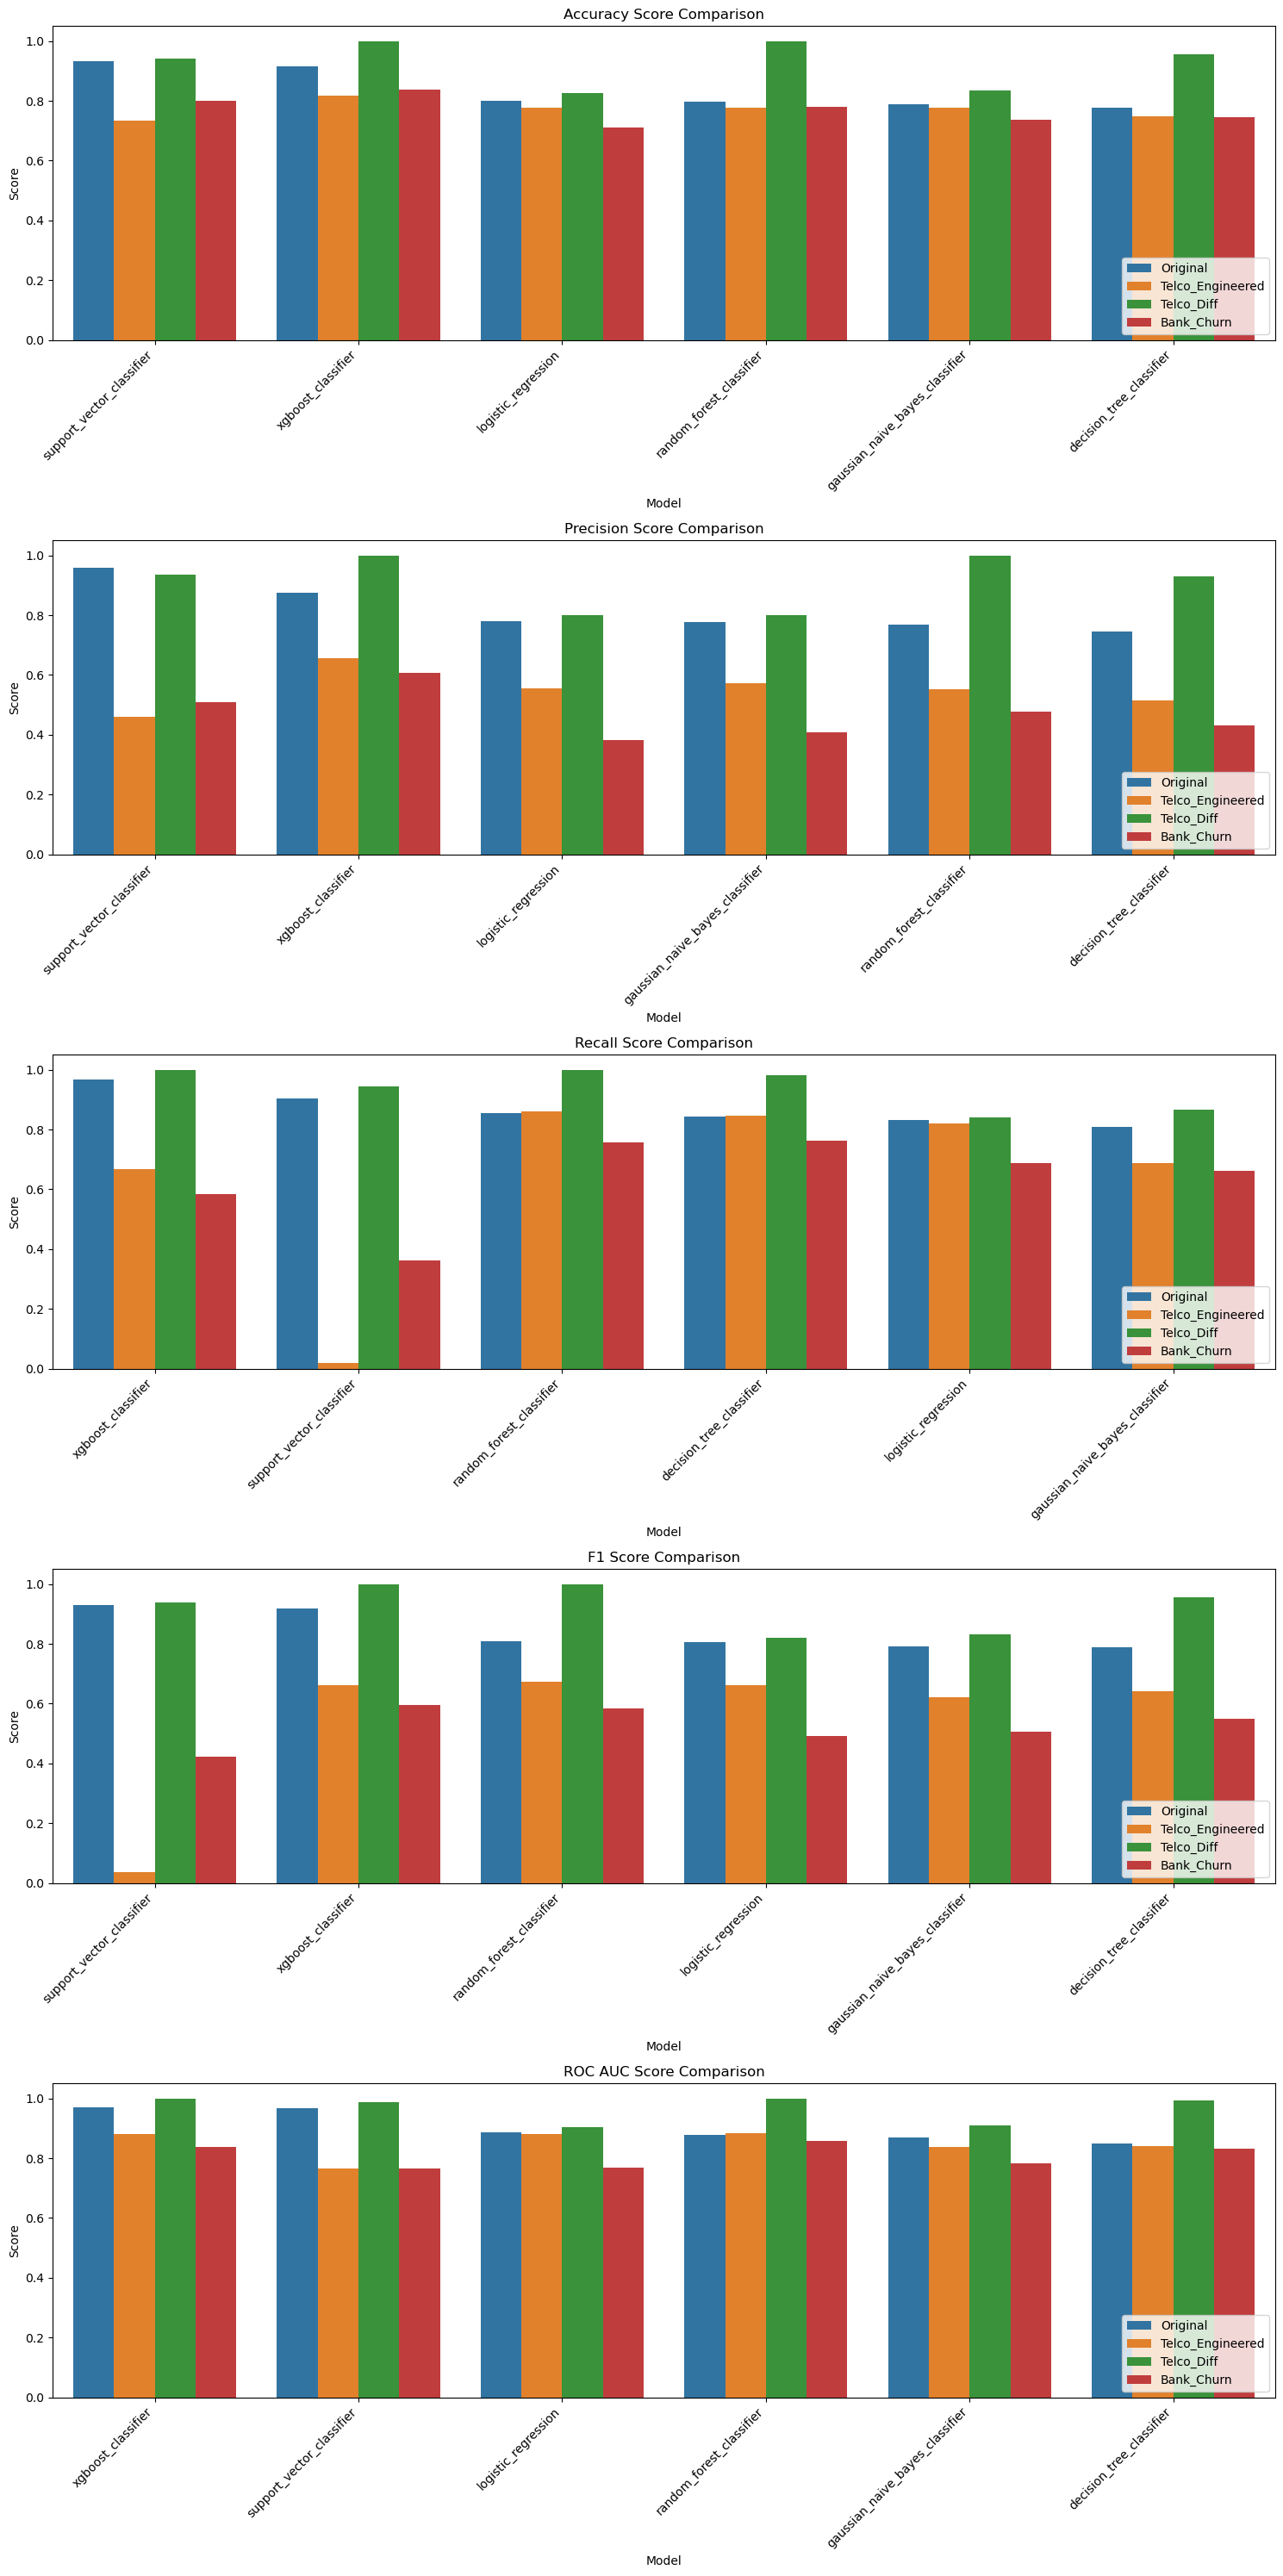

In [198]:
### Plotting the perfomance results for comparison across multiple datasets
plt.figure(figsize = (15, 30))

plt.subplot(5, 1, 1)
sns.barplot(data = accuracy_score_df.reset_index().melt(id_vars = 'classification_model', var_name = 'Dataset', value_name = 'Score'), 
    x = 'classification_model', y = 'Score', hue = 'Dataset')
plt.title('Accuracy Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc = 'lower right')

plt.subplot(5, 1, 2)
sns.barplot(data = precision_score_df.reset_index().melt(id_vars = 'classification_model', var_name = 'Dataset', value_name = 'Score'), 
    x = 'classification_model', y = 'Score', hue = 'Dataset')
plt.title('Precision Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc = 'lower right')

plt.subplot(5, 1, 3)
sns.barplot(data = recall_score_df.reset_index().melt(id_vars = 'classification_model', var_name = 'Dataset', value_name = 'Score'), 
    x = 'classification_model', y = 'Score', hue = 'Dataset')
plt.title('Recall Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc = 'lower right')

plt.subplot(5, 1, 4)
sns.barplot(data = f1_score_df.reset_index().melt(id_vars = 'classification_model', var_name = 'Dataset', value_name = 'Score'), 
    x = 'classification_model', y = 'Score', hue = 'Dataset')
plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc = 'lower right')

plt.subplot(5, 1, 5)
sns.barplot(data = roc_auc_score_df.reset_index().melt(id_vars = 'classification_model', var_name = 'Dataset', value_name = 'Score'), 
    x = 'classification_model', y = 'Score', hue = 'Dataset')
plt.title('ROC AUC Score Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(loc = 'lower right')

plt.tight_layout()
plt.show()

